# Notes
---
- Crime rate an indicator of less recycling?
- Geotagged tweets about recycling in LA
- Neighborhoods using solar energy involved in recycling?
- People with Prius, Tesla, other hybrid involved in recycling?
- Homeless people dumpster dive to recycle?
- Education - Schools promoting recycling?
- Political affiliation
---

- NaN - Not always 0, need to look at data before assuming data to be 0
- Data available on county level - EDA on both 
- Correlation plot, Pair-wise plot, PCA, Z score normalization
- Linear Regression - 
- Models less sensitive to correlated variables

Table of Contents
---
* [Objective](#Objective)
    * [Definitions](#Definitions)
* [Data Sources](#Data-Sources)
* [Web Scraping](#Web-Scraping)
    * [Diversion Rates](#Diversion-Rates)
    * [Jurisdiction Waste Diversion Program Summary](#Jurisdiction-Waste-Diversion-Program-Summary)
    
* [Data Wrangling](#Data-Wrangling)
    * [Jurisdiction Waste Diversion Program Summary Data](#Jurisdiction-Waste-Diversion-Program-Summary-Data)
    * [Mapping location of Solid Waste Facilities](#Mapping-location-of-Solid-Waste-Facilities)
    * [California Crime Data](#California-Crime-Data)
    * [California Solar Energy Data By City & County](#California-Solar-Energy-Data)
    * [Residential Building Permit Data](#Residential-Building-Permit-Data)
    * [Voter Registration Data](#Voter-Registration-Data)
    * [Business Type By County Data](#Business-Type-By-County-Data)
* [Data Merging](#Data-Merging)
* [Exploratory Data Analysis](#Exploratory-Data-Analysis)

<div class='alert alert-danger'>
<h2>Objective</h2>
<ol>
<li>Identify key factors affecting garbage production rate (lbs/person) in <font color='red'>California</font></li>
<li>Develop a model describing features effecting waste management</li>
<li>Make targeting recommendations for client</li>
</ol>
</div>

<div class='alert alert-info'>

<h2>Definitions</h2>

<ul>

<li>**Diversion Rate** is used to express how much waste is <font color='red'>diverted</font> from the landfill.</li>
$$Diversion \; Rate = \frac{total \; amount\; of \; waste \; recycled \; per \; unit \; time}{total \; amount\; of \; waste \; generated \; per \; unit \; time}$$

<li>**Disposal** means all waste created by all sources within each jurisdiction (including businesses, government agencies and residents) which is disposed at CalRecycle-permitted landfills or CalRecycle-permitted transformation facilities, or is exported from the state. </li>

<li>**Population Disposal** - For residents</li>

<li>**Employment Disposal** - For persons in commercial setting</li>

<li>**PPD** is pounds per person per day</li>

<li>**[More definitions and additional resources](http://www.calrecycle.ca.gov/LGCentral/Basics/PerCapitaDsp.htm#UsingPerCapita)**</li>

</ul>
</div>

<div class='alert alert-success'>
<h3>Data Sources</h3>

- [Diversion Rates](http://www.calrecycle.ca.gov/LGCentral/Reports/jurisdiction/diversiondisposal.aspx) and [Step-by-step Instructions](http://www.calrecycle.ca.gov/LGCentral/DivMeasure/StepByStep.htm) - Need form based (*.aspx) web-scraping to extract data. Get data for 2007 through 2013 (Note: 2014 and 2015 data not available yet!)
- [LA County Landfill Locations](http://www.laalmanac.com/environment/ev04.htm) - No lat/long info, just addresses
- [LA County Tipping rates](http://lacsd.org/solidwaste/swfacilities/solid_waste_disposal_and_recyclables_rates.asp)
- [Criminal Justice Statistics Center (CJSC) STATISTICS: CRIMES AND CLEARANCES](https://oag.ca.gov/crime/cjsc/stats/crimes-clearances) - Link to [Crimes Data File 2005-2014](https://oag.ca.gov/sites/all/files/agweb/pdfs/cjsc/stats/crimes_data_2005-2014.zip)
- [Report of Registration (Political)](http://www.sos.ca.gov/elections/report-registration/) - Data available for 1999 through 2014. Registration data by county, political subdivision by county (cities), etc.
- [Caltrans GIS Data](http://www.dot.ca.gov/hq/tsip/gis/datalibrary/) - Transportation related shapefiles, [California Cities](http://www.dot.ca.gov/hq/tsip/gis/datalibrary/Metadata/cities.html) - CA cities boundary shapefiles
- [Solid Waste Facilities GIS Data](http://www.calrecycle.ca.gov/Files/SWFacilities/Directory/SwisGis.txt) and [more information](http://www.calrecycle.ca.gov/swfacilities/directory/Search.aspx)
- [Program Counts by Status, Year and Jurisdiction](http://www.calrecycle.ca.gov/LGCentral/Reports/Viewer.aspx?P=ReportName%3dDPProgramCountsByStatusYearJuris%26GeoAreaType%3dJurisdiction%26ProgramSearchType%3dProgram%26JurisdictionIDs%3d%26ProgramIDs%3d%26ReportYears%3d%26ProgramStatusIDs%3d%26GeoAreaDisplay%3dAll%26ProgramSearchDisplay%3dAll%26ReportYearDisplay%3dAll%26ProgramStatusDisplay%3dAll%26CountyIDs%3d%26ComponentIDs%3d) - 1995 through 2013 data. Size: 33 mb, Need to format this data properly!
- [California Counties Water Use Data (2010) by County](http://ca.water.usgs.gov/water_use/2010-california-water-use.html)
- [California Solar Energy Data (CSI Working Data Set)](https://www.californiasolarstatistics.ca.gov/data_downloads/)
- [Building Permit California](http://censtats.census.gov/bldg/bldgprmt.shtml) - Needs lot of web scraping!, [Building Permit California Data (County & County Jurisdiction)](http://socds.huduser.org/permits/) - Collected 2007 to 2013 county as well as county jurisdiction data manually
- [CA County Area (Sq Mile) data](http://www.indexmundi.com/facts/united-states/quick-facts/california/land-area#table)  
- [CA City Area data](https://en.wikipedia.org/wiki/List_of_cities_and_towns_in_California)
- [CA Monthly Water Data (2014 and 2015 only!](http://www.waterboards.ca.gov/water_issues/programs/conservation_portal/conservation_reporting.shtml#monthly_archive)
</div>
---
- [CA Water Use Data-Viz](http://projects.scpr.org/applications/monthly-water-use/)
- [NYT CA Water Use Data-Viz](http://www.nytimes.com/interactive/2015/04/01/us/water-use-in-california.html?_r=0)


In [10]:
import mechanize
#! pip install --upgrade beautifulsoup4
from bs4 import BeautifulSoup
import urllib2
import pandas as pd
import numpy as np
import requests

# String manipulation
import string 

# For viewing files in a specified directory
import glob

# Plotting
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
#! pip install brewer2mpl # Cynthia Brewers Color palette

# Statsmodels: ! easy_install statsmodels
import statsmodels.api as sm

# High performance container datatypes
from collections import Counter

<div class='alert alert-warning'>
<h2><font color='blue'>Web Scraping</font></h2>

- [Scraping ASP.NET Pages with AJAX Pagination](http://toddhayton.com/2015/05/04/scraping-aspnet-pages-with-ajax-pagination/)  
- [How to get along with an ASP webpage](https://blog.scraperwiki.com/2011/11/how-to-get-along-with-an-asp-webpage/)  
- [Form Handling With Mechanize and BeautifulSoup](http://toddhayton.com/2014/12/08/form-handling-with-mechanize-and-beautifulsoup/)  
- [Scraping with Mechanize and BeautifulSoup](http://swizec.com/blog/scraping-with-mechanize-and-beautifulsoup/swizec/5039)

</div>

### Diversion Rates

In [ ]:
url = 'http://www.calrecycle.ca.gov/LGCentral/Reports/jurisdiction/diversiondisposal.aspx'
html = urllib2.urlopen(url)
bsObj = BeautifulSoup(html)
table = bsObj.find('table', {'class': 'SearchForm'})
print html

In [ ]:
browser = mechanize.Browser()
browser.addheaders = [('User-agent', 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_6_8) AppleWebKit/535.7 (KHTML, like Gecko) Chrome/16.0.912.63 Safari/535.7')]
browser.open(url)
browser.select_form('aspnetForm')
#browser.set_all_readonly(False)
print browser.form
#browser.submit()

In [ ]:
temp = BeautifulSoup(browser.response())
print temp.prettify()

In [ ]:
#browser.form.new_control('hidden', '__VIEWSTATE', {'value':'/wEPDwULLTE5MDQzOTE2MjYPZBYCZg9kFggCBg9kFgJmDw8WAh4EVGV4dAUgUFJPRFVDVElPTiBXV1cuQ0FMUkVDWUNMRS5DQS5HT1ZkZAIIDxYCHgtfIUl0ZW1Db3VudAIJFhJmD2QWAgIBDw8WBB8ABRhMb2NhbCBHb3Z0LiBDZW50cmFsIEhvbWUeC05hdmlnYXRlVXJsBQsvTEdDZW50cmFsL2RkAgEPZBYCAgEPDxYEHwAFIEhvdCBUb3BpY3MsIEV2ZW50cywgUHJvZ3JhbSBOZXdzHwIFEC9MR0NlbnRyYWwvI05ld3NkZAICD2QWAgIBDw8WBB8ABQxXYXN0ZSBTdHJlYW0fAgUXL0xHQ2VudHJhbC9XYXN0ZVN0cmVhbS9kZAIDD2QWAgIBDw8WBB8ABRZQcm9ncmFtIEltcGxlbWVudGF0aW9uHwIFFC9MR0NlbnRyYWwvUHJvZ3JhbXMvZGQCBA9kFgICAQ8PFgQfAAUTTG9jYWwgR292dC4gTGlicmFyeR8CBRMvTEdDZW50cmFsL0xpYnJhcnkvZGQCBQ9kFgICAQ8PFgQfAAUVTG9jYWwgR292dC4gUmVwb3J0aW5nHwIFFS9MR0NlbnRyYWwvUmVwb3J0aW5nL2RkAgYPZBYCAgEPDxYEHwAFEkRpc3Bvc2FsIFJlcG9ydGluZx8CBQ8vTEdDZW50cmFsL0RSUy9kZAIHD2QWAgIBDw8WBB8ABQpEYXRhIFRvb2xzHwIFFS9MR0NlbnRyYWwvRGF0YVRvb2xzL2RkAggPZBYCAgEPDxYEHwAFDERhdGEgUmVwb3J0cx8CBR0vTEdDZW50cmFsL0RhdGFUb29scy9SZXBvcnRzL2RkAgoPFgIfAQIFFgpmD2QWAgIBDw8WBB8ABQpDb250YWN0IFVzHwIFFC9MR0NlbnRyYWwvQ29udGFjdHMvZGQCAQ9kFgICAQ8PFgQfAAUKU2l0ZSBJbmRleB8CBRQvTEdDZW50cmFsL0luZGV4Lmh0bWRkAgIPZBYCAgEPDxYEHwAFGlNlYXJjaCBMb2NhbCBHb3Z0LiBDZW50cmFsHwIFFC9TZWFyY2gvTEdTZWFyY2guYXNwZGQCAw9kFgICAQ8PFgQfAAUPTmVlZCBNb3JlIEhlbHA/HwIFEy9MR0NlbnRyYWwvSGVscC5odG1kZAIED2QWAgIBDw8WBB8ABQ9PdGhlciBSZXNvdXJjZXMfAgUXL0xHQ2VudHJhbC9SZXNvdXJjZS5odG1kZAIMD2QWAgIBD2QWBAIBDw9kFgIeBXN0eWxlBQ1kaXNwbGF5Om5vbmU7FhRmDxAPZBYCHghvbmNoYW5nZQUdcmVwb3J0WWVhclNlbGVjdENoYW5nZSh0aGlzKTsPFhVmAgECAgIDAgQCBQIGAgcCCAIJAgoCCwIMAg0CDgIPAhACEQISAhMCFBYVEAUEMTk5NQUEMTk5NWcQBQQxOTk2BQQxOTk2ZxAFBDE5OTcFBDE5OTdnEAUEMTk5OAUEMTk5OGcQBQQxOTk5BQQxOTk5ZxAFBDIwMDAFBDIwMDBnEAUEMjAwMQUEMjAwMWcQBQQyMDAyBQQyMDAyZxAFBDIwMDMFBDIwMDNnEAUEMjAwNAUEMjAwNGcQBQQyMDA1BQQyMDA1ZxAFBDIwMDYFBDIwMDZnEAUEMjAwNwUEMjAwN2cQBQQyMDA4BQQyMDA4ZxAFBDIwMDkFBDIwMDlnEAUEMjAxMAUEMjAxMGcQBQQyMDExBQQyMDExZxAFBDIwMTIFBDIwMTJnEAUEMjAxMwUEMjAxM2cQBQQyMDE0BQQyMDE0ZxAFBDIwMTUFBDIwMTVnZGQCAQ8QD2QWAh4Hb25jbGljawUPdG9nZ2xlQVAodGhpcyk7ZGRkAgIPEA9kFgIfBQUPdG9nZ2xlQVAodGhpcyk7ZGRkAgMPZBYCAgEPEA8WBh4NRGF0YVRleHRGaWVsZAUKQ291bnR5TmFtZR4ORGF0YVZhbHVlRmllbGQFCkNvdW50eU5hbWUeC18hRGF0YUJvdW5kZ2QQFToHQWxhbWVkYQZBbHBpbmUGQW1hZG9yBUJ1dHRlCUNhbGF2ZXJhcwZDb2x1c2EMQ29udHJhIENvc3RhCURlbCBOb3J0ZQlFbCBEb3JhZG8GRnJlc25vBUdsZW5uCEh1bWJvbGR0CEltcGVyaWFsBElueW8ES2VybgVLaW5ncwRMYWtlBkxhc3NlbgtMb3MgQW5nZWxlcwZNYWRlcmEFTWFyaW4ITWFyaXBvc2EJTWVuZG9jaW5vBk1lcmNlZAVNb2RvYwRNb25vCE1vbnRlcmV5BE5hcGEGTmV2YWRhBk9yYW5nZQZQbGFjZXIGUGx1bWFzCVJpdmVyc2lkZQpTYWNyYW1lbnRvClNhbiBCZW5pdG8OU2FuIEJlcm5hcmRpbm8JU2FuIERpZWdvDVNhbiBGcmFuY2lzY28LU2FuIEpvYXF1aW4PU2FuIEx1aXMgT2Jpc3BvCVNhbiBNYXRlbw1TYW50YSBCYXJiYXJhC1NhbnRhIENsYXJhClNhbnRhIENydXoGU2hhc3RhBlNpZXJyYQhTaXNraXlvdQZTb2xhbm8GU29ub21hClN0YW5pc2xhdXMGU3V0dGVyBlRlaGFtYQdUcmluaXR5BlR1bGFyZQhUdW9sdW1uZQdWZW50dXJhBFlvbG8EWXViYRU6B0FsYW1lZGEGQWxwaW5lBkFtYWRvcgVCdXR0ZQlDYWxhdmVyYXMGQ29sdXNhDENvbnRyYSBDb3N0YQlEZWwgTm9ydGUJRWwgRG9yYWRvBkZyZXNubwVHbGVubghIdW1ib2xkdAhJbXBlcmlhbARJbnlvBEtlcm4FS2luZ3METGFrZQZMYXNzZW4LTG9zIEFuZ2VsZXMGTWFkZXJhBU1hcmluCE1hcmlwb3NhCU1lbmRvY2lubwZNZXJjZWQFTW9kb2METW9ubwhNb250ZXJleQROYXBhBk5ldmFkYQZPcmFuZ2UGUGxhY2VyBlBsdW1hcwlSaXZlcnNpZGUKU2FjcmFtZW50bwpTYW4gQmVuaXRvDlNhbiBCZXJuYXJkaW5vCVNhbiBEaWVnbw1TYW4gRnJhbmNpc2NvC1NhbiBKb2FxdWluD1NhbiBMdWlzIE9iaXNwbwlTYW4gTWF0ZW8NU2FudGEgQmFyYmFyYQtTYW50YSBDbGFyYQpTYW50YSBDcnV6BlNoYXN0YQZTaWVycmEIU2lza2l5b3UGU29sYW5vBlNvbm9tYQpTdGFuaXNsYXVzBlN1dHRlcgZUZWhhbWEHVHJpbml0eQZUdWxhcmUIVHVvbHVtbmUHVmVudHVyYQRZb2xvBFl1YmEUKwM6Z2dnZ2dnZ2dnZ2dnZ2dnZ2dnZ2dnZ2dnZ2dnZ2dnZ2dnZ2dnZ2dnZ2dnZ2dnZ2dnZ2dnZ2dnZ2dnZ2RkAgQPZBYCAgEPEA8WBh8GBQ5HZW9BcmVhU3ViTmFtZR8HBQxHZW9BcmVhU3ViSUQfCGdkEBUKDEVudGlyZSBTdGF0ZQhCYXkgQXJlYRRDZW50cmFsIFZhbGxleSBOb3J0aBRDZW50cmFsIFZhbGxleSBTb3V0aA1DZW50cmFsIENvYXN0DUNvYXN0YWwgTm9ydGgOTW91bnRhaW4gTm9ydGgOTW91bnRhaW4gU291dGgbU291dGhlcm4gQ2FsaWZvcm5pYSBDb2FzdGFsGlNvdXRoZXJuIENhbGlmb3JuaWEgSW5sYW5kFQoAATEBMgEzATQBNQE2ATcBOAE5FCsDCmdnZ2dnZ2dnZ2dkZAIGD2QWAgIBDxAPFgYfBgUUQmllbm5pYWxSZXZpZXdTdGF0dXMfBwUSQmllbm5pYWxSZXZpZXdDb2RlHwhnZBAVFQ5Cb2FyZCBBcHByb3ZlZCBCb2FyZCBBcHByb3ZlZCBHb29kIEZhaXRoIEVmZm9ydBFDb21wbGlhbmNlIEFjdGl2ZQdQZW5hbHR5DkJvYXJkIEFjY2VwdGVkIUJvYXJkIEFwcHJvdmVkIHdpdGggTmV3IEJhc2UgWWVhcjNCb2FyZCBBcHByb3ZlZCBHb29kIEZhaXRoIEVmZm9ydCB3aXRoIE5ldyBCYXNlIFllYXIUQ29tcGxpYW5jZSBGdWxmaWxsZWQjQm9hcmQgQXBwcm92ZWQgQ29tcGxpYW5jZSBGdWxmaWxsZWQ1Qm9hcmQgQXBwcm92ZWQgR29vZCBGYWl0aCBFZmZvcnQgQ29tcGxpYW5jZSBGdWxmaWxsZWQvQmllbm5pYWwgUmV2aWV3IE5vdCBDb21wbGV0ZWQgWWV0IE5ldyBCYXNlIFllYXIhQmllbm5pYWwgUmV2aWV3IE5vdCBDb21wbGV0ZWQgWWV0IUJvYXJkIEFjY2VwdGVkIHdpdGggTmV3IEJhc2UgWWVhcjJOb3QgU3ViamVjdCB0byBCaWVubmlhbCBSZXZpZXc6IE5ld2x5IEluY29ycG9yYXRlZB1Cb2FyZCBBcHByb3ZlZCBUaW1lIEV4dGVuc2lvbjBCb2FyZCBBcHByb3ZlZCBBbHRlcm5hdGl2ZSBEaXZlcnNpb24gUmVxdWlyZW1lbnQsQm9hcmQgQXBwcm92ZWQgUmVkdWNlZCBEaXZlcnNpb24gUmVxdWlyZW1lbnQjUHJlbGltaW5hcnkgRGF0YSBVbmRlciBTdGFmZiBSZXZpZXcVUHJlbGltaW5hcnkgRGF0YSBPbmx5NUJvYXJkIEFwcHJvdmVkIFRpbWUgRXh0ZW5zaW9uIEJpZW5uaWFsIFJldmlldyBEZWxheWVkSEJvYXJkIEFwcHJvdmVkIEFsdGVybmF0aXZlIERpdmVyc2lvbiBSZXF1aXJlbWVudCBCaWVubmlhbCBSZXZpZXcgRGVsYXllZBUVCEFQUFJPVkVECUdPT0RGQUlUSApDT01QTElBTkNFB1BFTkFMVFkIQUNDRVBURUQIQVBQTkVXQlkIQVBQR0ZOQlkKQ09NUEZJTExFRApBUFBDT01QRklMB0FQUEdGQ0YHQlJOT1RCWQlCUk5PVENPTVAIQUNDTkVXQlkKTk9CUk5FV0lOQwlCRFRJTUVFWFQHQkRBTFREUgpCRFJFRFVDRURSClBSRUxJTURBVEEGUFJFTElNDEJEVElNRUVYVERMWQpCREFMVERSRExZFCsDFWdnZ2dnZ2dnZ2dnZ2dnZ2dnZ2dnZ2RkAgcPEA9kFgIfBQUVZGlzcG9zYWxSZXZpZXcodGhpcyk7ZGRkAggPEA9kFgIfBQUVZGlzcG9zYWxSZXZpZXcodGhpcyk7ZGRkAgkPZBYCAgEPEA9kFgIfBQURcmF0ZVN0YXR1cyh0aGlzKTtkZGQCCw9kFgICAQ8QDxYGHwYFDFJldmlld1N0YXR1cx8HBQ5SZXZpZXdTdGF0dXNJRB8IZ2QQFQgRQW55IFJldmlldyBTdGF0dXMPQXdhaXRpbmcgUmV2aWV3CEFwcHJvdmVkDkFwcHJvdmVkIC0gR0ZFJkFwcHJvdmVkIFJlZHVjZWQgRGl2ZXJzaW9uIFJlcXVpcmVtZW50LEFwcHJvdmVkIFJlZHVjZWQgRGl2ZXJzaW9uIFJlcXVpcmVtZW50IC0gR0ZFEUNvbXBsaWFuY2UgUmV2aWV3F05vIFJldmlldyDigJMgSm9pbmVkIFJBFQgAATEBMgEzATQBNQE2ATgUKwMIZ2dnZ2dnZ2dkZAIDDw8WAh4HVmlzaWJsZWdkFhQCBQ9kFgICAQ8PFgIfCWhkZAIHDw8WAh8ABQdBbGFtZWRhZGQCCQ9kFgICAQ8PFgIfCWhkZAILDw8WAh8ABQQxOTk1ZGQCDQ9kFgICAQ8PFgIfCWhkZAIPDw8WAh8ABRNBbGwgRGl2ZXJzaW9uIFJhdGVzZGQCEQ9kFgICAQ8PFgIfCWhkZAITDw8WAh8AZWRkAhUPPCsAEQQADxYKHgpTaG93Rm9vdGVyZx8JZx4NSXNTaG93QWxsTW9kZWcfCGcfAQIPZAEQFgAWABYABBYEHghDc3NDbGFzc2UeBF8hU0ICAgwUKwAAFgJmD2QWIAIBD2QWCGYPZBYCZg8PFgQfAAUHQWxhbWVkYR8CBU5+L0RpdmVyc2lvblByb2dyYW0vSnVyaXNkaWN0aW9uRGl2ZXJzaW9uRGV0YWlsLmFzcHg/SnVyaXNkaWN0aW9uSUQ9MyZZZWFyPTE5OTVkZAIBDw8WAh8ABQI0OGRkAgIPDxYCHwAFDkJvYXJkIEFwcHJvdmVkZGQCAw9kFgJmDw8WBB8ABQIyNx8CBVB+L0RpdmVyc2lvblByb2dyYW0vSnVyaXNkaWN0aW9uRGl2ZXJzaW9uUHJvZ3JhbXMuYXNweD9KdXJpc2RpY3Rpb25JRD0zJlllYXI9MTk5NWRkAgIPZBYIZg9kFgJmDw8WBB8ABRZBbGFtZWRhLVVuaW5jb3Jwb3JhdGVkHwIFTn4vRGl2ZXJzaW9uUHJvZ3JhbS9KdXJpc2RpY3Rpb25EaXZlcnNpb25EZXRhaWwuYXNweD9KdXJpc2RpY3Rpb25JRD01JlllYXI9MTk5NWRkAgEPDxYCHwAFAjU2ZGQCAg8PFgIfAAUOQm9hcmQgQXBwcm92ZWRkZAIDD2QWAmYPDxYEHwAFAjI2HwIFUH4vRGl2ZXJzaW9uUHJvZ3JhbS9KdXJpc2RpY3Rpb25EaXZlcnNpb25Qcm9ncmFtcy5hc3B4P0p1cmlzZGljdGlvbklEPTUmWWVhcj0xOTk1ZGQCAw9kFghmD2QWAmYPDxYEHwAFBkFsYmFueR8CBU5+L0RpdmVyc2lvblByb2dyYW0vSnVyaXNkaWN0aW9uRGl2ZXJzaW9uRGV0YWlsLmFzcHg/SnVyaXNkaWN0aW9uSUQ9NiZZZWFyPTE5OTVkZAIBDw8WAh8ABQI0MmRkAgIPDxYCHwAFDkJvYXJkIEFwcHJvdmVkZGQCAw9kFgJmDw8WBB8ABQIyNx8CBVB+L0RpdmVyc2lvblByb2dyYW0vSnVyaXNkaWN0aW9uRGl2ZXJzaW9uUHJvZ3JhbXMuYXNweD9KdXJpc2RpY3Rpb25JRD02JlllYXI9MTk5NWRkAgQPZBYIZg9kFgJmDw8WBB8ABQhCZXJrZWxleR8CBU9+L0RpdmVyc2lvblByb2dyYW0vSnVyaXNkaWN0aW9uRGl2ZXJzaW9uRGV0YWlsLmFzcHg/SnVyaXNkaWN0aW9uSUQ9NDMmWWVhcj0xOTk1ZGQCAQ8PFgIfAAUCNDFkZAICDw8WAh8ABQ5Cb2FyZCBBcHByb3ZlZGRkAgMPZBYCZg8PFgQfAAUCMzQfAgVRfi9EaXZlcnNpb25Qcm9ncmFtL0p1cmlzZGljdGlvbkRpdmVyc2lvblByb2dyYW1zLmFzcHg/SnVyaXNkaWN0aW9uSUQ9NDMmWWVhcj0xOTk1ZGQCBQ9kFghmD2QWAmYPDxYEHwAFBkR1Ymxpbh8CBVB+L0RpdmVyc2lvblByb2dyYW0vSnVyaXNkaWN0aW9uRGl2ZXJzaW9uRGV0YWlsLmFzcHg/SnVyaXNkaWN0aW9uSUQ9MTM1JlllYXI9MTk5NWRkAgEPDxYCHwAFAjI2ZGQCAg8PFgIfAAUOQm9hcmQgQXBwcm92ZWRkZAIDD2QWAmYPDxYEHwAFAjMyHwIFUn4vRGl2ZXJzaW9uUHJvZ3JhbS9KdXJpc2RpY3Rpb25EaXZlcnNpb25Qcm9ncmFtcy5hc3B4P0p1cmlzZGljdGlvbklEPTEzNSZZZWFyPTE5OTVkZAIGD2QWCGYPZBYCZg8PFgQfAAUKRW1lcnl2aWxsZR8CBVB+L0RpdmVyc2lvblByb2dyYW0vSnVyaXNkaWN0aW9uRGl2ZXJzaW9uRGV0YWlsLmFzcHg/SnVyaXNkaWN0aW9uSUQ9MTQ2JlllYXI9MTk5NWRkAgEPDxYCHwAFAjUxZGQCAg8PFgIfAAUOQm9hcmQgQXBwcm92ZWRkZAIDD2QWAmYPDxYEHwAFAjIzHwIFUn4vRGl2ZXJzaW9uUHJvZ3JhbS9KdXJpc2RpY3Rpb25EaXZlcnNpb25Qcm9ncmFtcy5hc3B4P0p1cmlzZGljdGlvbklEPTE0NiZZZWFyPTE5OTVkZAIHD2QWCGYPZBYCZg8PFgQfAAUKUGxlYXNhbnRvbh8CBVB+L0RpdmVyc2lvblByb2dyYW0vSnVyaXNkaWN0aW9uRGl2ZXJzaW9uRGV0YWlsLmFzcHg/SnVyaXNkaWN0aW9uSUQ9MzgxJlllYXI9MTk5NWRkAgEPDxYCHwAFAjI4ZGQCAg8PFgIfAAUOQm9hcmQgQXBwcm92ZWRkZAIDD2QWAmYPDxYEHwAFAjI2HwIFUn4vRGl2ZXJzaW9uUHJvZ3JhbS9KdXJpc2RpY3Rpb25EaXZlcnNpb25Qcm9ncmFtcy5hc3B4P0p1cmlzZGljdGlvbklEPTM4MSZZZWFyPTE5OTVkZAIID2QWCGYPZBYCZg8PFgQfAAULU2FuIExlYW5kcm8fAgVQfi9EaXZlcnNpb25Qcm9ncmFtL0p1cmlzZGljdGlvbkRpdmVyc2lvbkRldGFpbC5hc3B4P0p1cmlzZGljdGlvbklEPTQ0NyZZZWFyPTE5OTVkZAIBDw8WAh8ABQIzNGRkAgIPDxYCHwAFDkJvYXJkIEFwcHJvdmVkZGQCAw9kFgJmDw8WBB8ABQIyNh8CBVJ+L0RpdmVyc2lvblByb2dyYW0vSnVyaXNkaWN0aW9uRGl2ZXJzaW9uUHJvZ3JhbXMuYXNweD9KdXJpc2RpY3Rpb25JRD00NDcmWWVhcj0xOTk1ZGQCCQ9kFghmD2QWAmYPDxYEHwAFClVuaW9uIENpdHkfAgVQfi9EaXZlcnNpb25Qcm9ncmFtL0p1cmlzZGljdGlvbkRpdmVyc2lvbkRldGFpbC5hc3B4P0p1cmlzZGljdGlvbklEPTU1MCZZZWFyPTE5OTVkZAIBDw8WAh8ABQI0OWRkAgIPDxYCHwAFDkJvYXJkIEFwcHJvdmVkZGQCAw9kFgJmDw8WBB8ABQIyOR8CBVJ+L0RpdmVyc2lvblByb2dyYW0vSnVyaXNkaWN0aW9uRGl2ZXJzaW9uUHJvZ3JhbXMuYXNweD9KdXJpc2RpY3Rpb25JRD01NTAmWWVhcj0xOTk1ZGQCCg9kFghmD2QWAmYPDxYEHwAFB0ZyZW1vbnQfAgVQfi9EaXZlcnNpb25Qcm9ncmFtL0p1cmlzZGljdGlvbkRpdmVyc2lvbkRldGFpbC5hc3B4P0p1cmlzZGljdGlvbklEPTE2NyZZZWFyPTE5OTVkZAIBDw8WAh8ABQI0OWRkAgIPDxYCHwAFDkJvYXJkIEFwcHJvdmVkZGQCAw9kFgJmDw8WBB8ABQIyNR8CBVJ+L0RpdmVyc2lvblByb2dyYW0vSnVyaXNkaWN0aW9uRGl2ZXJzaW9uUHJvZ3JhbXMuYXNweD9KdXJpc2RpY3Rpb25JRD0xNjcmWWVhcj0xOTk1ZGQCCw9kFghmD2QWAmYPDxYEHwAFB0hheXdhcmQfAgVQfi9EaXZlcnNpb25Qcm9ncmFtL0p1cmlzZGljdGlvbkRpdmVyc2lvbkRldGFpbC5hc3B4P0p1cmlzZGljdGlvbklEPTE5MSZZZWFyPTE5OTVkZAIBDw8WAh8ABQI0MWRkAgIPDxYCHwAFDkJvYXJkIEFwcHJvdmVkZGQCAw9kFgJmDw8WBB8ABQIyNh8CBVJ+L0RpdmVyc2lvblByb2dyYW0vSnVyaXNkaWN0aW9uRGl2ZXJzaW9uUHJvZ3JhbXMuYXNweD9KdXJpc2RpY3Rpb25JRD0xOTEmWWVhcj0xOTk1ZGQCDA9kFghmD2QWAmYPDxYEHwAFCUxpdmVybW9yZR8CBVB+L0RpdmVyc2lvblByb2dyYW0vSnVyaXNkaWN0aW9uRGl2ZXJzaW9uRGV0YWlsLmFzcHg/SnVyaXNkaWN0aW9uSUQ9MjYxJlllYXI9MTk5NWRkAgEPDxYCHwAFAjI2ZGQCAg8PFgIfAAUOQm9hcmQgQXBwcm92ZWRkZAIDD2QWAmYPDxYEHwAFAjMzHwIFUn4vRGl2ZXJzaW9uUHJvZ3JhbS9KdXJpc2RpY3Rpb25EaXZlcnNpb25Qcm9ncmFtcy5hc3B4P0p1cmlzZGljdGlvbklEPTI2MSZZZWFyPTE5OTVkZAIND2QWCGYPZBYCZg8PFgQfAAUGTmV3YXJrHwIFUH4vRGl2ZXJzaW9uUHJvZ3JhbS9KdXJpc2RpY3Rpb25EaXZlcnNpb25EZXRhaWwuYXNweD9KdXJpc2RpY3Rpb25JRD0zMzgmWWVhcj0xOTk1ZGQCAQ8PFgIfAAUCMjdkZAICDw8WAh8ABQ5Cb2FyZCBBcHByb3ZlZGRkAgMPZBYCZg8PFgQfAAUCMzAfAgVSfi9EaXZlcnNpb25Qcm9ncmFtL0p1cmlzZGljdGlvbkRpdmVyc2lvblByb2dyYW1zLmFzcHg/SnVyaXNkaWN0aW9uSUQ9MzM4JlllYXI9MTk5NWRkAg4PZBYIZg9kFgJmDw8WBB8ABQdPYWtsYW5kHwIFUH4vRGl2ZXJzaW9uUHJvZ3JhbS9KdXJpc2RpY3Rpb25EaXZlcnNpb25EZXRhaWwuYXNweD9KdXJpc2RpY3Rpb25JRD0zNDUmWWVhcj0xOTk1ZGQCAQ8PFgIfAAUCMjdkZAICDw8WAh8ABQ5Cb2FyZCBBcHByb3ZlZGRkAgMPZBYCZg8PFgQfAAUCMzQfAgVSfi9EaXZlcnNpb25Qcm9ncmFtL0p1cmlzZGljdGlvbkRpdmVyc2lvblByb2dyYW1zLmFzcHg/SnVyaXNkaWN0aW9uSUQ9MzQ1JlllYXI9MTk5NWRkAg8PZBYIZg9kFgJmDw8WBB8ABQhQaWVkbW9udB8CBVB+L0RpdmVyc2lvblByb2dyYW0vSnVyaXNkaWN0aW9uRGl2ZXJzaW9uRGV0YWlsLmFzcHg/SnVyaXNkaWN0aW9uSUQ9MzcyJlllYXI9MTk5NWRkAgEPDxYCHwAFAjQ3ZGQCAg8PFgIfAAUOQm9hcmQgQXBwcm92ZWRkZAIDD2QWAmYPDxYEHwAFAjIzHwIFUn4vRGl2ZXJzaW9uUHJvZ3JhbS9KdXJpc2RpY3Rpb25EaXZlcnNpb25Qcm9ncmFtcy5hc3B4P0p1cmlzZGljdGlvbklEPTM3MiZZZWFyPTE5OTVkZAIQD2QWAmYPDxYCHwAFLjxiPlRvdGFsIG51bWJlciBvZiBKdXJpc2RpY3Rpb25zIGZvdW5kOiAxNTwvYj5kZAIXDw8WAh8JaGQWAgIBDzwrABECARAWABYAFgAMFCsAAGQYAwUeX19Db250cm9sc1JlcXVpcmVQb3N0QmFja0tleV9fFggFGmN0bDAwJGNwaEJvZHkkcmRvR2VvQ291bnR5BRdjdGwwMCRjcGhCb2R5JHJkb0dlb0dlbwUXY3RsMDAkY3BoQm9keSRyZG9HZW9HZW8FGWN0bDAwJGNwaEJvZHkkbHN0Q291bnRpZXMFHWN0bDAwJGNwaEJvZHkkbHN0UmV2aWV3U3RhdHVzBRljdGwwMCRjcGhCb2R5JHJkb0Rpc3Bvc2FsBRdjdGwwMCRjcGhCb2R5JHJkb1JldmlldwUXY3RsMDAkY3BoQm9keSRyZG9SZXZpZXcFG2N0bDAwJGNwaEJvZHkkZ3JkUmVzdWx0c05ldw9nZAUbY3RsMDAkY3BoQm9keSRncmRSZXN1bHRzT2xkDzwrAAwBCAIBZHjpD3a9OtmWg4n/gczJmE+bkueGaTWR55l6ANFQi1Xo'})
#browser.form.new_control('hidden', '__VIEWSTATEGENERATOR', {'value':'99EF0FC5'})
#browser.form.new_control('hidden', '__EVENTVALIDATION', {'value':'/wEdAIkBDJsD7FQFcoP2p859ikLrktJhfI7sc3E1GHW9RGZRYXZRqSEB9IHYlaniS+iG2R8aUNztDi0RpDGsdZsLe98Ts7CdoHQctbcinHEKiPqMY8LsAErsSbo9rL1sCIylo+UpFzCx+lgQdchREMkcO3y7J5t8I2GdkQ32Oo6ke6no+xlD5rjCy+Qxdgv6HcWxlvCvHOr4b+pvsWk+xS2Ooa6Aac3TbaxlNtJZk3btXcJHiUi276Qt+5dFHjJDR7vjhj1pOFgL7HiJywokf2u86mRE/M96gF2fG3cW5jJn8IUs9Gwx8XHZaZV3k1mHJGO9n65cwfQXZPcIxO/hqVttXscbVGCFcL4zanlW/bnDdSR7fa8UVWeeaJVdiVyvSZriew/pCNKA2MCQLO41l9lQu4R8q5+/LXU119CW2C3WMz3K/BJAKNG51/ULgZ/osd9Q7ZCNkYJtQIisVkgw9HpXQ6WuA3ygvfYTift6KabWMmuRa2f5OtbtPI6BnR9lv3Cpm88dHfBuwolpeZhEB5qizlMZZG5alqAI+kyf/j6JFJugWH3kDuhfM3PQu4Tx8FAit/MfJ2CLoiOUQXeVETefsnAQ74IHm6Jm6tTgxZTiJHv/GbWlE87L0GH+WGk1iU1j/bDhthULM2kJxY+ed/ClbTVxzCsC5OqDJO+oDEEC3rlj7SCiKUh/jGB9MwAAP29alVQngnPEESS0XvY4mB3fCcOx3B/xPCrdJ7KYACtmX0a/CbOYvTIEjScaXtj3Vo3sJ6Q1w6t4gT73t1loZQIIhKy1wQ849PxYaTaAzBswd0zQXmvTXC0/YbF6WW7R0lpV3H0vk5yneqSpcx93+NsUGlHsigo2mll0GtNRJwkcHo65sGv4vmivWOB/TPUoaQBinmVN5f7z43Nmi+2+oqqvcJPaLaEw17xWZYGCHGjY+hS2LNTIgI4KR27RmNqtmvzOKygtHtVLjlz6B7wOYjidQDNGcbzhW+C05GCd2wDiZMo/AwKk7dFmlcUIUYxYN1t+U4t3Xt09Xf2WaDBfRTFZiAFuFP2mT0PSFLQq7dYC67KLN577dU/3pu8X/MQ8pOBTFN8O7ePwvgF4tYOF0iS2cEbonFX5U/H1P2Uuz22GLBFS/XtnRK9a4iDQK7LcdqqDuaeuz3dSLlwmtiMnzVozTf1JV9jArNqtT5/X/vvIX0Z1AYS85i5SzuM8JzKS5nYH/R8zPslY0yGn7KGtbcbljIWEcZQDVDd/DgSEjz/t9LYa4KUeidKX01ARUC0TUcU78R9giqt1WP7xyLRgxiaV5hvJY8r9yxn+dPrO6YSSgc7TSpfjFSRVoRuVkWa6sEhScQHffTNHQrSrONMuTGc07cGuA/q1ZFlVMIdGAboLPzTPazABd4gEdOExDQHipvohK0M8DRsMm8ccprdp6vJzw4TUgSKOjnVBU0K+hUZq+vyTu43n+r7pHyM6Qw0bhUToP1kURmXnH+ojdAtO2UzWnSLpxYhDlyv+Au3C5H/e5Bxlfvi07d8Em5I1HeGdwouKWA3lBBoFmd9ukk0Foix0O1AjjlLhzJV+zDcArzifb8IIlpX7sL4mhkl0dFbDr4vpSpjqvzJJHsOajpdFGiEHDh5qjYXcAEDkLhl7w4hBOH9AT7vWzX5imEO0aiTxyq4xZlY/qq04ZV07EBBuwkiX9RzgBi24K5yCIOY/5Nj2lE0QYwc4LYpfkS1UTeU9DddPigV17/mRc6aqLcw/XxltMXuR9Cnzsu4K8pXelKilb+JKV2q9pIAsTHTDrOQ2Vt63AGMB/qAvyscVj9ZS1knxQ/bN3HbDshU4ByxarE3nryEVsX3PrkIlpuVGRi23UvpCW/6boSDtSrXpBMVtY1rsdMcMmE3tyO04n4b9WkCnheYpM3XoGXoodDpaNeKuN63y9+/C6Rkz8Rcur26xwGs/c4N4lTzIvK0I8xPgUaQJfNECFj/mT2kTWGWF+42D9zRzDhvGrHn2q5UEDsTVlgDIgciVOuehg/62uGxRsdd8K25gagcal33Lln5qJpTAe3j+YGufpN0akKit6JyExo1QKSKwZU50Nrqqw3kdx+5Aa5yE6EkhV6oyF/bbQA2qZNDJFacwPKvtbj+88buVoCkcTZ2FTYNEkS5i/LFQ8MZ77F1vsr2OKMR/mCWx21mvHNWhjsJVtuTabWCIp2D2koKsSB78JCLsicOD2QpMmUmSNBOsecXc92eY3CJ65pe8Q51YMisxRYNsiqxTLFcmrgf2/teCuUQTTLA5tTi2/FQrY3+cNh5K1XNyEc6e4Bgx5mbADyFFjTdulVM381NwTyULI38po0cjRDjkzwuw/F3MgWRpgOv9w8dhkZFSy96lpJz0JRIY2s7M6uf8rGuDl+58s+9OP1dXGr3FlxWQznEiN1WCUj7gUQA172b1iA3u7ZWpZaF0u2MUeTAVUFkdsUXRcqQuvfiwAqxqQinlKGkQg5WbU4bLstEpFB3CDsgN4W6tFdIdf15yQm3mI+PfPIzyK4ZhOj8Hm/fPIqqTqB8dHvG343qt27qskmZ5giPTtoNZxa4+5lOJRTjjn0rN9XnVPhSSAAhyOrehSxqIAXjf9J+ZQqZ3UxFVEEG6dQnOz0pKpIqOmIBfq+4e6ISmATvwfBzdOA6NmqV+UG7YMG/PNP9CgLFHsy2/kTlQnIJTrWQoLZINxOji9vhnUDHFmnULw1JYK/v30RYpEHlGYBmGk37mhtt3W3+6YsKqO4y/lJ+GC6OCVUSYi3Ks1As/9Xf8G/siYkdeD1KaIqQLp8eiZMmP6VCqBtDYl58DKOhaWdMcl0qlBQ9IaGwL+enMSCiM1yNA95ZYAsuR8HmEcLTYv2F3EwbY1NyuKfKbMAJPcRX3g8ymmPtRUEKU4PgVbetUURVkvwqTVmpiMuxmIA+CUrsBU19t4APnkH5DKRaYPlBu+GVD2CbRlcYaMpfNYgZku7haMw=='})                                                   
#browser.form.fixup()

In [ ]:
print browser.form

In [ ]:
print browser.form['ctl00$cphBody$ddlYear']
print browser.form['ctl00$cphBody$Geog']
print browser.form['ctl00$cphBody$lstCounties']

In [ ]:
url = 'http://www.calrecycle.ca.gov/LGCentral/Reports/jurisdiction/diversiondisposal.aspx'
browser = mechanize.Browser()
browser.open(url)
browser.select_form('aspnetForm')
browser.form['ctl00$cphBody$ddlYear'] = ['2007'] # 2007 to 2013 (2014 and 2015 data is not available)
browser.form['ctl00$cphBody$Geog'] = ['rdoGeoGeo']
browser.form['ctl00$cphBody$newReport'] = ['rdoDisposal']
browser.submit()

In [ ]:
response = browser.response()
print response
print '--------------------------------------------------------------------'
print response.read()

In [ ]:
print type(response)
print type(response.read())

In [ ]:
bsObj = BeautifulSoup(browser.response().read())

In [ ]:
print type(bsObj)

In [ ]:
print bsObj

In [ ]:
# Head to the section of interest
summary = bsObj.find("div",{'id':'ctl00_cphBody_pnlResultsNew'})

# Search for tables in the HTML
tables = summary.find_all('table')

### Jurisdiction Waste Diversion Program Summary

In [ ]:
%%html # Renders HTML
<select id="ctl00_cphBody_ddlJurisdiction" name="ctl00$cphBody$ddlJurisdiction">
            <option value="">
            </option>
            <option value="1">
             Adelanto
            </option>
            <option value="2">
             Agoura Hills
            </option>
            <option value="3">
             Alameda
            </option>
            <option value="5">
             Alameda-Unincorporated
            </option>
</select>

In [ ]:
html = '''<select id="ctl00_cphBody_ddlJurisdiction" name="ctl00$cphBody$ddlJurisdiction">
            <option value="">
            </option>
            <option value="1">
             Adelanto
            </option>
            <option value="2">
             Agoura Hills
            </option>
            <option value="3">
             Alameda
            </option>
            <option value="5">
             Alameda-Unincorporated
            </option>
</select>'''

bsObj = BeautifulSoup(html, 'html.parser')
temp = bsObj.find('select', {'id':'ctl00_cphBody_ddlJurisdiction', 'name':'ctl00$cphBody$ddlJurisdiction'}).findAll('option')
for t in temp[1:2]:
    print 'Type: ', type(t) 
    print 'Tag: ', t
    print 'Value: ', t.attrs['value']
    print 'Contents: ', t.text

In [ ]:
summary_url = 'http://www.calrecycle.ca.gov/LGCentral/Reports/DiversionProgram/JurisdictionDiversionPrograms.aspx'
html = urllib2.urlopen(summary_url)
bsObj = BeautifulSoup(html)

temp = bsObj.find('select', {'id':'ctl00_cphBody_ddlJurisdiction', 'name':'ctl00$cphBody$ddlJurisdiction'}).findAll('option')

value = []
content = []
for t in temp:
    value.append(t.attrs['value'])
    content.append(t.text)

    
print len(value), len(content)

data = {'id': pd.Series(value), 'jurisdiction': pd.Series(content)}
df = pd.DataFrame(data)
df = df.ix[1:].reset_index() # remove 1st row and reset index
del df['index'] # delete old-index column
df.to_csv('ca_jurisdictions.csv') # write csv
df.head(3)

In [ ]:
base_url = 'http://www.calrecycle.ca.gov/LGCentral/Reports/DiversionProgram/JurisdictionDiversionPrograms.aspx?JurisdictionID=1&Year=2007'

**No need to scrape program summary data** - Found downloadable data

# Data Wrangling

**iPython Notebook Tips**
```python
![](*.png)  # Embedding image in iPython notebook
<img src='*.png' style='width:800px;'> # Embedding image in iPython notebook
%quickref # iPython quick reference
```

```html
<div class='alert alert-info'> Alert: **Info**</div>
<div class='alert alert-success'> Alert: **Success**</div>
<div class='alert alert-warning'> Alert: **Warning**</div>
<div class='alert alert-danger'> Alert: **Danger**</div>
```

## Jurisdiction Waste Diversion Program Summary Data

In [45]:
# Ref: https://docs.python.org/2/library/glob.html
#data_path = '/Users/Ankoor/Desktop/NewMet Data Science/Notebooks/raw_data/'
data_path = './raw_data/'
data_files = glob.glob(data_path + '*.csv') # List of all *.csv files
print data_files

['./raw_data/ca-city-county.csv', './raw_data/ca-county-area.csv', './raw_data/ca_jurisdictions.csv', './raw_data/crimes_data_2005-2014.csv', './raw_data/DPProgramCountsByStatusYearJuris.csv', './raw_data/open_sites.csv', './raw_data/ppddisposal2007_2013_demogracehh_final.csv', './raw_data/WorkingDataSet.csv']


In [46]:
df = pd.read_csv('./raw_data/DPProgramCountsByStatusYearJuris.csv')
df.head(3)

CountyID  ReportYear_2 JurisdictionName             ProgramCount  \
0  Alameda          1995          Alameda  Total Program Count: 36   
1  Alameda          1995          Alameda  Total Program Count: 36   
2  Alameda          1995          Alameda  Total Program Count: 36   

             ProgramStatusName                              ProgramName  
0  Alternative and Implemented                       * Transfer Station  
1      Alternative and Ongoing          * Mobile or Periodic Collection  
2      Alternative and Ongoing  * Special Collection Seasonal (regular)

In [48]:
print 'List of CA Counties: ', list(pd.unique(df['CountyID'].ravel()))
print '---------------------------------------------------------------------------------------'
print 'Number of Counties in CA: ', len(list(pd.unique(df['CountyID'].ravel())))
print '---------------------------------------------------------------------------------------'
print 'Years: ', list(pd.unique(df['ReportYear_2'].ravel()))
print '---------------------------------------------------------------------------------------'
print 'Unique Program Status: ', list(pd.unique(df['ProgramStatusName'].ravel()))
print '---------------------------------------------------------------------------------------'
print 'Number of unique Program Status: ', len(list(pd.unique(df['ProgramStatusName'].ravel())))
print '---------------------------------------------------------------------------------------'
print 'Unique Programs: ', list(pd.unique(df['ProgramName'].ravel()))
print '---------------------------------------------------------------------------------------'
print 'Number of Unique Programs: ', len(list(pd.unique(df['ProgramName'].ravel())))

List of CA Counties:  ['Alameda', 'Alpine', 'Amador', 'Butte', 'Calaveras', 'Colusa', 'Contra Costa', 'Del Norte', 'El Dorado', 'Fresno', 'Glenn', 'Humboldt', 'Imperial', 'Inyo', 'Kern', 'Kings', 'Lake', 'Lassen', 'Los Angeles', 'Madera', 'Marin', 'Mariposa', 'Mendocino', 'Merced', 'Modoc', 'Mono', 'Monterey', 'Napa', 'Nevada', 'Orange', 'Placer', 'Plumas', 'Riverside', 'Sacramento', 'San Benito', 'San Bernardino', 'San Diego', 'San Francisco', 'San Joaquin', 'San Luis Obispo', 'San Mateo', 'Santa Barbara', 'Santa Clara', 'Santa Cruz', 'Shasta', 'Sierra', 'Siskiyou', 'Solano', 'Sonoma', 'Stanislaus', 'Tehama', 'Trinity', 'Tulare', 'Tuolumne', 'Ventura', 'Yolo', 'Yuba']
---------------------------------------------------------------------------------------
Number of Counties in CA:  57
---------------------------------------------------------------------------------------
Years:  [1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012,

In [41]:
print 'Number of CA Jurisdictions in CalRecycle: ', len(list(pd.unique(df['JurisdictionName'].ravel())))
print '---------------------------------------------------------------------------------------'
print 'List of CA Jurisdictions in CalRecycle: ', list(pd.unique(df['JurisdictionName'].ravel()))

Number of CA Jurisdictions in CalRecycle:  490
---------------------------------------------------------------------------------------
List of CA Jurisdictions in CalRecycle:  ['Alameda', 'Alameda-Unincorporated', 'Albany', 'Berkeley', 'Dublin', 'Emeryville', 'Fremont', 'Hayward', 'Livermore', 'Newark', 'Oakland', 'Piedmont', 'Pleasanton', 'San Leandro', 'Union City', 'Alpine-Unincorporated', 'Amador City', 'Amador County Integrated Solid Waste Management Agency', 'Amador-Unincorporated', 'Ione', 'Jackson', 'Plymouth', 'Sutter Creek', 'Biggs', 'Butte County Regional Waste Management Authority', 'Butte-Unincorporated', 'Chico', 'Gridley', 'Oroville', 'Paradise', 'Angels Camp', 'Calaveras County Regional Agency', 'Calaveras-Unincorporated', 'Colusa County Regional Agency', 'Antioch', 'Brentwood', 'Clayton', 'Concord', 'Contra Costa/Ironhouse/Oakley Regional Agency', 'Contra Costa-Unincorporated', 'Danville', 'Lafayette', 'Martinez', 'Moraga', 'Oakley', 'Orinda', 'Pittsburg', 'Pleasant Hi

In [49]:
# Testing: Extracting count from string and converting to int
s = 'Total Program Count: 36'
print int(s[21:])
df['ProgramCount'] = [int(count[21:]) for count in df['ProgramCount']]
df.head(3)

36


CountyID  ReportYear_2 JurisdictionName  ProgramCount  \
0  Alameda          1995          Alameda            36   
1  Alameda          1995          Alameda            36   
2  Alameda          1995          Alameda            36   

             ProgramStatusName                              ProgramName  
0  Alternative and Implemented                       * Transfer Station  
1      Alternative and Ongoing          * Mobile or Periodic Collection  
2      Alternative and Ongoing  * Special Collection Seasonal (regular)

In [50]:
# Testing: Remove * from program name
s = '* Transfer Station'
print s[1:]
df['ProgramName'] = [name[1:] for name in df['ProgramName']]
df.head(3)

 Transfer Station


CountyID  ReportYear_2 JurisdictionName  ProgramCount  \
0  Alameda          1995          Alameda            36   
1  Alameda          1995          Alameda            36   
2  Alameda          1995          Alameda            36   

             ProgramStatusName                             ProgramName  
0  Alternative and Implemented                        Transfer Station  
1      Alternative and Ongoing           Mobile or Periodic Collection  
2      Alternative and Ongoing   Special Collection Seasonal (regular)

In [44]:
# Changing dataframe column names
df.columns = ['County', 'Year', 'Jurisdiction', 'Count', 'Status', 'Program']
df.head(3)

County  Year Jurisdiction  Count                       Status  \
0  Alameda  1995      Alameda     36  Alternative and Implemented   
1  Alameda  1995      Alameda     36      Alternative and Ongoing   
2  Alameda  1995      Alameda     36      Alternative and Ongoing   

                                  Program  
0                        Transfer Station  
1           Mobile or Periodic Collection  
2   Special Collection Seasonal (regular)

In [12]:
# create a temp dataframe to store jurisdiction = Alameda and year = 2007
#temp_df = df[(df['Jurisdiction'] == 'Alameda') & (df['Year'] == 2007)]
temp_df = df[df['Year'] == 2007]
temp_df.tail(5)

County  Year                                     Jurisdiction  Count  \
321650   Yuba  2007  Yuba/Sutter Regional Waste Management Authority     36   
321651   Yuba  2007  Yuba/Sutter Regional Waste Management Authority     36   
321652   Yuba  2007  Yuba/Sutter Regional Waste Management Authority     36   
321653   Yuba  2007  Yuba/Sutter Regional Waste Management Authority     36   
321654   Yuba  2007  Yuba/Sutter Regional Waste Management Authority     36   

                      Status                              Program  
321650  Selected and Ongoing   Schools (education and curriculum)  
321651  Selected and Ongoing                          Scrap Metal  
321652  Selected and Ongoing                                Tires  
321653  Selected and Ongoing                       Waste Exchange  
321654  Selected and Ongoing                           Wood Waste

In [13]:
# Get a list of unique programs
programs = set(df['Program'])
programs = sorted(programs)
print programs, len(programs)

[' Alternative Daily Cover', ' Ash', ' Backyard and On-Site Composting/Mulching', ' Biomass', ' Business Waste Reduction Program', ' Commercial On-Site Greenwaste Pick-up', ' Commercial On-Site Pickup', ' Commercial Self-Haul', ' Commercial Self-Haul Greenwaste', ' Composting Facility', ' Concrete/Asphalt/Rubble', ' Curbside Collection', ' Disaster Debris', ' Economic Incentives', ' Education Programs', ' Electronic (radio ,TV, web, hotlines)', ' Electronic Waste', ' Food Waste Composting', ' Government Composting Programs', ' Government Recycling Programs', ' Government Source Reduction Programs', ' Landfill', ' MRF', ' Material Exchange, Thrift Shops', ' Mobile or Periodic Collection', ' Ordinances', ' Other Composting', ' Other Facility Recovery', ' Other HHW', ' Other Policy Incentive', ' Other Public Education', ' Other Recycling', ' Other Source Reduction', ' Other Special Waste', ' Other Transformation', ' Outreach (tech assistance, presentations, awards, fairs, field trips)', '

In [73]:
# Trick to manipulate Pandas dataframe
w = {'id': ['A', 'A', 'A']}
x = ['a', 'b', 'c', 'd', 'e']
y = ['b', 'd', 'e']
test = pd.DataFrame(w)
for i in x:
    test[i] = [i in j for j in y]

print test.head()
test.groupby(test['id']).sum()

  id      a      b      c      d      e
0  A  False   True  False  False  False
1  A  False  False  False   True  False
2  A  False  False  False  False   True


a     b      c     d     e
id                                
A   False  True  False  True  True

In [15]:
# Converting multiple rows and one column into one row and multiple columns and filling cell with boolean
for p in programs:
    temp_df[p] = [p in program for program in temp_df['Program']]

temp_df.head(3)

County  Year Jurisdiction  Count                   Status  \
7288  Alameda  2007      Alameda     45  Alternative and Ongoing   
7289  Alameda  2007      Alameda     45  Alternative and Ongoing   
7290  Alameda  2007      Alameda     45  Alternative and Ongoing   

                       Program  Alternative Daily Cover    Ash  \
7288   Alternative Daily Cover                     True  False   
7289      Commercial Self-Haul                    False  False   
7290           Disaster Debris                    False  False   

      Backyard and On-Site Composting/Mulching  Biomass   ...     \
7288                                     False    False   ...      
7289                                     False    False   ...      
7290                                     False    False   ...      

      Sludge (sewage/industrial)  Special Collection Events  \
7288                       False                      False   
7289                       False                      False   
7290                       False                      False   

      Special Collection Seasonal (regular)  Tires  Transfer Station  \
7288                                  False  False             False   
7289                                  False  False             False   
7290                                  False  False             False   

      Waste Exchange  Waste To Energy  White Goods  Wood Waste  \
7288           False            False        False       False   
7289           False            False        False       False   
7290           False            False        False       False   

      Xeriscaping/Grasscycling  
7288                     False  
7289                     False  
7290                     False  

[3 rows x 68 columns]

In [16]:
x = temp_df.groupby(['County', 'Year', 'Jurisdiction', 'Count']).sum()
x = x.reset_index()
x.tail(3)

County  Year                                     Jurisdiction  Count  \
412   Yolo  2007                                         Woodland     39   
413   Yolo  2007                              Yolo-Unincorporated     45   
414   Yuba  2007  Yuba/Sutter Regional Waste Management Authority     36   

      Alternative Daily Cover   Ash  \
412                         1     0   
413                         1     0   
414                         1     0   

      Backyard and On-Site Composting/Mulching   Biomass  \
412                                          1         1   
413                                          1         1   
414                                          1         1   

      Business Waste Reduction Program  \
412                                  1   
413                                  0   
414                                  1   

      Commercial On-Site Greenwaste Pick-up  \
412                                       1   
413                                       0   
414                                       0   

                      ...                     Sludge (sewage/industrial)  \
412                   ...                                              0   
413                   ...                                              0   
414                   ...                                              0   

      Special Collection Events   Special Collection Seasonal (regular)  \
412                           1                                       1   
413                           1                                       1   
414                           1                                       1   

      Tires   Transfer Station   Waste Exchange   Waste To Energy  \
412       1                  0                0                 0   
413       2                  0                1                 0   
414       1                  1                1                 0   

      White Goods   Wood Waste   Xeriscaping/Grasscycling  
412             1            1                          1  
413             1            1                          1  
414             0            1                          0  

[3 rows x 66 columns]

In [57]:
df = pd.read_csv('./raw_data/DPProgramCountsByStatusYearJuris.csv')

# Extracting count from string and converting to int
df['ProgramCount'] = [int(count[21:]) for count in df['ProgramCount']]

# Removing * from program name
df['ProgramName'] = [name[1:] for name in df['ProgramName']]

# Changing dataframe column names
df.columns = ['County', 'Year', 'Jurisdiction', 'Count', 'Status', 'Program']

# Get a list of unique programs
programs = set(df['Program'])
programs = sorted(programs)

# Filter data to include years from 2007 through 2013
df = df[(df['Year'] >= 2007) & (df['Year'] <= 2013)]

# Filter data to include program status: 'Alternative and Implemented', 'Alternative and Ongoing', 'Selected and Implemented', 'Selected and Ongoing'
df = df[(df['Status'] == 'Alternative and Implemented') | (df['Status'] == 'Alternative and Ongoing') | (df['Status'] == 'Selected and Ongoing') | (df['Status'] == 'Selected and Implemented')]

In [58]:
temp_df = df[df['Year'] == 2007]
# Converting multiple rows and one column into one row and multiple columns and filling cell with boolean
for p in programs:
    temp_df[p] = [p in program for program in temp_df['Program']]
    output = temp_df.groupby(['County', 'Year', 'Jurisdiction', 'Count']).sum()
    output = output.reset_index()


In [59]:
output.head(3)

County  Year            Jurisdiction  Count   Alternative Daily Cover  \
0  Alameda  2007                 Alameda     45                         1   
1  Alameda  2007  Alameda-Unincorporated     44                         1   
2  Alameda  2007                  Albany     42                         1   

    Ash   Backyard and On-Site Composting/Mulching   Biomass  \
0     0                                          1         0   
1     0                                          1         0   
2     0                                          1         0   

    Business Waste Reduction Program   Commercial On-Site Greenwaste Pick-up  \
0                                  1                                       0   
1                                  1                                       0   
2                                  1                                       0   

                    ...                     Sludge (sewage/industrial)  \
0                   ...                                              1   
1                   ...                                              1   
2                   ...                                              0   

    Special Collection Events   Special Collection Seasonal (regular)   Tires  \
0                           1                                       1       2   
1                           0                                       1       2   
2                           1                                       1       1   

    Transfer Station   Waste Exchange   Waste To Energy   White Goods  \
0                  1                1                 0             1   
1                  1                1                 0             1   
2                  1                1                 0             1   

    Wood Waste   Xeriscaping/Grasscycling  
0            0                          1  
1            1                          0  
2            1                          1  

[3 rows x 66 columns]

In [35]:
# Function to process data
def process_program(df, year):
    temp_df = df[df['Year'] == year]
    for p in programs:
        temp_df[p] = [p in program for program in temp_df['Program']]
        output = temp_df.groupby(['County', 'Year', 'Jurisdiction', 'Count']).sum()
        output = output.reset_index()
        output.to_csv('./processed_data/implemented_and_ongoing_programs_' + str(year) + '.csv')
    print 'Processed year: %d, Number of rows: %d' % (year, output.shape[0])
    return output
    
# List of years
years = list(np.arange(2007, 2014, 1))

for year in years:
    process_program(df, year)

Processed year: 2007, Number of rows: 415
Processed year: 2008, Number of rows: 416
Processed year: 2009, Number of rows: 414
Processed year: 2010, Number of rows: 414
Processed year: 2011, Number of rows: 413
Processed year: 2012, Number of rows: 416
Processed year: 2013, Number of rows: 413


In [81]:
df = pd.read_csv('./raw_data/DPProgramCountsByStatusYearJuris.csv')

# Extracting count from string and converting to int
df['ProgramCount'] = [int(count[21:]) for count in df['ProgramCount']]

# Removing * from program name
df['ProgramName'] = [name[1:] for name in df['ProgramName']]

# Changing dataframe column names
df.columns = ['County', 'Year', 'Jurisdiction', 'Count', 'Status', 'Program']

# Get a list of unique programs
programs = set(df['Program'])
programs = sorted(programs)


# Filter data to include program status: 'Alternative and Implemented', 'Alternative and Ongoing', 'Selected and Implemented', 'Selected and Ongoing'
df = df[(df['Status'] == 'Alternative and Implemented') | (df['Status'] == 'Alternative and Ongoing') | (df['Status'] == 'Selected and Ongoing') | (df['Status'] == 'Selected and Implemented')]

# Function to process data
def process_program(df, year):
    
    # Filter data by year
    temp_df = df[df['Year'] == year]
    
    # Converting multiple rows in one column into one row and multiple columns and filling cell with boolean
    for p in programs:
        temp_df[p] = [p in program for program in temp_df['Program']]
        output = temp_df.groupby(['County', 'Year', 'Jurisdiction', 'Count']).sum()
        output = output.reset_index()
        
        # Change name of output columns
        i = str(year)
        output.rename(columns = {'Count': 'Count_' + i}, inplace = True)
        output.rename(columns = {' Alternative Daily Cover': i + '_Prgm_1', ' Ash': i + '_Prgm_2'}, inplace = True)
        output.rename(columns = {' Backyard and On-Site Composting/Mulching': i + '_Prgm_3', ' Biomass': i + '_Prgm_4'}, inplace = True)
        output.rename(columns = {' Business Waste Reduction Program': i + '_Prgm_5', ' Commercial On-Site Greenwaste Pick-up': i + '_Prgm_6'}, inplace = True)
        output.rename(columns = {' Commercial On-Site Pickup': i + '_Prgm_7', ' Commercial Self-Haul': i + '_Prgm_8'}, inplace = True)
        output.rename(columns = {' Commercial Self-Haul Greenwaste': i + '_Prgm_9', ' Composting Facility': i + '_Prgm_10'}, inplace = True)
        output.rename(columns = {' Concrete/Asphalt/Rubble': i + '_Prgm_11', ' Curbside Collection': i + '_Prgm_12'}, inplace = True)
        output.rename(columns = {' Disaster Debris': i + '_Prgm_13', ' Economic Incentives': i + '_Prgm_14'}, inplace = True)
        output.rename(columns = {' Education Programs': i + '_Prgm_15', ' Electronic (radio ,TV, web, hotlines)': i + '_Prgm_16'}, inplace = True)
        output.rename(columns = {' Electronic Waste': i + '_Prgm_17', ' Food Waste Composting': i + '_Prgm_18'}, inplace = True)
        output.rename(columns = {' Government Composting Programs': i + '_Prgm_19', ' Government Recycling Programs': i + '_Prgm_20'}, inplace = True)
        output.rename(columns = {' Government Source Reduction Programs': i + '_Prgm_21', ' Landfill': i + '_Prgm_22'}, inplace = True)
        output.rename(columns = {' MRF': i + '_Prgm_23', ' Material Exchange, Thrift Shops': i + '_Prgm_24'}, inplace = True)
        output.rename(columns = {' Mobile or Periodic Collection': i + '_Prgm_25', ' Ordinances': i + '_Prgm_26'}, inplace = True)
        output.rename(columns = {' Other Composting': i + '_Prgm_27', ' Other Facility Recovery': i + '_Prgm_28'}, inplace = True)
        output.rename(columns = {' Other HHW': i + '_Prgm_29', ' Other Policy Incentive': i + '_Prgm_30'}, inplace = True)
        output.rename(columns = {' Other Public Education': i + '_Prgm_31', ' Other Recycling': i + '_Prgm_32'}, inplace = True)
        output.rename(columns = {' Other Source Reduction': i + '_Prgm_33', ' Other Special Waste': i + '_Prgm_34'}, inplace = True)
        output.rename(columns = {' Other Transformation': i + '_Prgm_35', ' Outreach (tech assistance, presentations, awards, fairs, field trips)': i + '_Prgm_36'}, inplace = True)
        output.rename(columns = {' Permanent Facility': i + '_Prgm_37', ' Print (brochures, flyers, guides, news articles)': i + '_Prgm_38'}, inplace = True)
        output.rename(columns = {' Procurement': i + '_Prgm_39', ' Product and Landfill Bans': i + '_Prgm_40'}, inplace = True)
        output.rename(columns = {' Rendering': i + '_Prgm_41', ' Residential Buy-Back': i + '_Prgm_42'}, inplace = True)
        output.rename(columns = {' Residential Curbside': i + '_Prgm_43', ' Residential Curbside Greenwaste Collection': i + '_Prgm_44'}, inplace = True)
        output.rename(columns = {' Residential Drop-Off': i + '_Prgm_45', ' Residential Self-haul Greenwaste': i + '_Prgm_46'}, inplace = True)
        output.rename(columns = {' School Composting Programs': i + '_Prgm_47', ' School Recycling Programs': i + '_Prgm_48'}, inplace = True)
        output.rename(columns = {' School Source Reduction Programs': i + '_Prgm_49', ' Schools (education and curriculum)': i + '_Prgm_50'}, inplace = True)
        output.rename(columns = {' Scrap Metal': i + '_Prgm_51', ' Shingles': i + '_Prgm_52'}, inplace = True)
        output.rename(columns = {' Sludge (sewage/industrial)': i + '_Prgm_53', ' Special Collection Events': i + '_Prgm_54'}, inplace = True)
        output.rename(columns = {' Special Collection Seasonal (regular)': i + '_Prgm_55', ' Tires': i + '_Prgm_56'}, inplace = True)
        output.rename(columns = {' Transfer Station': i + '_Prgm_57', ' Waste Exchange': i + '_Prgm_58'}, inplace = True)
        output.rename(columns = {' Waste To Energy': i + '_Prgm_59', ' White Goods': i + '_Prgm_60'}, inplace = True)
        output.rename(columns = {' Wood Waste': i + '_Prgm_61', ' Xeriscaping/Grasscycling': i + '_Prgm_62'}, inplace = True)
        del output['Year']
        
        # Save output as *.csv
        output.to_csv('./processed_data/clean_programs_' + str(year) + '.csv')
        
    print 'Processed year: %d, Number of rows: %d' % (year, output.shape[0])
    
    return output

# List of years
#years = list(np.arange(1995, 2014, 1))
years = list(np.arange(2007, 2014, 1))

# Get unique values of 2 columns
two_col_unique = df.drop_duplicates(['County', 'Jurisdiction'])

# Create a dataframe with NCICCode and county
program_temp = pd.DataFrame({'County': two_col_unique['County'], 'Jurisdiction': two_col_unique['Jurisdiction']})

# Loop over years and merge data
for year in years:
    program_temp = pd.merge(program_temp, process_program(df, year), left_on = ['Jurisdiction', 'County'], right_on = ['Jurisdiction', 'County'], how = 'left')

# Fill NaN with 0
col_list = program_temp.columns.tolist()
col_list = col_list[2:] # First 2 columns are object dtype
for col in col_list:
    program_temp[col] = program_temp[col].fillna(0).astype(float)

# Save clean data
#program_temp.to_csv('./processed_data/clean_implemented_and_ongoing_programs_1995-2013.csv')
program_temp.to_csv('./processed_data/clean_implemented_and_ongoing_programs_2007-2013.csv')

Processed year: 2007, Number of rows: 415
Processed year: 2008, Number of rows: 416
Processed year: 2009, Number of rows: 414
Processed year: 2010, Number of rows: 414
Processed year: 2011, Number of rows: 413
Processed year: 2012, Number of rows: 416
Processed year: 2013, Number of rows: 413


In [80]:
program_temp.dtypes

County           object
Jurisdiction     object
Count_1995      float64
1995_Prgm_1     float64
1995_Prgm_2     float64
1995_Prgm_3     float64
1995_Prgm_4     float64
1995_Prgm_5     float64
1995_Prgm_6     float64
1995_Prgm_7     float64
1995_Prgm_8     float64
1995_Prgm_9     float64
1995_Prgm_10    float64
1995_Prgm_11    float64
1995_Prgm_12    float64
...
2013_Prgm_48    float64
2013_Prgm_49    float64
2013_Prgm_50    float64
2013_Prgm_51    float64
2013_Prgm_52    float64
2013_Prgm_53    float64
2013_Prgm_54    float64
2013_Prgm_55    float64
2013_Prgm_56    float64
2013_Prgm_57    float64
2013_Prgm_58    float64
2013_Prgm_59    float64
2013_Prgm_60    float64
2013_Prgm_61    float64
2013_Prgm_62    float64
Length: 1199, dtype: object

## Mapping location of Solid Waste Facilities

In [ ]:
sites = pd.read_csv('https://raw.githubusercontent.com/ankoorb/NPO-Project/master/Data/SWIS.csv')
sites.head(3)

In [ ]:
print list(pd.unique(sites['OpStatus'].ravel()))

In [ ]:
# Removing extra white space from string
sites['OpStatus'] = sites['OpStatus'].map(str.strip)
print list(pd.unique(sites['OpStatus'].ravel()))

In [ ]:
open_sites = sites[sites['OpStatus'] == 'Active']
open_sites['Category'] = open_sites['Category'].map(str.strip)
print open_sites.shape
open_sites.head(3)

In [ ]:
print pd.unique(open_sites['Category'].ravel())

In [ ]:
open_sites.to_csv('./processed_data/open_sites.csv')

<img src='images/ca-sw-sites.png' style='width:800px;'>

California Crime Data
---

In [ ]:
!ls

In [ ]:
crimes = pd.read_csv('./raw_data/crimes_data_2005-2014.csv')
crimes.head(3)

In [ ]:
# Filter data to include years from 2007 through 2013
crimes = crimes[(crimes['Year'] >= 2007) & (crimes['Year'] <= 2013)]
# Reset index
crimes.reset_index(inplace = True)
crimes.head(3)

In [ ]:
print crimes.columns.values

In [ ]:
# Select relevant columns
crimes =  crimes[['Year', 'County', 'NCICCode', 'Violent_sum', 'Homicide_sum', 'ForRape_sum', 'Robbery_sum', 'AggAssault_sum', 'Property_sum', 'Burglary_sum', 'VehicleTheft_sum', 'LTtotal_sum', 'GrandTotal_sum']]
crimes.head(3)

In [ ]:
# Rename columns
crimes.rename(columns={'Violent_sum': 'Violent', 'Homicide_sum': 'Homicide', 'ForRape_sum': 'Rape', 'Robbery_sum': 'Robbery', 'LTtotal_sum': 'Larceny' }, inplace = True)
crimes.rename(columns={'AggAssault_sum': 'Assault', 'Property_sum': 'Property', 'Burglary_sum': 'Burglary', 'VehicleTheft_sum': 'VehicleTheft', 'GrandTotal_sum': 'Arson' }, inplace = True)
crimes.head(3)

In [ ]:
# Add total crime column
crimes['TotCrimes'] = crimes.sum(axis=1)
crimes.head(3)

In [ ]:
crimes.to_csv('./processed_data/crimes_data_2007-2013.csv')

In [ ]:
# List of years
years = list(np.arange(2007, 2014, 1))

# Function to take subset of dataframe by year, rename columns to reflect year and save dataframe as csv
def crime_df(df, year):
    i = str(year)
    temp = df[df['Year'] == year]
    temp = temp[['NCICCode', 'Violent', 'Homicide', 'Rape', 'Robbery', 'Assault', 'Property', 'Burglary', 'VehicleTheft', 'Larceny', 'Arson', 'TotCrimes']]
    temp.rename(columns = {'Violent':'Violent_' + i, 'Homicide': 'Homicide_' + i, 'Rape': 'Rape_' + i, 'Robbery': 'Robbery_' + i, 'Assault': 'Assault_' + i, 'Property': 'Property_' + i}, inplace = True)
    temp.rename(columns = {'Burglary': 'Burglary_' + i, 'VehicleTheft': 'VehicleTheft_' + i, 'Larceny': 'Larceny_' + i, 'Arson': 'Arson_' + i, 'TotCrimes': 'TotCrimes_' + i}, inplace = True)
    temp.to_csv('./processed_data/crimes_data_' + i + '.csv')
    print 'Processed year: %d, Number of rows: %d' % (year, temp.shape[0])
    return temp

# Get unique values of 2 columns
two_col_unique = crimes.drop_duplicates(['NCICCode', 'County'])

# Create a dataframe with NCICCode and county
crime_temp = pd.DataFrame({'NCICCode': two_col_unique['NCICCode'], 'County': two_col_unique['County']})


# Loop over years and merge data
for year in years:
    crime_temp = pd.merge(crime_temp, crime_df(crimes, year), left_on = 'NCICCode', right_on = 'NCICCode', how = 'left')

crime_temp.tail(3)

In [ ]:
# Replace NaN with 0 iteratively for columns with float dtype
col_list = crime_temp.columns.tolist()
col_list = col_list[2:] # First 2 columns are object dtype
for col in col_list:
    crime_temp[col] = crime_temp[col].fillna(0).astype(float)
    
#for col in df.columns[pd.isnull(df).all()]:
    #df[col] = df[col].astype(object).fillna("UNKNOWN")

# Remove NCICCode that is not a string
crime_temp = crime_temp.ix[:741] 

# Save the processed crime data
crime_temp.to_csv('./processed_data/crimes_data_clean.csv')

crime_temp.tail(3)

In [ ]:
print 'No of unique NCIC Codes: ', len(list(pd.unique(crimes['NCICCode'].ravel())))
print '-------------------------------------------------------------------------------------------------'
print 'List of unique NCIC Codes: ', list(pd.unique(crimes['NCICCode'].ravel()))

In [ ]:
temp_juris = list(pd.unique(df['jurisdiction'].ravel()))
temp_ncic = list(pd.unique(crimes['NCICCode'].ravel()))

In [ ]:
# Comparing 2 lists
a = sorted(set(temp_juris).intersection(temp_ncic)) # set and intersection
b = [i for i, j in zip(temp_juris, temp_ncic) if i == j] # seems to not work well
c = [i for i in temp_juris if i in temp_ncic]
print len(a), len(b), len(c)

In [ ]:
print a

In [ ]:
# Not common
d = [x for x in temp_juris if x not in temp_ncic]
e = [x for x in temp_ncic if x not in temp_juris]
print len(d), len(e)

In [ ]:
# Jurisdictions not found in Crime Data
print sorted(d) 

In [ ]:
# NCIC Codes (Jurisdictions) not found in Jurisdiction Program Summary Data - Not important
print sorted(e)

## California Solar Energy Data

In [ ]:
# Read data
solar = pd.read_csv('./raw_data/WorkingDataSet.csv')
solar.head(3)

In [ ]:
# Drop duplicate 'Application Number'
solar = solar.drop_duplicates(['Application Number'])
print solar.shape

In [ ]:
# Create new dataframe 
solar = pd.DataFrame({'City': solar['Host Customer Physical Address City'], 'County': solar['Host Customer Physical Address County']})

In [ ]:
#solar = pd.DataFrame({'city': solar['Host Customer Physical Address City'], 'county': solar['Host Customer Physical Address County'], 'rating': solar['CSI Rating Fixed']})
#temp = solar.groupby(['city', 'county']).count()
#temp = temp.reset_index()
#temp.to_csv('./processed_data/solar.csv')
#temp.head(10)
# Printing groupby object as string
#print solar.groupby(['city', 'county']).count().to_string()

In [ ]:
temp = solar.groupby(['City']).count()
temp = temp.reset_index()
print temp.head(3)

# Change '29 Palms' to 'Twentynine Palms'
temp['City'][0] = 'Twentynine Palms'
print temp.head(3)
temp.rename(columns={'County': 'SolarUnitCount'}, inplace = True)
temp.head(5)

In [ ]:
# Get index of a value
idx = temp[temp['City'] == 'Twentynine Palms'].index.tolist()
print idx
# Add SolarUnitCount for the city 'Twentynine Palms'
temp.iloc[idx[0], 1] = temp.iloc[idx[0], 1] + temp.iloc[idx[1], 1]
print temp.iloc[idx[0], 1]
print temp.shape
# Drop extra 'Twentynine Palms' row
temp = temp.drop(temp.index[idx[1]])
print temp.shape
# Reset index
temp.reset_index(inplace = True)
# Save 
temp.to_csv('./processed_data/solar.csv')

**California City-County data**

In [ ]:
# Read data
city_county = pd.read_csv('./raw_data/ca-city-county.csv')
city_county.head(3)

In [ ]:
# Select relevant columns
city_county =  city_county[['Name', 'County', 'Population (2010)', 'Land area']]
print list(city_county.columns.values)
# Change column names
city_county.rename(columns={'Name': 'City', 'Population (2010)': 'Pop_2010'}, inplace = True)
city_county.head(3)

In [ ]:
## Cleaning data
# 1. Extract area in sq. mile from the string and save in a new column
city_county['Area_SqMi'] = city_county['Land area'].str.extract('(\d+\.\d+)')
# 2. Replace "," with '' from Population 2010 column
city_county['Pop_2010'] = city_county['Pop_2010'].str.replace(',', '')
# Check data type
print city_county.dtypes

In [ ]:
# Data type conversion
# 1. Convert string (object) to integer for population
city_county['Pop_2010'] = city_county['Pop_2010'].astype(int)
# 2. Convert string (object) to float for area in sq. mile
city_county['Area_SqMi'] = city_county['Area_SqMi'].astype(float)
# Check updated data type
print city_county.dtypes
# Select relavent column
city_county = city_county[['City', 'County', 'Pop_2010', 'Area_SqMi']]

In [ ]:
city_county.to_csv('./processed_data/ca_city_county.csv')

**Merging with processed Solar data**

In [ ]:
temp_solar = list(pd.unique(solar['City'].ravel()))
temp_city = list(pd.unique(city_county['City'].ravel()))

In [ ]:
# Comparing 2 lists: Common in two lists
test = sorted(set(temp_solar).intersection(temp_city)) # set and intersection
print 'Number of common cities: %d' % len(test)
print 'Number of cities in Solar data: %d. Number of cities in City County data: %d' % (len(temp_solar), len(temp_city))

In [ ]:
# Not common
a = [x for x in temp_solar if x not in temp_city]
b = [x for x in temp_city if x not in temp_solar]
print 'Number of cities in Solar data that do not match cities in City County data: %d' % len(a)
print 'Number of cities in City County data that do not match cities in Solar data: %d' % len(b)

In [ ]:
print test

In [ ]:
print a

In [ ]:
print b

In [ ]:
# Merging temp (SolarUnitCount) data with city_county data: left table is temp
solar_clean = pd.merge(temp, city_county, left_on = 'City', right_on = 'City', how = 'left')
solar_clean.head(3)

In [ ]:
# Fill NaN with 0
solar_clean['Pop_2010'] = solar_clean['Pop_2010'].fillna(0).astype(int)
solar_clean['Area_SqMi'] = solar_clean['Area_SqMi'].fillna(0).astype(float)
solar_clean.head(3)

In [ ]:
# Solar data by city
solar_clean.to_csv('./processed_data/solar_clean_city.csv')

In [ ]:
# Solar data by county

# 1. Group by County
temp_county = solar.groupby(['County']).count()
temp_county = temp_county.reset_index()

# Rename column
temp_county.rename(columns={'City': 'SolarUnitCount'}, inplace = True)

# Read CA county Area data
ca_county = pd.read_csv('./raw_data/ca-county-area.csv')
ca_county.rename(columns = {'Value': 'Area_SqMi'}, inplace = True)

# Replace ',' with ''
ca_county['Area_SqMi'] = ca_county['Area_SqMi'].str.replace(',', '')

# Change dtype object to float
ca_county['Area_SqMi'] = ca_county['Area_SqMi'].astype(float)

# 2. Merge data
solar_county = pd.merge(temp_county, ca_county, left_on = 'County', right_on = 'County', how = 'left')

# Solar data by city
solar_county.to_csv('./processed_data/solar_clean_county.csv')

print solar_county.dtypes

solar_county.head(3)

## Residential Building Permit Data

In [184]:
data_path = './raw_data/permit/' # Path 
data_files = glob.glob(data_path + '*.csv') # List of all *.csv files
print data_files

# Empty list to store dataframe
df_list = []
# Iterative read *.csv files and append to list
for file_ in data_files:
    df = pd.read_csv(file_)
    df_list.append(df)
    
# Concatenate dataframe list
permits = pd.concat(df_list, ignore_index = True)

# Replace 'NaN' with a string in a column where dtype is object
permits['Location'].replace(np.nan,'xyz', regex = True, inplace = True)
# Make string lower
permits['Location'] = [location.lower() for location in permits['Location']]
# Captalize first letter of string
permits['Location'] = [string.capwords(location) for location in permits['Location']]

# Find index of rows where Location value = 'Location'
idx = permits[permits['Location'] == 'Location'].index.tolist()
permits = permits.drop(permits.index[idx]) # Drop rows
permits = permits.reset_index()
del permits['index']

permits = permits[['Location', 'Year', 'Series', 'Permits']]

permits['Permits'].replace(np.nan,'0', regex = True, inplace = True)
permits['Permits'] = permits['Permits'].astype(float)

permits['Year'].replace(np.nan,'1000', regex = True, inplace = True)
permits['Year'] = permits['Year'].astype(int)

['./raw_data/permit/BuildingPermitsJuris_2007.csv', './raw_data/permit/BuildingPermitsJuris_2008.csv', './raw_data/permit/BuildingPermitsJuris_2009.csv', './raw_data/permit/BuildingPermitsJuris_2010.csv', './raw_data/permit/BuildingPermitsJuris_2011.csv', './raw_data/permit/BuildingPermitsJuris_2012.csv', './raw_data/permit/BuildingPermitsJuris_2013.csv']


In [185]:
permits.head(3)

Location  Year                                Series  Permits
0  Adelanto  2007                           Total Units      307
1  Adelanto  2007     Units in Single-Family Structures      307
2  Adelanto  2007  Units in All Multi-Family Structures        0

In [187]:
def clean_permits(df, year):
    i = str(year)
    temp = df[df['Year'] == year]
    output = temp.pivot(index = 'Location', columns = 'Series', values = 'Permits').reset_index()
    output.rename(columns = {'Units in Single-Family Structures': 'SingleFamily_' + i}, inplace = True)
    output.rename(columns = {'Units in 2-unit Multi-Family Structures': 'MultiFamily(2)_' + i}, inplace = True)
    output.rename(columns = {'Units in 3- and 4-unit Multi-Family Structures': 'MultiFamily(3to4)_' + i}, inplace = True)
    output.rename(columns = {'Units in 5+ Unit Multi-Family Structures': 'MultiFamily(5)_' + i}, inplace = True)
    output.rename(columns = {'Units in All Multi-Family Structures': 'MultiFamily(all)_' + i}, inplace = True)
    output.rename(columns = {'Total Units': 'Total_' + i}, inplace = True)
    output.to_csv('./processed_data/clean_permit_data_' + i + '.csv')
    print 'Processed year: %d, Number of rows: %d' % (year, output.shape[0])
    return output

years = list(np.arange(2007, 2014, 1))

# Get unique values of 2 columns
col_unique = permits.drop_duplicates(['Location'])
# Create a dataframe 
permit_temp = pd.DataFrame({'Location': col_unique['Location']})

for year in years:
    permit_temp = pd.merge(permit_temp, clean_permits(permits, year), left_on = 'Location', right_on = 'Location', how = 'left')

permit_temp.to_csv('./processed_data/clean_residential_building_permit_2007_2013.csv')

permit_temp.head(3)

Processed year: 2007, Number of rows: 535
Processed year: 2008, Number of rows: 535
Processed year: 2009, Number of rows: 535
Processed year: 2010, Number of rows: 535
Processed year: 2011, Number of rows: 535
Processed year: 2012, Number of rows: 535
Processed year: 2013, Number of rows: 535


Location  Total_2007  MultiFamily(2)_2007  MultiFamily(3to4)_2007  \
0      Adelanto         307                    0                       0   
1  Agoura Hills           7                    0                       0   
2       Alameda         106                    2                       0   

   MultiFamily(5)_2007  MultiFamily(all)_2007  SingleFamily_2007  Total_2008  \
0                    0                      0                307           1   
1                    0                      0                  7           2   
2                    0                      2                104           2   

   MultiFamily(2)_2008  MultiFamily(3to4)_2008           ...            \
0                    0                       0           ...             
1                    0                       0           ...             
2                    0                       0           ...             

   MultiFamily(3to4)_2012  MultiFamily(5)_2012  MultiFamily(all)_2012  \
0                       0                    0                      0   
1                       0                    0                      0   
2                       0                    0                      0   

   SingleFamily_2012  Total_2013  MultiFamily(2)_2013  MultiFamily(3to4)_2013  \
0                 20          58                    0                       0   
1                  0          18                    0                       0   
2                  0          37                    0                       0   

   MultiFamily(5)_2013  MultiFamily(all)_2013  SingleFamily_2013  
0                    0                      0                 58  
1                    5                      5                 13  
2                   36                     36                  1  

[3 rows x 43 columns]

## Business Type By County Data

In [145]:
data_path = './raw_data/business/' # Path 
data_files = glob.glob(data_path + '*.csv') # List of all *.csv files
print data_files

['./raw_data/business/alameda.csv', './raw_data/business/amador.csv', './raw_data/business/butte.csv', './raw_data/business/calaveras.csv', './raw_data/business/colusa.csv', './raw_data/business/contracosta.csv', './raw_data/business/eldorado.csv', './raw_data/business/fresno.csv', './raw_data/business/humboldt.csv', './raw_data/business/imperial.csv', './raw_data/business/inyo.csv', './raw_data/business/kern.csv', './raw_data/business/lake.csv', './raw_data/business/lassen.csv', './raw_data/business/losangeles.csv', './raw_data/business/madera.csv', './raw_data/business/marin.csv', './raw_data/business/mariposa.csv', './raw_data/business/mendocino.csv', './raw_data/business/merced.csv', './raw_data/business/monterey.csv', './raw_data/business/nevada.csv', './raw_data/business/orange.csv', './raw_data/business/placer.csv', './raw_data/business/riverside.csv', './raw_data/business/sacramento.csv', './raw_data/business/sanbernardino.csv', './raw_data/business/sandiego.csv', './raw_data/b

In [149]:
name = pd.read_csv('./raw_data/business/alameda.csv', skiprows = 0, nrows = 1, header = True)
name.columns.values[0]

'Riverside County'

In [151]:
business = pd.read_csv('./raw_data/business/riverside.csv', skiprows = 29, nrows = 21)
business = business[['NAICS code', 'NAICS code description']].reset_index()
business.rename(columns={'index': 'County', 'NAICS code': 'Sector', 'NAICS code description': 'Businesses'}, inplace = True)
# Remove white spaces
business['Sector'] = business['Sector'].map(str.strip)
business.head(3)

County                                         Sector  Businesses
0  ------                          Total for all sectors       34773
1  11----     Agriculture, Forestry, Fishing and Hunting          57
2  21----  Mining, Quarrying, and Oil and Gas Extraction          26

In [152]:
for i, _ in enumerate(business['County']):
    business['County'][i] = name.columns.values[0]

business.head(3)

County                                         Sector  Businesses
0  Riverside County                          Total for all sectors       34773
1  Riverside County     Agriculture, Forestry, Fishing and Hunting          57
2  Riverside County  Mining, Quarrying, and Oil and Gas Extraction          26

In [178]:
temp = business.pivot(index = 'County', columns = 'Sector', values = 'Businesses').reset_index()
temp.head()

Sector            County  Accommodation and Food Services  \
0       Riverside County                             3467   

Sector  Administrative and Support and Waste Management and Remediation Services  \
0                                                    1980                          

Sector  Agriculture, Forestry, Fishing and Hunting  \
0                                               57   

Sector  Arts, Entertainment, and Recreation  Construction  \
0                                       522          3915   

Sector  Educational Services  Finance and Insurance  \
0                        372                   1758   

Sector  Health Care and Social Assistance  Industries not classified  \
0                                    4266                         46   

Sector            ...              Manufacturing  \
0                 ...                       1477   

Sector  Mining, Quarrying, and Oil and Gas Extraction  \
0                                                  26   

Sector  Other Services (except Public Administration)  \
0                                                2960   

Sector  Professional, Scientific, and Technical Services  \
0                                                   3290   

Sector  Real Estate and Rental and Leasing  Retail Trade  \
0                                     2081          5044   

Sector  Total for all sectors  Transportation and Warehousing  Utilities  \
0                       34773                            1083         65   

Sector  Wholesale Trade  
0                  1783  

[1 rows x 22 columns]

In [179]:
print temp.columns.values

['County' 'Accommodation and Food Services'
 'Administrative and Support and Waste Management and Remediation Services'
 'Agriculture, Forestry, Fishing and Hunting'
 'Arts, Entertainment, and Recreation' 'Construction'
 'Educational Services' 'Finance and Insurance'
 'Health Care and Social Assistance' 'Industries not classified'
 'Information' 'Management of Companies and Enterprises' 'Manufacturing'
 'Mining, Quarrying, and Oil and Gas Extraction'
 'Other Services (except Public Administration)'
 'Professional, Scientific, and Technical Services'
 'Real Estate and Rental and Leasing' 'Retail Trade'
 'Total for all sectors' 'Transportation and Warehousing' 'Utilities'
 'Wholesale Trade']


In [156]:
temp.rename(columns = {'Accommodation and Food Services': 'Sector_1'}, inplace = True)
temp.rename(columns = {'Administrative and Support and Waste Management and Remediation Services': 'Sector_2'}, inplace = True)
temp.rename(columns = {'Agriculture, Forestry, Fishing and Hunting': 'Sector_3'}, inplace = True)
temp.rename(columns = {'Arts, Entertainment, and Recreation': 'Sector_4'}, inplace = True)
temp.rename(columns = {'Construction': 'Sector_5', 'Educational Services': 'Sector_6', 'Finance and Insurance': 'Sector_7'}, inplace = True)
temp.rename(columns = {'Health Care and Social Assistance': 'Sector_8', 'Industries not classified': 'Sector_9'}, inplace = True)
temp.rename(columns = {'Information': 'Sector_10', 'Management of Companies and Enterprises': 'Sector_11', 'Manufacturing': 'Sector_12'}, inplace = True)
temp.rename(columns = {'Mining, Quarrying, and Oil and Gas Extraction':'Sector_13'}, inplace = True)
temp.rename(columns = {'Other Services (except Public Administration)':'Sector_14'}, inplace = True)
temp.rename(columns = {'Professional, Scientific, and Technical Services': 'Sector_15'}, inplace = True)
temp.rename(columns = {'Real Estate and Rental and Leasing': 'Sector_16', 'Retail Trade':'Sector_17'}, inplace = True)
temp.rename(columns = {'Transportation and Warehousing': 'Sector_18'}, inplace = True)
temp.rename(columns = {'Utilities': 'Sector_19', 'Wholesale Trade':'Sector_20', 'Total for all sectors': 'Sector_Total'}, inplace = True)

In [157]:
temp

Sector            County  Sector_1  Sector_2  Sector_3  Sector_4  Sector_5  \
0       Riverside County      3467      1980        57       522      3915   

Sector  Sector_6  Sector_7  Sector_8  Sector_9    ...     Sector_12  \
0            372      1758      4266        46    ...          1477   

Sector  Sector_13  Sector_14  Sector_15  Sector_16  Sector_17  Sector_Total  \
0              26       2960       3290       2081       5044         34773   

Sector  Sector_18  Sector_19  Sector_20  
0            1083         65       1783  

[1 rows x 22 columns]

In [159]:
# Code without error handling
def process_business(data_file):
    # Read *.csv by skipping rows and specifying no of rows to read
    name = pd.read_csv(data_file, skiprows = 0, nrows = 1, header = True)
    business = pd.read_csv(data_file, skiprows = 29, nrows = 21)
    business = business[['NAICS code', 'NAICS code description']].reset_index()
    business.rename(columns={'index': 'County', 'NAICS code': 'Sector', 'NAICS code description': 'Businesses'}, inplace = True)
    # Remove white spaces
    business['Sector'] = business['Sector'].map(str.strip)
    # Enter County Name
    for i, _ in enumerate(business['County']):
        business['County'][i] = name.columns.values[0]
    # Pivot the dataframe    
    temp = business.pivot(index = 'County', columns = 'Sector', values = 'Businesses').reset_index()
    # Rename columns
    temp.rename(columns = {'Accommodation and Food Services': 'Sector_1'}, inplace = True)
    temp.rename(columns = {'Administrative and Support and Waste Management and Remediation Services': 'Sector_2'}, inplace = True)
    temp.rename(columns = {'Agriculture, Forestry, Fishing and Hunting': 'Sector_3'}, inplace = True)
    temp.rename(columns = {'Arts, Entertainment, and Recreation': 'Sector_4'}, inplace = True)
    temp.rename(columns = {'Construction': 'Sector_5', 'Educational Services': 'Sector_6', 'Finance and Insurance': 'Sector_7'}, inplace = True)
    temp.rename(columns = {'Health Care and Social Assistance': 'Sector_8', 'Industries not classified': 'Sector_9'}, inplace = True)
    temp.rename(columns = {'Information': 'Sector_10', 'Management of Companies and Enterprises': 'Sector_11', 'Manufacturing': 'Sector_12'}, inplace = True)
    temp.rename(columns = {'Mining, Quarrying, and Oil and Gas Extraction':'Sector_13'}, inplace = True)
    temp.rename(columns = {'Other Services (except Public Administration)':'Sector_14'}, inplace = True)
    temp.rename(columns = {'Professional, Scientific, and Technical Services': 'Sector_15'}, inplace = True)
    temp.rename(columns = {'Real Estate and Rental and Leasing': 'Sector_16', 'Retail Trade':'Sector_17'}, inplace = True)
    temp.rename(columns = {'Transportation and Warehousing': 'Sector_18'}, inplace = True)
    temp.rename(columns = {'Utilities': 'Sector_19', 'Wholesale Trade':'Sector_20', 'Total for all sectors': 'Sector_Total'}, inplace = True)
    return temp

In [160]:
process_business('./raw_data/business/alameda.csv')

Sector          County  Sector_1  Sector_2  Sector_3  Sector_4  Sector_5  \
0       Alameda County      3721      1674        19       473      2667   

Sector  Sector_6  Sector_7  Sector_8  Sector_9    ...     Sector_12  \
0            836      1603      4413        81    ...          1800   

Sector  Sector_13  Sector_14  Sector_15  Sector_16  Sector_17  Sector_Total  \
0              11       3476       5465       1920       4245         37108   

Sector  Sector_18  Sector_19  Sector_20  
0             953         21       2680  

[1 rows x 22 columns]

In [169]:
def process_business(data_file):
    # Read *.csv by skipping rows and specifying no of rows to read
    name = pd.read_csv(data_file, skiprows = 0, nrows = 1, header = True)
    business = pd.read_csv(data_file, skiprows = 29, nrows = 21)
    try:
        business = business[['NAICS code', 'NAICS code description']].reset_index()
        business.rename(columns={'index': 'County', 'NAICS code': 'Sector', 'NAICS code description': 'Businesses'}, inplace = True)
        # Remove white spaces
        business['Sector'] = business['Sector'].map(str.strip)
        # Enter County Name
        for i, _ in enumerate(business['County']):
            business['County'][i] = name.columns.values[0]
        business.reset_index(inplace = True)    
        # Pivot the dataframe    
        temp = business.pivot(index = 'County', columns = 'Sector', values = 'Businesses')
        temp = temp.reset_index()
        # Rename columns
        temp.rename(columns = {'Accommodation and Food Services': 'Sector_1'}, inplace = True)
        temp.rename(columns = {'Administrative and Support and Waste Management and Remediation Services': 'Sector_2'}, inplace = True)
        temp.rename(columns = {'Agriculture, Forestry, Fishing and Hunting': 'Sector_3'}, inplace = True)
        temp.rename(columns = {'Arts, Entertainment, and Recreation': 'Sector_4'}, inplace = True)
        temp.rename(columns = {'Construction': 'Sector_5', 'Educational Services': 'Sector_6', 'Finance and Insurance': 'Sector_7'}, inplace = True)
        temp.rename(columns = {'Health Care and Social Assistance': 'Sector_8', 'Industries not classified': 'Sector_9'}, inplace = True)
        temp.rename(columns = {'Information': 'Sector_10', 'Management of Companies and Enterprises': 'Sector_11', 'Manufacturing': 'Sector_12'}, inplace = True)
        temp.rename(columns = {'Mining, Quarrying, and Oil and Gas Extraction':'Sector_13'}, inplace = True)
        temp.rename(columns = {'Other Services (except Public Administration)':'Sector_14'}, inplace = True)
        temp.rename(columns = {'Professional, Scientific, and Technical Services': 'Sector_15'}, inplace = True)
        temp.rename(columns = {'Real Estate and Rental and Leasing': 'Sector_16', 'Retail Trade':'Sector_17'}, inplace = True)
        temp.rename(columns = {'Transportation and Warehousing': 'Sector_18'}, inplace = True)
        temp.rename(columns = {'Utilities': 'Sector_19', 'Wholesale Trade':'Sector_20', 'Total for all sectors': 'Sector_Total'}, inplace = True)
        return temp
    #except KeyError or TypeError:
    except TypeError:
        print file_

In [172]:
data_list = []
for file_ in data_files:
    data_list.append(process_business(file_))
    
# Concatenate data
business_data = pd.concat(data_list, ignore_index = True)
business_data.head()

Sector            County  Sector_1  Sector_2  Sector_3  Sector_4  Sector_5  \
0         Alameda County      3721      1674        19       473      2667   
1          Amador County        93        25         7        13        76   
2           Butte County       415       232        26        59       443   
3       Calaveras County        98        37        11        15       167   
4          Colusa County        39         7        18         7        28   

Sector  Sector_6  Sector_7  Sector_8  Sector_9    ...     Sector_12  \
0            836      1603      4413        81    ...          1800   
1              4        46       100         1    ...            38   
2             49       304       717        10    ...           176   
3              7        39        94         2    ...            37   
4              1        20        28         2    ...            24   

Sector  Sector_13  Sector_14  Sector_15  Sector_16  Sector_17  Sector_Total  \
0              11       3476       5465       1920       4245         37108   
1               4         77         79         44        121           786   
2               5        436        432        226        736          4637   
3               4         84         63         42        135           881   
4               2         34         18         19         59           376   

Sector  Sector_18  Sector_19  Sector_20  
0             953         21       2680  
1              16          3         25  
2             102          9        167  
3              12          2         21  
4              30          4         30  

[5 rows x 22 columns]

**After cleaning the above files manually (inserting appropriate number of rows and sectors) and storing them in manual folder run both process_business codes**

In [177]:
data_path_1 = './raw_data/business/'
data_files_1 = glob.glob(data_path_1 + '*.csv')
data_path_2 = './raw_data/business/manual/'
data_files_2 = glob.glob(data_path_2 + '*.csv')
print data_files_1
print '-------------------------------------------'
print data_files_2


def process_business_1(data_file):
    # Read *.csv by skipping rows and specifying no of rows to read
    name = pd.read_csv(data_file, skiprows = 0, nrows = 1, header = True)
    business = pd.read_csv(data_file, skiprows = 29, nrows = 21)
    try:
        business = business[['NAICS code', 'NAICS code description']].reset_index()
        business.rename(columns={'index': 'County', 'NAICS code': 'Sector', 'NAICS code description': 'Businesses'}, inplace = True)
        # Remove white spaces
        business['Sector'] = business['Sector'].map(str.strip)
        # Enter County Name
        for i, _ in enumerate(business['County']):
            business['County'][i] = name.columns.values[0]
        business.reset_index(inplace = True)    
        # Pivot the dataframe    
        temp = business.pivot(index = 'County', columns = 'Sector', values = 'Businesses')
        temp = temp.reset_index()
        # Rename columns
        temp.rename(columns = {'Accommodation and Food Services': 'Sector_1'}, inplace = True)
        temp.rename(columns = {'Administrative and Support and Waste Management and Remediation Services': 'Sector_2'}, inplace = True)
        temp.rename(columns = {'Agriculture, Forestry, Fishing and Hunting': 'Sector_3'}, inplace = True)
        temp.rename(columns = {'Arts, Entertainment, and Recreation': 'Sector_4'}, inplace = True)
        temp.rename(columns = {'Construction': 'Sector_5', 'Educational Services': 'Sector_6', 'Finance and Insurance': 'Sector_7'}, inplace = True)
        temp.rename(columns = {'Health Care and Social Assistance': 'Sector_8', 'Industries not classified': 'Sector_9'}, inplace = True)
        temp.rename(columns = {'Information': 'Sector_10', 'Management of Companies and Enterprises': 'Sector_11', 'Manufacturing': 'Sector_12'}, inplace = True)
        temp.rename(columns = {'Mining, Quarrying, and Oil and Gas Extraction':'Sector_13'}, inplace = True)
        temp.rename(columns = {'Other Services (except Public Administration)':'Sector_14'}, inplace = True)
        temp.rename(columns = {'Professional, Scientific, and Technical Services': 'Sector_15'}, inplace = True)
        temp.rename(columns = {'Real Estate and Rental and Leasing': 'Sector_16', 'Retail Trade':'Sector_17'}, inplace = True)
        temp.rename(columns = {'Transportation and Warehousing': 'Sector_18'}, inplace = True)
        temp.rename(columns = {'Utilities': 'Sector_19', 'Wholesale Trade':'Sector_20', 'Total for all sectors': 'Sector_Total'}, inplace = True)
        return temp
    #except KeyError or TypeError:
    except TypeError:
        print file_


def process_business_2(data_file):
    # Read *.csv by skipping rows and specifying no of rows to read
    name = pd.read_csv(data_file, skiprows = 0, nrows = 1, header = True)
    business = pd.read_csv(data_file, skiprows = 29, nrows = 21)
    try:
        business = business[['NAICS code description', 'Total establishments']].reset_index()
        business.rename(columns={'index': 'County', 'NAICS code description': 'Sector', 'Total establishments': 'Businesses'}, inplace = True)
        # Remove white spaces
        business['Sector'] = business['Sector'].map(str.strip)
        # Enter County Name
        for i, _ in enumerate(business['County']):
            business['County'][i] = name.columns.values[0]
        business.reset_index(inplace = True)    
        # Pivot the dataframe    
        temp = business.pivot(index = 'County', columns = 'Sector', values = 'Businesses')
        temp = temp.reset_index()
        # Rename columns
        temp.rename(columns = {'Accommodation and Food Services': 'Sector_1'}, inplace = True)
        temp.rename(columns = {'Administrative and Support and Waste Management and Remediation Services': 'Sector_2'}, inplace = True)
        temp.rename(columns = {'Agriculture, Forestry, Fishing and Hunting': 'Sector_3'}, inplace = True)
        temp.rename(columns = {'Arts, Entertainment, and Recreation': 'Sector_4'}, inplace = True)
        temp.rename(columns = {'Construction': 'Sector_5', 'Educational Services': 'Sector_6', 'Finance and Insurance': 'Sector_7'}, inplace = True)
        temp.rename(columns = {'Health Care and Social Assistance': 'Sector_8', 'Industries not classified': 'Sector_9'}, inplace = True)
        temp.rename(columns = {'Information': 'Sector_10', 'Management of Companies and Enterprises': 'Sector_11', 'Manufacturing': 'Sector_12'}, inplace = True)
        temp.rename(columns = {'Mining, Quarrying, and Oil and Gas Extraction':'Sector_13'}, inplace = True)
        temp.rename(columns = {'Other Services (except Public Administration)':'Sector_14'}, inplace = True)
        temp.rename(columns = {'Professional, Scientific, and Technical Services': 'Sector_15'}, inplace = True)
        temp.rename(columns = {'Real Estate and Rental and Leasing': 'Sector_16', 'Retail Trade':'Sector_17'}, inplace = True)
        temp.rename(columns = {'Transportation and Warehousing': 'Sector_18'}, inplace = True)
        temp.rename(columns = {'Utilities': 'Sector_19', 'Wholesale Trade':'Sector_20', 'Total for all sectors': 'Sector_Total'}, inplace = True)
        return temp
    #except KeyError or TypeError:
    except TypeError:
        print file_
        
        
data_list = []
for file_ in data_files_1:
    data_list.append(process_business_1(file_))
    
for file_ in data_files_2:
    data_list.append(process_business_2(file_))
    
business_data = pd.concat(data_list, ignore_index = True)

business_data.to_csv('./processed_data/clean_businesses_county.csv')

business_data.head()

['./raw_data/business/alameda.csv', './raw_data/business/amador.csv', './raw_data/business/butte.csv', './raw_data/business/calaveras.csv', './raw_data/business/colusa.csv', './raw_data/business/contracosta.csv', './raw_data/business/eldorado.csv', './raw_data/business/fresno.csv', './raw_data/business/humboldt.csv', './raw_data/business/imperial.csv', './raw_data/business/inyo.csv', './raw_data/business/kern.csv', './raw_data/business/lake.csv', './raw_data/business/lassen.csv', './raw_data/business/losangeles.csv', './raw_data/business/madera.csv', './raw_data/business/marin.csv', './raw_data/business/mariposa.csv', './raw_data/business/mendocino.csv', './raw_data/business/merced.csv', './raw_data/business/monterey.csv', './raw_data/business/nevada.csv', './raw_data/business/orange.csv', './raw_data/business/placer.csv', './raw_data/business/riverside.csv', './raw_data/business/sacramento.csv', './raw_data/business/sanbernardino.csv', './raw_data/business/sandiego.csv', './raw_data/b

Sector            County  Sector_1  Sector_2  Sector_3  Sector_4  Sector_5  \
0         Alameda County      3721      1674        19       473      2667   
1          Amador County        93        25         7        13        76   
2           Butte County       415       232        26        59       443   
3       Calaveras County        98        37        11        15       167   
4          Colusa County        39         7        18         7        28   

Sector  Sector_6  Sector_7  Sector_8  Sector_9    ...     Sector_12  \
0            836      1603      4413        81    ...          1800   
1              4        46       100         1    ...            38   
2             49       304       717        10    ...           176   
3              7        39        94         2    ...            37   
4              1        20        28         2    ...            24   

Sector  Sector_13  Sector_14  Sector_15  Sector_16  Sector_17  Sector_Total  \
0              11       3476       5465       1920       4245         37108   
1               4         77         79         44        121           786   
2               5        436        432        226        736          4637   
3               4         84         63         42        135           881   
4               2         34         18         19         59           376   

Sector  Sector_18  Sector_19  Sector_20  
0             953         21       2680  
1              16          3         25  
2             102          9        167  
3              12          2         21  
4              30          4         30  

[5 rows x 22 columns]

## Voter Registration Data

In [180]:
voter_path = './raw_data/voter_registration/' # Path 
voter_files = glob.glob(voter_path + '*.csv') # List of all *.csv files
print voter_files

['./raw_data/voter_registration/voter_registration_2007.csv', './raw_data/voter_registration/voter_registration_2008.csv', './raw_data/voter_registration/voter_registration_2009.csv', './raw_data/voter_registration/voter_registration_2010.csv', './raw_data/voter_registration/voter_registration_2011.csv', './raw_data/voter_registration/voter_registration_2012.csv', './raw_data/voter_registration/voter_registration_2013.csv']


In [181]:
temp = pd.read_csv('./raw_data/voter_registration/voter_registration_2007.csv')
temp.dtypes

City                    object
Total Registration      object
Democratic              object
Republican              object
American Independent    object
Green                   object
Libertarian             object
Peace and Freedom       object
Other                   object
No Preference           object
dtype: object

In [182]:
temp = process_voter_registration('./raw_data/voter_registration/voter_registration_2007.csv')
temp.head(3)

Year processed: 2007


City  Tot_Registered_2007  Democratic_2007  Republican_2007  \
0   Alameda                38006            20002             6924   
1    Albany                 9282             5812              747   
2  Berkeley                69548            43540             3529   

   American_Independent_2007  Green_2007  Libertarian_2007  \
0                        653         646               198   
1                         97         381                38   
2                        638        3543               354   

   Peace_Freedom_2007  Other_2007  No_Preference_2007  
0                 133         304                9146  
1                  40          62                2105  
2                 399         512               17033

In [183]:
voter_path = './raw_data/voter_registration/' # Path 
voter_files = glob.glob(voter_path + '*.csv') # List of all *.csv files

def process_voter_registration(file_):
    year = file_[-8:-4] # Extract year from file name
    df = pd.read_csv(file_) # Read *.csv
    # Rename columns by year
    df.rename(columns = {'Total Registration': 'Tot_Registered_' + year, 'Democratic': 'Democratic_' + year}, inplace = True)
    df.rename(columns = {'Republican': 'Republican_' + year, 'American Independent': 'American_Independent_' + year}, inplace = True)
    df.rename(columns = {'Green': 'Green_' + year, 'Libertarian': 'Libertarian_' + year, 'Other': 'Other_' + year}, inplace = True)
    df.rename(columns = {'Peace and Freedom': 'Peace_Freedom_' + year, 'No Preference':'No_Preference_' + year}, inplace = True)
    for col in df.columns.values[1:]: # loop over all columns except the first or 0th
        df[col] = df[col].str.replace(',', '') # Replaces ',' with ''
        df[col] = df[col].fillna(0).astype(int) # Fill NaN as int 0
        df[col] = df[col].astype(int) # Convert data from object to int
    print 'Year processed: ' + year
    return df

# Read most recent data
temp = pd.read_csv('./raw_data/voter_registration/voter_registration_2013.csv')
voter_temp = pd.DataFrame({'City': temp['City']})

for file_ in voter_files:
    voter_temp = pd.merge(voter_temp, process_voter_registration(file_), left_on = 'City', right_on = 'City', how = 'left')
    
# Save clean data
voter_temp.to_csv('./processed_data/clean_voter_city.csv')

voter_temp.head(3)

Year processed: 2007
Year processed: 2008
Year processed: 2009
Year processed: 2010
Year processed: 2011
Year processed: 2012
Year processed: 2013


City  Tot_Registered_2007  Democratic_2007  Republican_2007  \
0   Alameda                38006            20002             6924   
1    Albany                 9282             5812              747   
2  Berkeley                69548            43540             3529   

   American_Independent_2007  Green_2007  Libertarian_2007  \
0                        653         646               198   
1                         97         381                38   
2                        638        3543               354   

   Peace_Freedom_2007  Other_2007  No_Preference_2007         ...          \
0                 133         304                9146         ...           
1                  40          62                2105         ...           
2                 399         512               17033         ...           

   No_Preference_2012  Tot_Registered_2013  Democratic_2013  Republican_2013  \
0                9390                43701            24047             6185   
1                2062                10416             6653              655   
2               14615                77526            50059             3305   

   American_Independent_2013  Green_2013  Libertarian_2013  \
0                        963         572               248   
1                        140         289                45   
2                       1063        2400               413   

   Peace_Freedom_2013  Other_2013  No_Preference_2013  
0                 136        2474                9074  
1                  31         626                1977  
2                 399        6732               13150  

[3 rows x 64 columns]

## Data Merging

In [174]:
data_path = './processed_data/data_to_merge/' # Path 
data_files = glob.glob(data_path + '*.csv') # List of all *.csv files
print data_files

['./processed_data/data_to_merge/clean_implemented_and_ongoing_programs_1995-2013.csv', './processed_data/data_to_merge/clean_residential_building_permit_2007_2013.csv', './processed_data/data_to_merge/clean_voter_city.csv', './processed_data/data_to_merge/crimes_data_clean.csv', './processed_data/data_to_merge/solar_clean_city.csv']


In [175]:
programs = pd.read_csv(data_files[0])
permits = pd.read_csv(data_files[1])
voter = pd.read_csv(data_files[2])
crime = pd.read_csv(data_files[3])
solar = pd.read_csv(data_files[4])

In [176]:
programs.head(3)

Unnamed: 0   County            Jurisdiction  Count_1995  1995_Prgm_1  \
0           0  Alameda                 Alameda          36            0   
1           1  Alameda  Alameda-Unincorporated          39            1   
2           2  Alameda                  Albany          36            0   

   1995_Prgm_2  1995_Prgm_3  1995_Prgm_4  1995_Prgm_5  1995_Prgm_6  \
0            0            1            0            1            0   
1            0            1            0            1            0   
2            0            1            0            1            0   

      ...       2013_Prgm_53  2013_Prgm_54  2013_Prgm_55  2013_Prgm_56  \
0     ...                  1             1             1             2   
1     ...                  1             0             1             2   
2     ...                  0             1             1             1   

   2013_Prgm_57  2013_Prgm_58  2013_Prgm_59  2013_Prgm_60  2013_Prgm_61  \
0             1             1             0             1             0   
1             1             1             0             1             1   
2             1             1             0             1             1   

   2013_Prgm_62  
0             1  
1             0  
2             1  

[3 rows x 1200 columns]

In [177]:
permits.head(3)

Unnamed: 0      Location  Total_2007  MultiFamily(2)_2007  \
0           0      Adelanto         307                    0   
1           1  Agoura Hills           7                    0   
2           2       Alameda         106                    2   

   MultiFamily(3to4)_2007  MultiFamily(5)_2007  MultiFamily(all)_2007  \
0                       0                    0                      0   
1                       0                    0                      0   
2                       0                    0                      2   

   SingleFamily_2007  Total_2008  MultiFamily(2)_2008         ...           \
0                307           1                    0         ...            
1                  7           2                    0         ...            
2                104           2                    0         ...            

   MultiFamily(3to4)_2012  MultiFamily(5)_2012  MultiFamily(all)_2012  \
0                       0                    0                      0   
1                       0                    0                      0   
2                       0                    0                      0   

   SingleFamily_2012  Total_2013  MultiFamily(2)_2013  MultiFamily(3to4)_2013  \
0                 20          58                    0                       0   
1                  0          18                    0                       0   
2                  0          37                    0                       0   

   MultiFamily(5)_2013  MultiFamily(all)_2013  SingleFamily_2013  
0                    0                      0                 58  
1                    5                      5                 13  
2                   36                     36                  1  

[3 rows x 44 columns]

In [178]:
voter.head(3)

Unnamed: 0      City  Tot_Registered_2007  Democratic_2007  \
0           0   Alameda                38006            20002   
1           1    Albany                 9282             5812   
2           2  Berkeley                69548            43540   

   Republican_2007  American_Independent_2007  Green_2007  Libertarian_2007  \
0             6924                        653         646               198   
1              747                         97         381                38   
2             3529                        638        3543               354   

   Peace_Freedom_2007  Other_2007     ...      No_Preference_2012  \
0                 133         304     ...                    9390   
1                  40          62     ...                    2062   
2                 399         512     ...                   14615   

   Tot_Registered_2013  Democratic_2013  Republican_2013  \
0                43701            24047             6185   
1                10416             6653              655   
2                77526            50059             3305   

   American_Independent_2013  Green_2013  Libertarian_2013  \
0                        963         572               248   
1                        140         289                45   
2                       1063        2400               413   

   Peace_Freedom_2013  Other_2013  No_Preference_2013  
0                 136        2474                9074  
1                  31         626                1977  
2                 399        6732               13150  

[3 rows x 65 columns]

In [179]:
crime.head(3)

Unnamed: 0          County                          NCICCode  Violent_2007  \
0           0  Alameda County  Alameda Co. Sheriff's Department           683   
1           1  Alameda County                           Alameda           205   
2           2  Alameda County                            Albany            45   

   Homicide_2007  Rape_2007  Robbery_2007  Assault_2007  Property_2007  \
0              6         27           293           357           2864   
1              2          9           106            88           1976   
2              0          3            33             9            776   

   Burglary_2007      ...        Homicide_2013  Rape_2013  Robbery_2013  \
0            676      ...                    5         21           194   
1            304      ...                    0         10            85   
2            173      ...                    0          1            24   

   Assault_2013  Property_2013  Burglary_2013  VehicleTheft_2013  \
0           428           2409            659                803   
1            63           1902            287                330   
2             4            557             94                 75   

   Larceny_2013  Arson_2013  TotCrimes_2013  
0           947          21            8148  
1          1285          17            6150  
2           388           7            3192  

[3 rows x 80 columns]

In [180]:
solar.head(3)

Unnamed: 0  index              City  SolarUnitCount          County  \
0           0      0  Twentynine Palms             195  San Bernardino   
1           1      1            Acampo              94             NaN   
2           2      2             Acton             189             NaN   

   Pop_2010  Area_SqMi  
0     25048      59.14  
1         0       0.00  
2         0       0.00

In [181]:
# Shape (Dimensions) of data files
def shape(file_):
    df = pd.read_csv(file_)
    return df.shape

for file_ in data_files:
    print shape(file_)

(490, 1200)
(536, 44)
(539, 65)
(742, 80)
(1121, 7)


In [182]:
# Comparing 2 lists: Common in two lists
test = sorted(set(programs['Jurisdiction']).intersection(permits['Location'])) # set and intersection
print 'Number of common cities: %d' % len(test)
# Not common
a = [x for x in programs['Jurisdiction'] if x not in permits['Location']]
b = [x for x in permits['Location'] if x not in programs['Jurisdiction']]
print 'Number of cities in Solar data that do not match cities in City County data: %d' % len(a)
print 'Number of cities in City County data that do not match cities in Solar data: %d' % len(b)

Number of common cities: 396
Number of cities in Solar data that do not match cities in City County data: 490
Number of cities in City County data that do not match cities in Solar data: 536


In [183]:
print list(programs[~programs['Jurisdiction'].isin(permits['Location'])]['Jurisdiction'])

['Alameda-Unincorporated', 'Alpine-Unincorporated', 'Amador-Unincorporated', 'Amador County Integrated Solid Waste Management Agency', 'Butte-Unincorporated', 'Paradise', 'Butte County Regional Waste Management Authority', 'Angels Camp', 'Calaveras-Unincorporated', 'Calaveras County Regional Agency', 'Colusa County Regional Agency', 'Clayton', 'Contra Costa-Unincorporated', 'Lafayette', 'Moraga', 'Orinda', 'West Contra Costa Integrated Waste Management Authority', 'Contra Costa/Ironhouse/Oakley Regional Agency', 'Central Contra Costa Solid Waste Authority (CCCSWA)', 'Del Norte Solid Waste Management Authority', 'El Dorado-Unincorporated', 'Fresno-Unincorporated', 'Glenn County Waste Management Regional Agency', 'Humboldt-Unincorporated', 'Imperial-Unincorporated', 'Imperial Valley Resource Management Agency', 'Inyo Regional Waste Management Agency', 'Kern-Unincorporated', 'McFarland', 'Kings Waste and Recycling Authority', 'Lake-Unincorporated', 'Lassen Regional Solid Waste Management 

- Alameda-Unincorporated
- Amador County Integrated Solid Waste Management Agency
- Butte County Regional Waste Management Authority
- Angels Camp
- Calaveras County Regional Agency
- Contra Costa/Ironhouse/Oakley Regional Agency
- Central Contra Costa Solid Waste Authority (CCCSWA)
- Del Norte Solid Waste Management Authority
- Glenn County Waste Management Regional Agency
- Imperial Valley Resource Management Agency


In [184]:
print list(permits[~permits['Location'].isin(programs['Jurisdiction'])]['Location'])

['Alameda County Unincorporated Area', 'Alpine County', 'Amador County Unincorporated Area', 'Angels', 'Apple Valley Town', 'Atherton Town', 'Atwater', 'Belvedere', 'Bishop', 'Butte County Unincorporated Area', 'Calaveras County Unincorporated Area', 'Calistoga', 'Carmel-by-the-sea', 'Cloverdale', 'Colma Town', 'Colusa', 'Colusa County Unincorporated Area', 'Contra Costa County Unincorporated Area', 'Corcoran', 'Corning', 'Corte Madera Town', 'Cotati', 'Crescent City', 'Danville Town', 'Del Norte County Unincorporated Area', 'Dorris', 'Dos Palos', 'Dunsmuir', 'El Cerrito', 'El Dorado County Unincorporated Area', 'Eldorado County Unincorporated Area', 'Etna', 'Fairfax Town', 'Fort Jones', 'Fresno County Unincorporated Area', 'Glenn County Unincorporated Area', 'Goleta', 'Gustine', 'Hanford', 'Healdsburg', 'Hercules', 'Hillsborough Town', 'Hollister', 'Humboldt County Unincorporated Area', 'Imperial County Unincorporated Area', 'Inyo County Unincorporated Area', 'Kern County Unincorporat

**Cleaning Permit Data**
- Replace ' County Unincorporated Area' with '-Unincorporated'
- Replace 'Town' with ''
- Replace 'sea' in Carmel-by-the-sea with 'Sea'
- Ignore 'Eldorado County Unincorporated Area'
- Replace 'Paso Robles' with 'El Paso De Robles'
- Replace 'Mc Farland' with 'McFarland'

In [185]:
permits['Location'] = permits['Location'].str.replace(' County Unincorporated Area', '-Unincorporated')
permits['Location'] = permits['Location'].str.replace('Town', '')
permits['Location'] = permits['Location'].str.replace('-sea', '-Sea')
permits['Location'] = permits['Location'].str.replace('Paso Robles', 'El Paso De Robles')
permits['Location'] = permits['Location'].str.replace('Mc Farland', 'McFarland')
permits['Location'] = permits['Location'].str.strip()

In [186]:
print sorted(list(programs[~programs['Jurisdiction'].isin(permits['Location'])]['Jurisdiction']))

['Alpine-Unincorporated', 'Amador County Integrated Solid Waste Management Agency', 'Angels Camp', 'Butte County Regional Waste Management Authority', 'Calaveras County Regional Agency', 'Central Contra Costa Solid Waste Authority (CCCSWA)', 'Clayton', 'Colusa County Regional Agency', 'Consolidated Waste Management Authority', 'Contra Costa/Ironhouse/Oakley Regional Agency', 'Del Norte Solid Waste Management Authority', 'Glenn County Waste Management Regional Agency', 'Imperial Valley Resource Management Agency', 'Inyo Regional Waste Management Agency', 'Kings Waste and Recycling Authority', 'Lafayette', 'Lassen Regional Solid Waste Management Authority', 'Los Angeles Area Integrated Waste Management Authority', 'Marin County Hazardous and Solid Waste Management Authority', 'Mariposa-Unincorporated', 'Merced County Solid Waste Regional Agency', 'Moraga', 'Nevada City', 'Orinda', 'Point Arena', 'Sacramento County/City of Citrus Heights Regional Agency', 'Salinas Valley Solid Waste Autho

In [187]:
print sorted(list(permits[~permits['Location'].isin(programs['Jurisdiction'])]['Location']))

['Alpine County', 'Angels', 'Atwater', 'Belvedere', 'Bishop', 'Calistoga', 'Cloverdale', 'Colusa', 'Colusa-Unincorporated', 'Corcoran', 'Corning', 'Corte Madera', 'Cotati', 'Crescent City', 'Del Norte-Unincorporated', 'Dorris', 'Dos Palos', 'Dunsmuir', 'El Cerrito', 'Eldorado-Unincorporated', 'Etna', 'Fairfax', 'Fort Jones', 'Glenn-Unincorporated', 'Goleta', 'Gustine', 'Hanford', 'Healdsburg', 'Hercules', 'Hollister', 'Inyo-Unincorporated', 'Kings-Unincorporated', 'Larkspur', 'Lassen-Unincorporated', 'Lemoore', 'Live Oak', 'Livingston', 'Los Banos', 'Loyalton', 'Marin-Unincorporated', 'Mariposa County', 'Marysville', 'Mcfarland', 'Merced', 'Merced-Unincorporated', 'Mill Valley', 'Montague', 'Mount Shasta', 'Novato', 'Orland', 'Petaluma', 'Pinole', 'Red Bluff', 'Richmond', 'Rohnert Park', 'Ross', 'San Anselmo', 'San Benito-Unincorporated', 'San Juan Bautista', 'San Pablo', 'San Rafael', 'Santa Rosa', 'Sausalito', 'Sebastopol', 'Sierra County', 'Siskiyou-Unincorporated', 'Sonoma', 'Sonom

In [188]:
df_temp = pd.merge(programs, permits, left_on = 'Jurisdiction', right_on = 'Location', how = 'left')
print df_temp.shape

(491, 1244)


In [189]:
print sorted(list(programs[~programs['Jurisdiction'].isin(voter['City'])]['Jurisdiction']))

['Alameda-Unincorporated', 'Alpine-Unincorporated', 'Amador City', 'Amador County Integrated Solid Waste Management Agency', 'Amador-Unincorporated', 'Angels Camp', 'Butte County Regional Waste Management Authority', 'Butte-Unincorporated', 'Calaveras County Regional Agency', 'Calaveras-Unincorporated', 'Central Contra Costa Solid Waste Authority (CCCSWA)', 'Colusa County Regional Agency', 'Consolidated Waste Management Authority', 'Contra Costa-Unincorporated', 'Contra Costa/Ironhouse/Oakley Regional Agency', 'Del Norte Solid Waste Management Authority', 'El Dorado-Unincorporated', 'El Paso De Robles', 'Fresno-Unincorporated', 'Glenn County Waste Management Regional Agency', 'Humboldt-Unincorporated', 'Imperial Valley Resource Management Agency', 'Imperial-Unincorporated', 'Inyo Regional Waste Management Agency', 'Kern-Unincorporated', 'King City', 'Kings Waste and Recycling Authority', 'Lake-Unincorporated', 'Lassen Regional Solid Waste Management Authority', 'Los Angeles Area Integr

In [190]:
print sorted(list(voter[~voter['City'].isin(programs['Jurisdiction'])]['City']))

['Alameda Unincorporated Area', 'Alpine Unincorporated Area', 'Amador', 'Amador Unincorporated Area', 'Angels', 'Atwater', 'Belvedere', 'Bishop', 'Butte Unincorporated Area', 'Calaveras Unincorporated Area', 'Calistoga', 'Cloverdale', 'Colusa', 'Colusa Unincorporated Area', 'Contra Costa Unincorporated Area', 'Corcoran', 'Corning', 'Corte Madera', 'Cotati', 'Crescent City', 'Del Norte Unincorporated Area', 'Dorris', 'Dos Palos', 'Dunsmuir', 'El Cerrito', 'El Dorado Unincorporated Area', 'El Paso de Robles', 'Etna', 'Fairfax', 'Fort Jones', 'Fresno Unincorporated Area', 'Glenn Unincorporated Area', 'Goleta', 'Gustine', 'Hanford', 'Healdsburg', 'Hercules', 'Hollister', 'Humboldt Unincorporated Area', 'Imperial Unincorporated Area', 'Inyo Unincorporated Area', 'Kern Unincorporated Area', 'King', 'Kings Unincorporated Area', 'Lake Unincorporated Area', 'Larkspur', 'Lassen Unincorporated Area', 'Lemoore', 'Live Oak', 'Livingston', 'Los Angeles Unincorporated Area', 'Los Banos', 'Loyalton', 

In [191]:
voter['City'] = voter['City'].str.replace(' Unincorporated Area', '-Unincorporated')
voter['City'] = voter['City'].str.replace('El Paso de Robles', 'El Paso De Robles')
voter['City'] = voter['City'].str.replace('Amador', 'Amador City')
voter['City'] = voter['City'].str.replace('King', 'King City')
voter['City'] = voter['City'].str.replace('Twenty-nine Palms', 'Twentynine Palms')

In [192]:
print sorted(list(programs[~programs['Jurisdiction'].isin(voter['City'])]['Jurisdiction']))

['Amador County Integrated Solid Waste Management Agency', 'Amador-Unincorporated', 'Angels Camp', 'Butte County Regional Waste Management Authority', 'Calaveras County Regional Agency', 'Central Contra Costa Solid Waste Authority (CCCSWA)', 'Colusa County Regional Agency', 'Consolidated Waste Management Authority', 'Contra Costa/Ironhouse/Oakley Regional Agency', 'Del Norte Solid Waste Management Authority', 'Glenn County Waste Management Regional Agency', 'Imperial Valley Resource Management Agency', 'Inyo Regional Waste Management Agency', 'Kings Waste and Recycling Authority', 'Kingsburg', 'Lassen Regional Solid Waste Management Authority', 'Los Angeles Area Integrated Waste Management Authority', 'Marin County Hazardous and Solid Waste Management Authority', 'Merced County Solid Waste Regional Agency', 'Mono-Unincorporated', 'Sacramento County/City of Citrus Heights Regional Agency', 'Salinas Valley Solid Waste Authority', 'San Benito County Integrated Waste Management Regional Ag

In [193]:
df_temp = pd.merge(df_temp, voter, left_on = 'Jurisdiction', right_on = 'City', how = 'left')
print df_temp.shape

(491, 1309)


In [194]:
print sorted(list(programs[~programs['Jurisdiction'].isin(crime['NCICCode'])]['Jurisdiction']))

['Alameda-Unincorporated', 'Alpine-Unincorporated', 'Amador City', 'Amador County Integrated Solid Waste Management Agency', 'Amador-Unincorporated', 'Big Bear Lake', 'Buellton', 'Butte County Regional Waste Management Authority', 'Butte-Unincorporated', 'Calaveras County Regional Agency', 'Calaveras-Unincorporated', 'Carmel-by-the-Sea', 'Central Contra Costa Solid Waste Authority (CCCSWA)', 'Cerritos', 'Colfax', 'Colusa County Regional Agency', 'Consolidated Waste Management Authority', 'Contra Costa-Unincorporated', 'Contra Costa/Ironhouse/Oakley Regional Agency', 'Del Norte Solid Waste Management Authority', 'El Dorado-Unincorporated', 'El Paso De Robles', 'Fresno-Unincorporated', 'Glenn County Waste Management Regional Agency', 'Humboldt-Unincorporated', 'Imperial Valley Resource Management Agency', 'Imperial-Unincorporated', 'Inyo Regional Waste Management Agency', 'Jurupa Valley', 'Kern-Unincorporated', 'Kings Waste and Recycling Authority', 'La Canada Flintridge', 'Lake-Unincorp

In [195]:
print sorted(list(crime[~crime['NCICCode'].isin(programs['Jurisdiction'])]['NCICCode']))

['Agnews State Hospital', 'Alameda BART', "Alameda Co. Sheriff's Department", 'Alameda E. Bay Mun. Util. Dist.', 'Alameda E. Bay Reg. Park Dist.', 'Allen Hancock College', "Alpine Co. Sheriff's Department", "Amador Co. Sheriff's Department", 'Angeles DPR', 'Atascadero State Hospital', 'Atwater', 'Bay Area DPR', 'Bear Valley', 'Belvedere', 'Big Bear', 'Bishop', 'Broadmoor', 'Buelton', "Butte Co. Sheriff's Department", 'CA Highway Patrol - Alameda', 'CA Highway Patrol - Alpine', 'CA Highway Patrol - Amador', 'CA Highway Patrol - Butte', 'CA Highway Patrol - Calaveras', 'CA Highway Patrol - Colusa', 'CA Highway Patrol - Contra Costa', 'CA Highway Patrol - Del Norte', 'CA Highway Patrol - El Dorado', 'CA Highway Patrol - Fresno', 'CA Highway Patrol - Glenn', 'CA Highway Patrol - Humboldt', 'CA Highway Patrol - Imperial', 'CA Highway Patrol - Inyo', 'CA Highway Patrol - Kern', 'CA Highway Patrol - Kings', 'CA Highway Patrol - Lake', 'CA Highway Patrol - Lassen', 'CA Highway Patrol - Los Ang

In [196]:
crime['NCICCode'] = crime['NCICCode'].str.replace('Big Bear', 'Big Bear Lake')
crime['NCICCode'] = crime['NCICCode'].str.replace('Cerrito', 'Cerritos')
crime['NCICCode'] = crime['NCICCode'].str.replace('Carmel', 'Carmel-by-the-Sea')
crime['NCICCode'] = crime['NCICCode'].str.replace('Jurupa', 'Jurupa Valley')
crime['NCICCode'] = crime['NCICCode'].str.replace('Paso Robles', 'El Paso De Robles')
crime['NCICCode'] = crime['NCICCode'].str.replace('Sante Fe Springs', 'Santa Fe Springs')
crime['NCICCode'] = crime['NCICCode'].str.replace('Solano Beach', 'Solana Beach')
crime['NCICCode'] = crime['NCICCode'].str.replace('Suisun', 'Suisun City')

In [197]:
df_temp = pd.merge(df_temp, crime, left_on = 'Jurisdiction', right_on = 'NCICCode', how = 'left')
df_temp.shape

(491, 1389)

In [198]:
print sorted(list(programs[~programs['Jurisdiction'].isin(solar['City'])]['Jurisdiction']))

['Alameda', 'Alameda-Unincorporated', 'Alpine-Unincorporated', 'Alturas', 'Amador County Integrated Solid Waste Management Agency', 'Amador-Unincorporated', 'Big Bear Lake', 'Brawley', 'Burbank', 'Butte County Regional Waste Management Authority', 'Butte-Unincorporated', 'Calaveras County Regional Agency', 'Calaveras-Unincorporated', 'Calexico', 'Calipatria', 'Carmel-by-the-Sea', 'Central Contra Costa Solid Waste Authority (CCCSWA)', 'Ceres', 'Coachella', 'Colusa County Regional Agency', 'Consolidated Waste Management Authority', 'Contra Costa-Unincorporated', 'Contra Costa/Ironhouse/Oakley Regional Agency', 'Del Norte Solid Waste Management Authority', 'Del Rey Oaks', 'El Centro', 'El Dorado-Unincorporated', 'El Paso De Robles', 'Elk Grove', 'Folsom', 'Fresno-Unincorporated', 'Glendale', 'Glenn County Waste Management Regional Agency', 'Holtville', 'Hughson', 'Humboldt-Unincorporated', 'Imperial', 'Imperial Valley Resource Management Agency', 'Imperial-Unincorporated', 'Indio', 'Indus

In [199]:
print sorted(list(solar[~solar['City'].isin(programs['Jurisdiction'])]['City']))

['Acampo', 'Acton', 'Agoura', 'Agua Dulce', 'Aguanga', 'Ahwahnee', 'Alamo', 'Albion', 'Alderpoint', 'Alpine', 'Alta', 'Alta Loma', 'Altadena', 'Alton', 'Alviso', 'Angelus Oaks', 'Angwin', 'Annapolis', 'Applegate', 'Aptos', 'Arbuckle', 'Armona', 'Arnold', 'Aromas', 'Arrowbear Lake', 'Artois', 'Atwater', 'Auberry', 'Avery', 'Avila Beach', 'Badger', 'Baker', 'Ballard', 'Ballico', 'Bangor', 'Banta', 'Bay Point', 'Bayside', 'Bear Valley Springs', 'Bell Canyon', 'Bella Vista', 'Belvedere', 'Belvedere Tiburon', 'Ben Lomond', 'Benton', 'Berenda', 'Berry Creek', 'Bethel Island', 'Bieber', 'Big Bear City', 'Big Oak Valley', 'Big Pine', 'Big Sur', 'Biola', 'Bishop', 'Black Butte', 'Bloomfield', 'Bloomington', 'Blue Jay', 'Bodega', 'Bodega Bay', 'Bodfish', 'Bolinas', 'Bonita', 'Bonny Doon', 'Bonsall', 'Boonville', 'Boron', 'Borrego Springs', 'Boulder Creek', 'Boulevard', 'Bradley', 'Brandeis', 'Bridgeport', 'Bridgeville', 'Briones', 'Brookdale', 'Brooks', 'Browns Valley', 'Brownsville', 'Bryn Mawr

In [200]:
solar['City'] = solar['City'].str.replace('Big Bear City', 'Big Bear Lake')
solar['City'] = solar['City'].str.replace('Carmel By The Sea', 'Carmel-by-the-Sea')
solar['City'] = solar['City'].str.replace('Mc Farland', 'McFarland')

In [201]:
df_temp = pd.merge(df_temp, solar, left_on = 'Jurisdiction', right_on = 'City', how = 'left')
df_temp.shape

(491, 1396)

In [202]:
del df_temp['Unnamed: 0_x']
del df_temp['Unnamed: 0_y']
del df_temp['Unnamed: 0']
del df_temp['index']
df_temp.rename(columns = {'TotCrimes_2013_x': 'TotCrimes_2013'}, inplace = True)

In [203]:
for value in df_temp.columns.values:
    print value

County_x
Jurisdiction
Count_1995
1995_Prgm_1
1995_Prgm_2
1995_Prgm_3
1995_Prgm_4
1995_Prgm_5
1995_Prgm_6
1995_Prgm_7
1995_Prgm_8
1995_Prgm_9
1995_Prgm_10
1995_Prgm_11
1995_Prgm_12
1995_Prgm_13
1995_Prgm_14
1995_Prgm_15
1995_Prgm_16
1995_Prgm_17
1995_Prgm_18
1995_Prgm_19
1995_Prgm_20
1995_Prgm_21
1995_Prgm_22
1995_Prgm_23
1995_Prgm_24
1995_Prgm_25
1995_Prgm_26
1995_Prgm_27
1995_Prgm_28
1995_Prgm_29
1995_Prgm_30
1995_Prgm_31
1995_Prgm_32
1995_Prgm_33
1995_Prgm_34
1995_Prgm_35
1995_Prgm_36
1995_Prgm_37
1995_Prgm_38
1995_Prgm_39
1995_Prgm_40
1995_Prgm_41
1995_Prgm_42
1995_Prgm_43
1995_Prgm_44
1995_Prgm_45
1995_Prgm_46
1995_Prgm_47
1995_Prgm_48
1995_Prgm_49
1995_Prgm_50
1995_Prgm_51
1995_Prgm_52
1995_Prgm_53
1995_Prgm_54
1995_Prgm_55
1995_Prgm_56
1995_Prgm_57
1995_Prgm_58
1995_Prgm_59
1995_Prgm_60
1995_Prgm_61
1995_Prgm_62
Count_1996
1996_Prgm_1
1996_Prgm_2
1996_Prgm_3
1996_Prgm_4
1996_Prgm_5
1996_Prgm_6
1996_Prgm_7
1996_Prgm_8
1996_Prgm_9
1996_Prgm_10
1996_Prgm_11
1996_Prgm_12
1996_Prgm_13

In [205]:
df_temp.to_csv('./processed_data/Ankoor_merged_data.csv')

<div class='alert alert-warning'><h2>Exploratory Data Analysis</h2></div>

<img src='images/eda-tips.png' style='width:800px;'>

<div class='alert alert-info'> Alert: **Info**</div>
<div class='alert alert-success'> Alert: **Success**</div>
<div class='alert alert-warning'> Alert: **Warning**</div>
<div class='alert alert-danger'> Alert: **Danger**</div>

<div class='alert alert-info'> 
<h2>[Types of Regression](http://www.datasciencecentral.com/profiles/blogs/10-types-of-regressions-which-one-to-use)</h2>
- Linear regression: Oldest type of regression, designed 250 years ago; computations (on small data) could easily be carried out by a human being, by design. Can be used for interpolation, but not suitable for predictive analytics; has many drawbacks when applied to modern data, e.g. sensitivity to both ouliers and cross-correlations (both in the variable and observation domains), and subject to over-fitting. A better solution is piecewise-linear regression, in particular for time series.
- Logistic regression: Used extensively in clinical trials, scoring and fraud detection, when the response is binary (chance of succeeding or failing, e.g. for a new tested drug or a credit card transaction). Suffers same drawbacks as linear regression (not robust, model-dependent), and computing regression coeffients involves using complex iterative, numerically unstable algorithm. Can be well approximated by linear regression after transforming the response (logit transform). Some versions (Poisson or Cox regression) have been designed for a non-binary response, for categorical data (classification), ordered integer response (age groups), and even continuous response (regression trees).
- Ridge regression: A more robust version of linear regression, putting constrainsts on regression coefficients to make them much more natural, less subject to over-fitting, and easier to interpret. Click here for source code.
- Lasso regression: Similar to ridge regression, but automatically performs variable reduction (allowing regression coefficients to be zero). 
- Ecologic regression: Consists in performing one regression per strata, if your data is segmented into several rather large core strata, groups, or bins. Beware about the curse of big data in this context: if you perform millions of regressions, some will be totally wrong, and the best ones will be overshadowed by noisy ones with great but artificial goodness-of-fit: a big concern if you try to identify extreme events and causal relationships (global warming, rare diseases or extreme flood modeling). Here's a fix to this problem.
- Regression in unusual spaces. Example: to detect if meteorite fragments come from a same celestial body, or to reverse-engineer Coca-Cola formula.
- Logic regression: Used when all variables are binary, typically in scoring algorithms. It is a specialized, more robust form of logistic regression (useful for fraud detection where each variable is a 0/1 rule), where all variables have been binned into binary variables.
- Bayesian regression: It's a kind of penalized likehood estimator, and thus somewhat similar to ridge regression: more flexible and stable than traditional linear regression. It assumes that you have some prior knowledge about the regression coefficients.and the error term - relaxing the assumption that the error must have a normal distribution (the error must still be independent across observations). However, in practice, the prior knowledge is translated into artificial (conjugate) priors - a weakness of this technique.
- Quantile regression: Used in connection with extreme events.
- LAD regression: Similar to linear regression, but using absolute values (L1 space) rather than squares (L2 space). More robust, see also our L1 metric to assess goodness-of-fit (better than R^2) and our L1 variance (one version of which is scale-invariant).
- Jackknife regression: This is the new type of regression, also used as general clustering and data reduction technique. It solves all the drawbacks of traditional regression. It provides an approximate, yet very accurate, robust solution to regression problems, and work well with "independent" variables that are correlated and/or non-normal (for instance, data distributed according to a mixture model with several modes). Ideal for black-box predictive algorithms. It approximates linear regression quite well, but it is much more robust, and work when the assumptions of traditional regression (non correlated variables, normal data, homoscedasticity) are violated.

</div>
---

In [307]:
!ls

Earth-Advocacy-Project-2015.ipynb       images
final_merged_data.csv                   processed_data
final_merged_data_1995_2006_removed.csv raw_data


In [311]:
data = pd.read_csv('final_merged_data.csv')
print 'Rows and Columns: '
print '\t # Rows: %d' % data.shape[0]
print '\t # Columns: %d' % data.shape[1]
data.head(3)

Rows and Columns: 
	 # Rows: 378
	 # Columns: 1728


Unnamed: 0        County_x  Jurisdiction  Num_RecyclingProg_2007  \
0           0  San Bernardino      Adelanto                      35   
1           1     Los Angeles  Agoura Hills                      30   
2           2         Alameda       Alameda                      45   

   Target_ResPPD_2007  Annual_ResPPD_2007  Target_EmpPPD_2007  \
0                 6.9                 4.8                40.6   
1                 7.0                 6.6                15.2   
2                 5.5                 3.8                21.4   

   Annual_EmpPPD_2007  Num_RecyclingProg_2008  Target_ResPPD_2008  \
0                31.7                      35                 6.9   
1                13.1                      32                 7.0   
2                13.8                      45                 5.5   

          ...          Burglary_2013  VehicleTheft_2013  Larceny_2013  \
0         ...                    381                133           372   
1         ...                    109                 12           185   
2         ...                    287                330          1285   

   Arson_2013  TotCrimes_2013        City_y  SolarUnitCount      County_y.1  \
0          17            4198      Adelanto              60  San Bernardino   
1           7            2670  Agoura Hills             399     Los Angeles   
2          17            6150           NaN             NaN             NaN   

   Pop_2010  Area_SqMi  
0     31765      56.01  
1     20330       7.79  
2       NaN        NaN  

[3 rows x 1728 columns]

In [321]:
data.columns.values

array(['County', 'Jurisdiction', 'Num_RecyclingProg_2007',
       'Target_ResPPD_2007', 'Annual_ResPPD_2007', 'Target_EmpPPD_2007',
       'Annual_EmpPPD_2007', 'Num_RecyclingProg_2008',
       'Target_ResPPD_2008', 'Annual_ResPPD_2008', 'Target_EmpPPD_2008',
       'Annual_EmpPPD_2008', 'Num_RecyclingProg_2009',
       'Target_ResPPD_2009', 'Annual_ResPPD_2009', 'Target_EmpPPD_2009',
       'Annual_EmpPPD_2009', 'Num_RecyclingProg_2010',
       'Target_ResPPD_2010', 'Annual_ResPPD_2010', 'Target_EmpPPD_2010',
       'Annual_EmpPPD_2010', 'Num_RecyclingProg_2011',
       'Target_ResPPD_2011', 'Annual_ResPPD_2011', 'Target_EmpPPD_2011',
       'Annual_EmpPPD_2011', 'Num_RecyclingProg_2012',
       'Target_ResPPD_2012', 'Annual_ResPPD_2012', 'Target_EmpPPD_2012',
       'Annual_EmpPPD_2012', 'Num_RecyclingProg_2013',
       'Target_ResPPD_2013', 'Annual_ResPPD_2013', 'Target_EmpPPD_2013',
       'Annual_EmpPPD_2013', 'Population', 'Male', 'Female',
       'MedianAgeYears', 'MaleMedianAge

In [3]:
### Further Cleaning of Dataframe

data = pd.read_csv('final_merged_data.csv')

# Delete data columns named 1995_Prgm_ to 2006_Prgm_
years = list(np.arange(1995, 2007, 1))
pgm = list(np.arange(1, 63, 1))

def del_col_prgm(df, year, program):
    del df[str(year) + '_Prgm_' + str(program)]
    
for i in years:
    for j in pgm:
        del_col_prgm(data, i, j)
    
def del_count(df, year):
    del df['Count_' + str(year)]
    
for i in years:
    del_count(data, i)
    

# Change Area Values where Area = 0.0 to np.nan
data['Area_SqMi'][data['Area_SqMi'] == 0.0] = np.nan

# Rename County_x to County
data.rename(columns = {'County_x': 'County'}, inplace = True)

# Delete Redundant Columns
del data['index']
del data['City_y']
del data['County_y.1']
del data['County_y']
del data['NCICCode']
del data['City_x']
del data['Location']
del data['Unnamed: 0']
del data['County_x.1']

# Delete multiple columns with values = (x)
cols = list(np.arange(279, 299, 1))
data.drop(data.columns[cols], axis = 1, inplace = True)

data.to_csv('final_merged_data_1995_2006_removed.csv', index = False)

# Manually Changed Prgm value = 2 to 1 using 'Ctrl+F' to find and replace in Excel
data = pd.read_csv('final_merged_data_clean.csv')
print 'Rows and Columns: '
print '\t # Rows: %d' % data.shape[0]
print '\t # Columns: %d' % data.shape[1]

#------------------- Note: Add any column deletions after this line----------------------#


Rows and Columns: 
	 # Rows: 378
	 # Columns: 943


### Code doesn't work!
```python    
# Change Prgm value = 2 to 1
n_years = list(np.arange(2007, 2014, 1))
def change_prgm(df, year, program):
    df[str(year) + '_Prgm_' + str(program)][str(year) + '_Prgm_' + str(program) == 2.0] = 1.0
    
for i in n_years:
    for j in pgm:
        change_prgm(data, i, j)```

In [4]:
for i, col in enumerate(data.columns):
    print i, col

0 County
1 Jurisdiction
2 Num_RecyclingProg_2007
3 Target_ResPPD_2007
4 Annual_ResPPD_2007
5 Target_EmpPPD_2007
6 Annual_EmpPPD_2007
7 Num_RecyclingProg_2008
8 Target_ResPPD_2008
9 Annual_ResPPD_2008
10 Target_EmpPPD_2008
11 Annual_EmpPPD_2008
12 Num_RecyclingProg_2009
13 Target_ResPPD_2009
14 Annual_ResPPD_2009
15 Target_EmpPPD_2009
16 Annual_EmpPPD_2009
17 Num_RecyclingProg_2010
18 Target_ResPPD_2010
19 Annual_ResPPD_2010
20 Target_EmpPPD_2010
21 Annual_EmpPPD_2010
22 Num_RecyclingProg_2011
23 Target_ResPPD_2011
24 Annual_ResPPD_2011
25 Target_EmpPPD_2011
26 Annual_EmpPPD_2011
27 Num_RecyclingProg_2012
28 Target_ResPPD_2012
29 Annual_ResPPD_2012
30 Target_EmpPPD_2012
31 Annual_EmpPPD_2012
32 Num_RecyclingProg_2013
33 Target_ResPPD_2013
34 Annual_ResPPD_2013
35 Target_EmpPPD_2013
36 Annual_EmpPPD_2013
37 Population
38 Male
39 Female
40 MedianAgeYears
41 MaleMedianAgeYears
42 FemaleMedianAgeYears
43 AverageHouseholdSize
44 AverageFamilySize
45 PersonsUnder5Years
46 PersonsUnder18Years


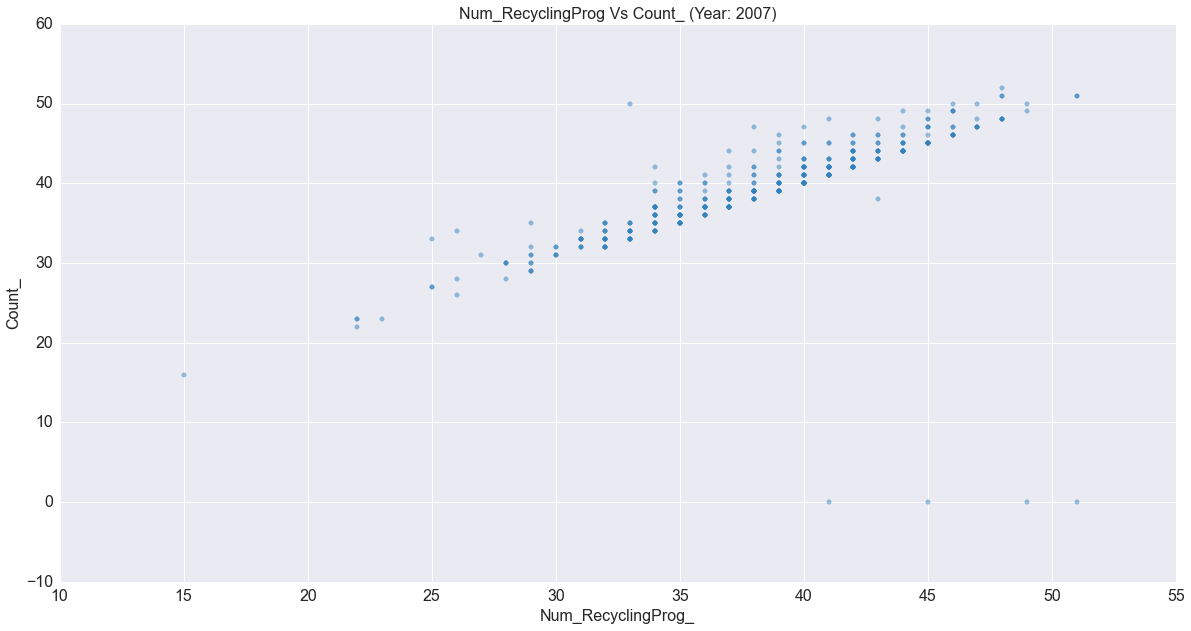

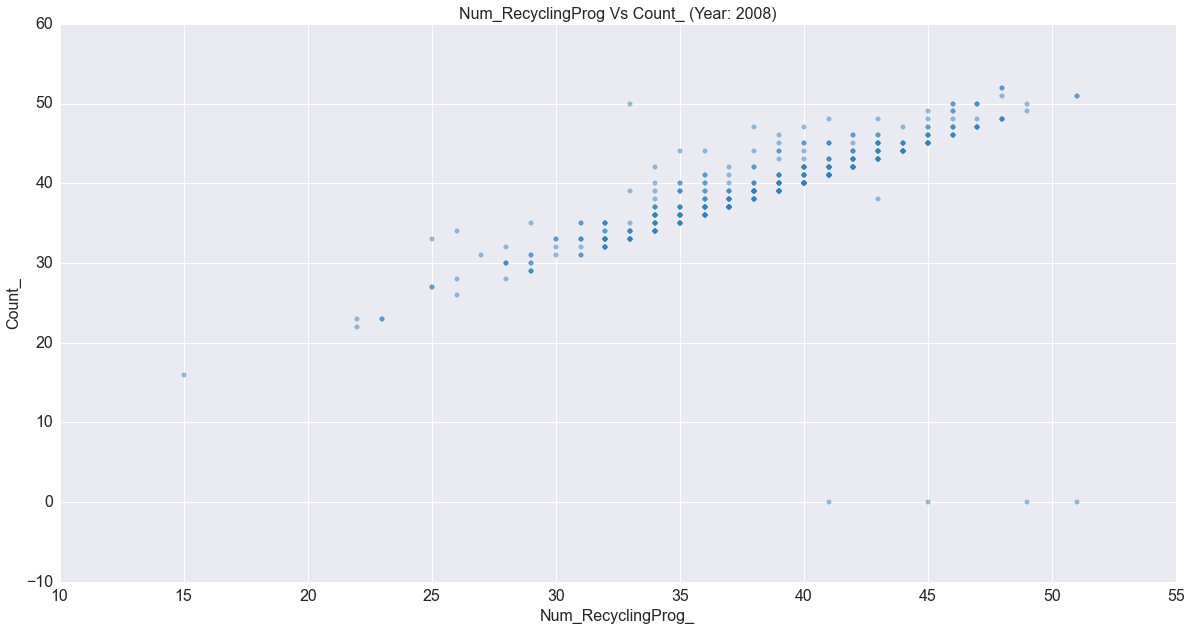

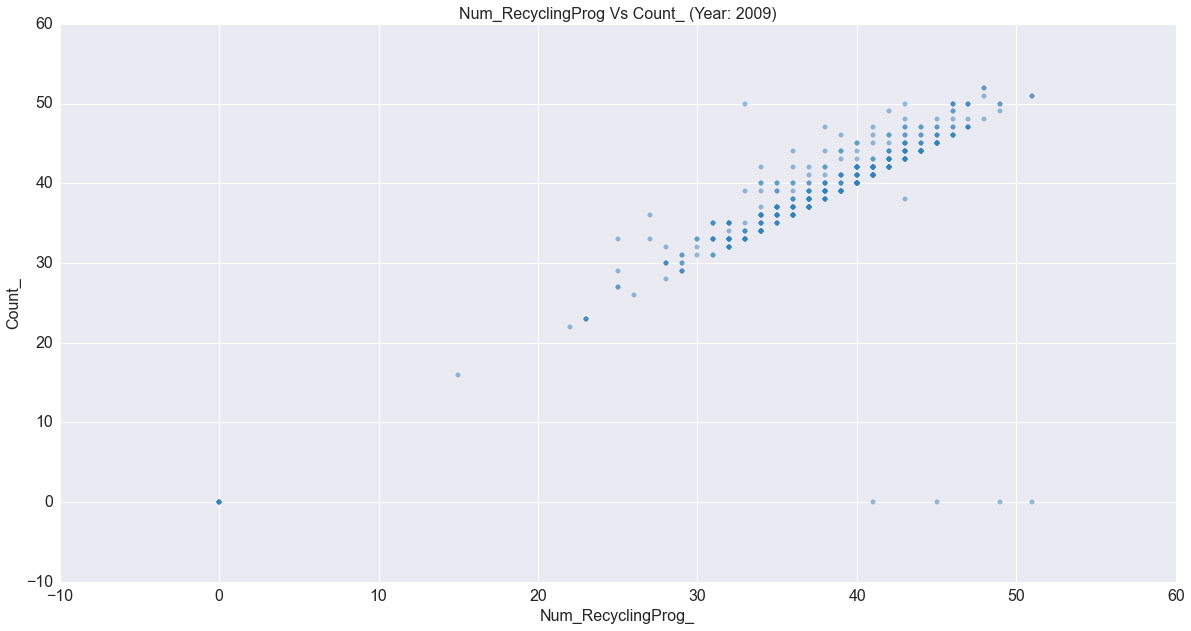

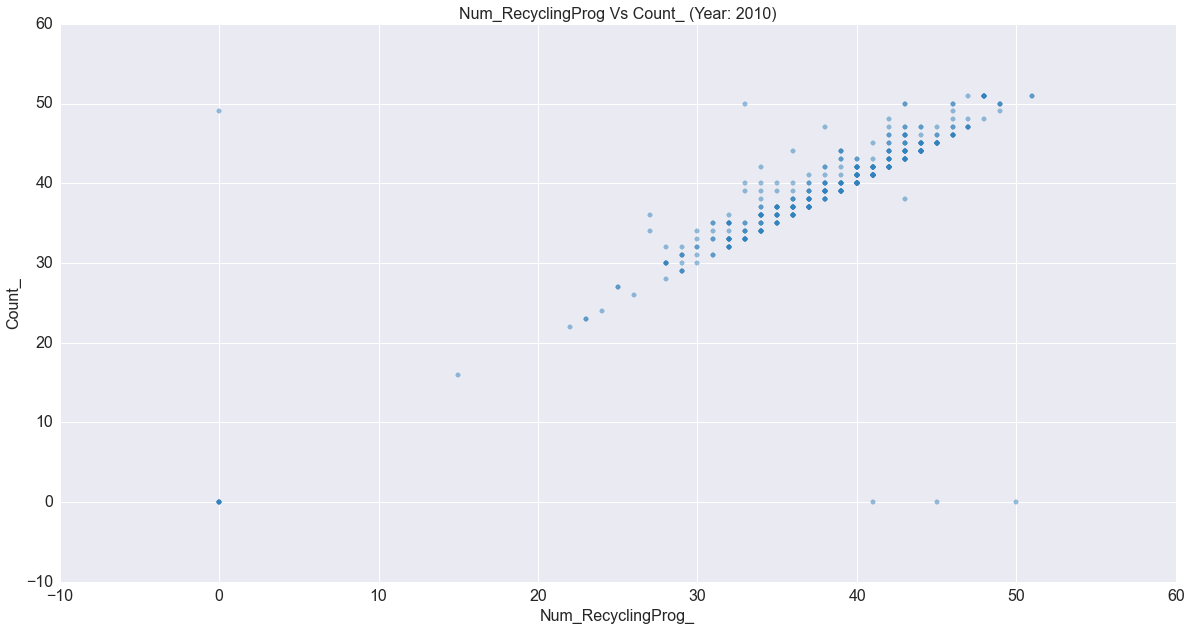

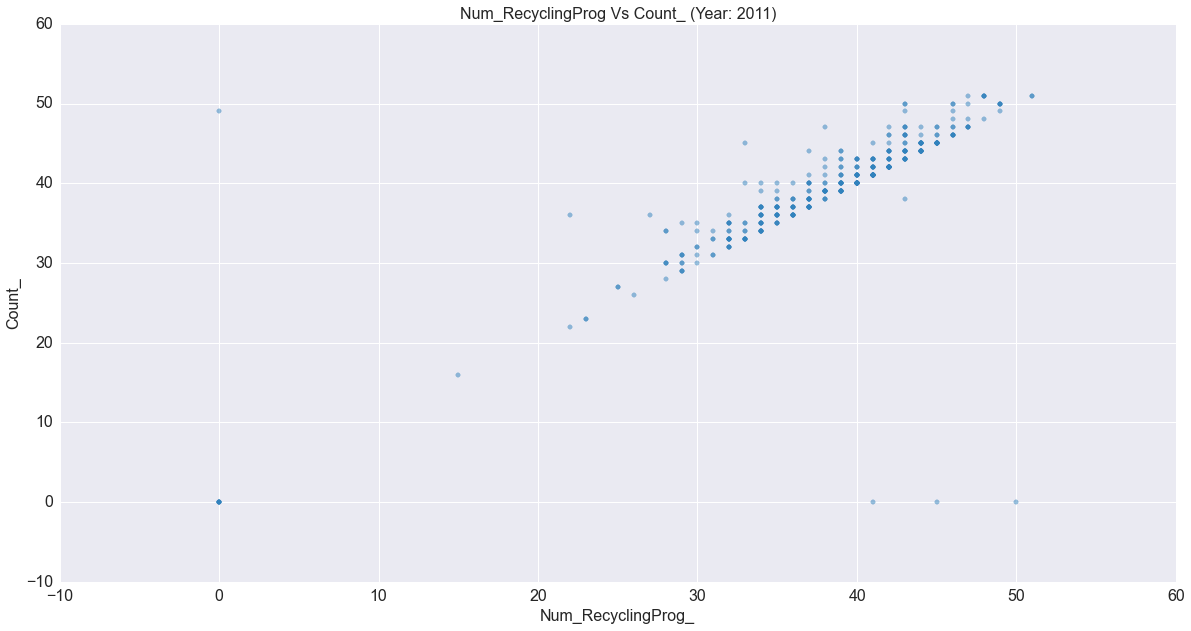

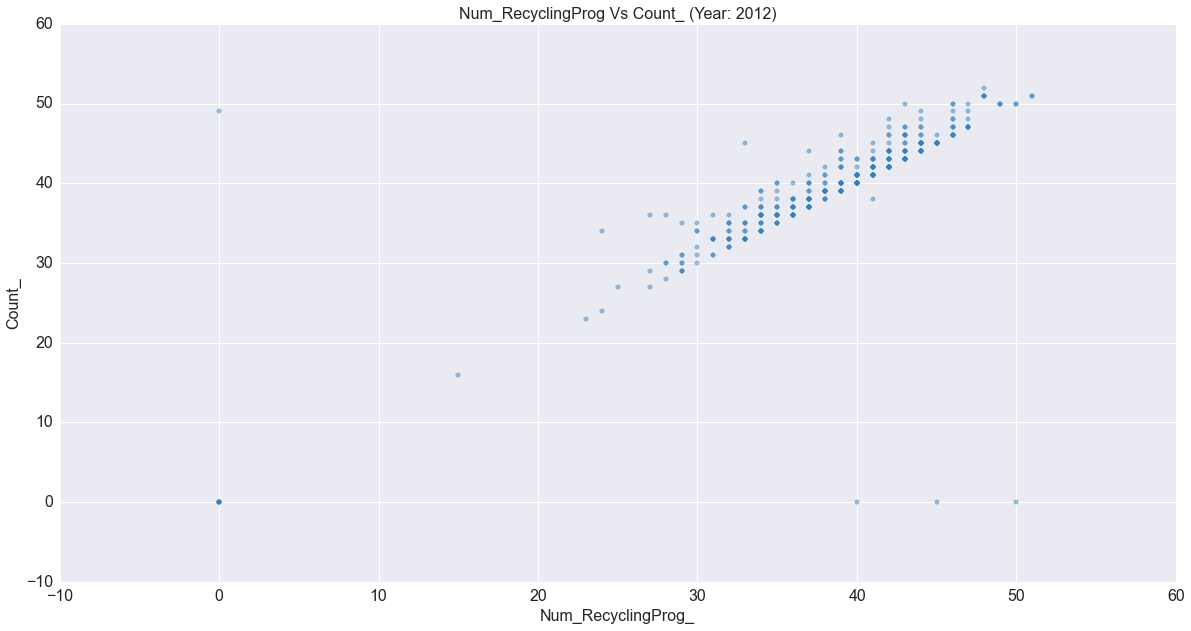

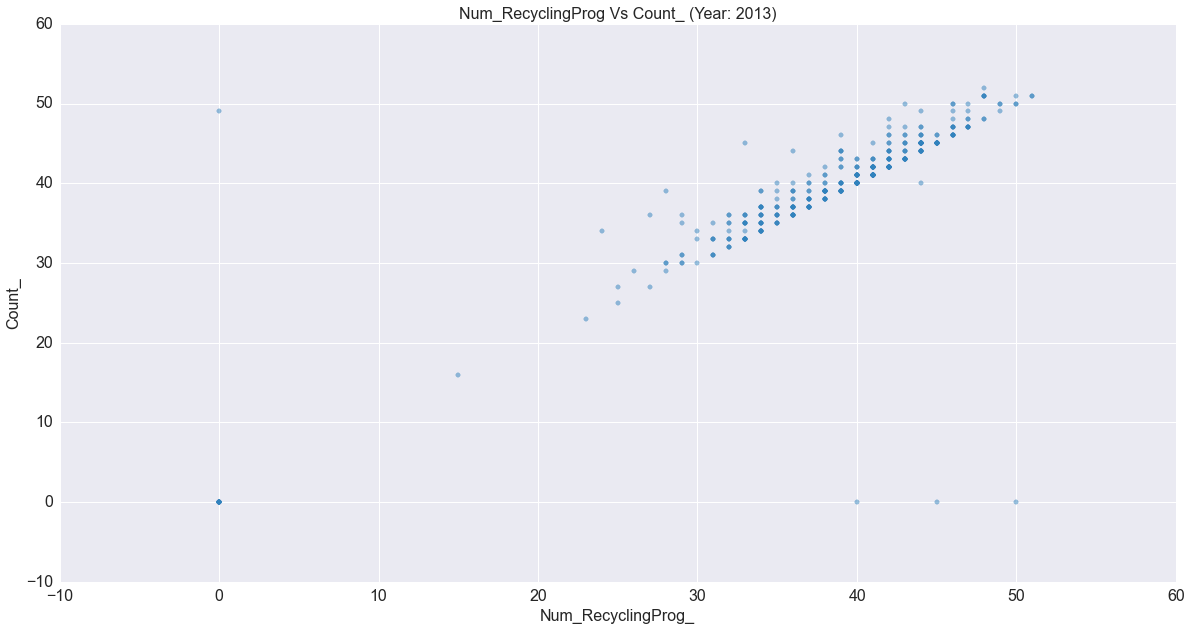

In [343]:
# Check if Num_RecyclingProg_ and Count_ data match
years = list(np.arange(2007, 2014, 1))
for year in years:
    i = str(year)
    plt.figure(figsize=(20,10))
    plt.scatter(data['Num_RecyclingProg_' + i], data['Count_' + i], color = '#3182bd', alpha = 0.5)
    # Set axis labels
    plt.xlabel('Num_RecyclingProg_', fontsize = 16)
    plt.ylabel('Count_', fontsize = 16)
    # Set tick label size
    plt.tick_params(axis = 'both', which = 'major', labelsize = 16)
    # Set figure title
    plt.title('Num_RecyclingProg Vs Count_ (Year: ' + i + ')' , fontsize = 16)
    plt.show()

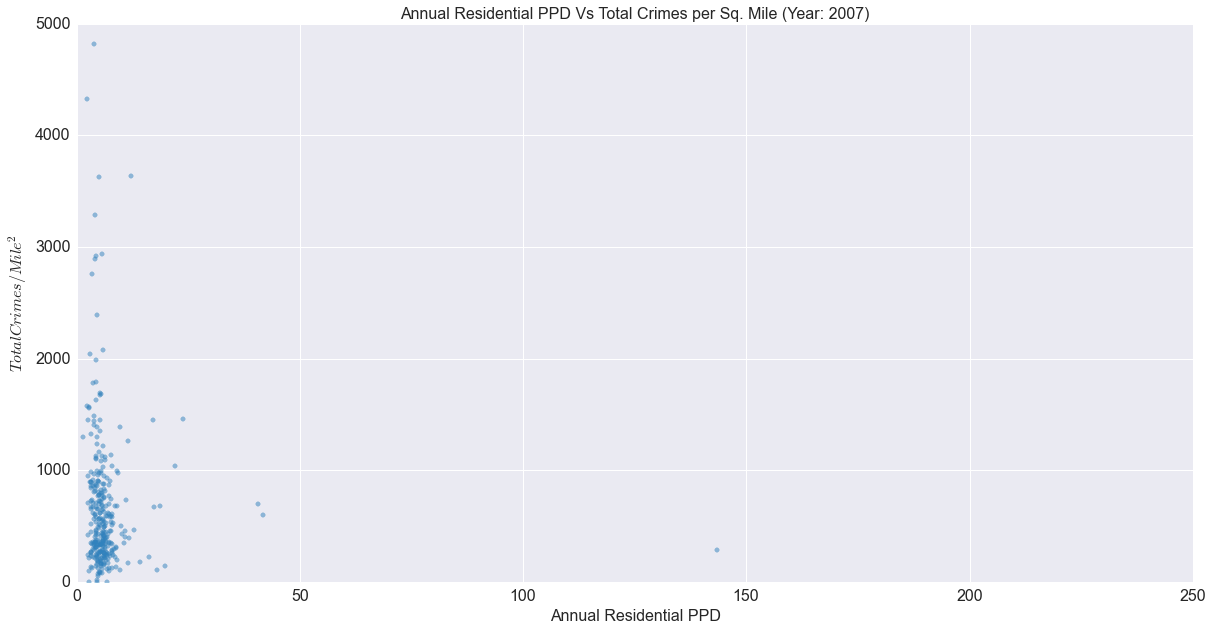

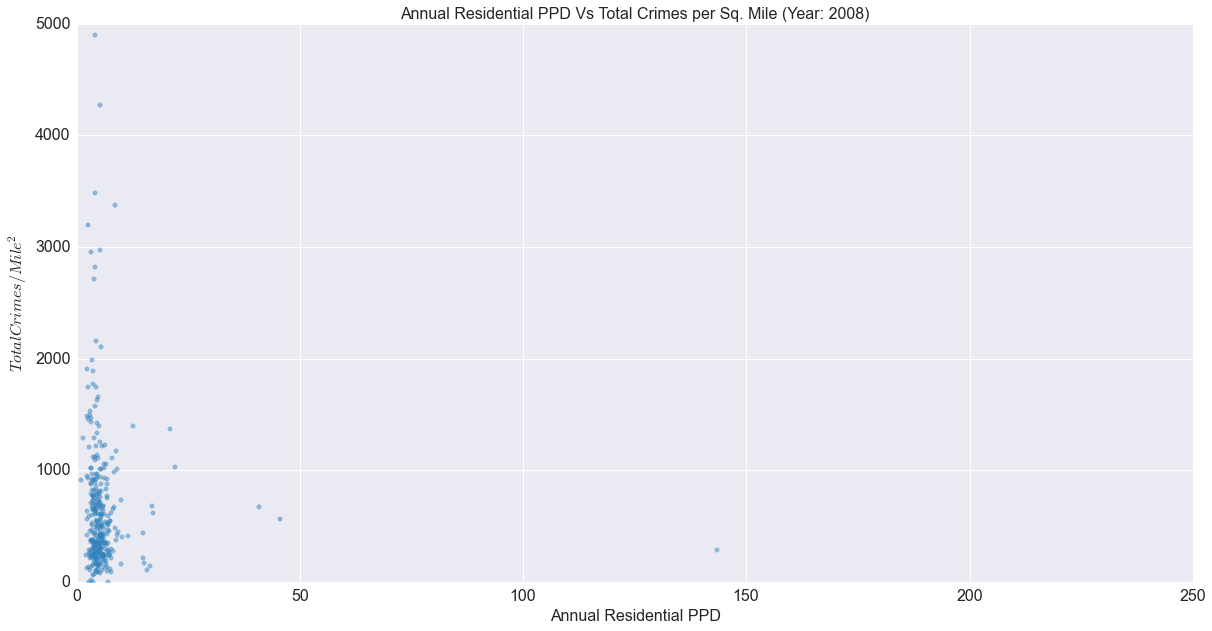

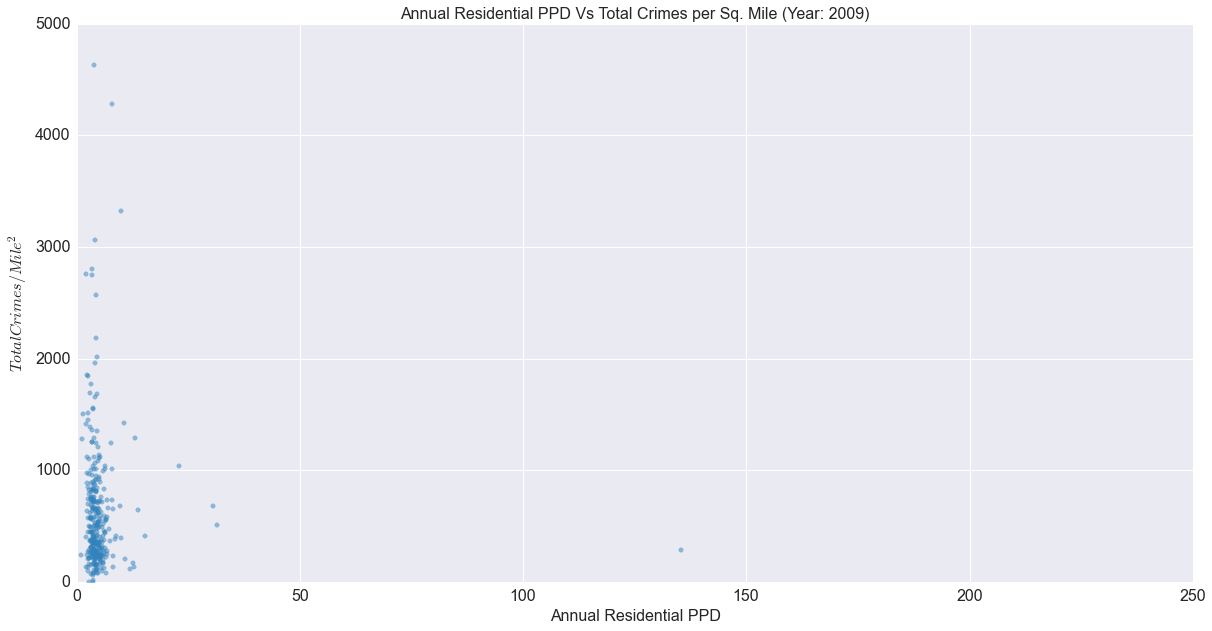

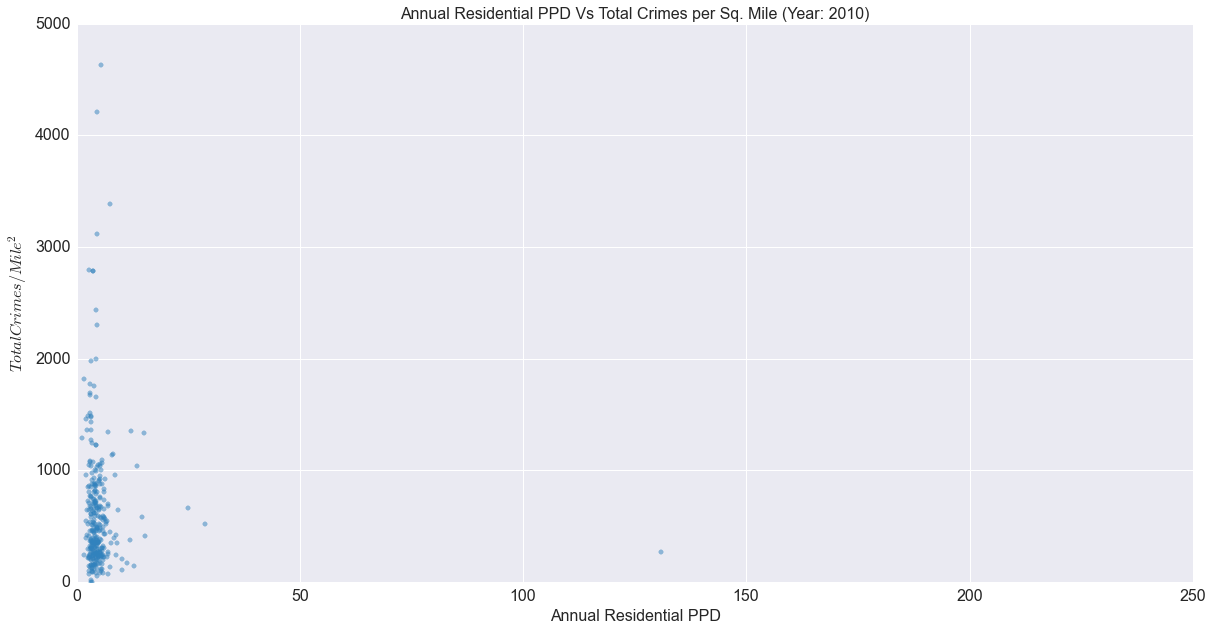

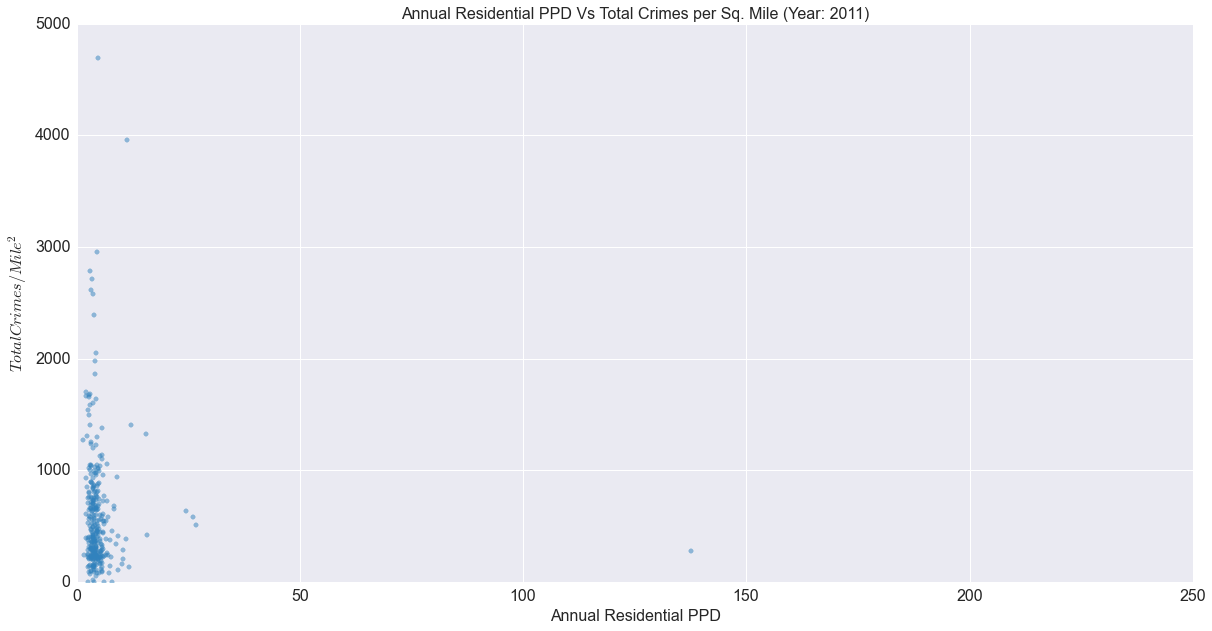

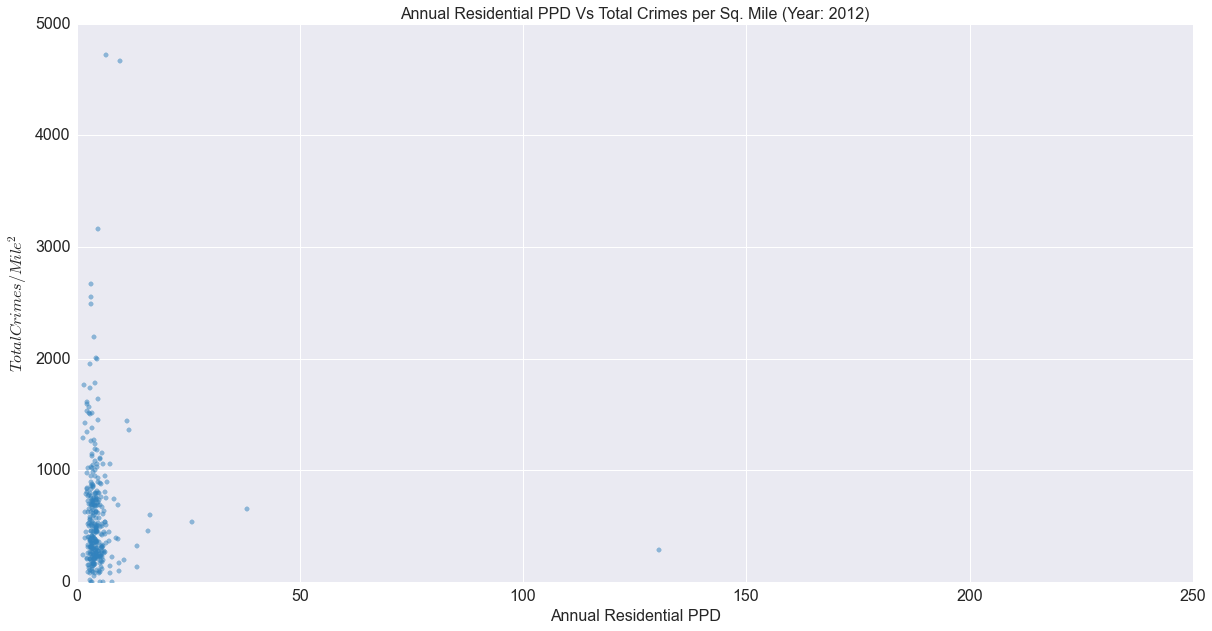

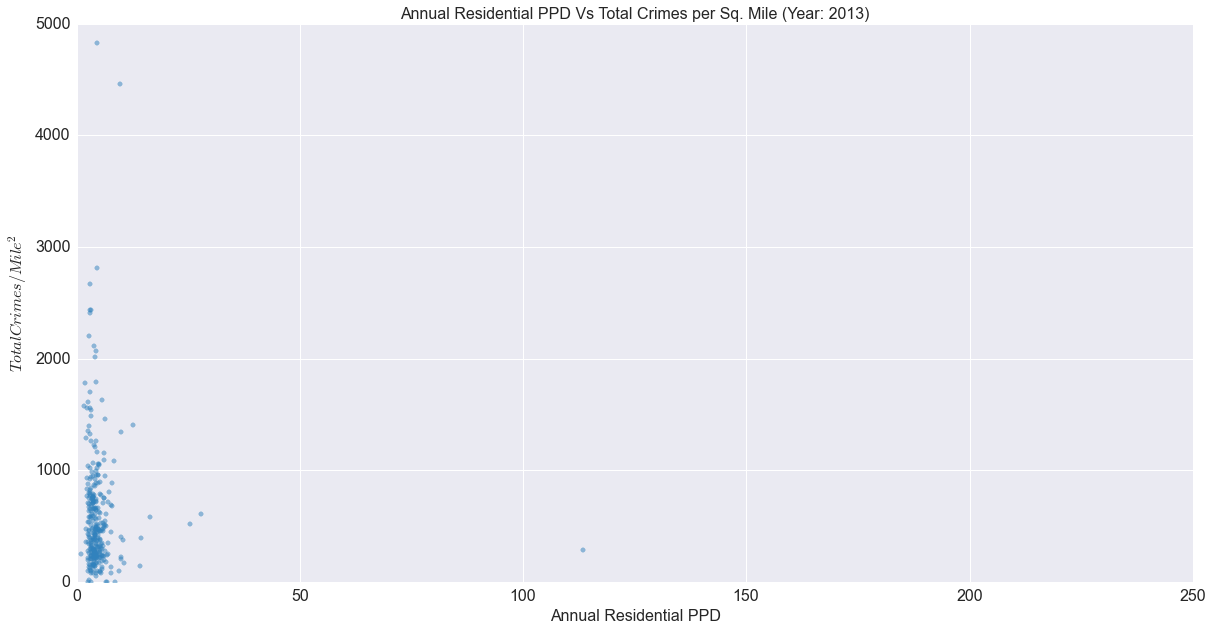

In [133]:
# Check if there is relation between Annual Residential PPD vs Total Crimes/Sq. Mile
years = list(np.arange(2007, 2014, 1))
for year in years:
    i = str(year)
    plt.figure(figsize=(20,10))
    plt.scatter(data['Annual_ResPPD_' + i], data['TotCrimes_' + i]/data['Area_SqMi'], color = '#3182bd', alpha = 0.5)
    # Set axis labels
    plt.xlabel('Annual Residential PPD', fontsize = 16)
    plt.ylabel('$Total Crimes/Mile^2$', fontsize = 16)
    # Set axis limits
    plt.xlim(0, 250)
    plt.ylim(0, 5000)
    # Set tick label size
    plt.tick_params(axis = 'both', which = 'major', labelsize = 16)
    # Set figure title
    plt.title('Annual Residential PPD Vs Total Crimes per Sq. Mile (Year: ' + i + ')' , fontsize = 16)
    plt.show()

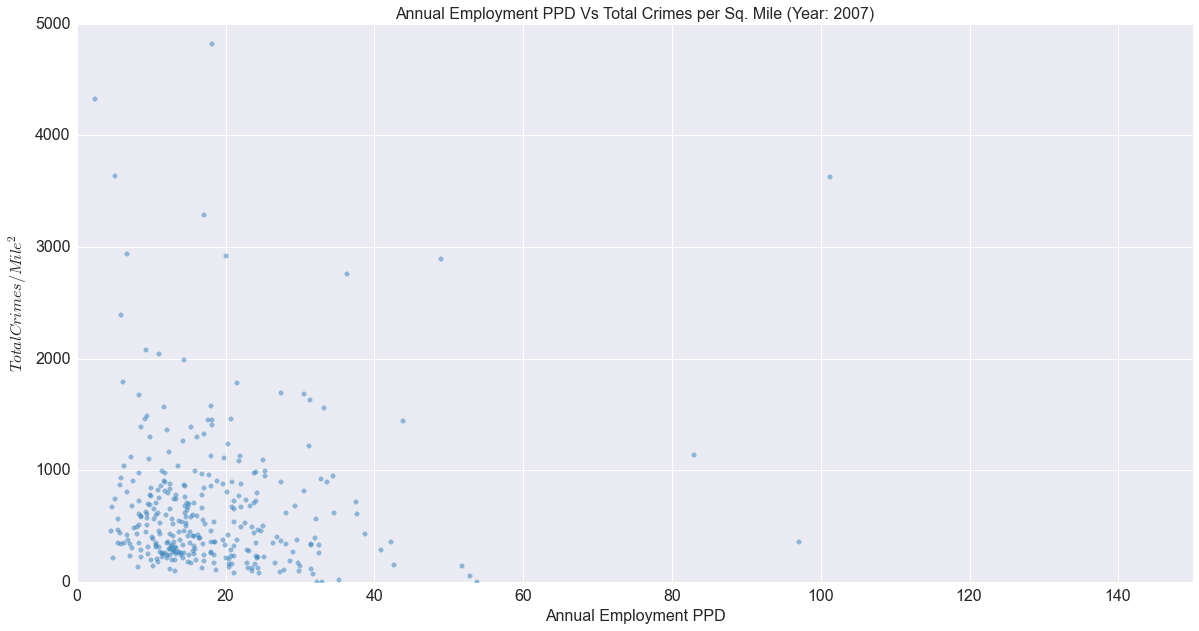

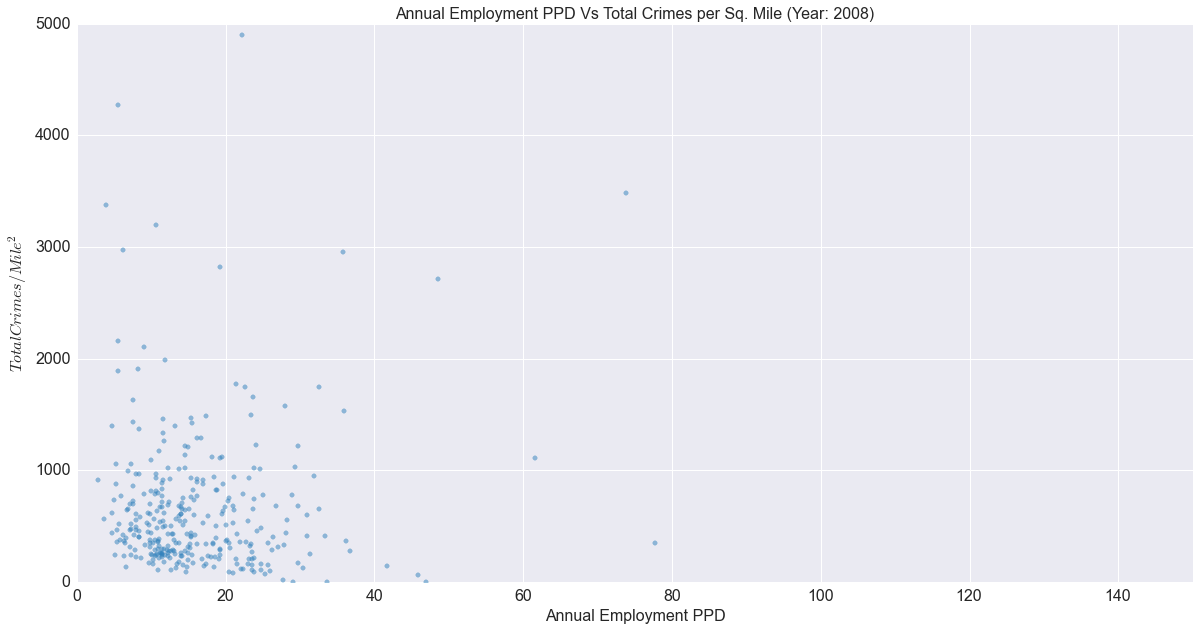

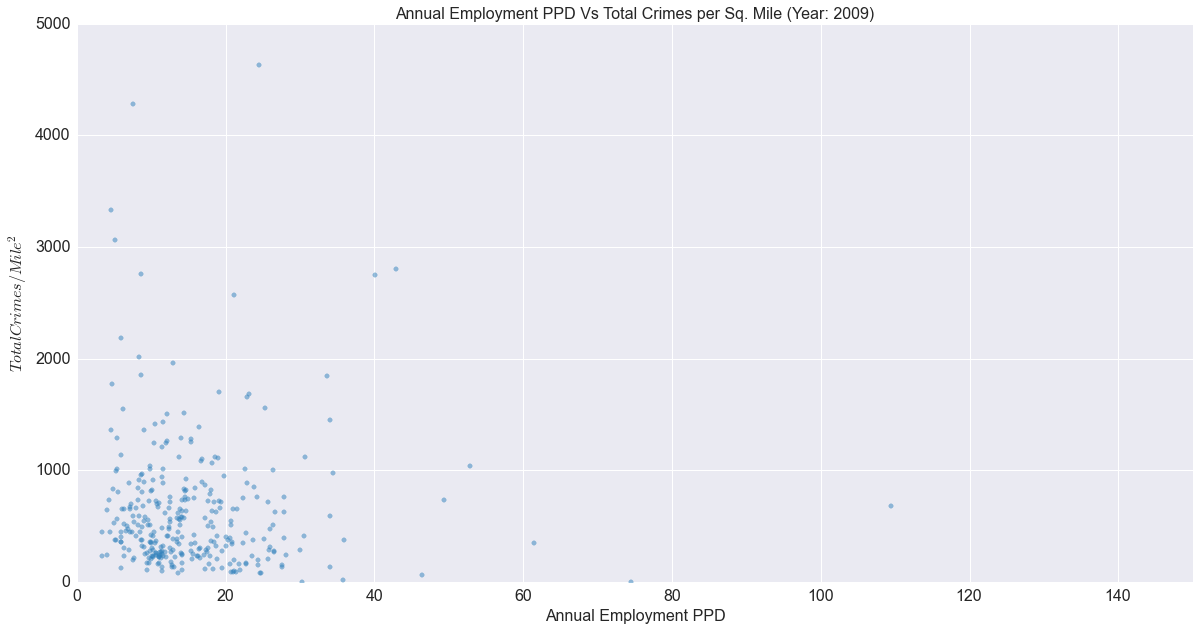

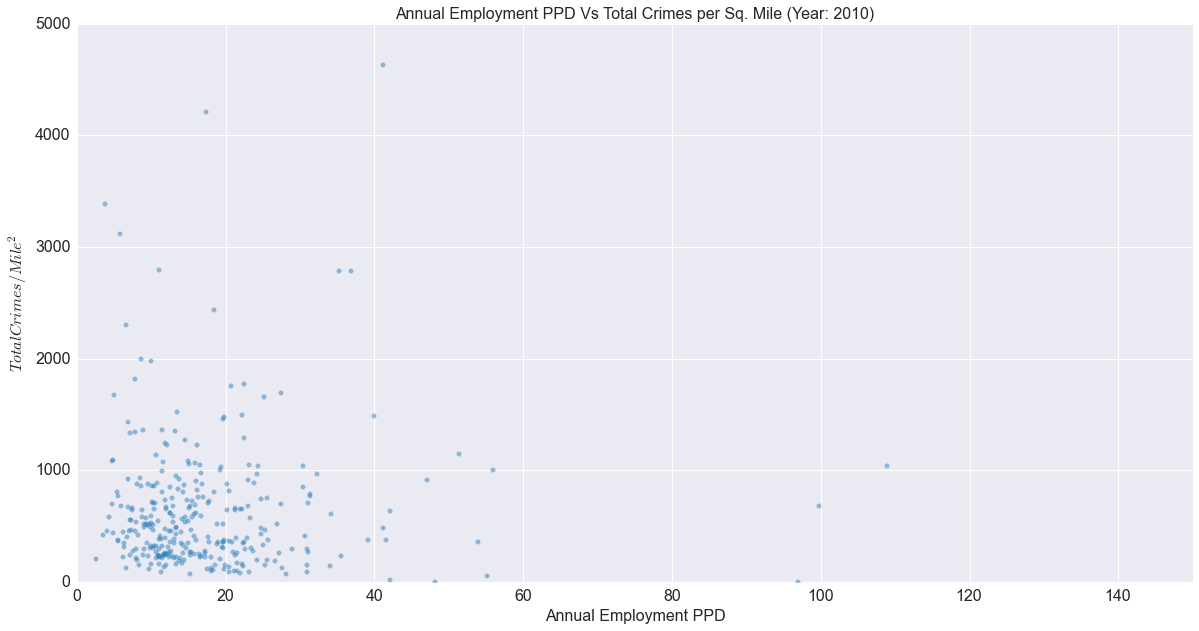

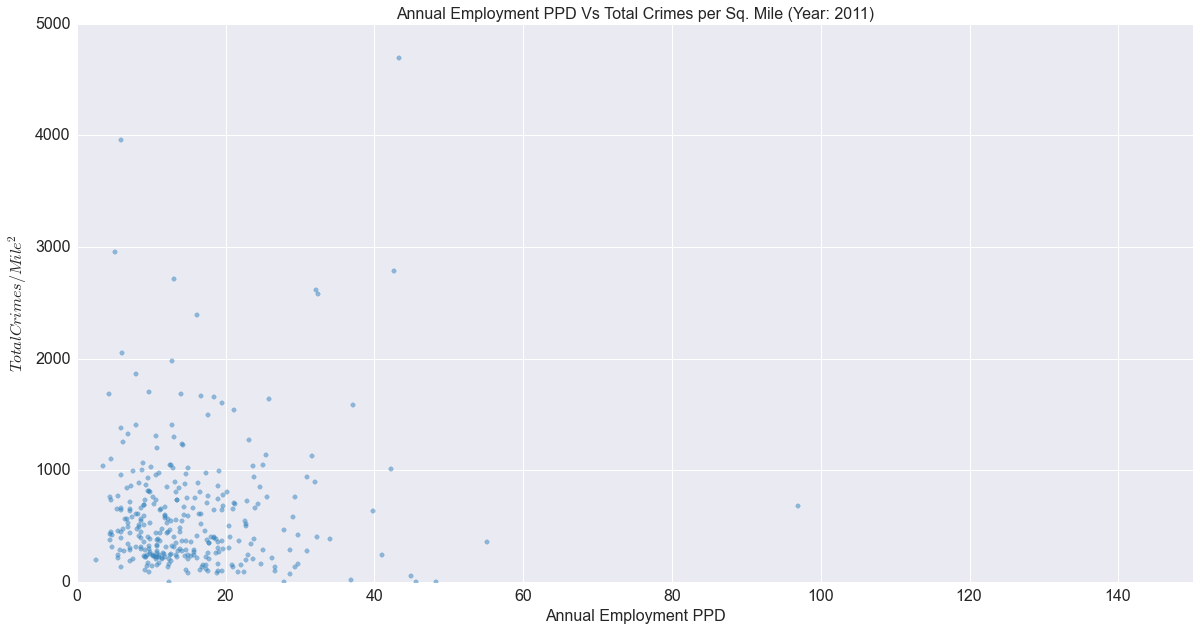

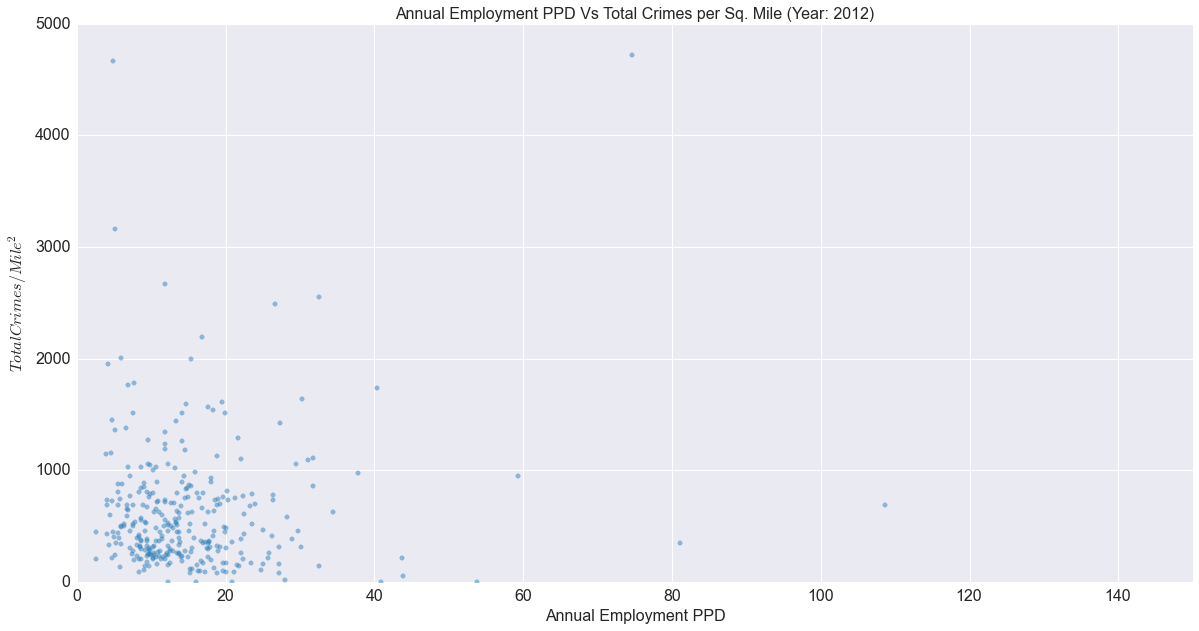

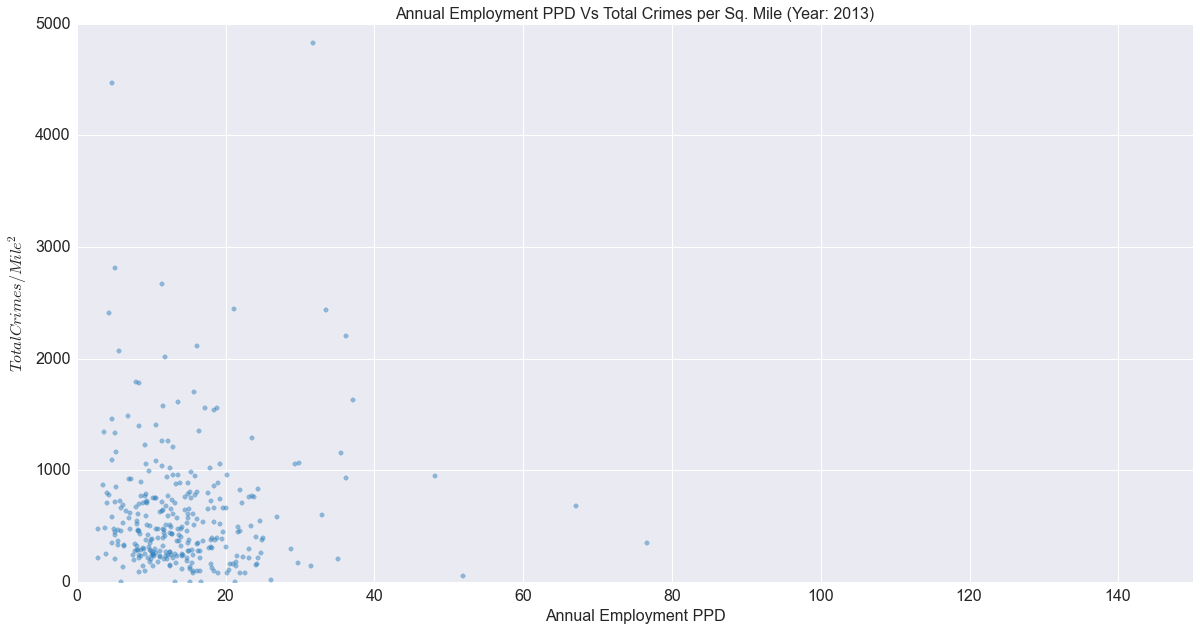

In [132]:
# Check if there is relation between Annual Employment PPD vs Total Crimes/Sq. Mile
years = list(np.arange(2007, 2014, 1))
for year in years:
    i = str(year)
    plt.figure(figsize=(20,10))
    plt.scatter(data['Annual_EmpPPD_' + i], data['TotCrimes_' + i]/data['Area_SqMi'], color = '#3182bd', alpha = 0.5)
    # Set axis labels
    plt.xlabel('Annual Employment PPD', fontsize = 16)
    plt.ylabel('$Total Crimes/Mile^2$', fontsize = 16)
    # Set axis limits
    plt.xlim(0, 150)
    plt.ylim(0, 5000)
    # Set tick label size
    plt.tick_params(axis = 'both', which = 'major', labelsize = 16)
    # Set figure title
    plt.title('Annual Employment PPD Vs Total Crimes per Sq. Mile (Year: ' + i + ')' , fontsize = 16)
    plt.show()

In [137]:
# Check relation between Target Emp PPD or Target Res PPD or Annual Emp PPD or Annual Res PPD vs Dem %, Rep %, Green % registered
def plot_voter(df, ppd):
    '''
    Function to plot PPD vs % Registered
    ppd: Target_EmpPPD_ or Target_ResPPD_ or Annual_ResPPD_ or Annual_EmpPPD_
    '''
    years = list(np.arange(2007, 2014, 1))
    for year in years:
        i = str(year)
        plt.figure(figsize=(20,10))
        plt.scatter(df[ppd + i], (df['Democratic_' + i] * 100.0/df['Tot_Registered_' + i]), color = '#3182bd', alpha = 0.5, label = 'Democratic')
        plt.scatter(df[ppd + i], (df['Republican_' + i] * 100.0/df['Tot_Registered_' + i]), color = '#de2d26', alpha = 0.5, label = 'Republican')
        plt.scatter(df[ppd + i], (df['Green_' + i] * 100.0/df['Tot_Registered_' + i]), color = '#31a354', alpha = 0.5, label = 'Green')
        # Set axis labels
        plt.xlabel(ppd, fontsize = 16)
        plt.ylabel('% Registered', fontsize = 16)
        # Set axis limits
        #plt.xlim(0, max(df[ppd + i]))
        plt.xlim(0, 250)
        plt.ylim(0, 100)
        # Set tick label size
        plt.tick_params(axis = 'both', which = 'major', labelsize = 16)
        # Set figure title
        plt.title(ppd + ' Vs Percent Registered (Year: ' + i + ')' , fontsize = 16)
        # Set legend and legends fontsize
        plt.legend(prop={'size': 14})
        plt.show()

# help(plot_voter)

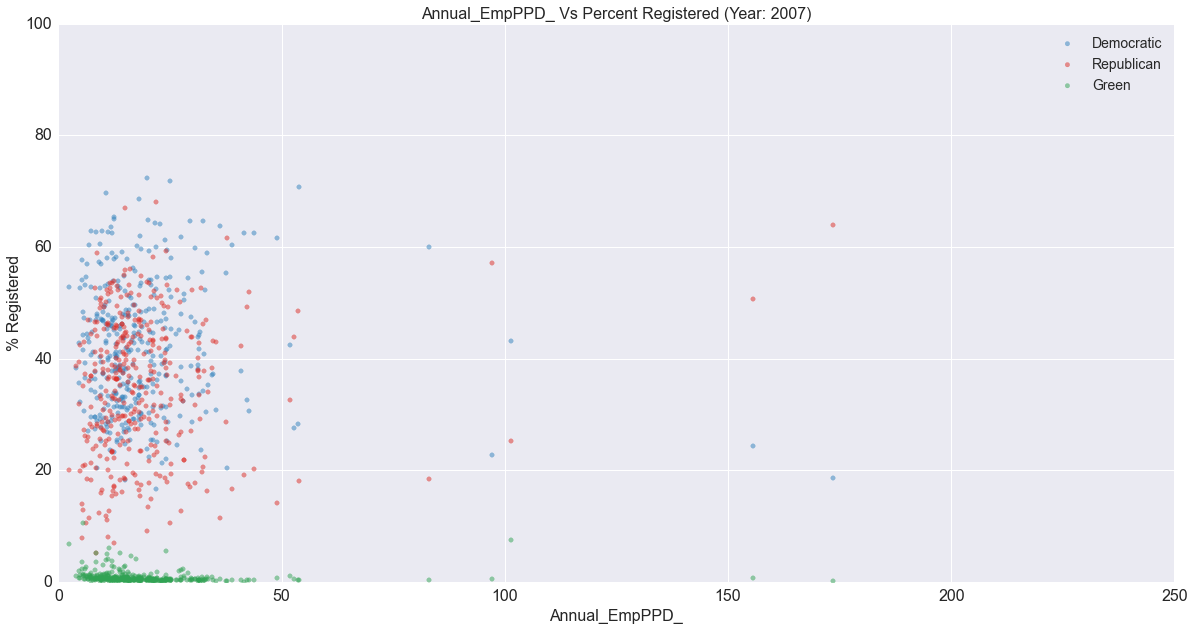

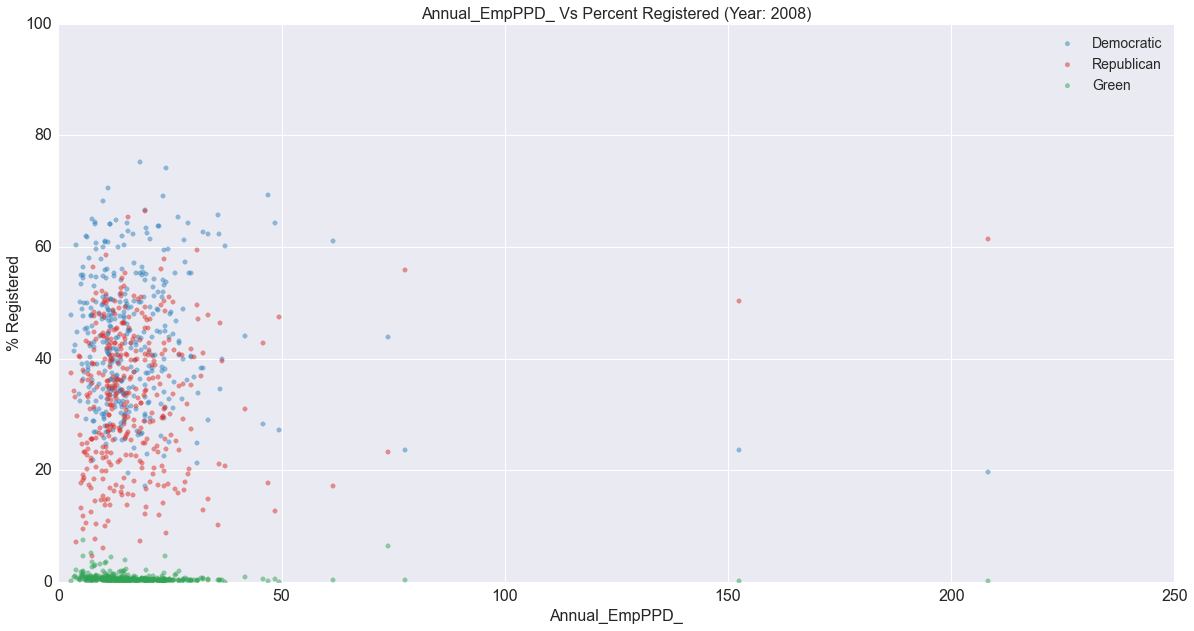

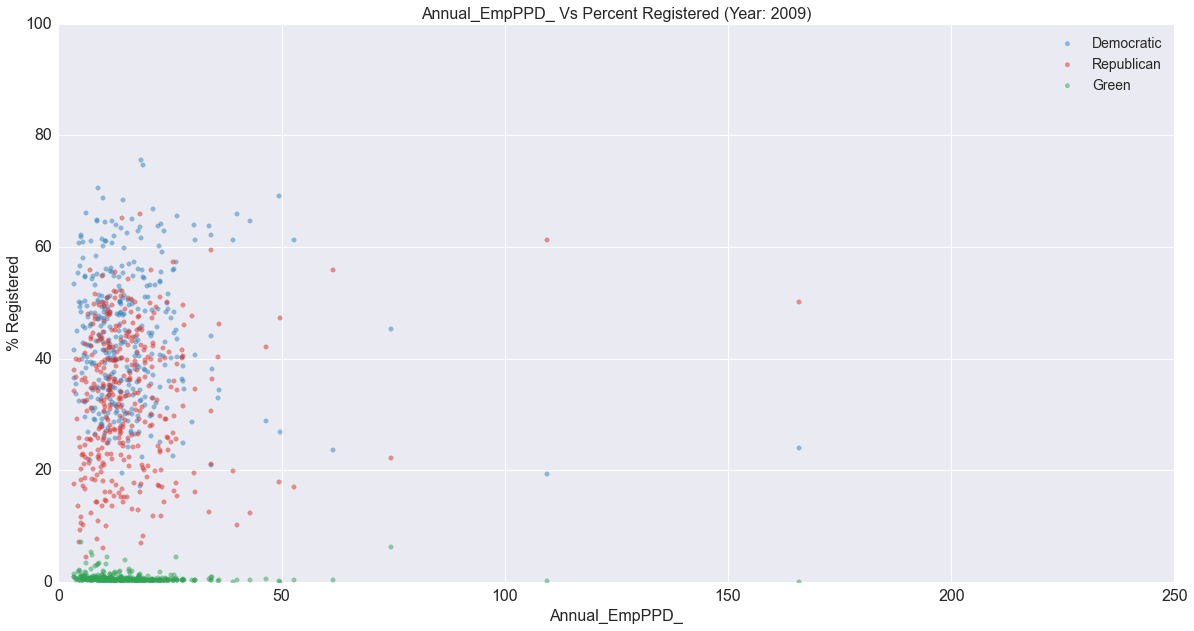

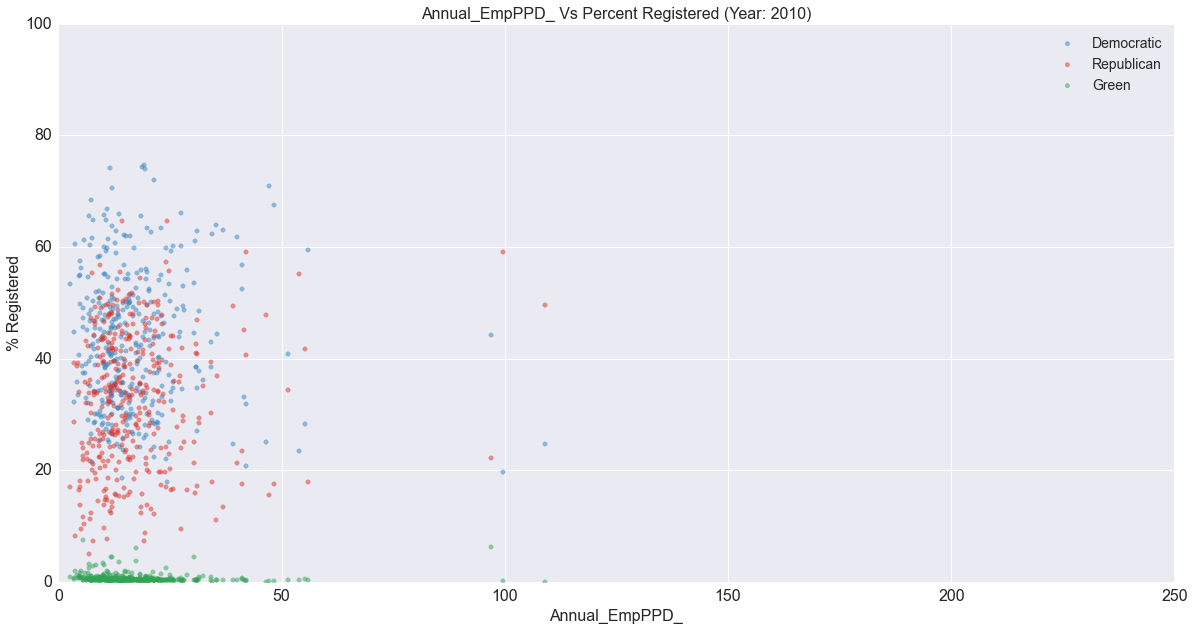

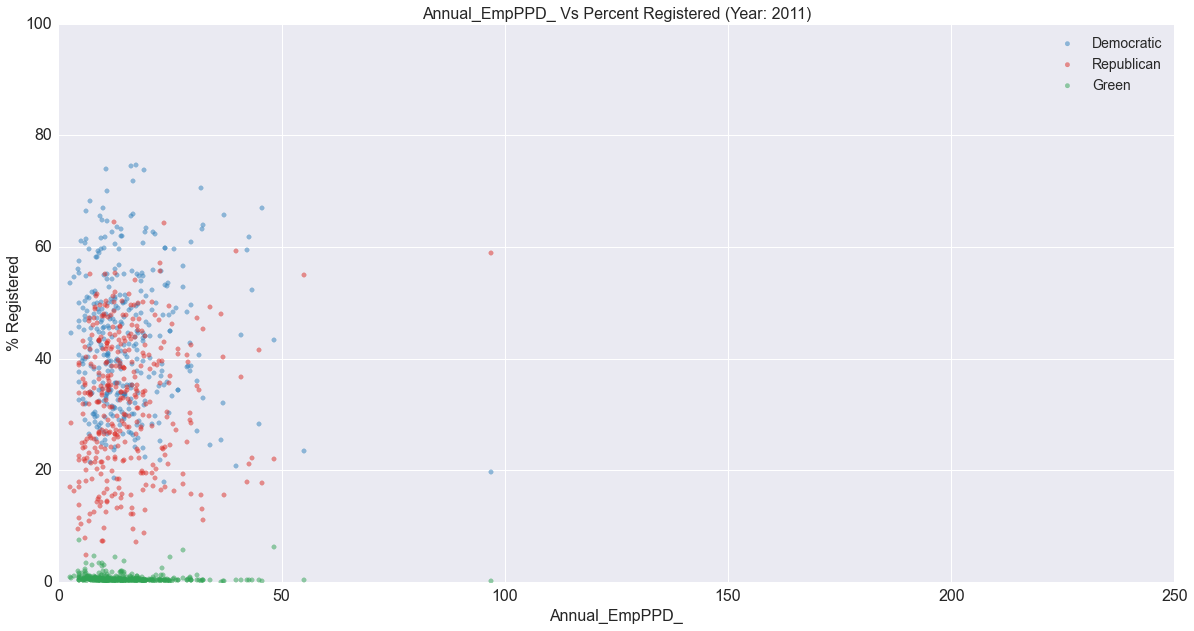

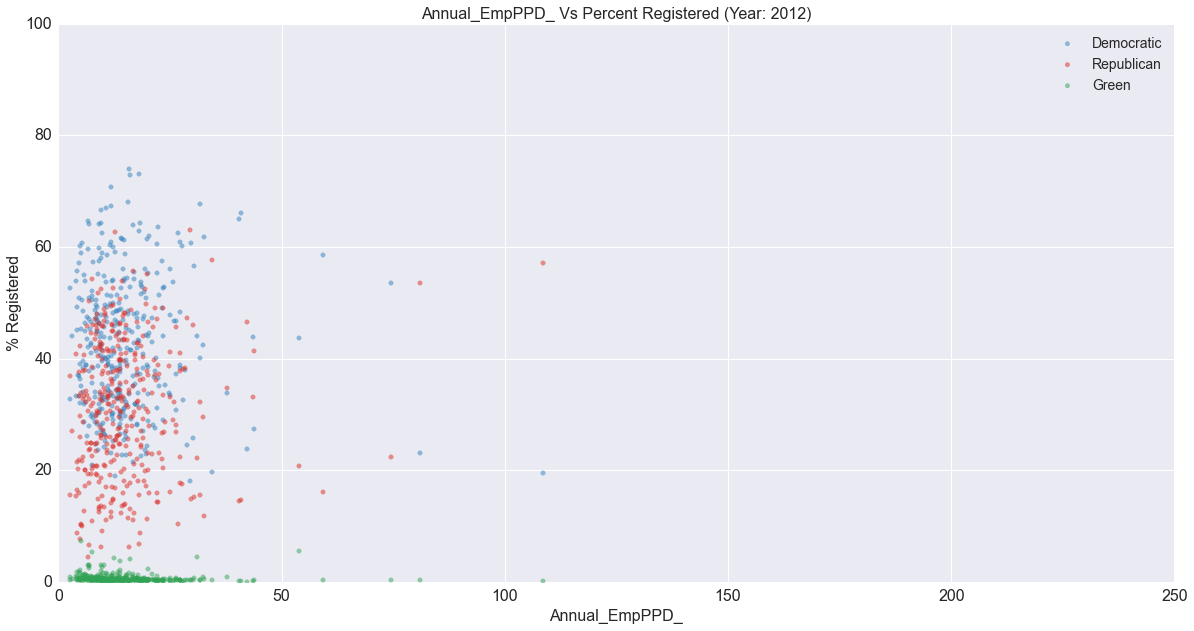

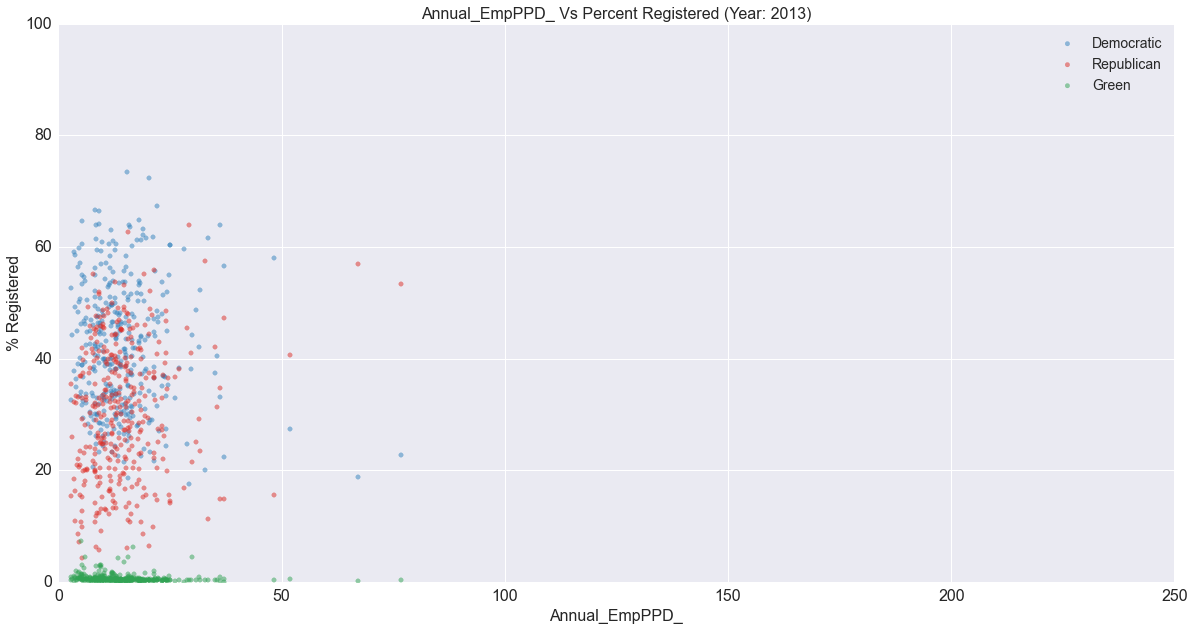

In [138]:
tEmp = 'Target_EmpPPD_'
tRes = 'Target_ResPPD_'
aEmp = 'Annual_EmpPPD_'
aRes = 'Annual_ResPPD_'

# Annual Employment PPD vs Voter %
plot_voter(data, aEmp)

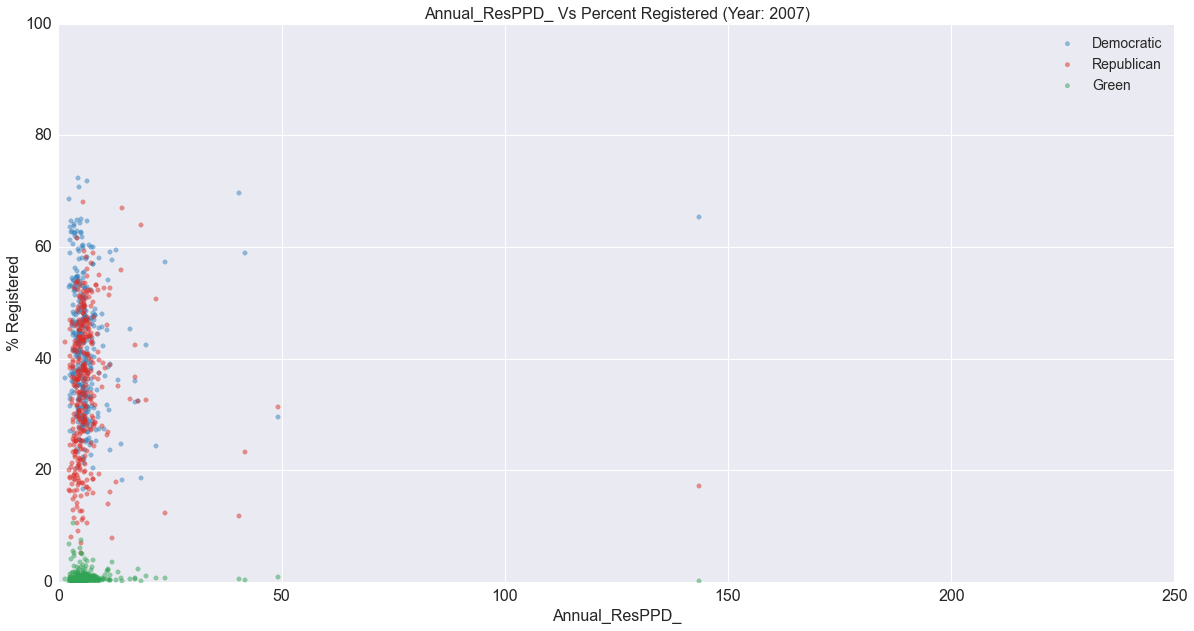

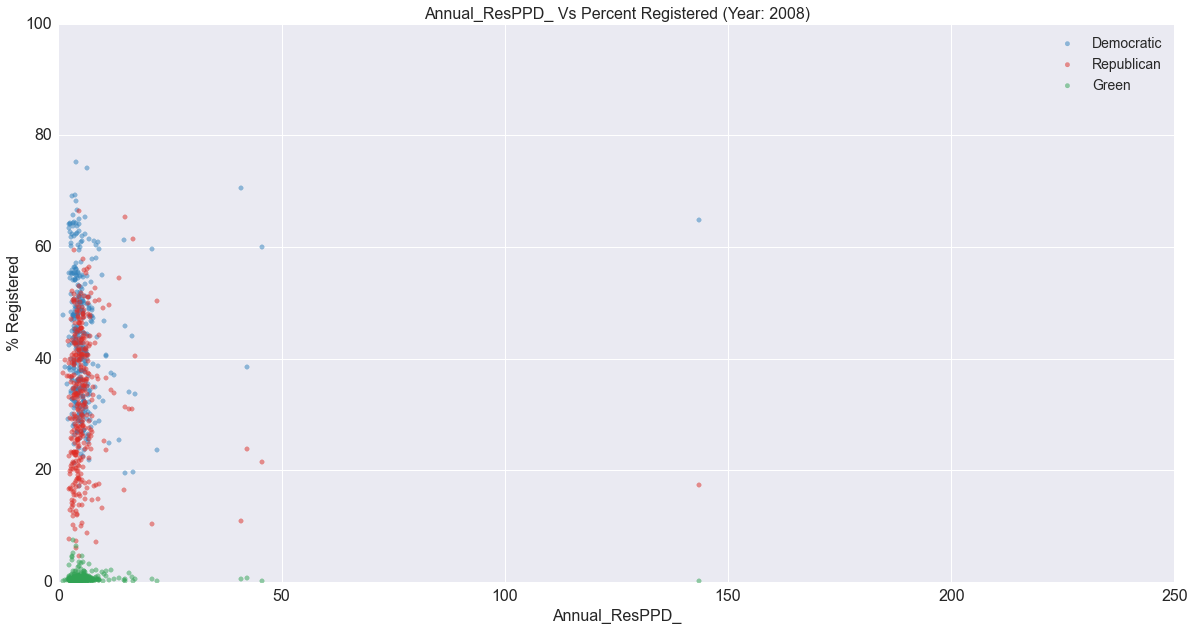

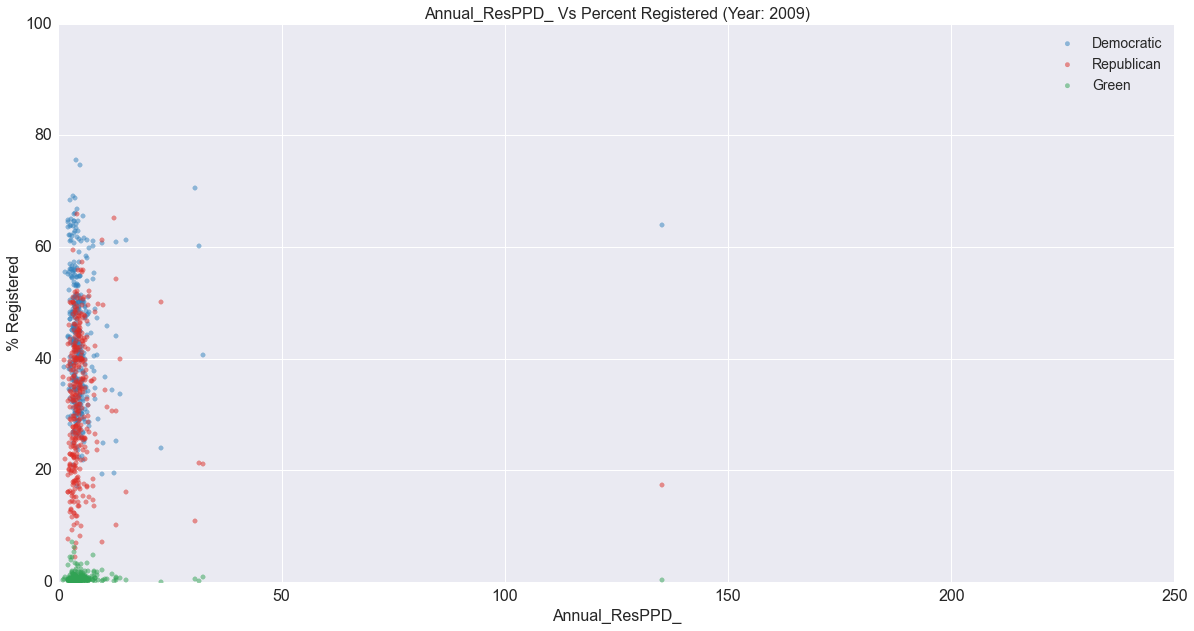

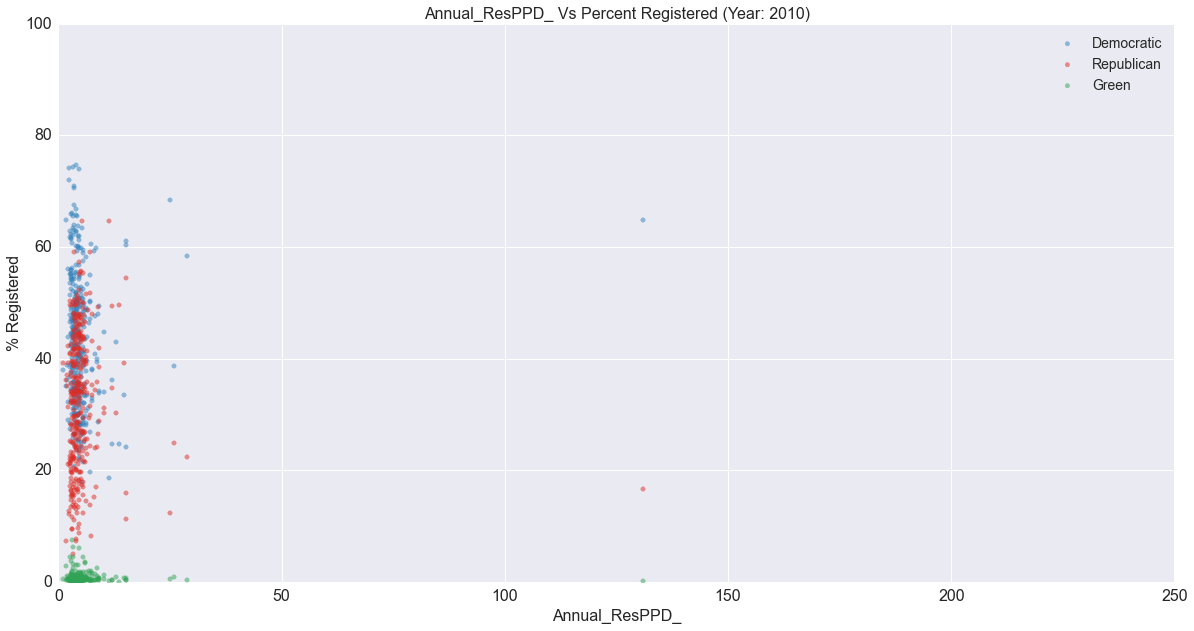

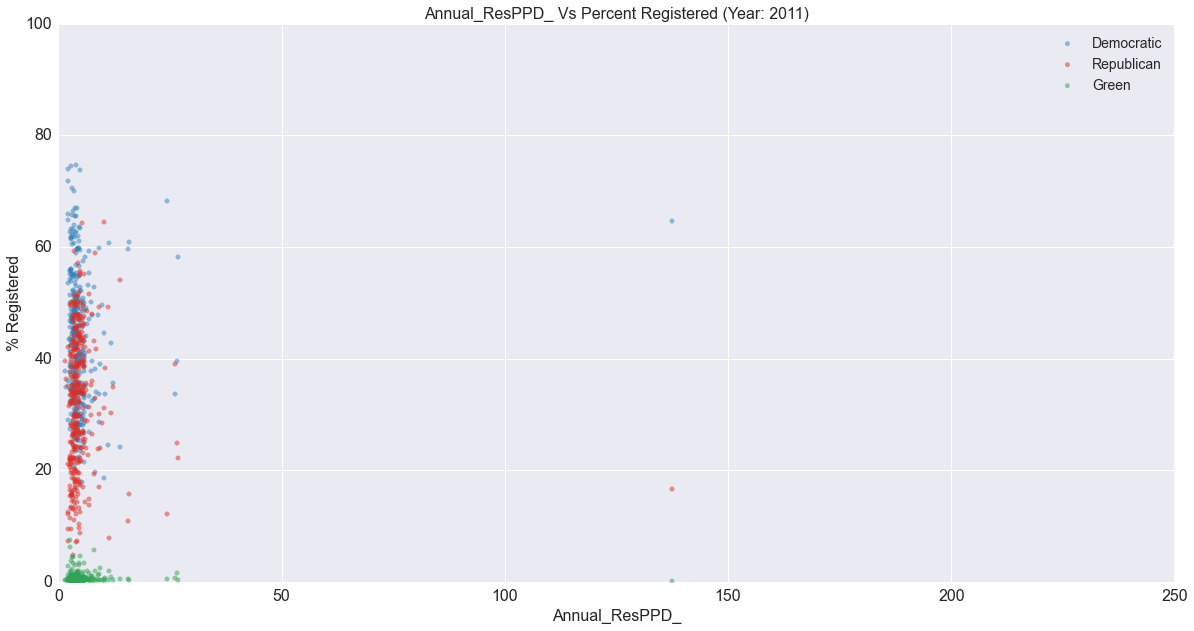

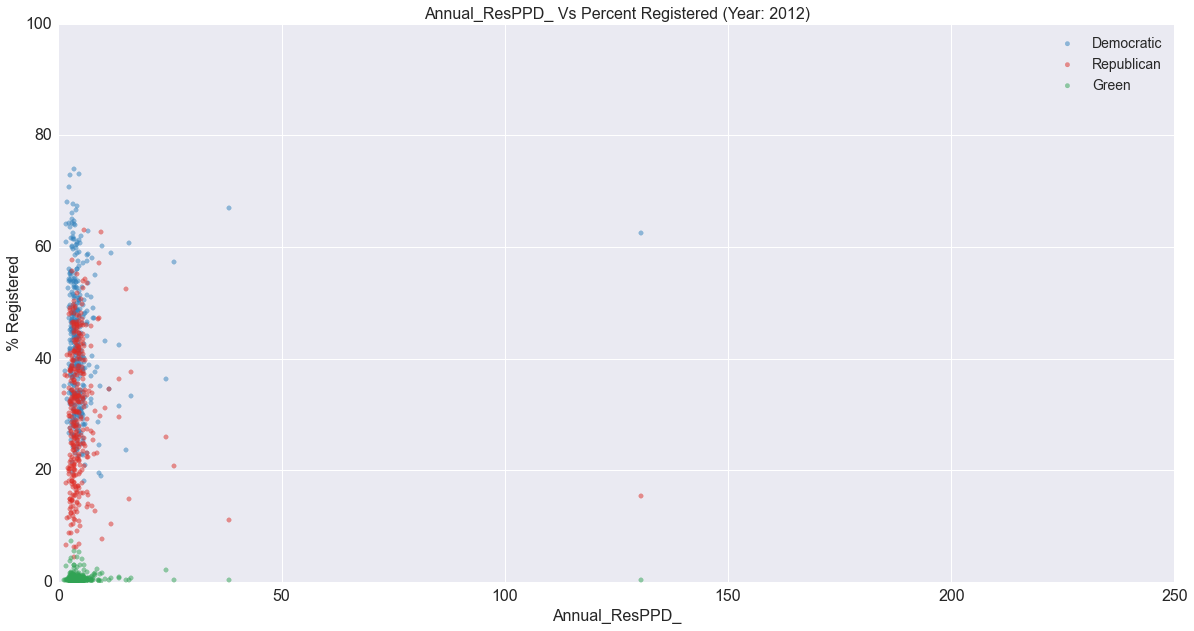

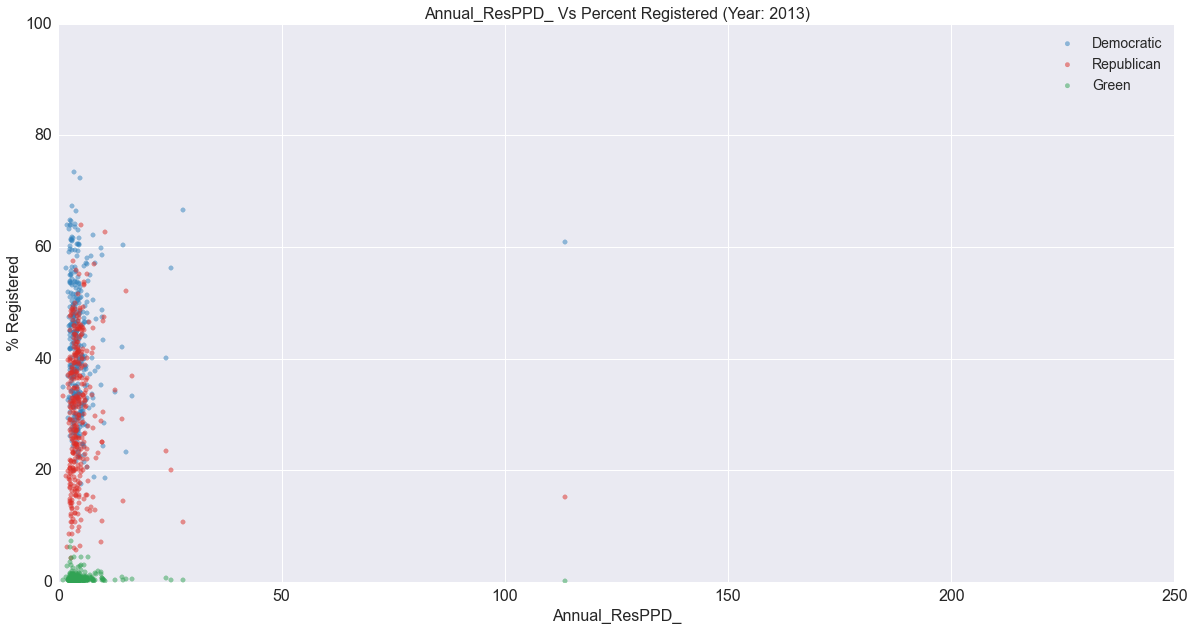

In [139]:
# Annual Residential PPD vs Voter %
plot_voter(data, aRes) # Ignored outlier by setting plt.xlim(0, 250) in function

In [143]:
# Check relation between PPD rate vs Jurisdictions with Democratic/Republican Majority
def dem_vs_rep(df, ppd):
    '''
    Function to plot PPD vs democratic/republican
    ppd: Target_EmpPPD_ or Target_ResPPD_ or Annual_ResPPD_ or Annual_EmpPPD_
    '''
    years = list(np.arange(2007, 2014, 1))
    for year in years:
        i = str(year)
        # Create a temporary dataframe calculating percent Dem/Rep
        temp = df[[ppd + i, 'Democratic_' + i, 'Republican_' + i, 'Tot_Registered_' + i]]
        temp['Democratic'] = temp['Democratic_' + i] * 100.0/temp['Tot_Registered_' + i]
        temp['Republican'] = temp['Republican_' + i] * 100.0/temp['Tot_Registered_' + i]
        plt.figure(figsize=(20,10))
        # If Dem > Rep - Blue, else - Red
        cond = temp['Democratic'] > temp['Republican']
        plt.scatter(temp[ppd + i][cond], temp['Democratic'][cond], color = '#3182bd', alpha = 0.5, label = 'Democratic')
        plt.scatter(temp[ppd + i][~cond], temp['Republican'][~cond], color = '#de2d26', alpha = 0.5, label = 'Republican')
        # Set axis labels
        plt.xlabel(ppd, fontsize = 16)
        plt.ylabel('% Registered', fontsize = 16)
        # Set axis limits
        #plt.xlim(0, max(df[ppd + i]))
        plt.xlim(0, 250)
        plt.ylim(0, 100)
        # Set tick label size
        plt.tick_params(axis = 'both', which = 'major', labelsize = 16)
        # Set figure title
        plt.title(ppd + ' Vs Percent Registered (Year: ' + i + ')' , fontsize = 16)
        # Set legend and legends fontsize
        plt.legend(prop={'size': 14})
        plt.show()

# help(plot_voter)

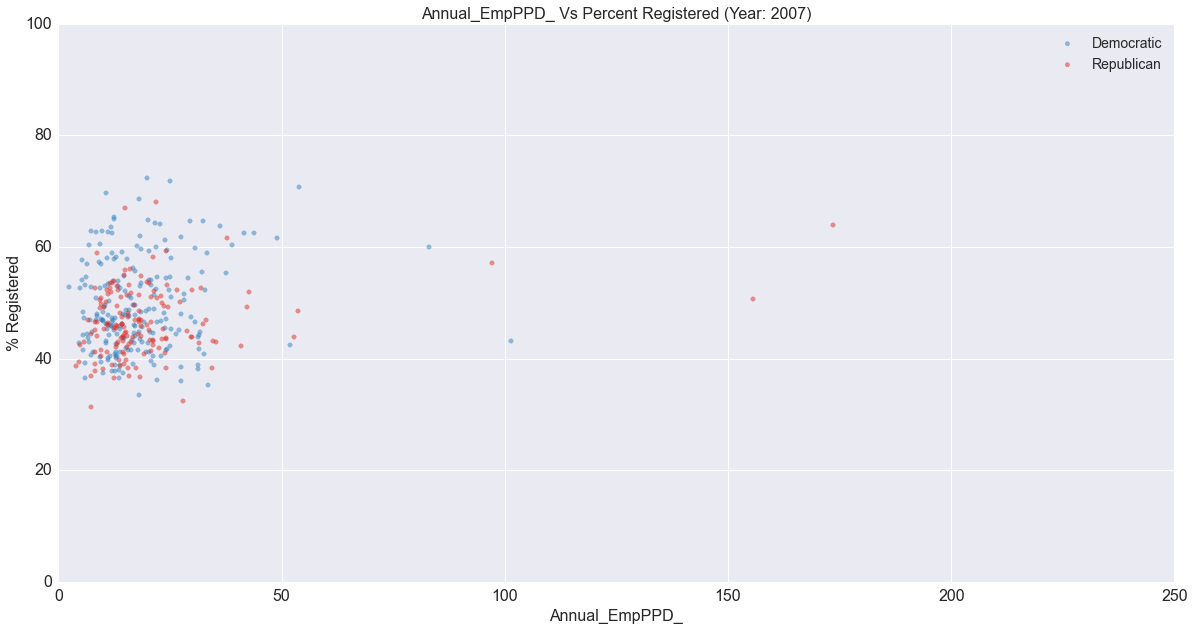

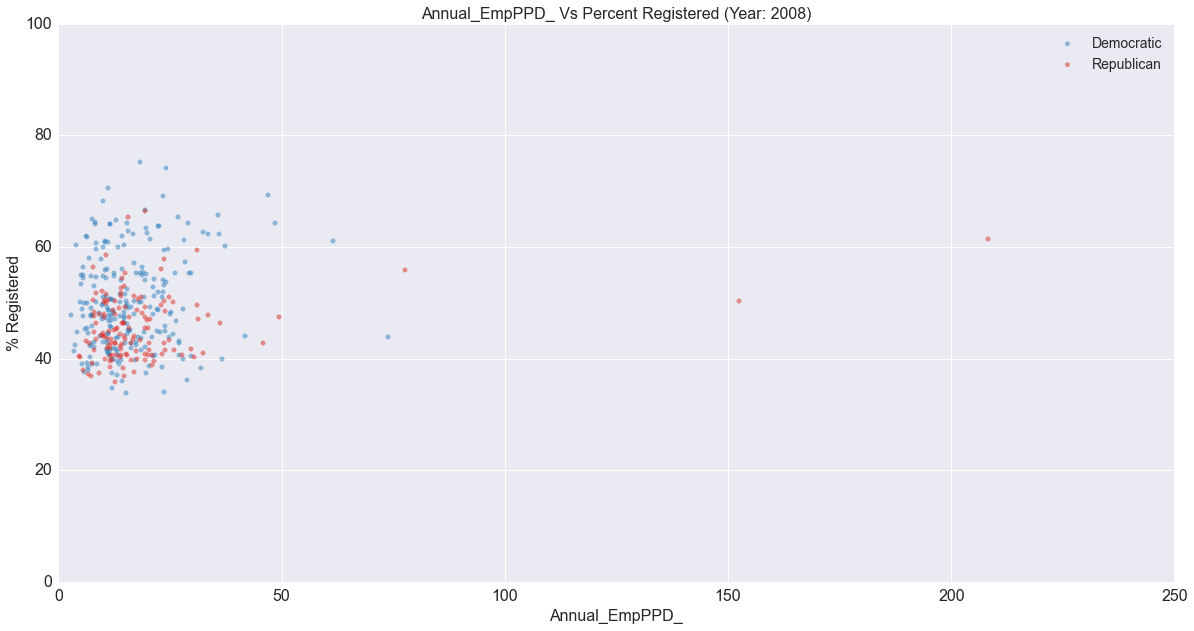

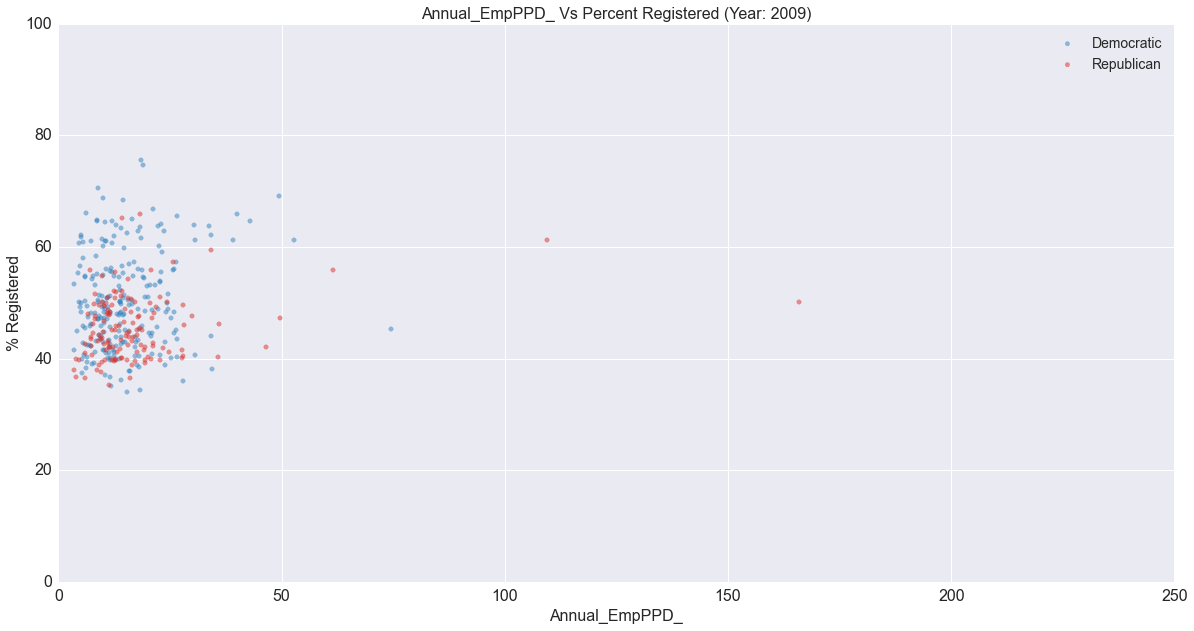

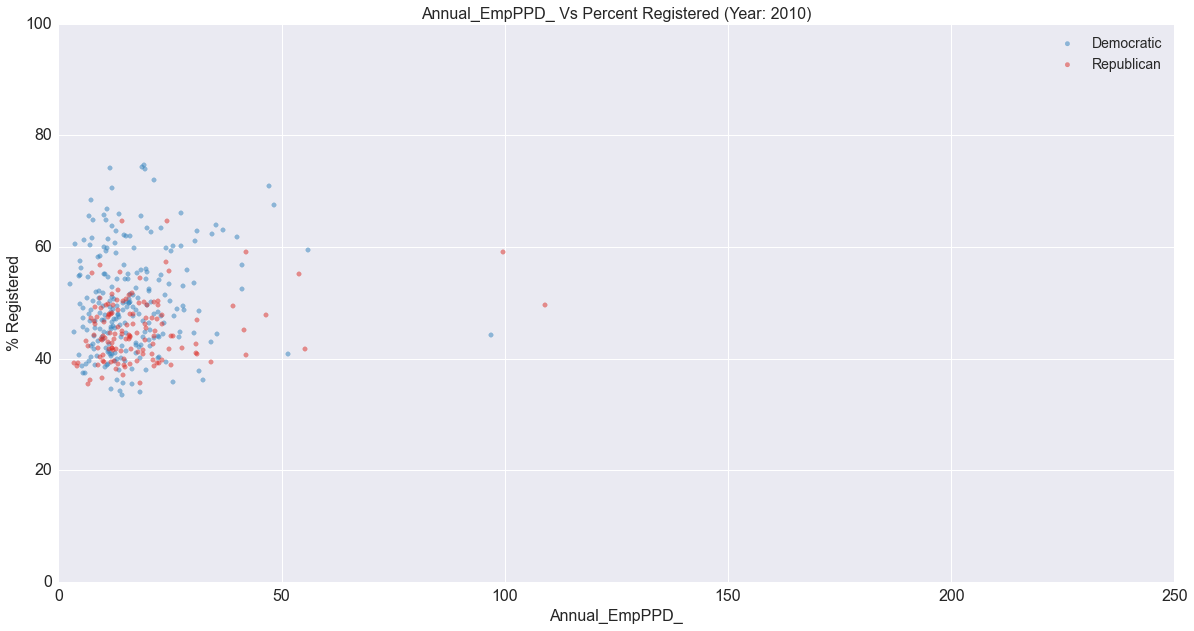

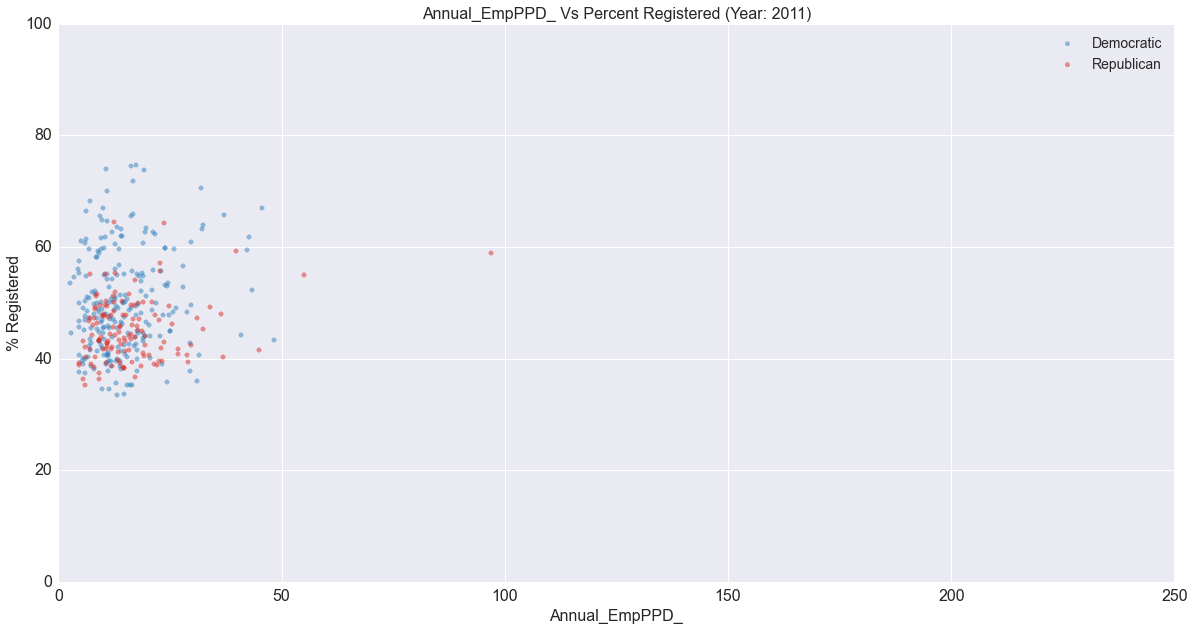

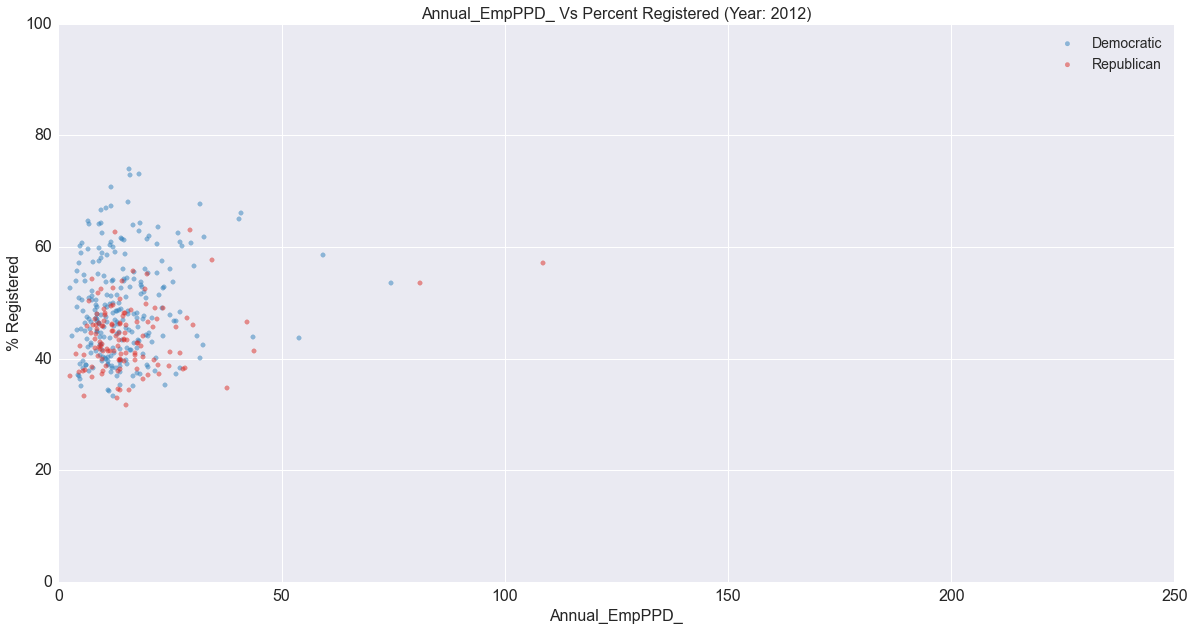

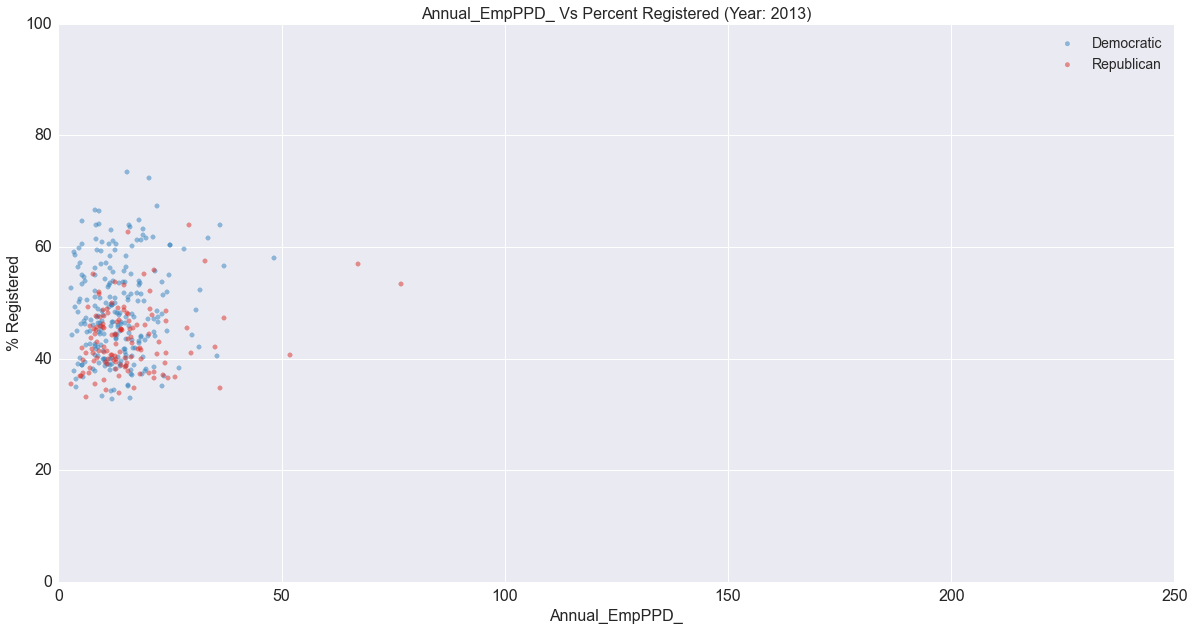

In [144]:
# Annual Employment PPD vs Dem/Rep Majority
dem_vs_rep(data, aEmp)

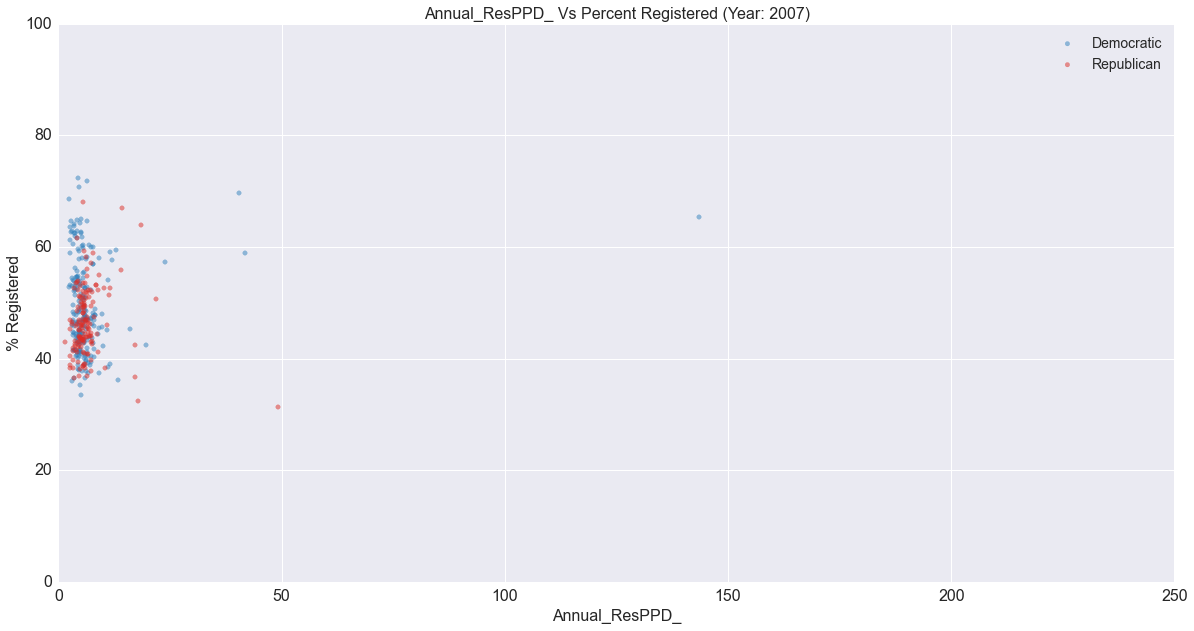

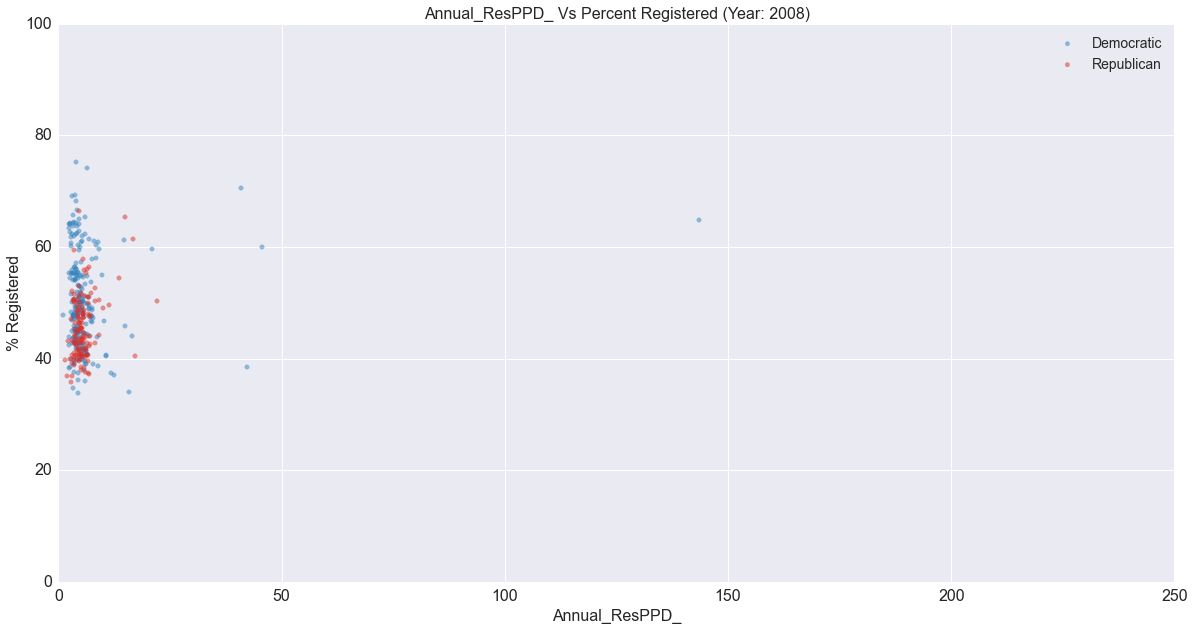

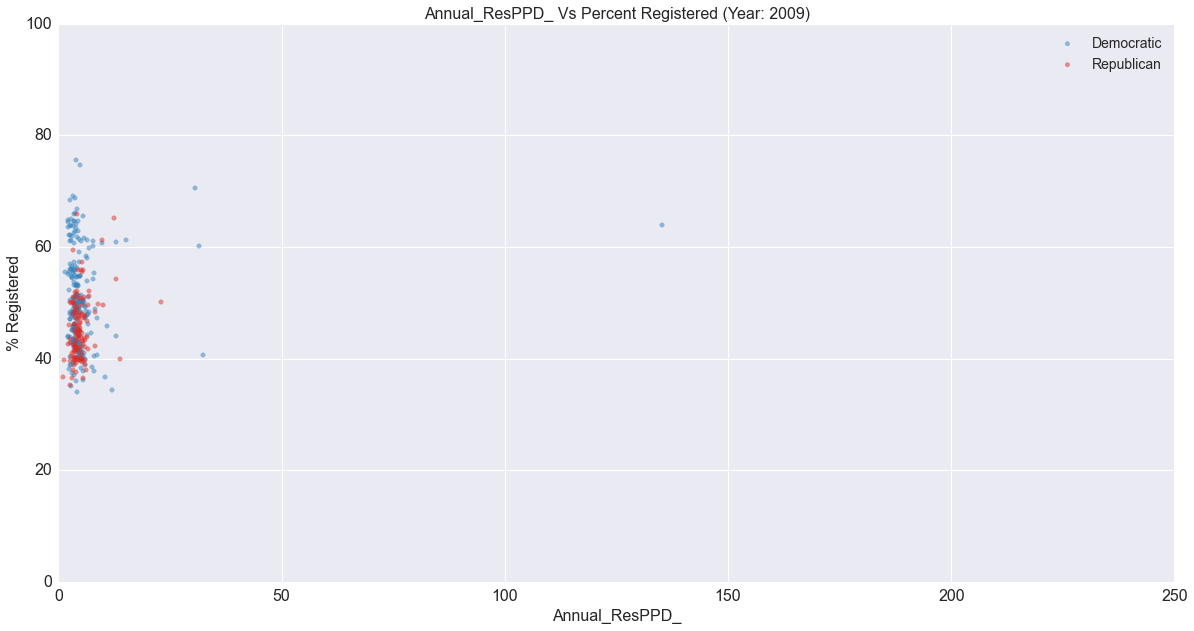

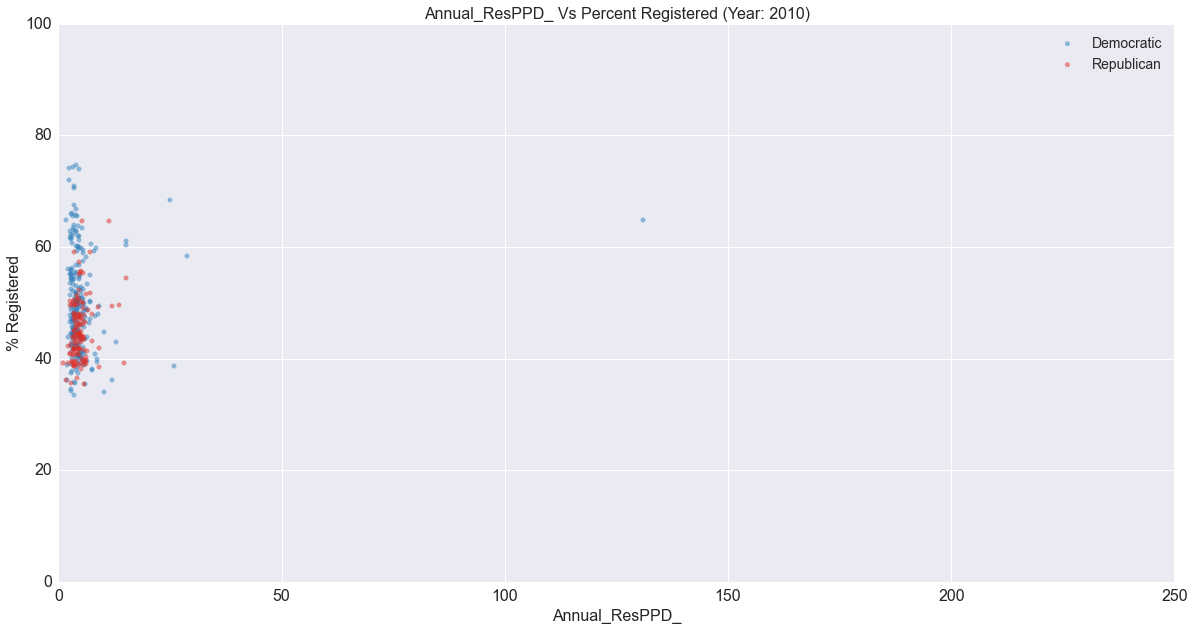

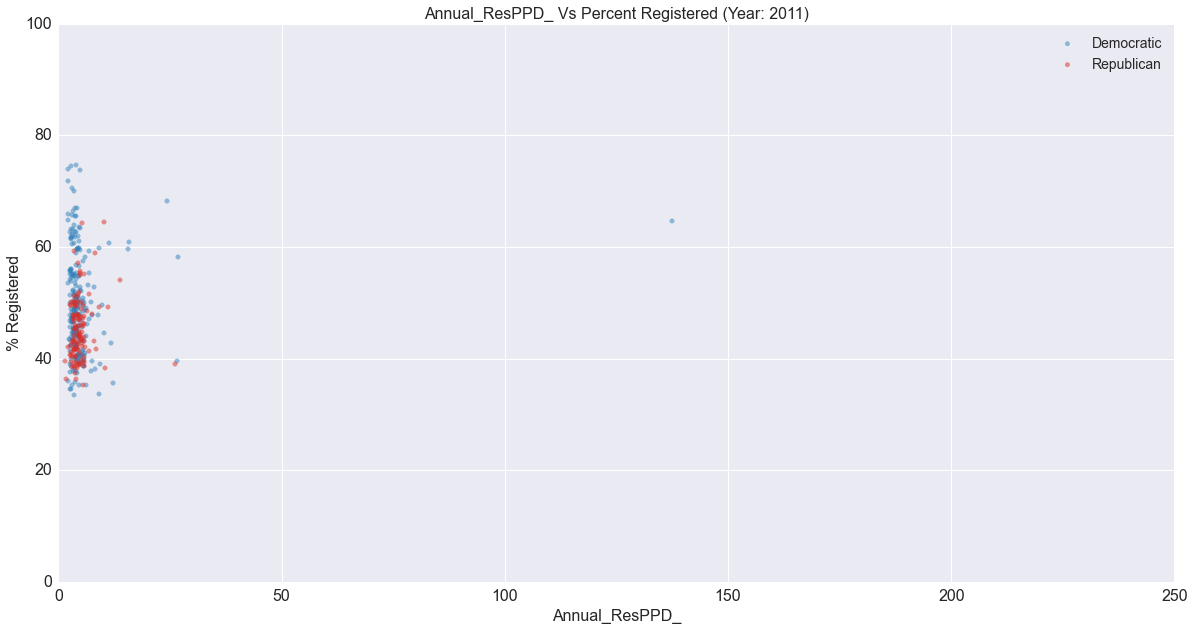

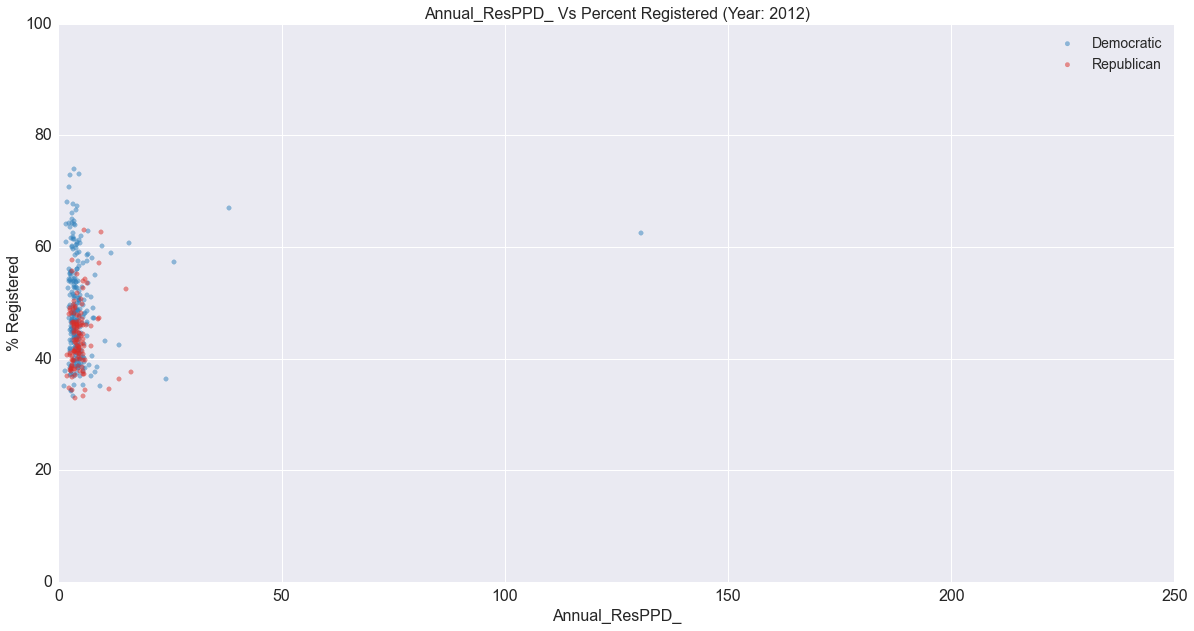

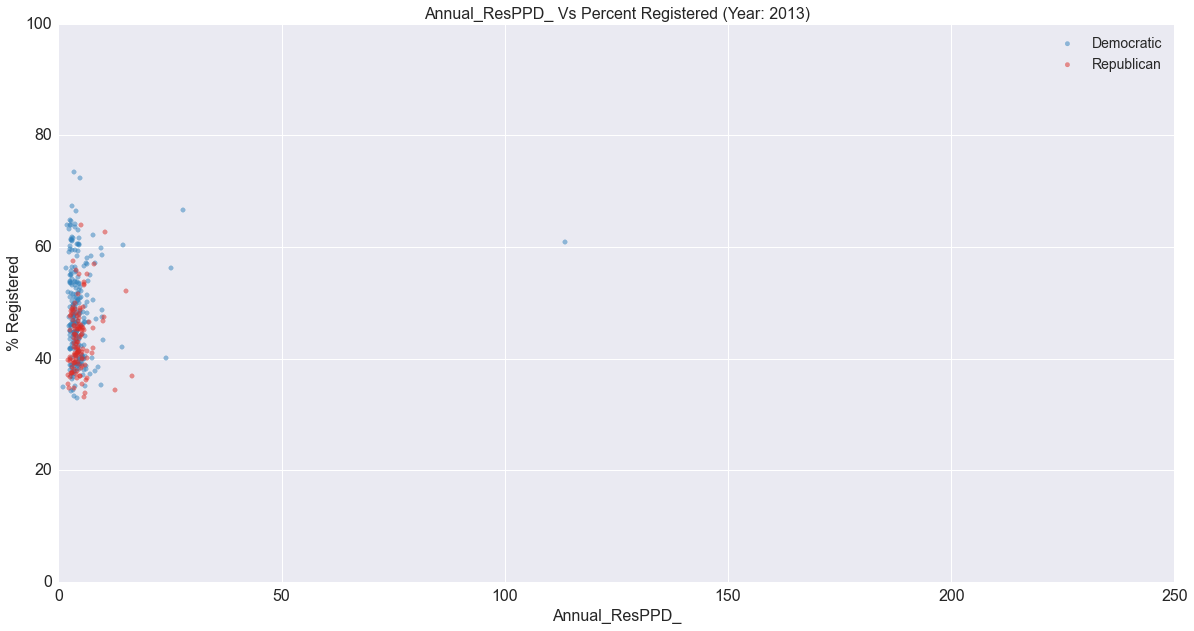

In [145]:
# Annual Residential PPD vs Dem/Rep Majority
dem_vs_rep(data, aRes) # Ignored outliers by setting plt.xlim(0, 250) in function

In [127]:
def dem_vs_rep_new(df, target, annual):
    '''
    Function to plot PPD vs democratic/republican
    ppd: Target_EmpPPD_ and Annual_EmpPPD_ or Target_ResPPD_ and Annual_ResPPD_ 
    '''
    years = list(np.arange(2007, 2014, 1))
    for year in years:
        i = str(year)
        # Create a temporary dataframe calculating percent Dem/Rep
        temp = df[[target + i, annual + i, 'Democratic_' + i, 'Republican_' + i, 'Tot_Registered_' + i]]
        temp['Democratic'] = temp['Democratic_' + i] * 100.0/temp['Tot_Registered_' + i]
        temp['Republican'] = temp['Republican_' + i] * 100.0/temp['Tot_Registered_' + i]
        plt.figure(figsize=(20,10))
        # If Dem > Rep - Blue, else - Red
        cond = (temp[annual + i] > temp[target + i]) & (temp['Democratic'] > temp['Republican'])
        plt.scatter(temp[annual + i][cond], temp['Democratic'][cond], color = '#3182bd', alpha = 0.5, label = 'Democratic')
        plt.scatter(temp[annual + i][~cond], temp['Republican'][~cond], color = '#de2d26', alpha = 0.5, label = 'Republican')
        # Set axis labels
        plt.xlabel(annual, fontsize = 16)
        plt.ylabel('% Registered', fontsize = 16)
        # Set axis limits
        plt.xlim(0, max(df[annual + i]))
        #plt.xlim(0, 150)
        plt.ylim(0, 100)
        # Set tick label size
        plt.tick_params(axis = 'both', which = 'major', labelsize = 16)
        # Set figure title
        plt.title(annual + ' Vs Percent Registered (Year: ' + i + ')' , fontsize = 16)
        # Set legend and legends fontsize
        plt.legend(prop={'size': 14})
        plt.show()

# help(plot_voter)

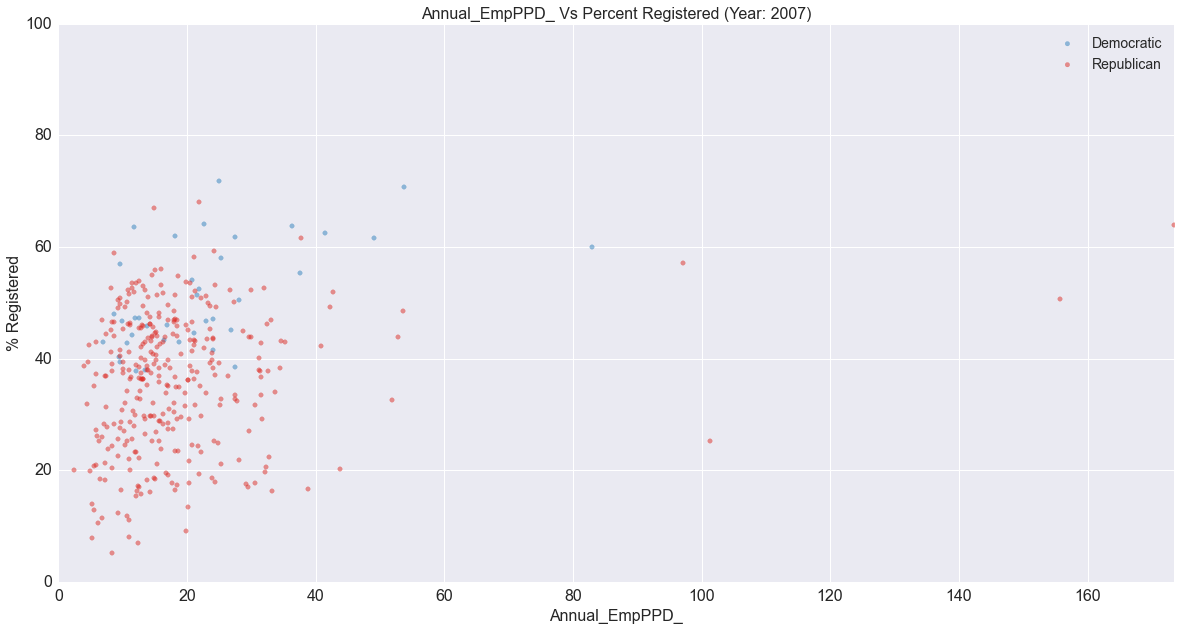

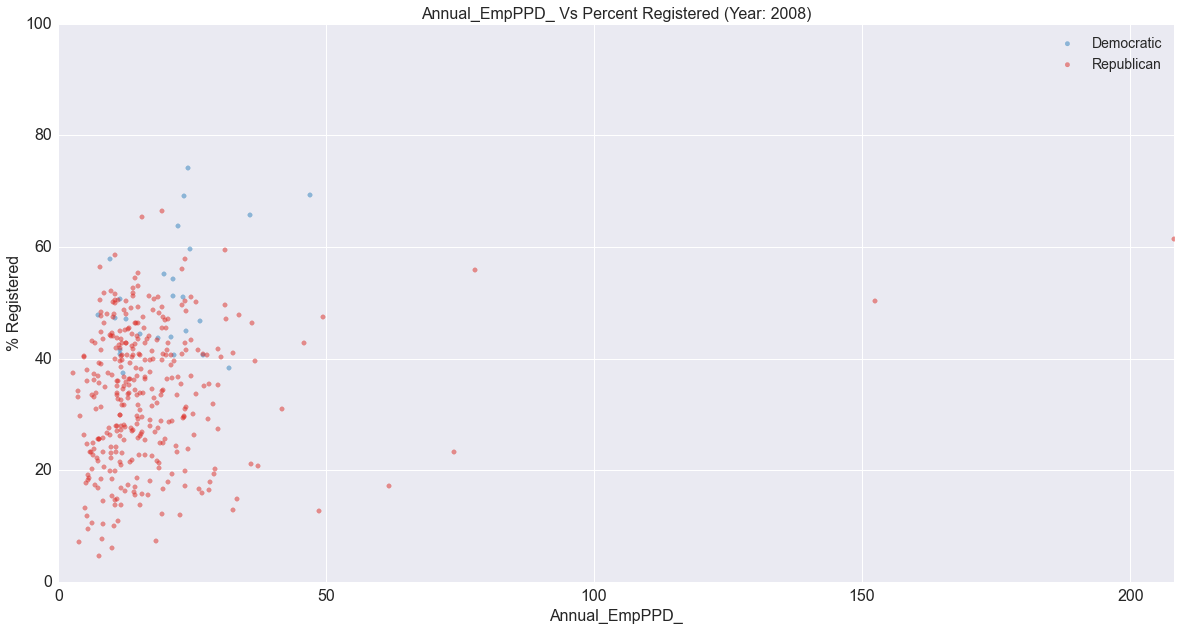

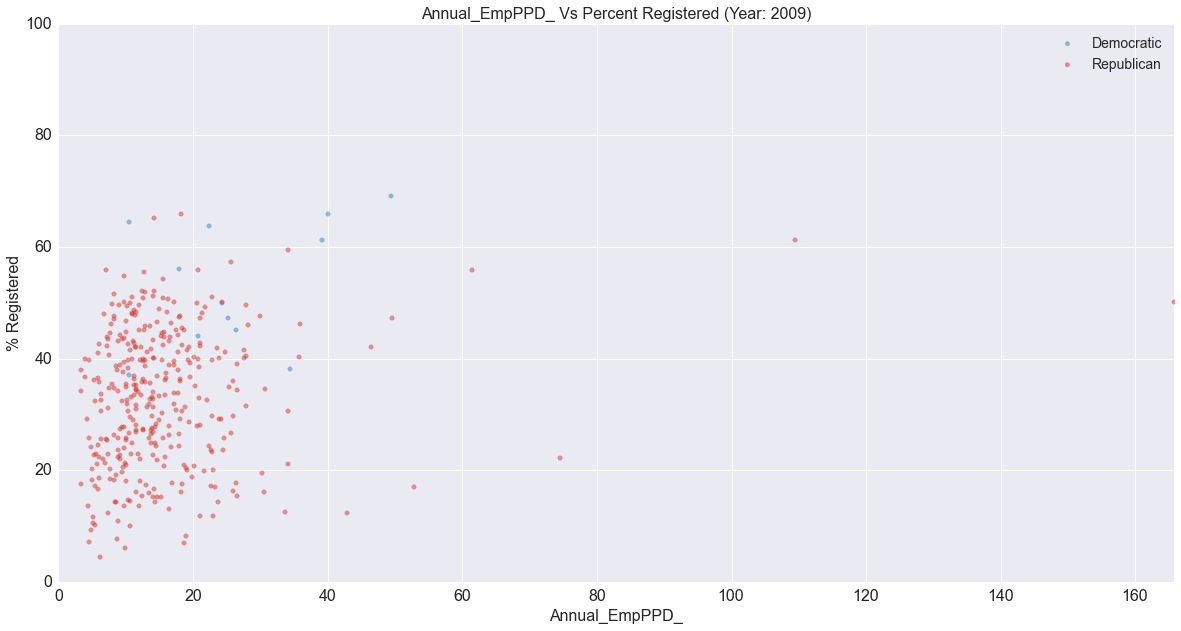

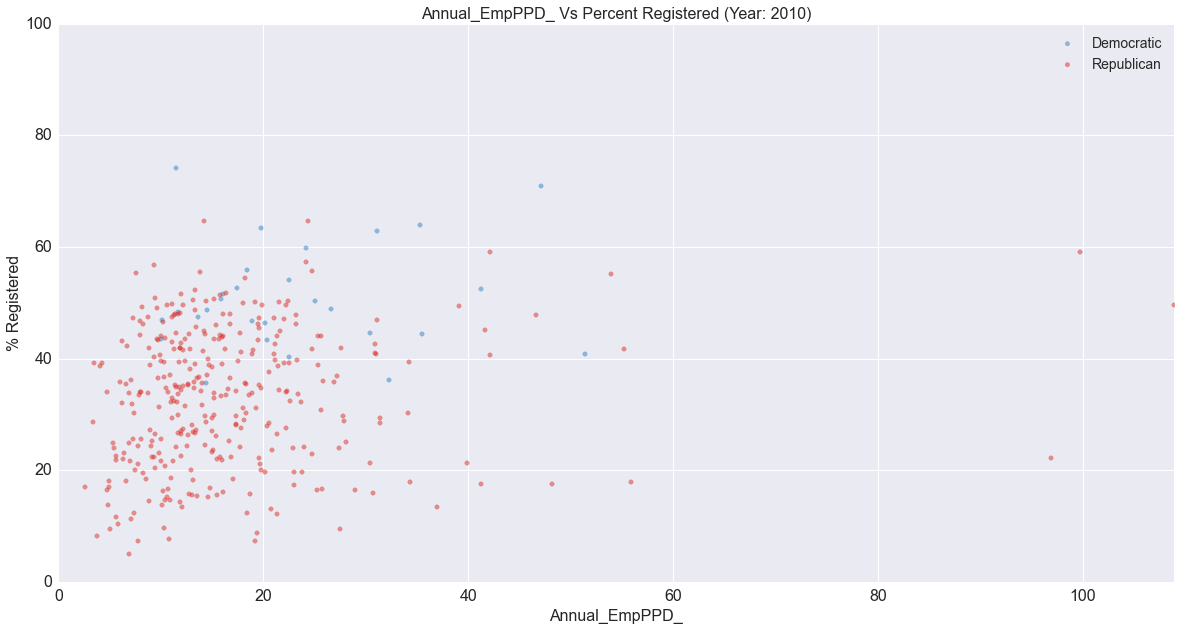

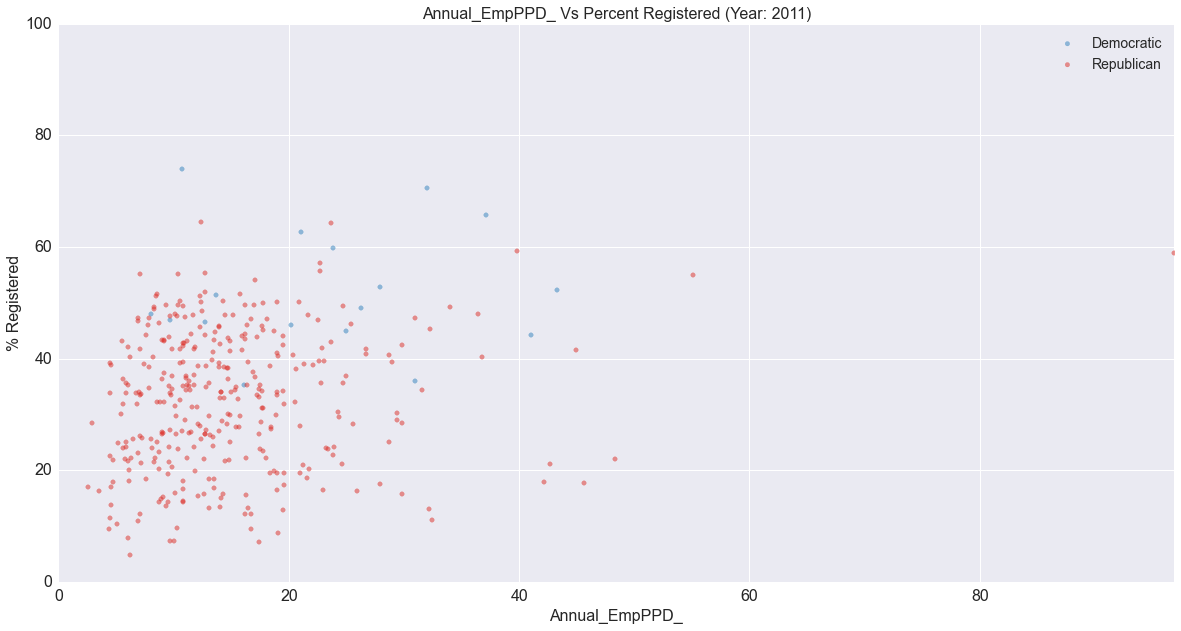

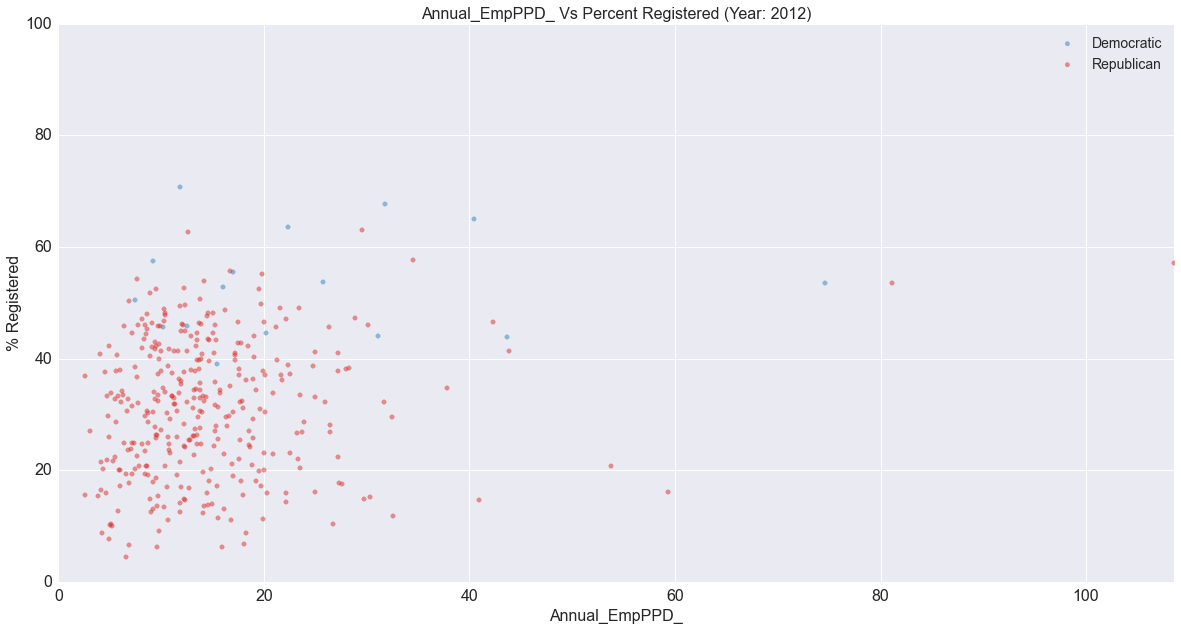

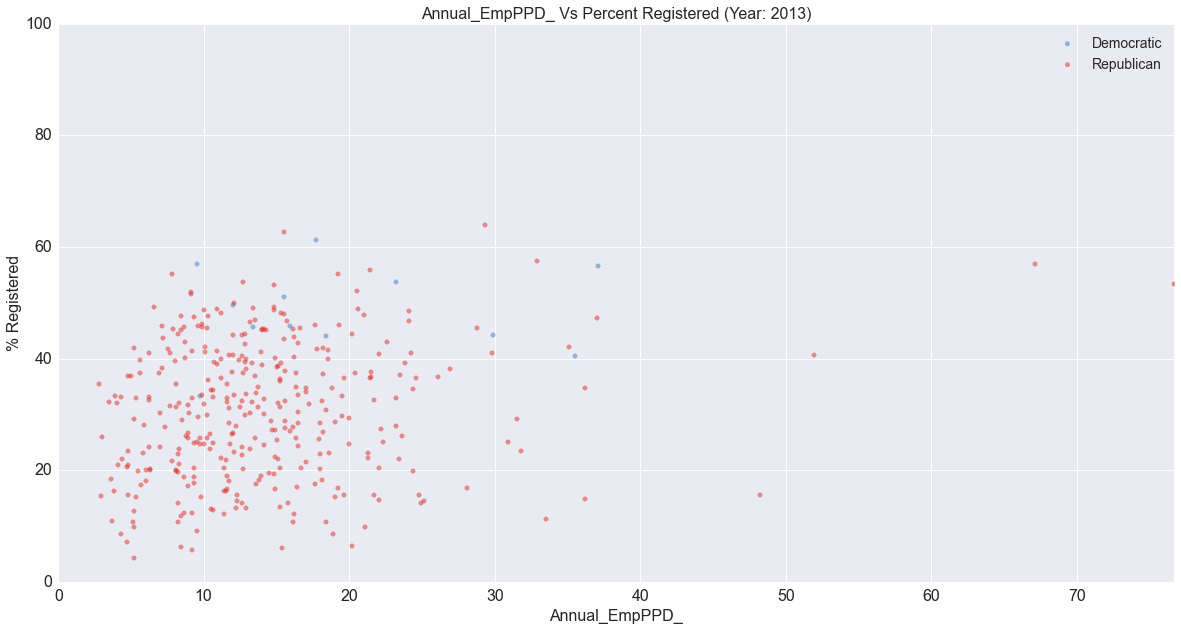

In [128]:
dem_vs_rep_new(data, tEmp, aEmp)

In [152]:
def dem_ppd(df, target, annual):
    '''
    Function to plot PPD vs democratic/republican
    ppd: Target_EmpPPD_ and Annual_EmpPPD_ or Target_ResPPD_ and Annual_ResPPD_ 
    '''
    years = list(np.arange(2007, 2014, 1))
    for year in years:
        i = str(year)
        # Create a temporary dataframe calculating percent Dem/Rep
        temp = df[[target + i, annual + i, 'Democratic_' + i, 'Republican_' + i, 'Tot_Registered_' + i, 'Green_' + i]]
        temp['Democratic'] = temp['Democratic_' + i] * 100.0/temp['Tot_Registered_' + i]
        temp['Republican'] = temp['Republican_' + i] * 100.0/temp['Tot_Registered_' + i]
        temp['Green'] = temp['Green_' + i] * 100.0/temp['Tot_Registered_' + i]
        plt.figure(figsize=(20,10))
        cond = temp[annual + i] > temp[target + i]
        # Dem points
        plt.scatter(temp[annual + i][cond], temp['Democratic'][cond], color = '#33a02c', alpha = 0.75, label = 'Annual > Target')
        plt.scatter(temp[annual + i][~cond], temp['Democratic'][~cond], color = '#e31a1c', alpha = 0.5, label = 'Annual < Target')
        # Set axis labels
        plt.xlabel(annual, fontsize = 16)
        plt.ylabel('% Registered', fontsize = 16)
        # Set axis limits
        #plt.xlim(0, max(df[annual + i]))
        plt.xlim(0, 250)
        plt.ylim(0, 100)
        # Set tick label size
        plt.tick_params(axis = 'both', which = 'major', labelsize = 16)
        # Set figure title
        plt.title(annual + ' Vs Percent Registered (Year: ' + i + ')' , fontsize = 16)
        # Set legend and legends fontsize
        plt.legend(prop={'size': 14})
        plt.show()

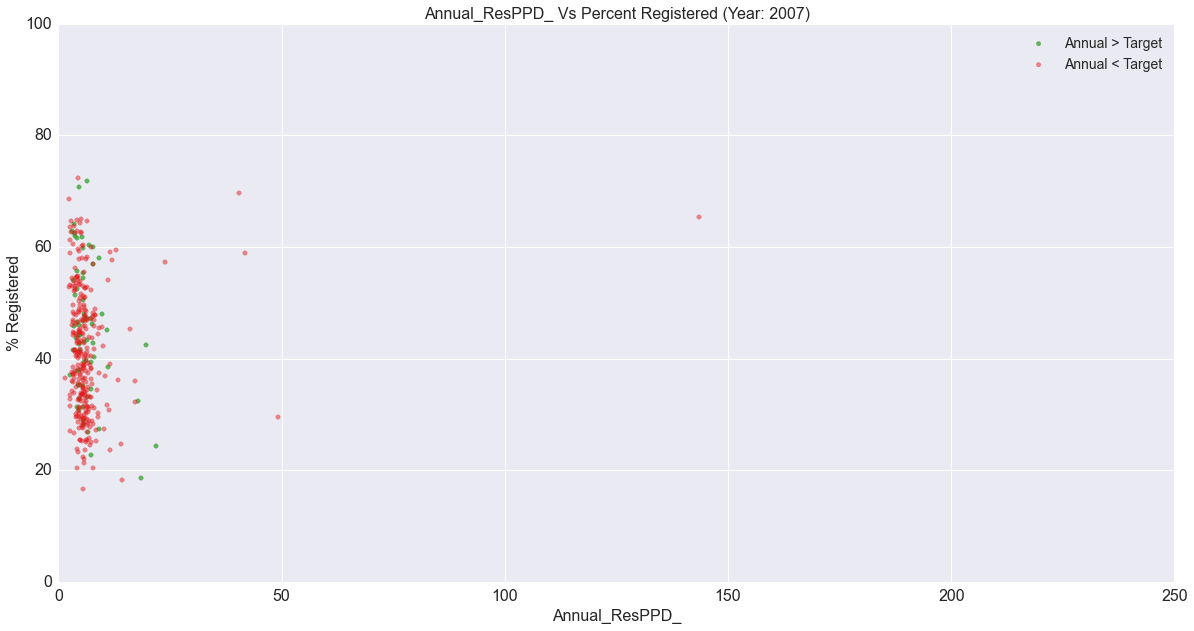

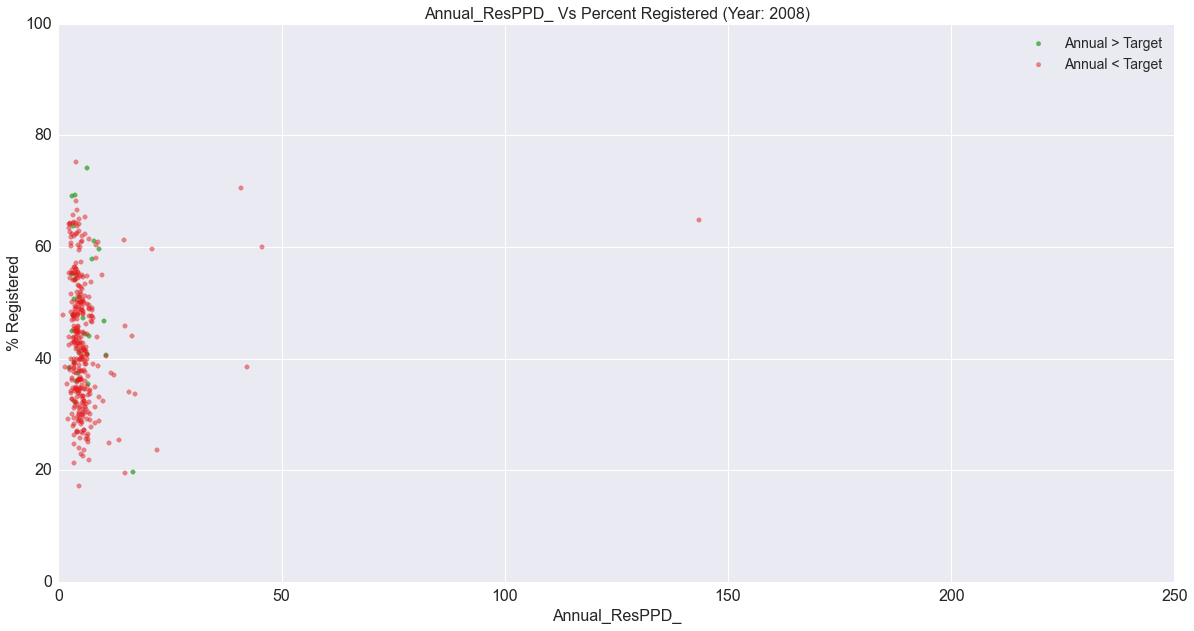

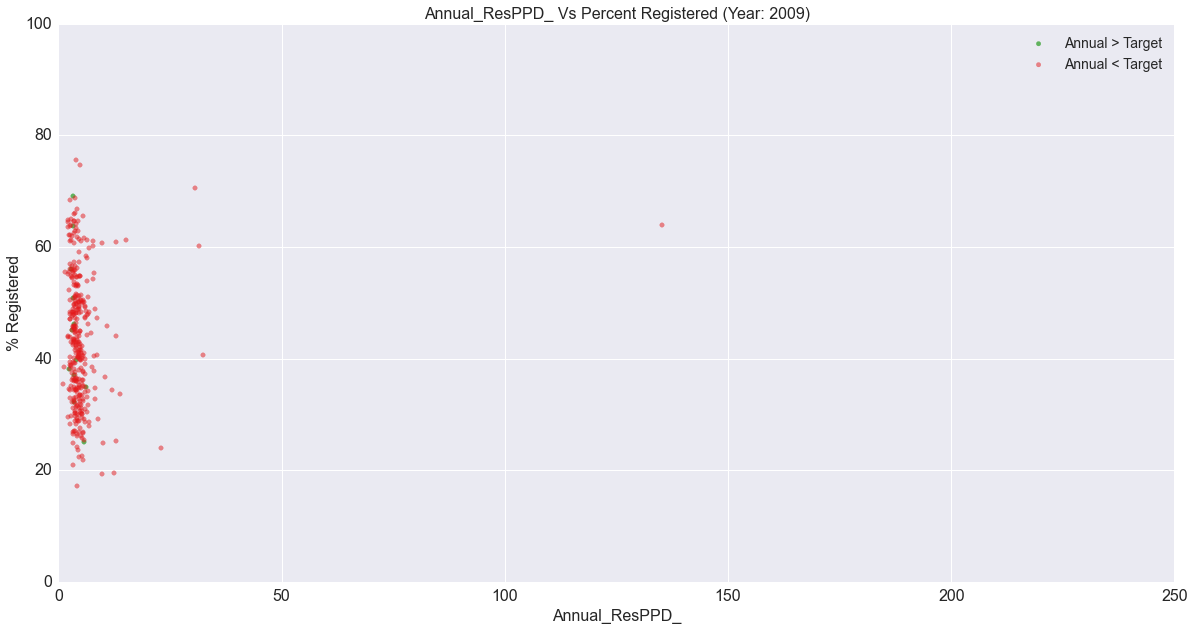

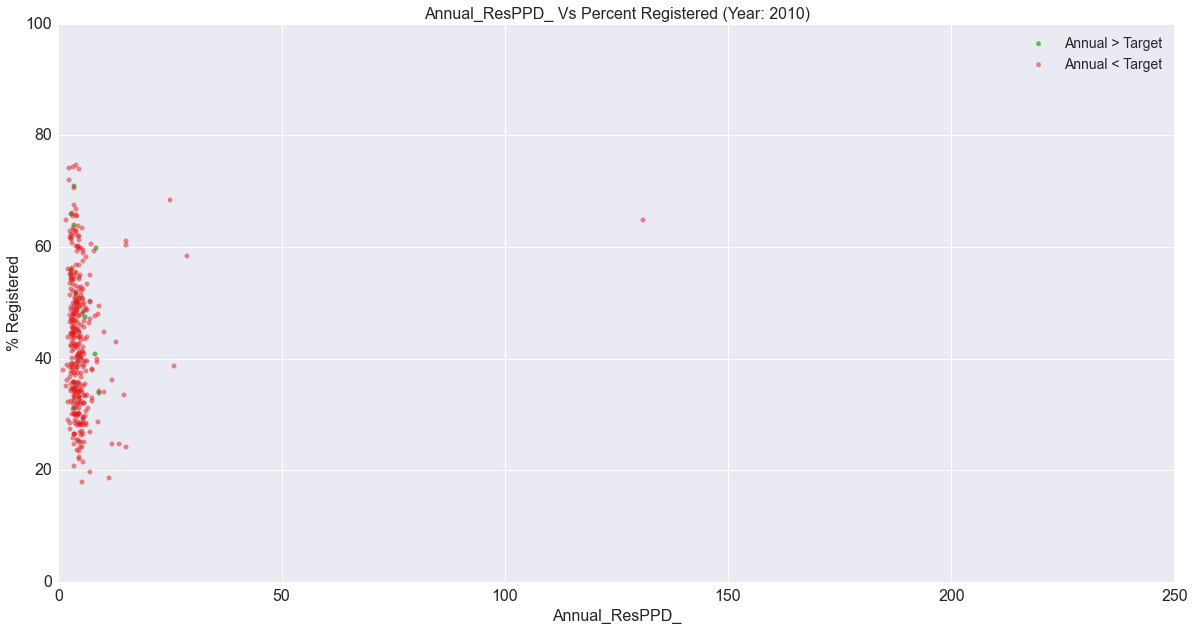

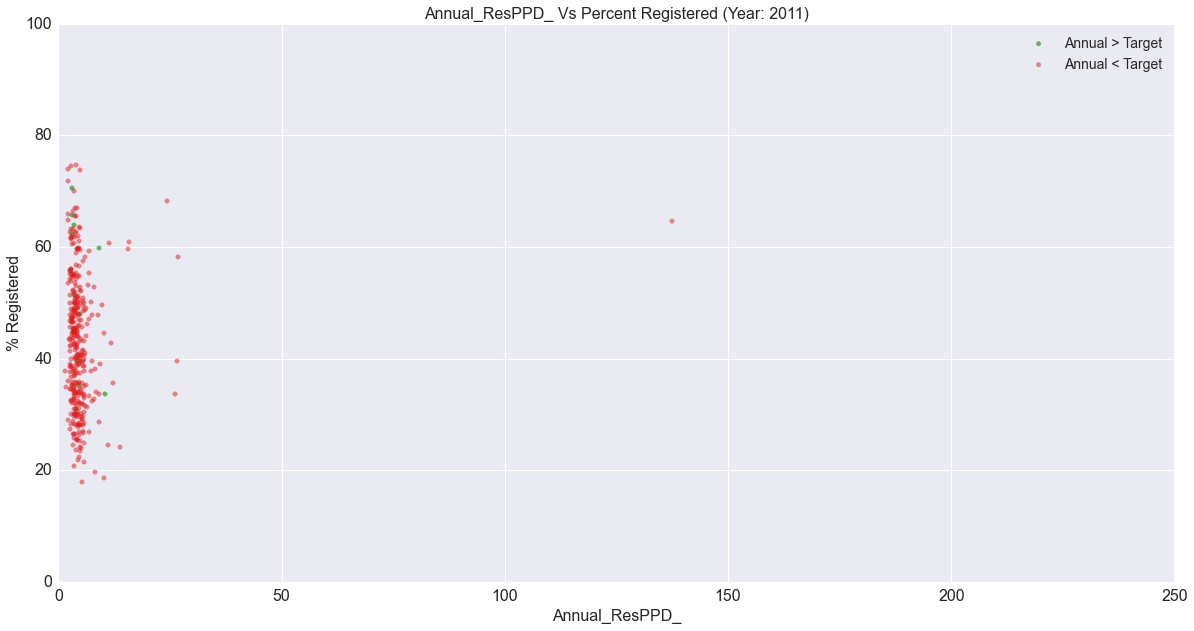

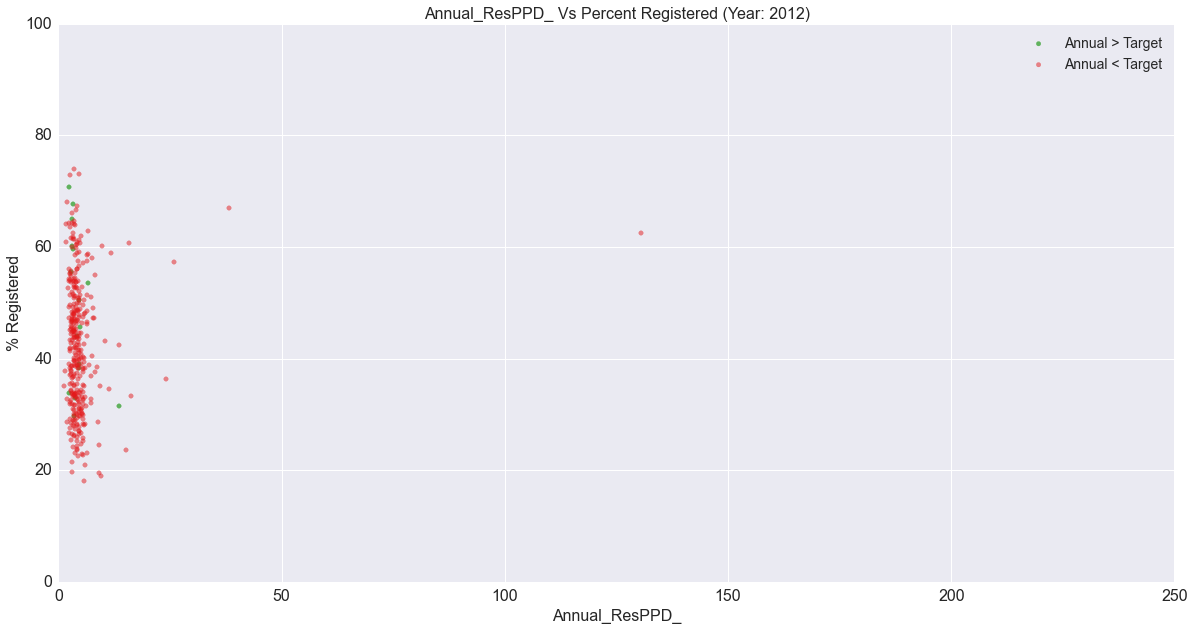

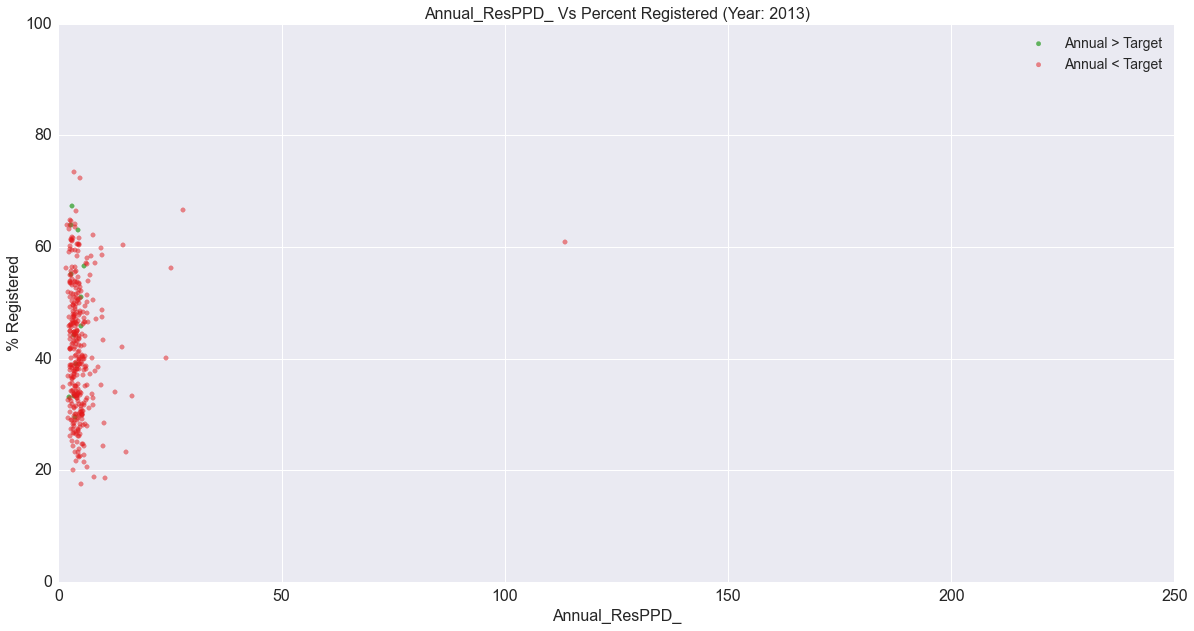

In [154]:
dem_ppd(data, tRes, aRes) # Ignored outliers by setting plt.xlim(0, 150) in function

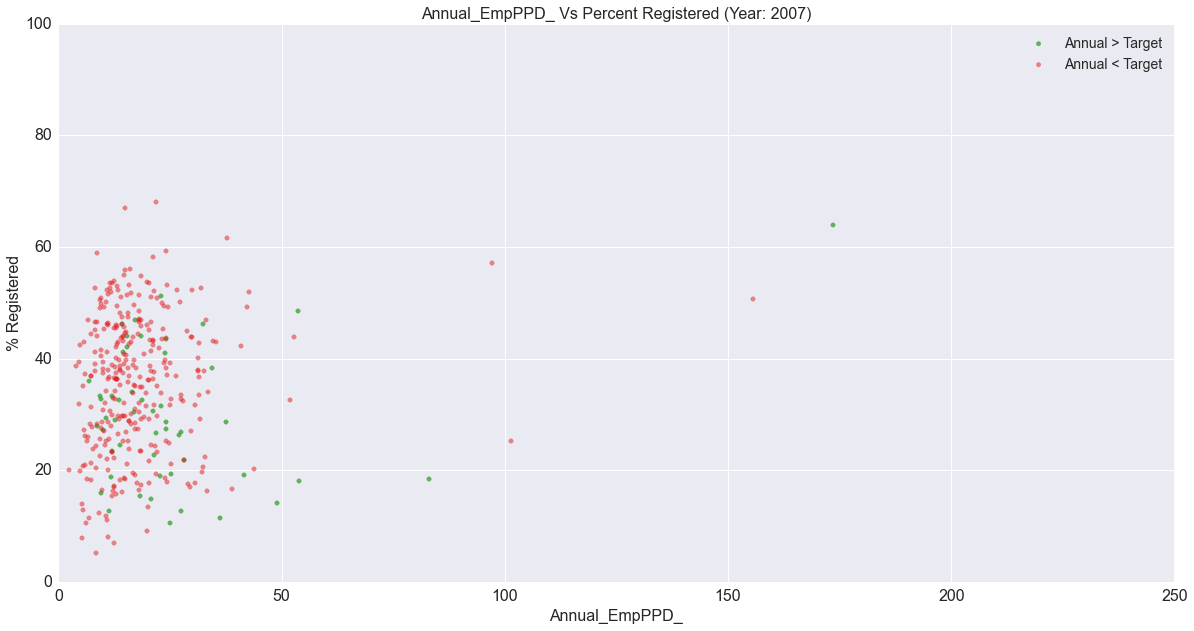

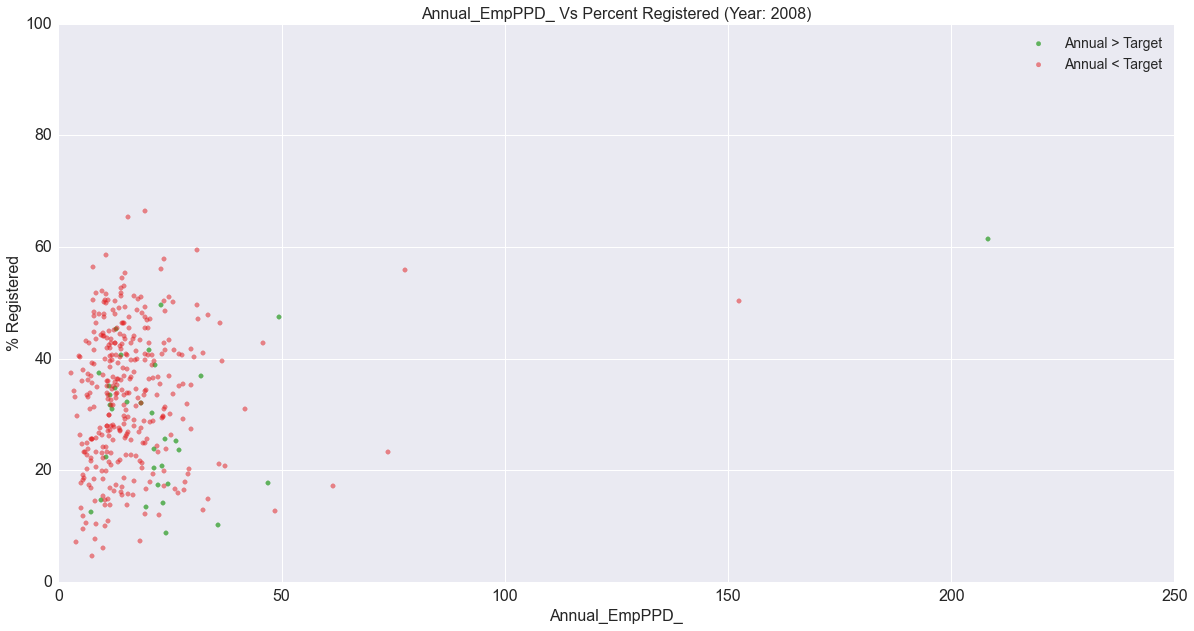

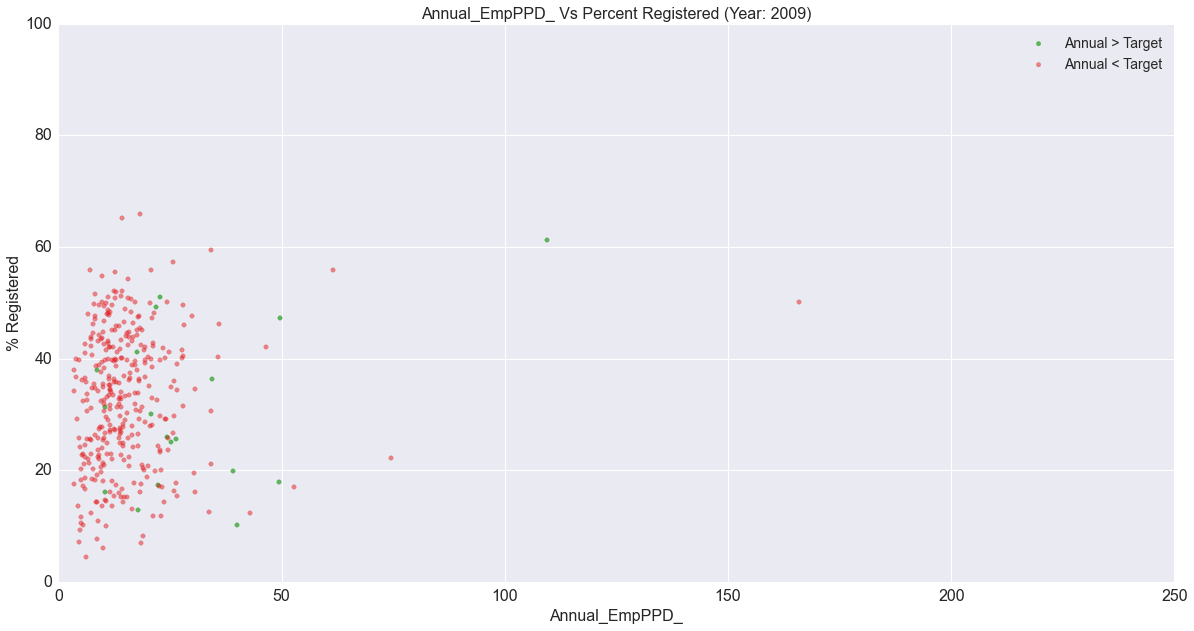

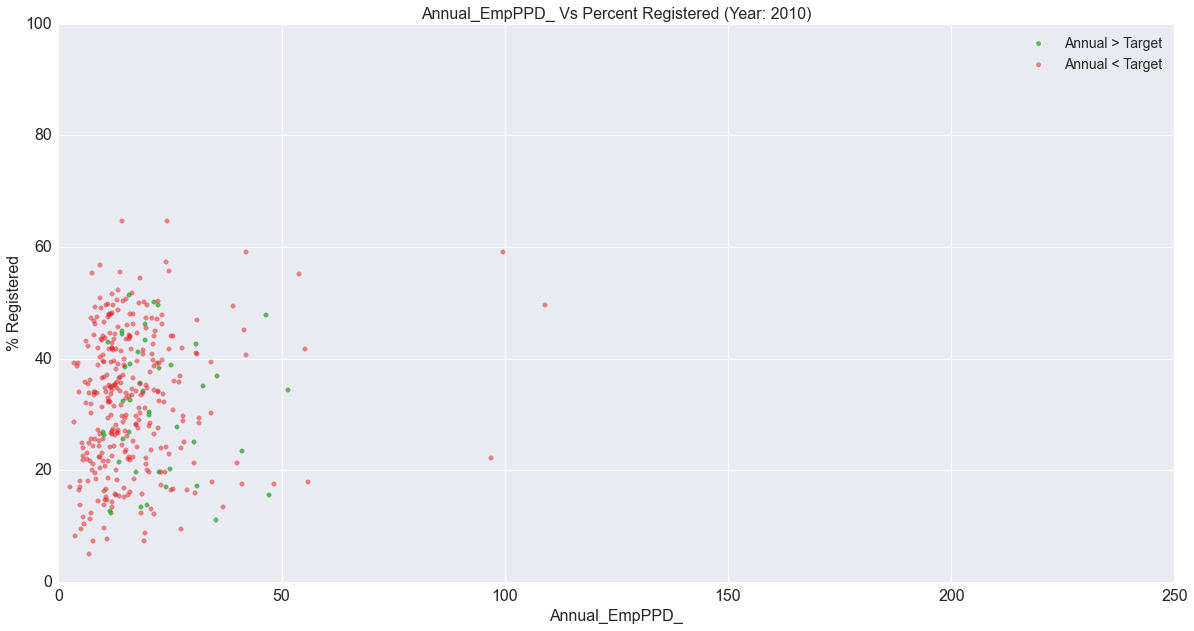

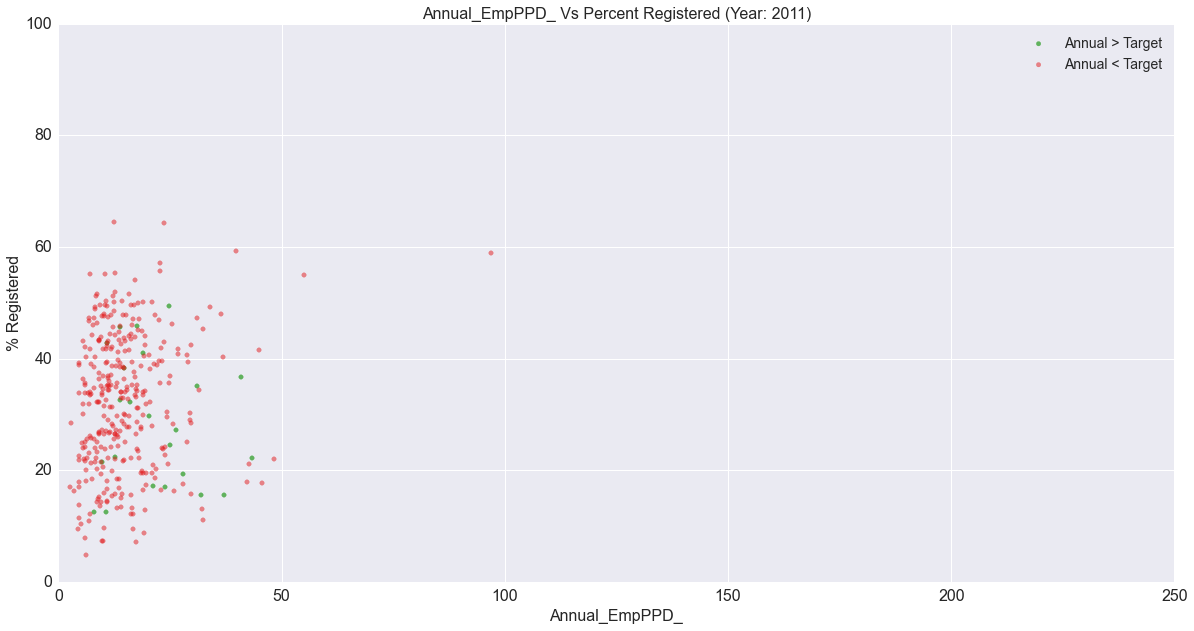

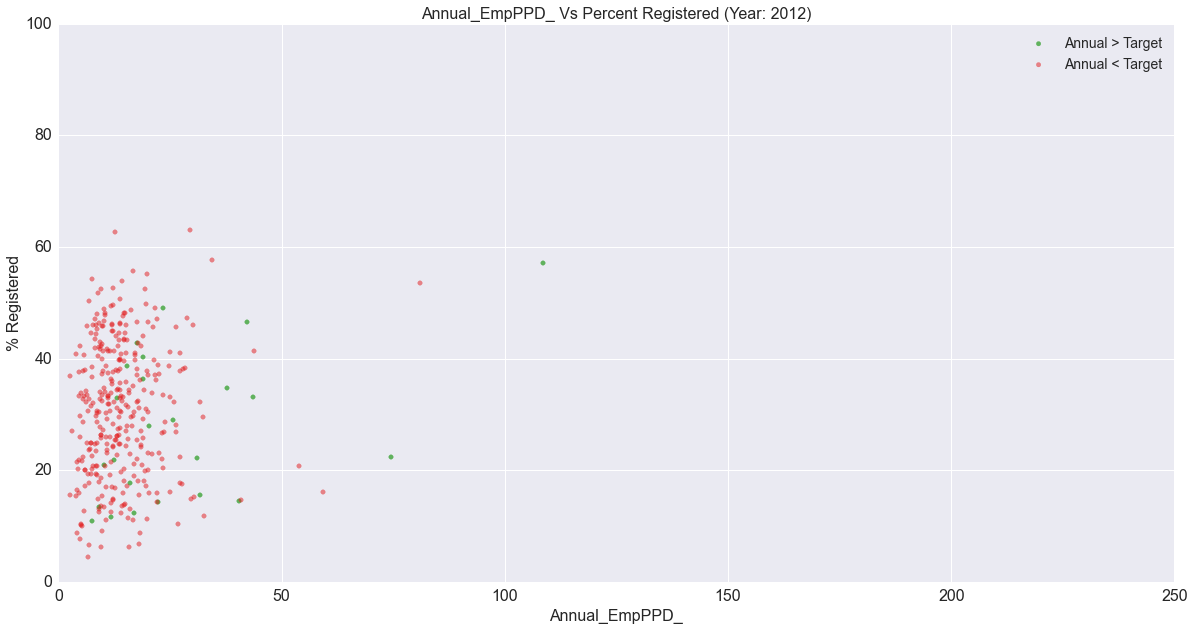

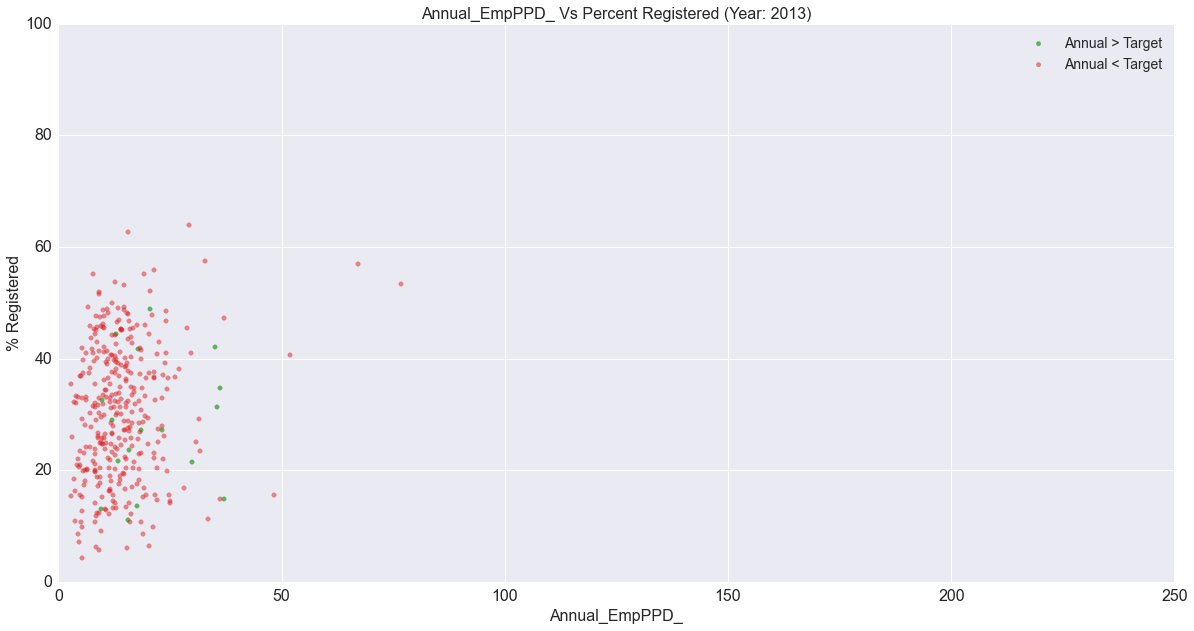

In [162]:
rep_ppd(data, tEmp, aEmp) # Ignored outliers by setting plt.xlim(0, 150) in function

In [163]:
def rep_ppd(df, target, annual):
    '''
    Function to plot PPD vs democratic/republican
    ppd: Target_EmpPPD_ and Annual_EmpPPD_ or Target_ResPPD_ and Annual_ResPPD_ 
    '''
    years = list(np.arange(2007, 2014, 1))
    for year in years:
        i = str(year)
        # Create a temporary dataframe calculating percent Dem/Rep
        temp = df[[target + i, annual + i, 'Democratic_' + i, 'Republican_' + i, 'Tot_Registered_' + i, 'Green_' + i]]
        temp['Democratic'] = temp['Democratic_' + i] * 100.0/temp['Tot_Registered_' + i]
        temp['Republican'] = temp['Republican_' + i] * 100.0/temp['Tot_Registered_' + i]
        temp['Green'] = temp['Green_' + i] * 100.0/temp['Tot_Registered_' + i]
        plt.figure(figsize=(20,10))
        cond = temp[annual + i] > temp[target + i]
        # Dem points
        plt.scatter(temp[annual + i][cond], temp['Republican'][cond], color = '#33a02c', alpha = 0.75, label = 'Annual > Target')
        plt.scatter(temp[annual + i][~cond], temp['Republican'][~cond], color = '#e31a1c', alpha = 0.5, label = 'Annual < Target')
        # Set axis labels
        plt.xlabel(annual, fontsize = 16)
        plt.ylabel('% Registered', fontsize = 16)
        # Set axis limits
        #plt.xlim(0, max(df[annual + i]))
        plt.xlim(0, 150)
        plt.ylim(0, 100)
        # Set tick label size
        plt.tick_params(axis = 'both', which = 'major', labelsize = 16)
        # Set figure title
        plt.title(annual + ' Vs Percent Registered (Year: ' + i + ')' , fontsize = 16)
        # Set legend and legends fontsize
        plt.legend(prop={'size': 14})
        plt.show()

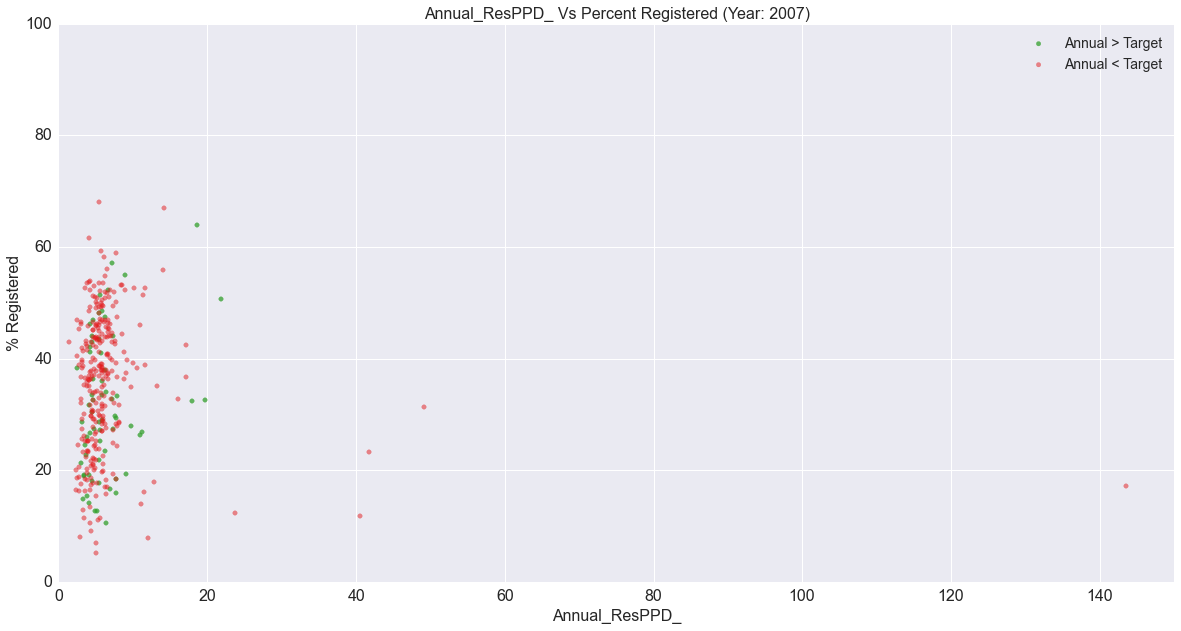

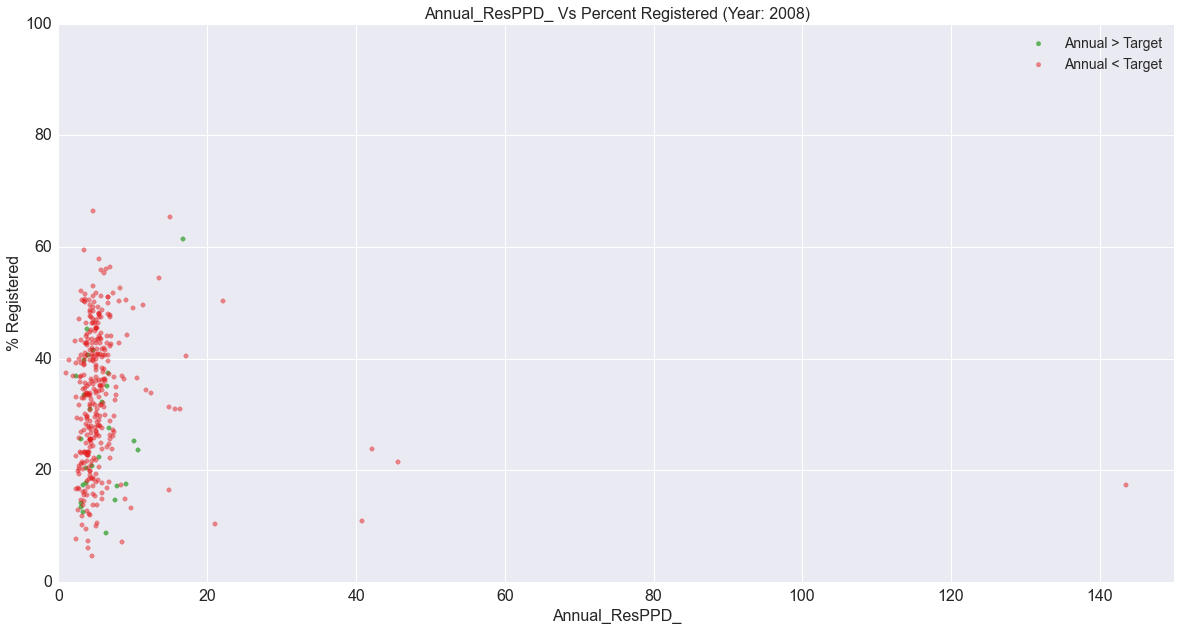

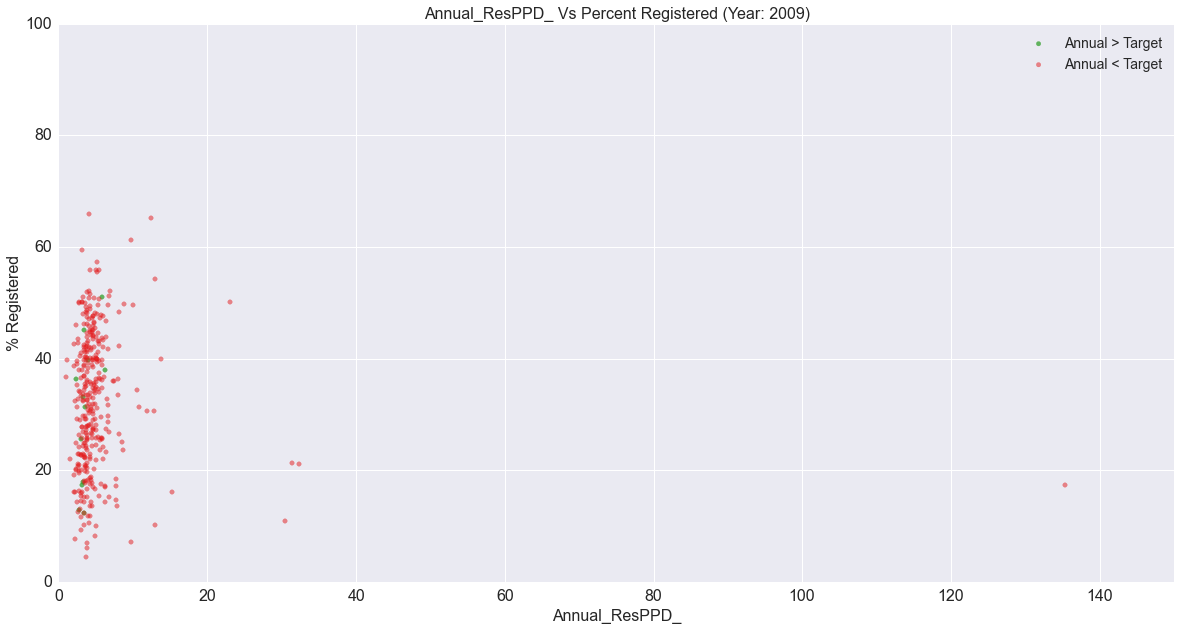

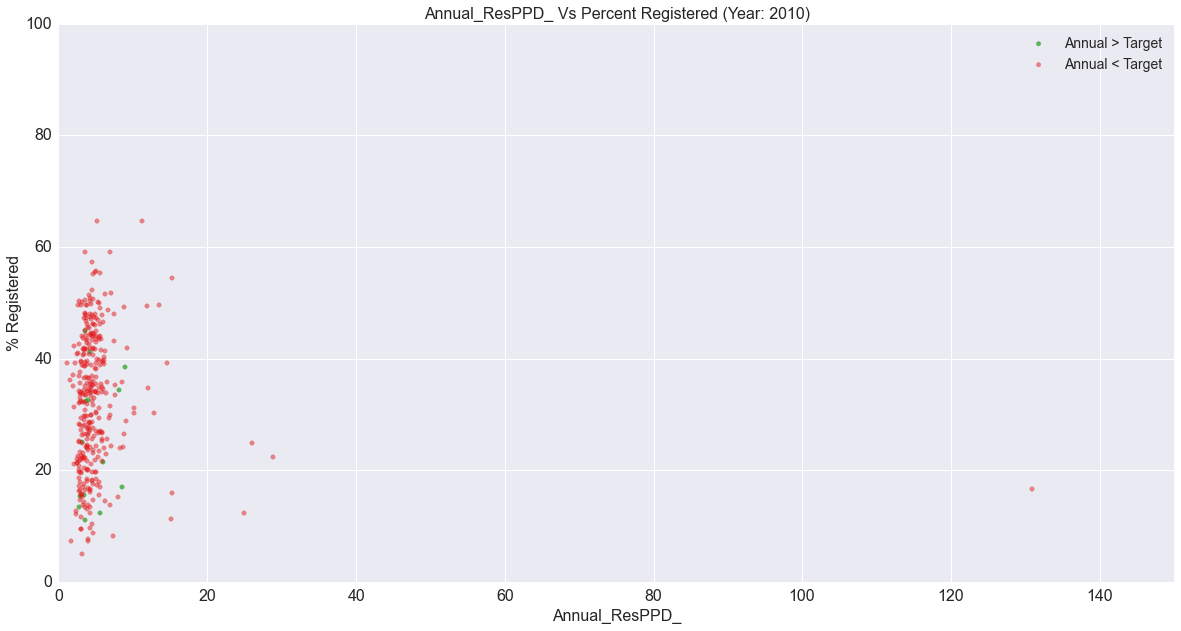

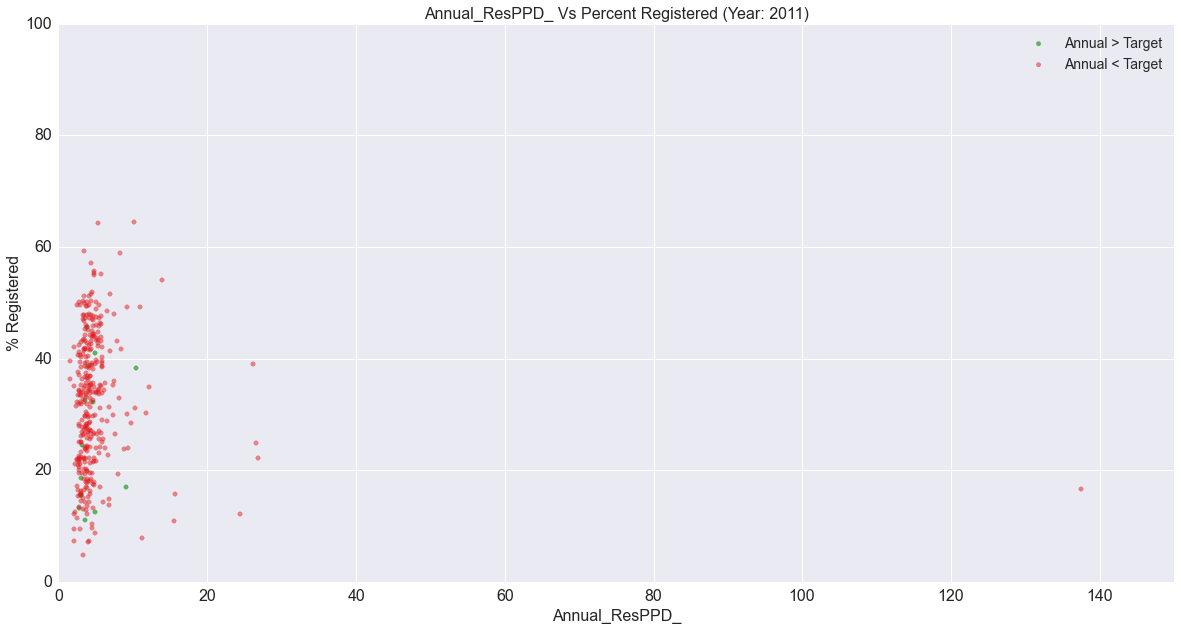

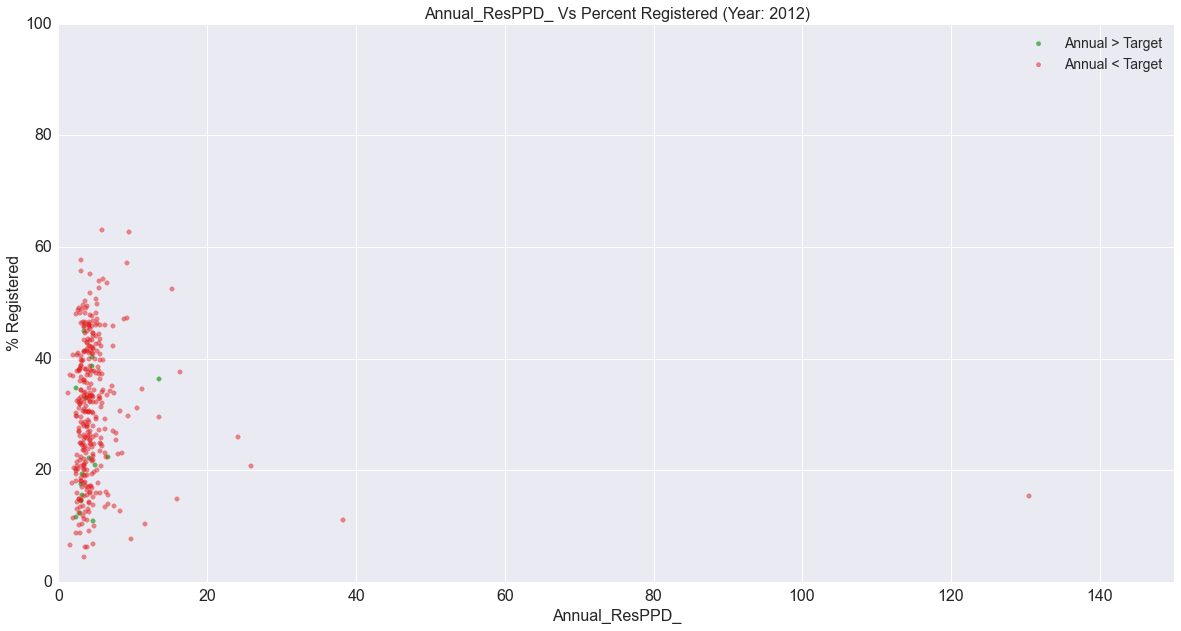

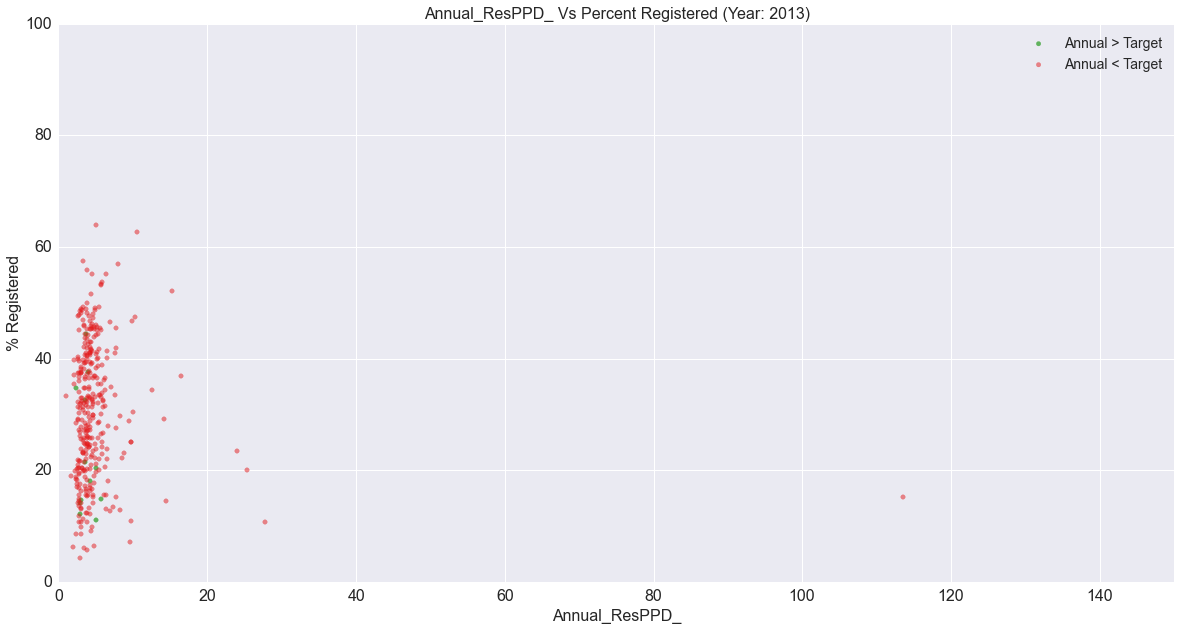

In [164]:
rep_ppd(data, tRes, aRes) # Ignored outliers by setting plt.xlim(0, 150) in function

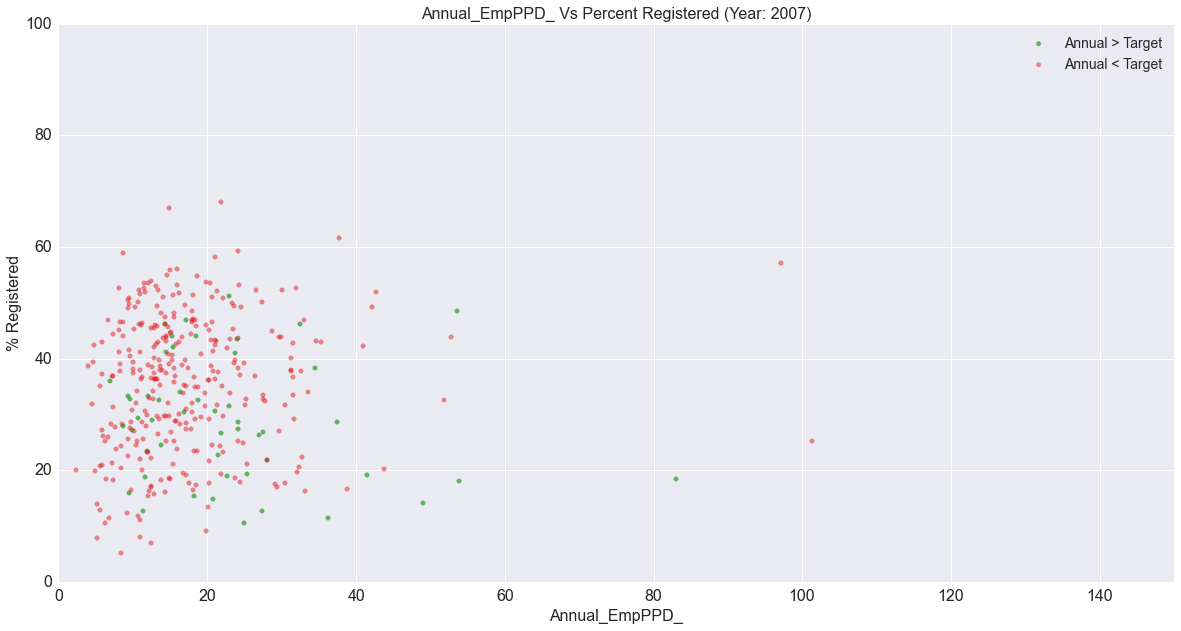

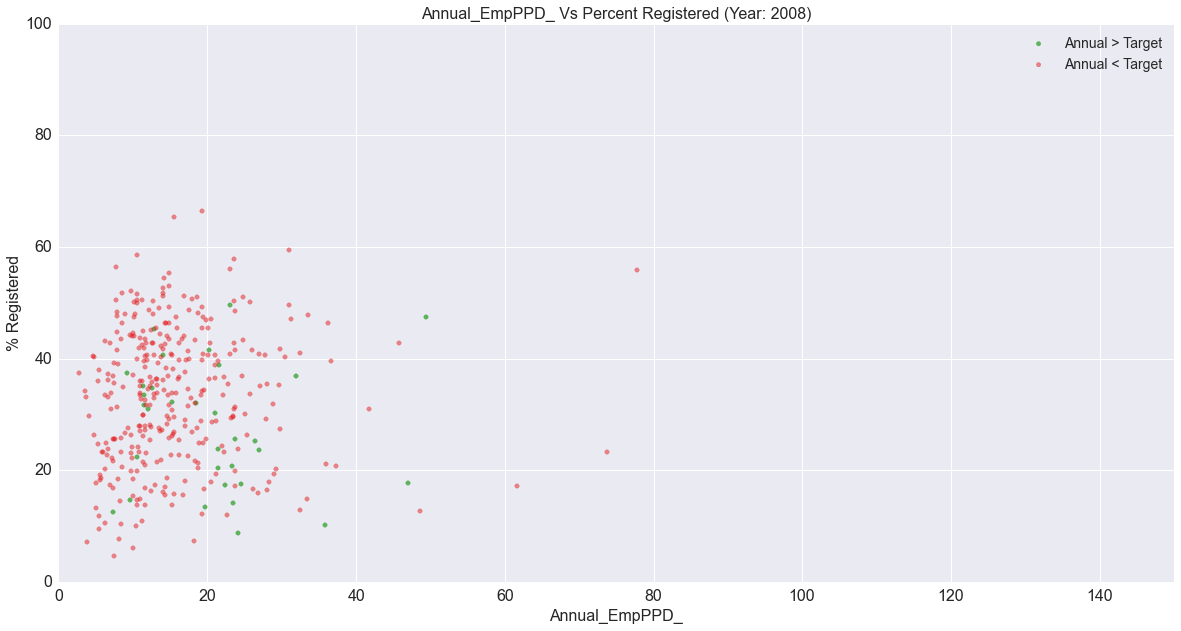

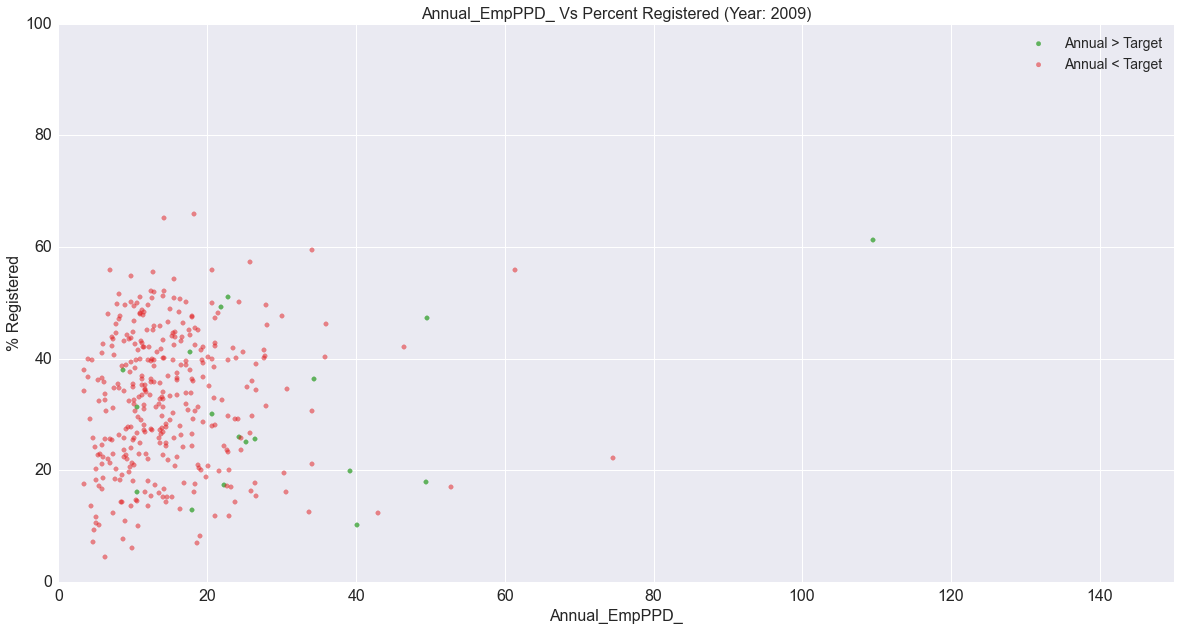

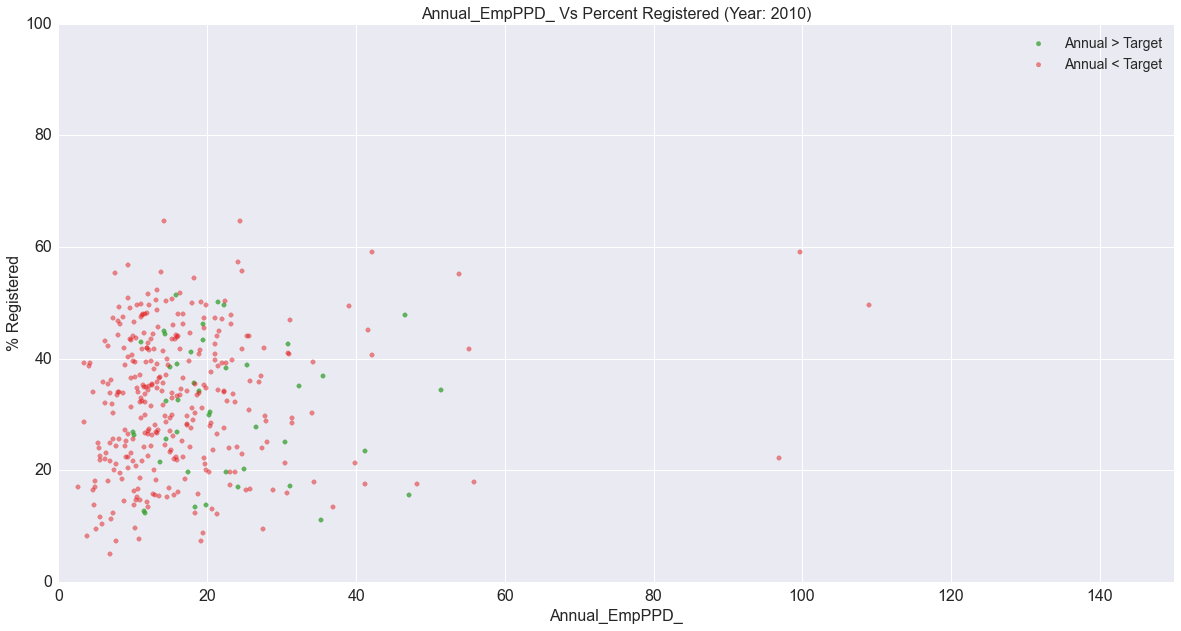

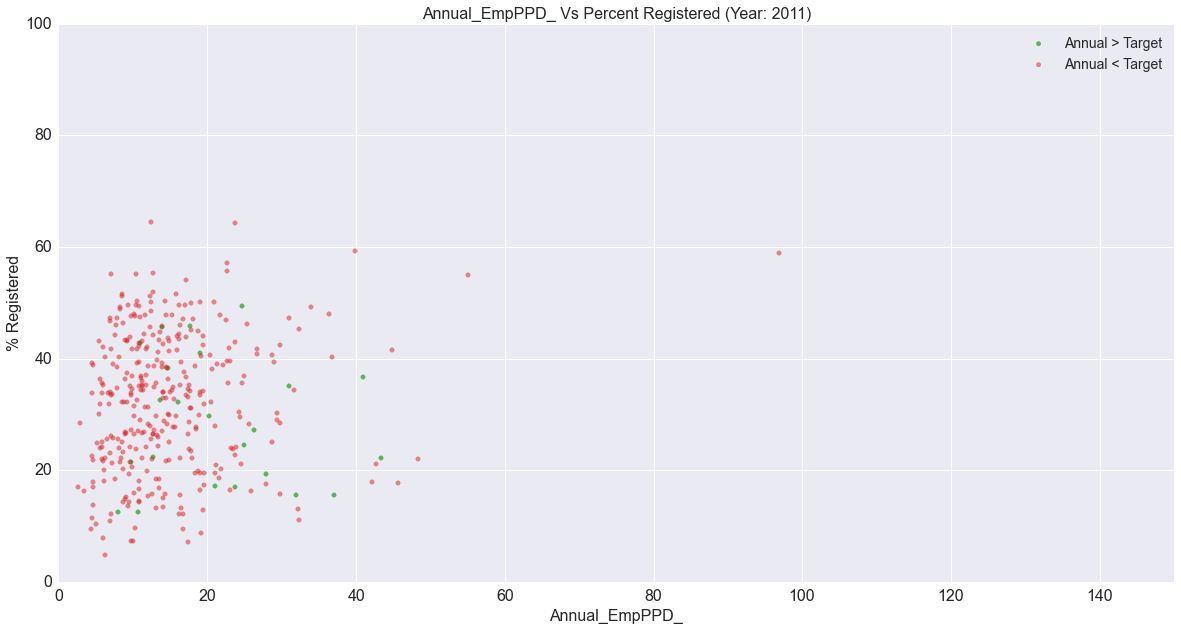

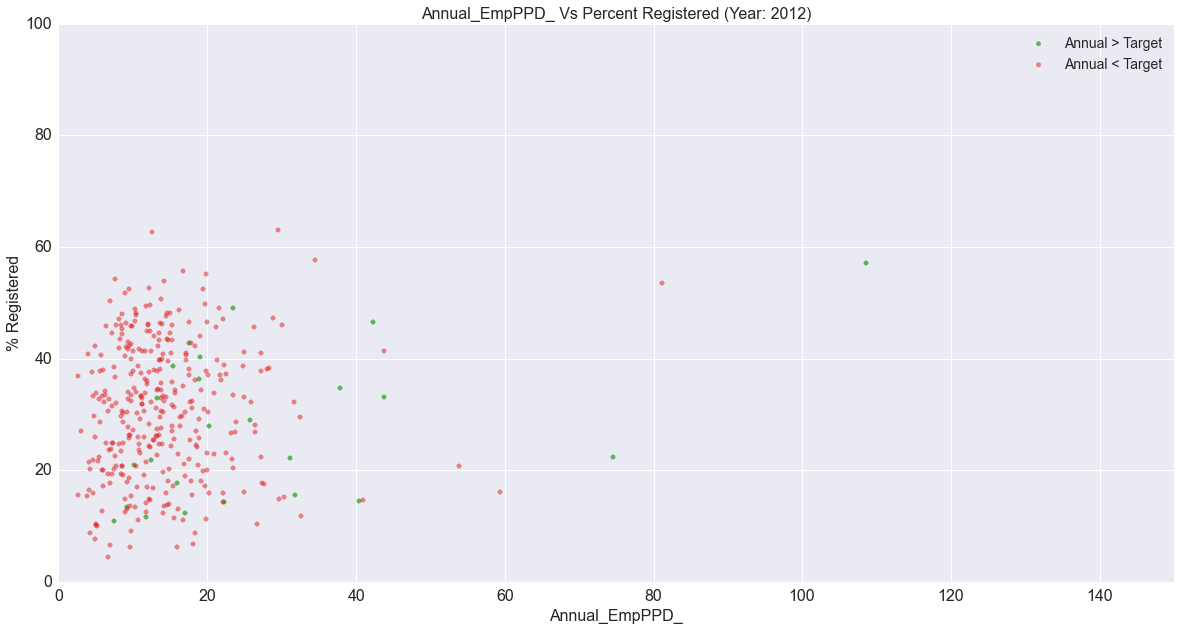

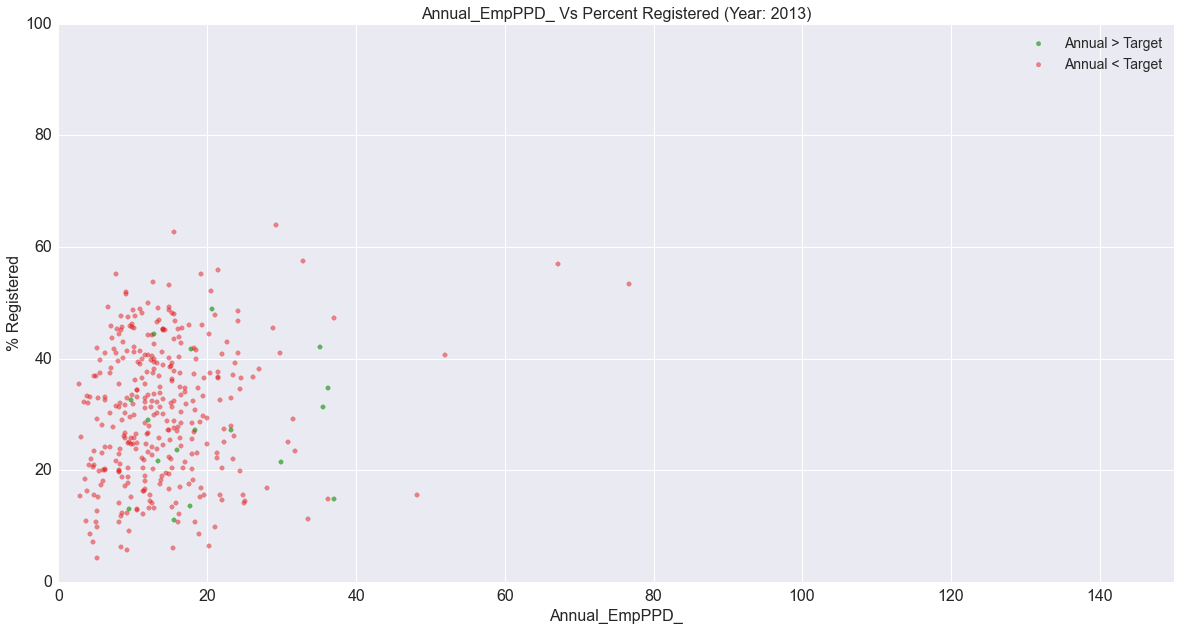

In [165]:
rep_ppd(data, tEmp, aEmp) # Ignored outliers by setting plt.xlim(0, 150) in function

In [170]:
def green_ppd(df, target, annual):
    '''
    Function to plot PPD vs democratic/republican
    ppd: Target_EmpPPD_ and Annual_EmpPPD_ or Target_ResPPD_ and Annual_ResPPD_ 
    '''
    years = list(np.arange(2007, 2014, 1))
    for year in years:
        i = str(year)
        # Create a temporary dataframe calculating percent Dem/Rep
        temp = df[[target + i, annual + i, 'Democratic_' + i, 'Republican_' + i, 'Tot_Registered_' + i, 'Green_' + i]]
        temp['Democratic'] = temp['Democratic_' + i] * 100.0/temp['Tot_Registered_' + i]
        temp['Republican'] = temp['Republican_' + i] * 100.0/temp['Tot_Registered_' + i]
        temp['Green'] = temp['Green_' + i] * 100.0/temp['Tot_Registered_' + i]
        plt.figure(figsize=(20,10))
        cond = temp[annual + i] > temp[target + i]
        # Dem points
        plt.scatter(temp[annual + i][cond], temp['Green'][cond], color = '#33a02c', alpha = 0.75, label = 'Annual > Target')
        plt.scatter(temp[annual + i][~cond], temp['Green'][~cond], color = '#e31a1c', alpha = 0.5, label = 'Annual < Target')
        # Set axis labels
        plt.xlabel(annual, fontsize = 16)
        plt.ylabel('% Registered', fontsize = 16)
        # Set axis limits
        #plt.xlim(0, max(df[annual + i]))
        plt.xlim(0, 150)
        plt.ylim(0, 10)
        # Set tick label size
        plt.tick_params(axis = 'both', which = 'major', labelsize = 16)
        # Set figure title
        plt.title(annual + ' Vs Percent Registered (Year: ' + i + ')' , fontsize = 16)
        # Set legend and legends fontsize
        plt.legend(prop={'size': 14})
        plt.show()

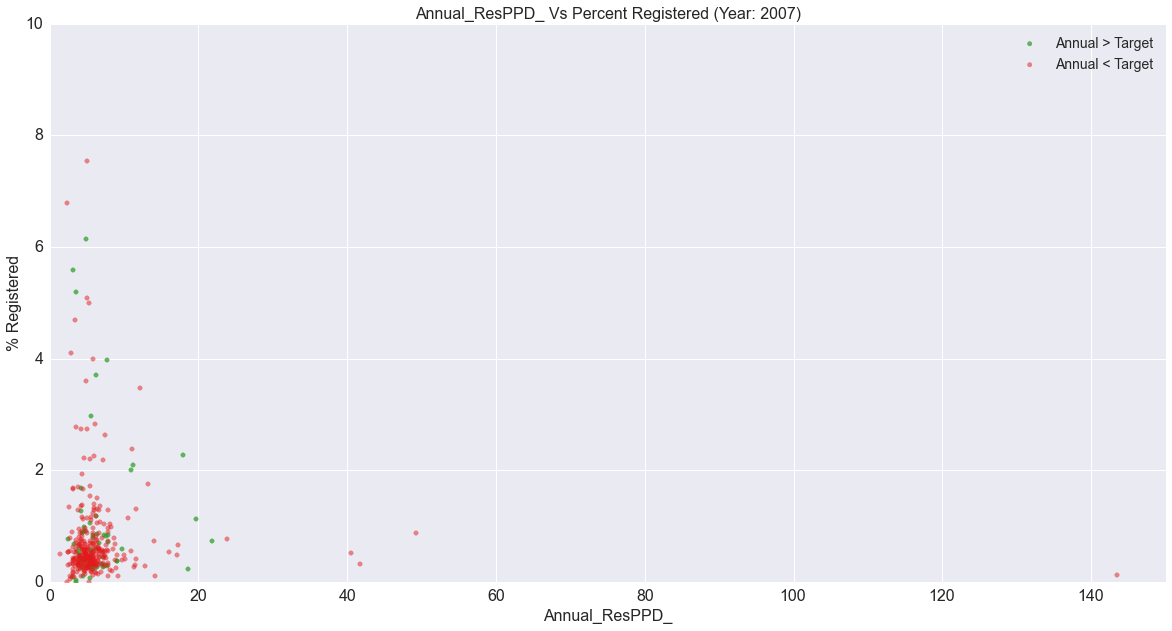

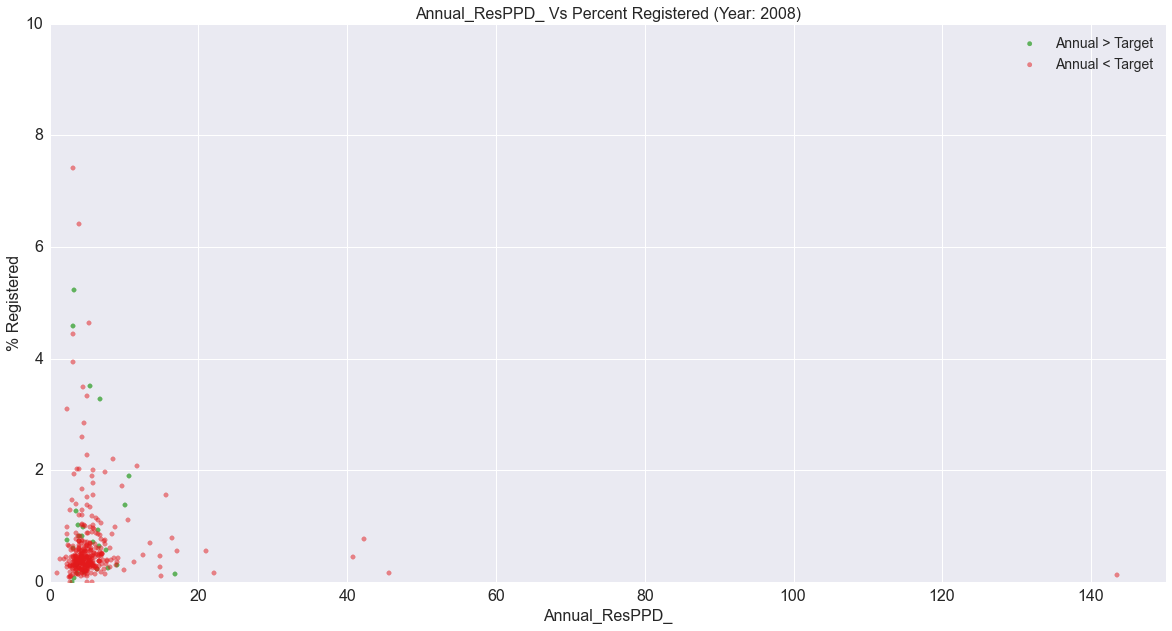

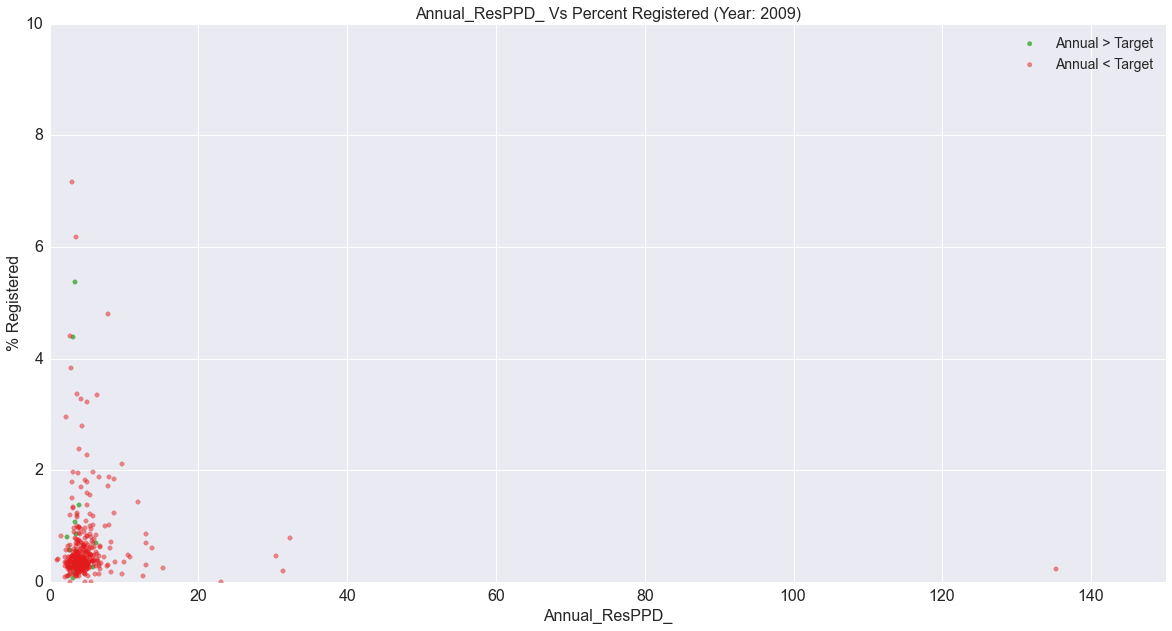

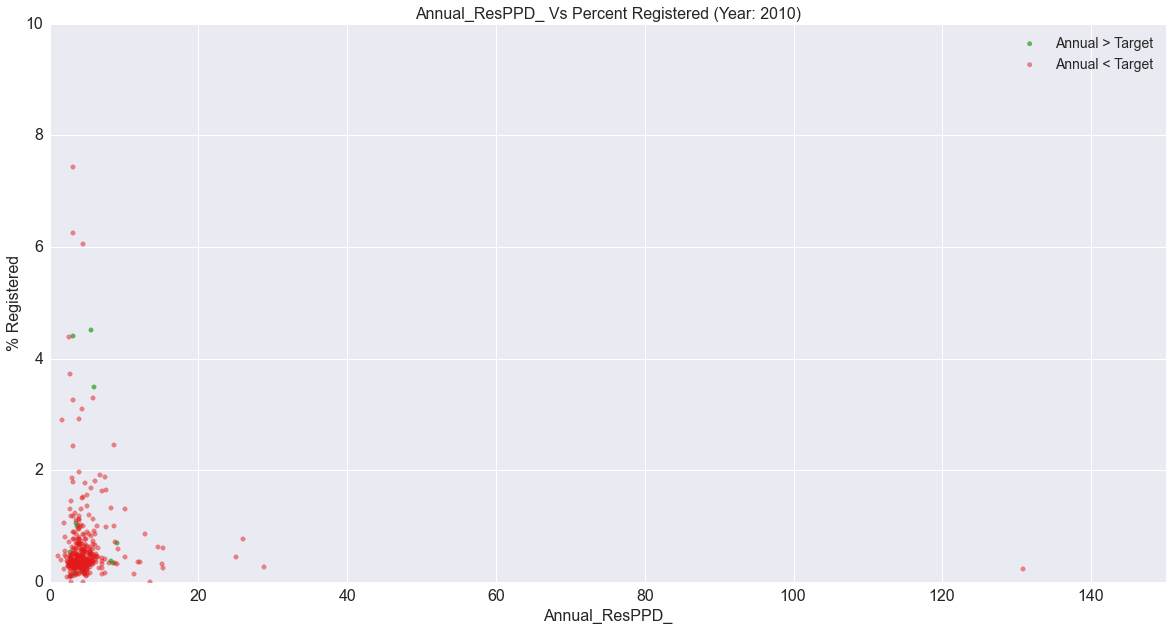

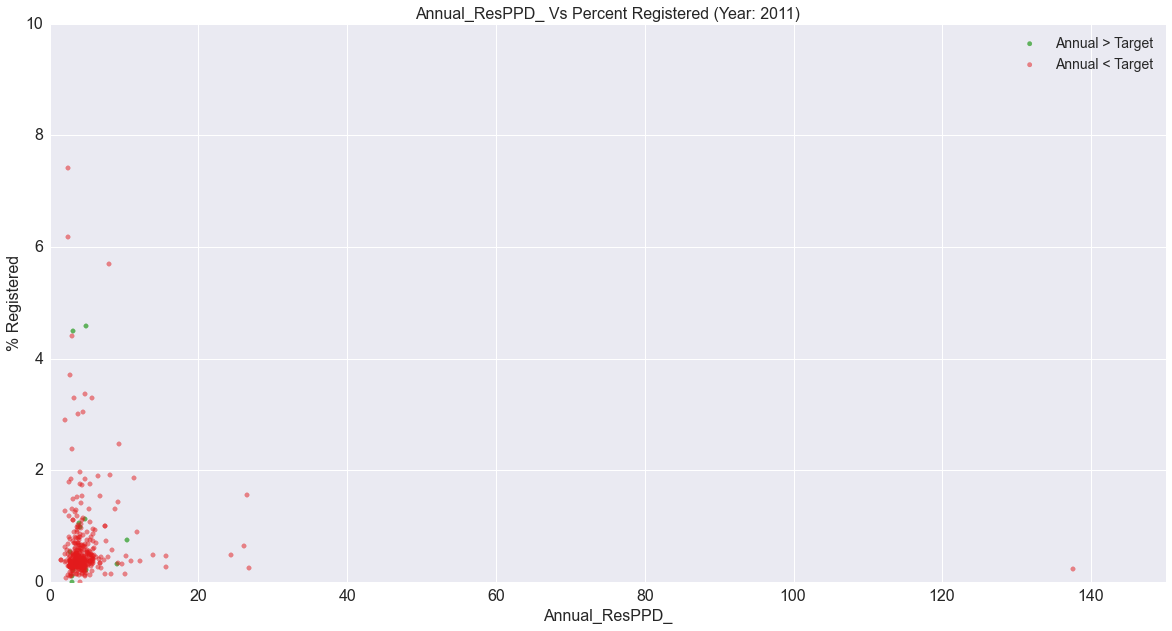

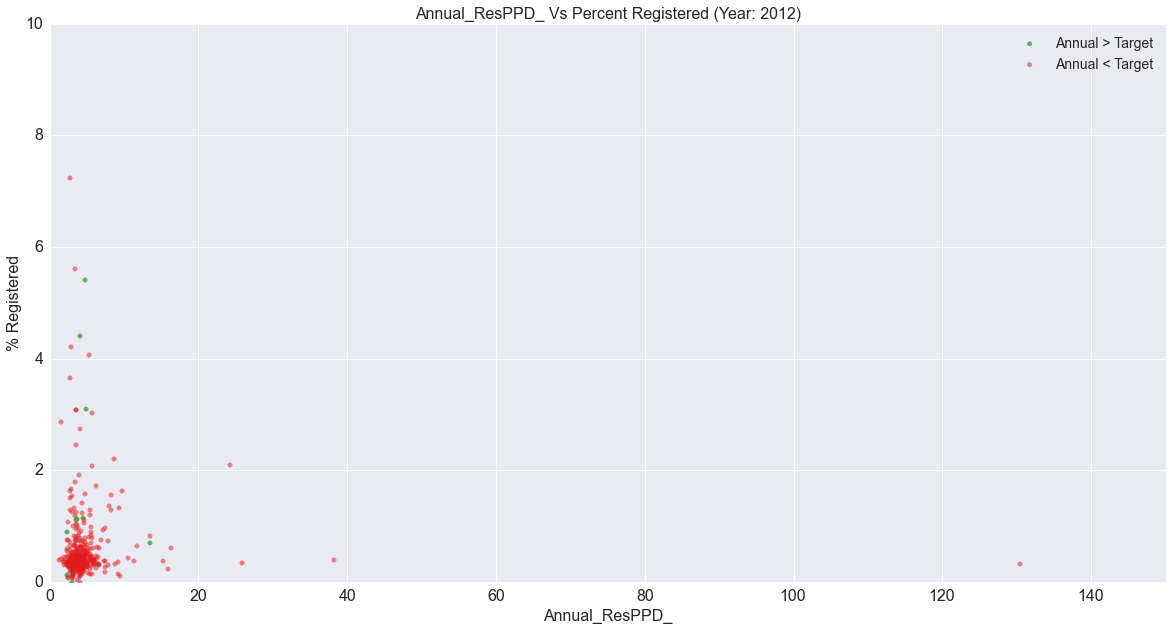

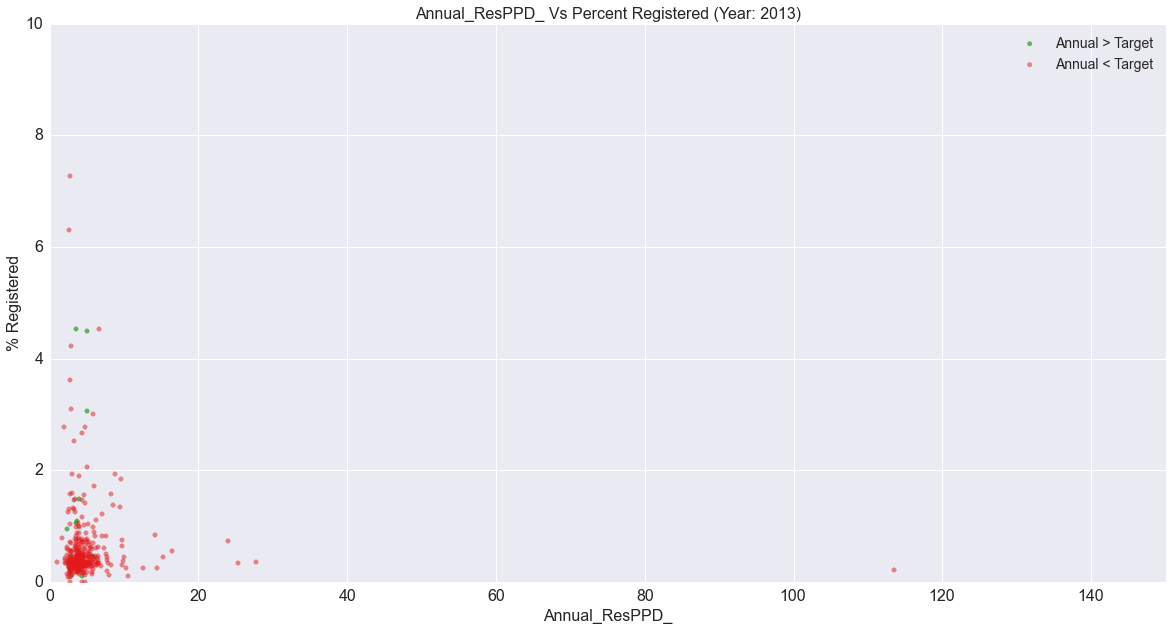

In [171]:
green_ppd(data, tRes, aRes)

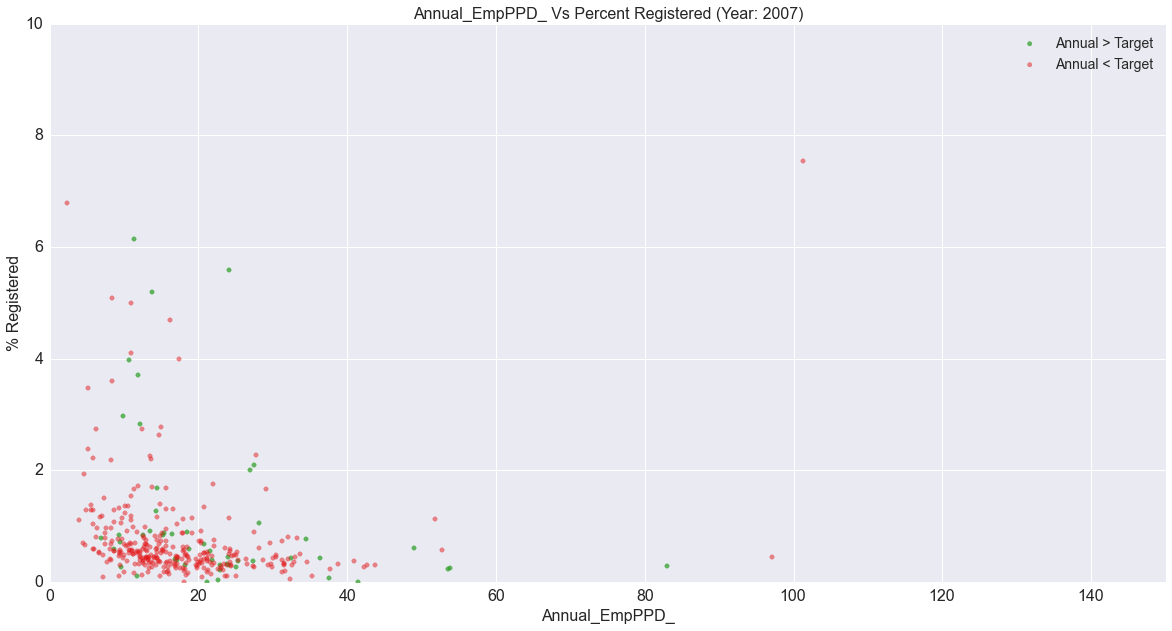

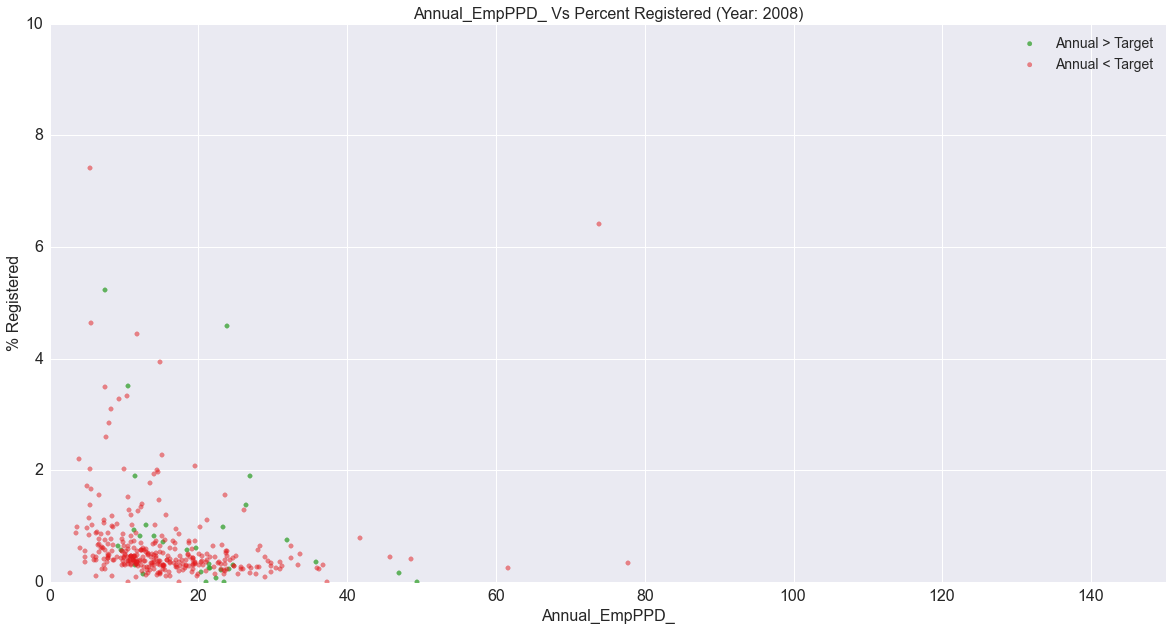

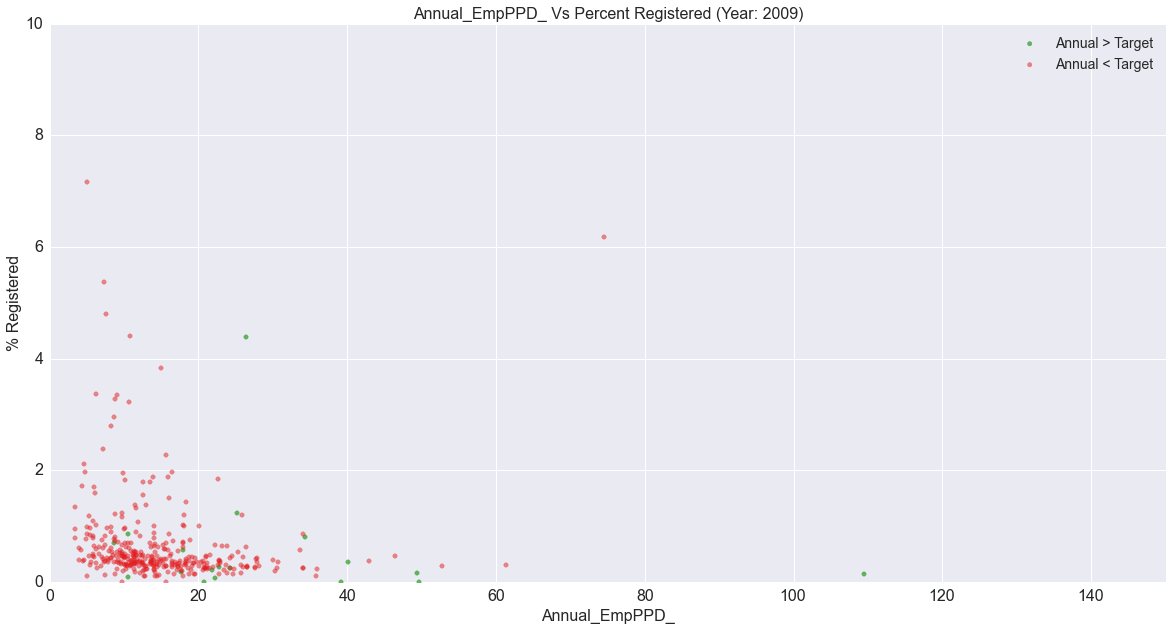

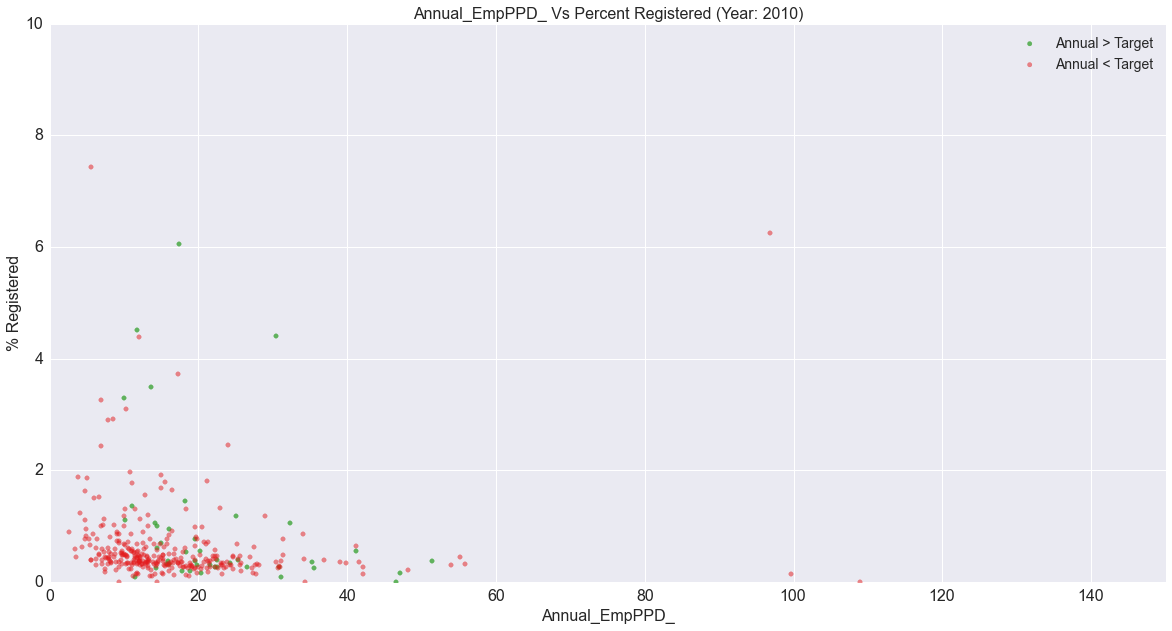

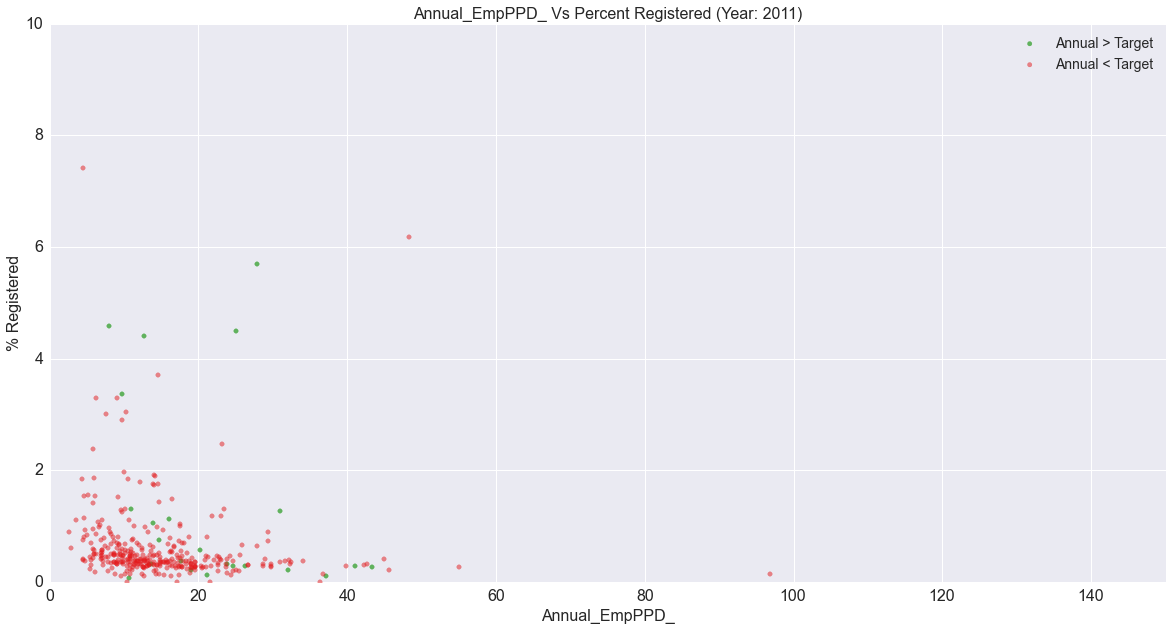

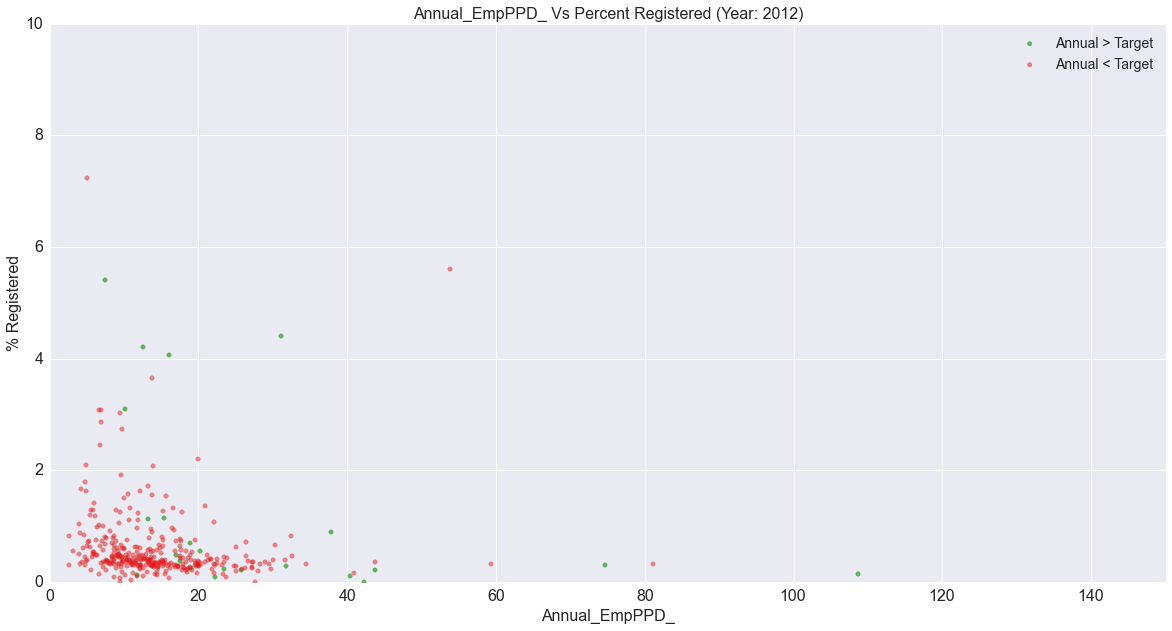

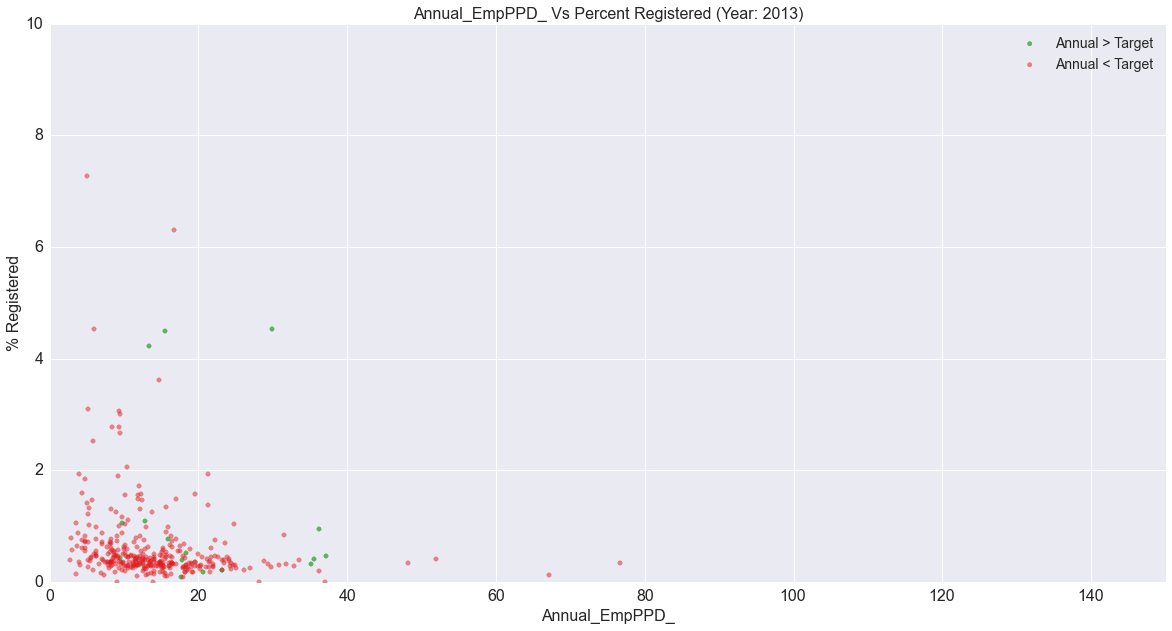

In [172]:
green_ppd(data, tEmp, aEmp)

In [294]:
def solar_ppd(df, target, annual):
    '''
    Function to plot PPD vs Solar
    ppd: Target_EmpPPD_ and Annual_EmpPPD_ or Target_ResPPD_ and Annual_ResPPD_ 
    '''
    years = list(np.arange(2007, 2014, 1))
    for year in years:
        i = str(year)
        # Create a temporary dataframe calculating percent Dem/Rep
        temp = df[[target + i, annual + i, 'SolarUnitCount', 'Area_SqMi']]
        temp['Solar'] = temp['SolarUnitCount']/temp['Area_SqMi']
        # Select Non Null values
        temp = temp[temp['SolarUnitCount'].notnull()]
        plt.figure(figsize=(20,10))
        cond = temp[annual + i] > temp[target + i]
        print '\t Number of Jurisdictions where Annual Rate > Target Rate: %d' % sum(cond)
        # Points as per condition
        plt.scatter(temp[annual + i][cond], temp['Solar'][cond], color = '#33a02c', alpha = 0.75, label = 'Annual > Target')
        plt.scatter(temp[annual + i][~cond], temp['Solar'][~cond], color = '#e31a1c', alpha = 0.5, label = 'Annual < Target')
        # Set axis labels
        plt.xlabel(annual, fontsize = 16)
        plt.ylabel('$Solar\;Units/Mile^2$', fontsize = 16)
        # Set axis limits
        #plt.xlim(0, max(temp[annual + i]))
        plt.xlim(0, 150)
        plt.ylim(0, max(temp['Solar']))
        # Set tick label size
        plt.tick_params(axis = 'both', which = 'major', labelsize = 16)
        # Set figure title
        plt.title(annual + ' Vs $Solar\;Units/Mile^2$ (Year: ' + i + ')', fontsize = 16)
        # Set legend and legends fontsize
        plt.legend(prop={'size': 14})
        plt.show()

	 Number of Jurisdictions where Annual Rate > Target Rate: 60


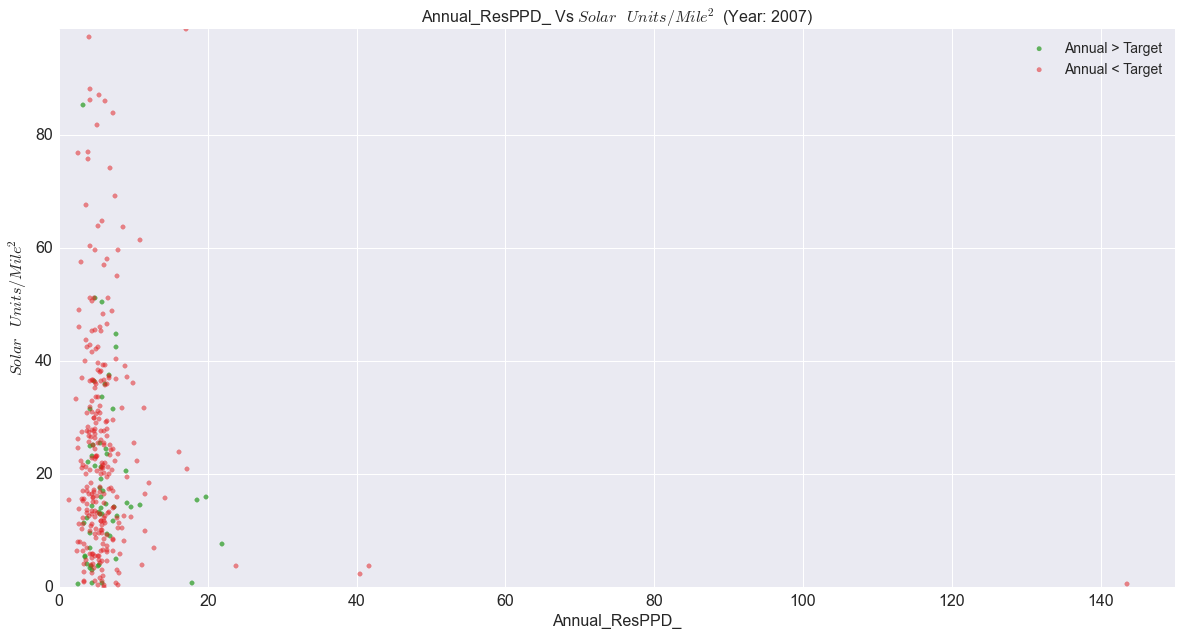

	 Number of Jurisdictions where Annual Rate > Target Rate: 25


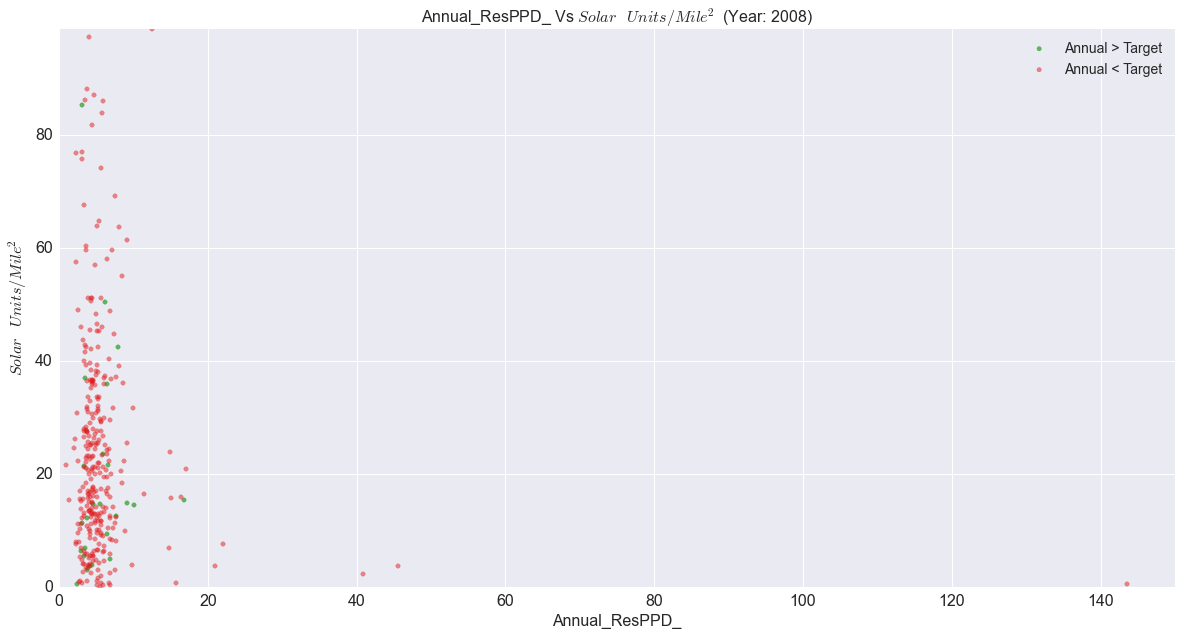

	 Number of Jurisdictions where Annual Rate > Target Rate: 10


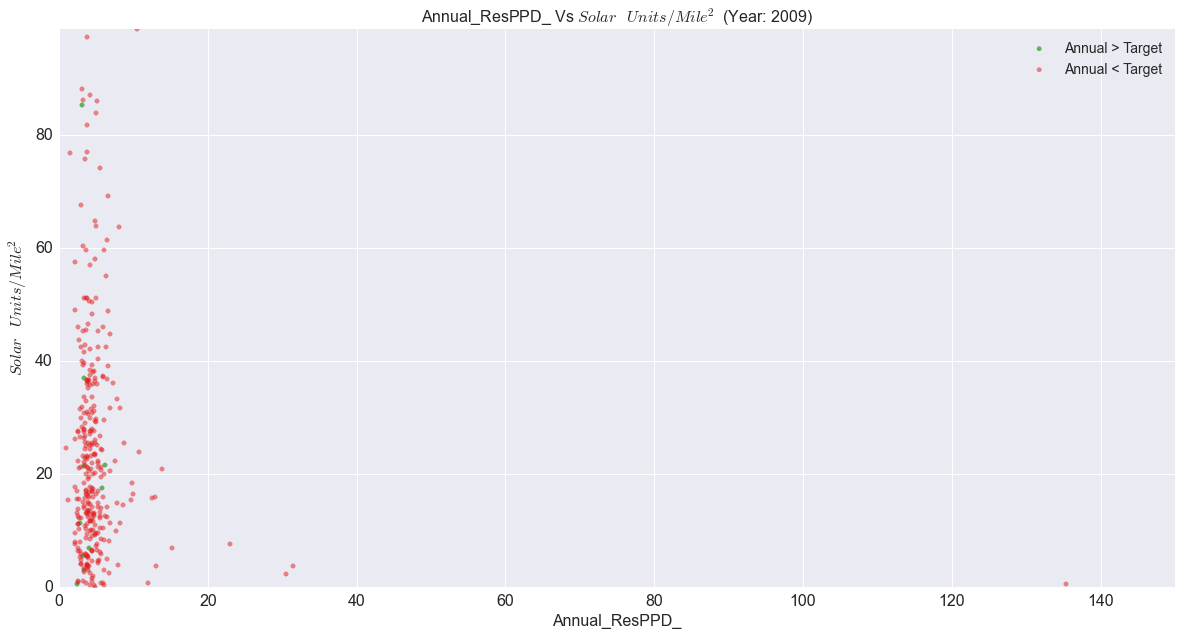

	 Number of Jurisdictions where Annual Rate > Target Rate: 12


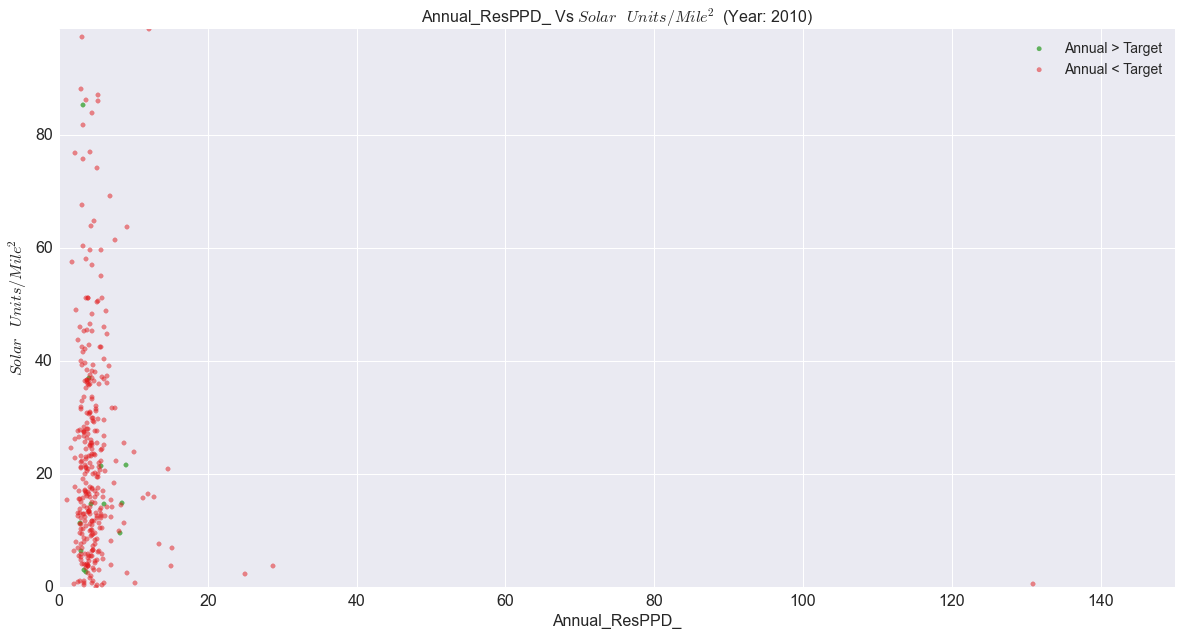

	 Number of Jurisdictions where Annual Rate > Target Rate: 12


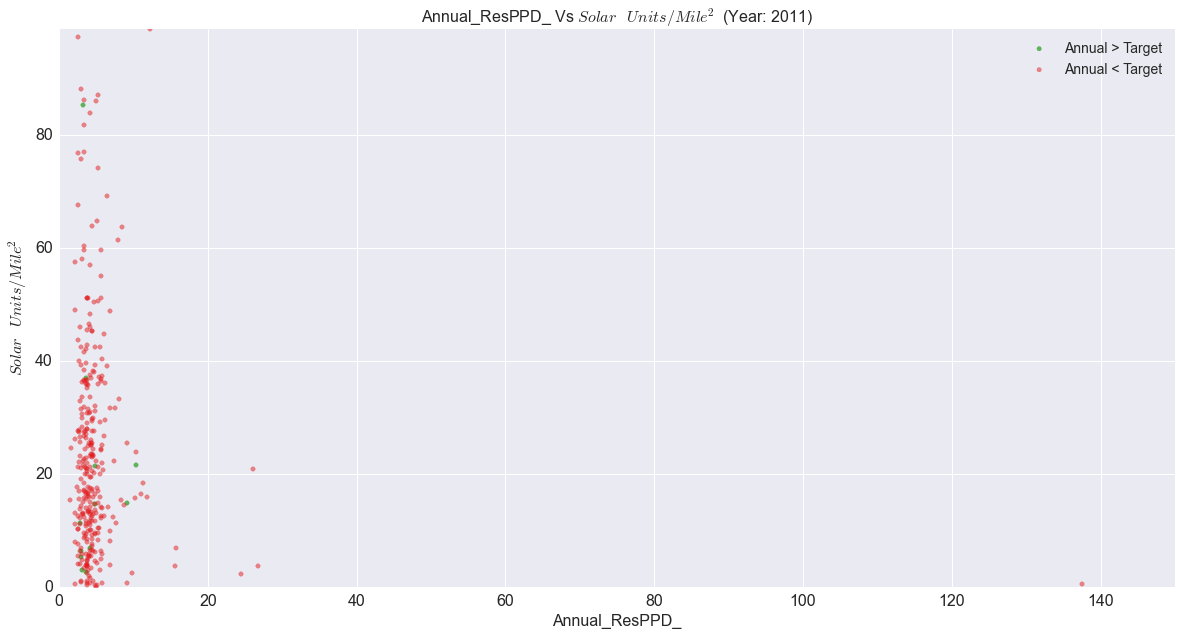

	 Number of Jurisdictions where Annual Rate > Target Rate: 14


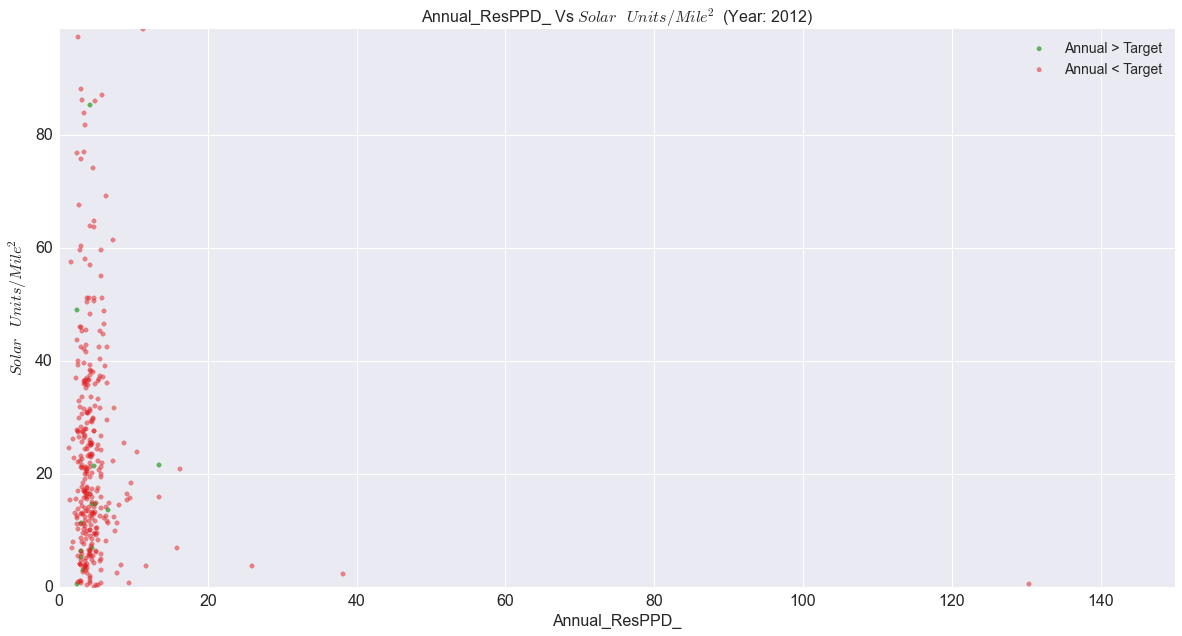

	 Number of Jurisdictions where Annual Rate > Target Rate: 10


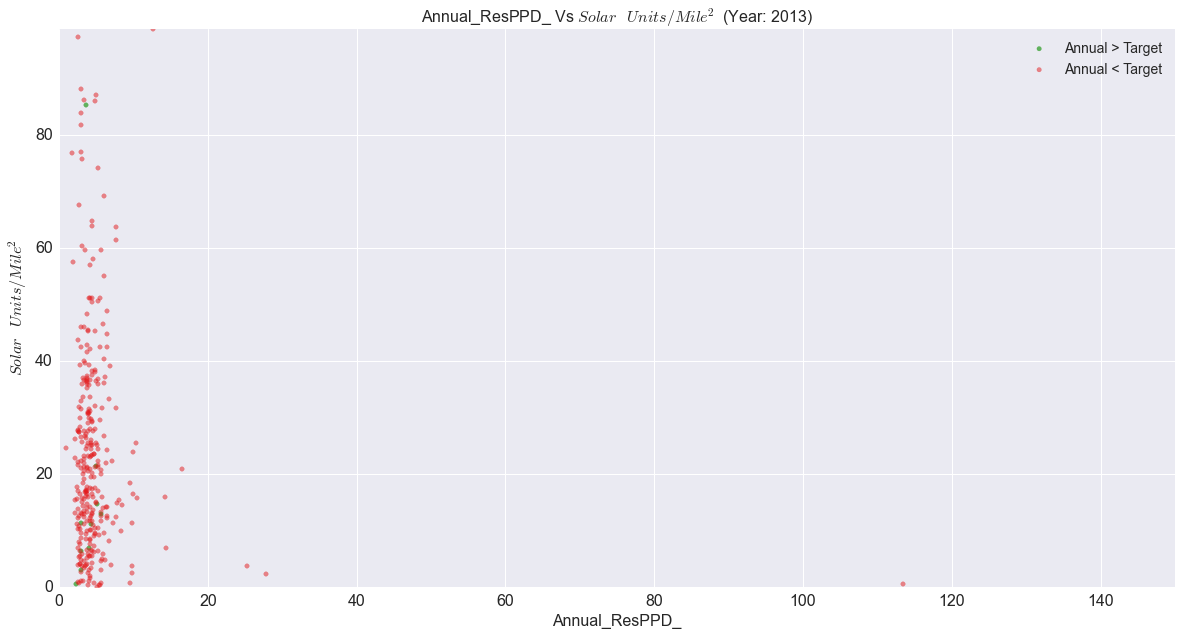

In [295]:
solar_ppd(data, tRes, aRes)

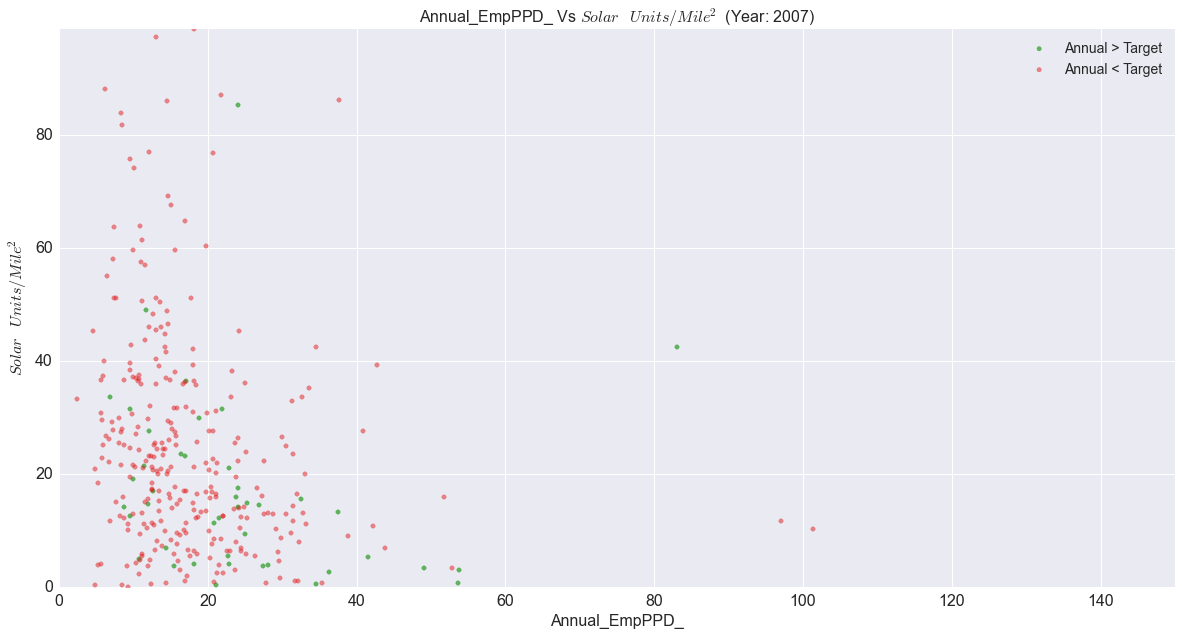

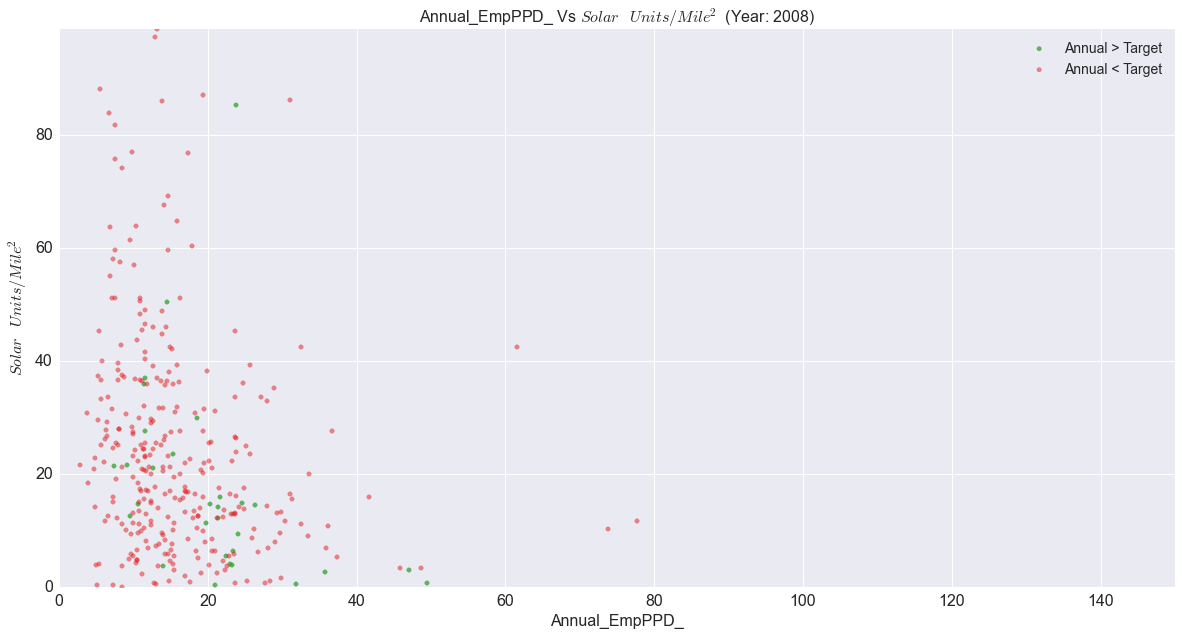

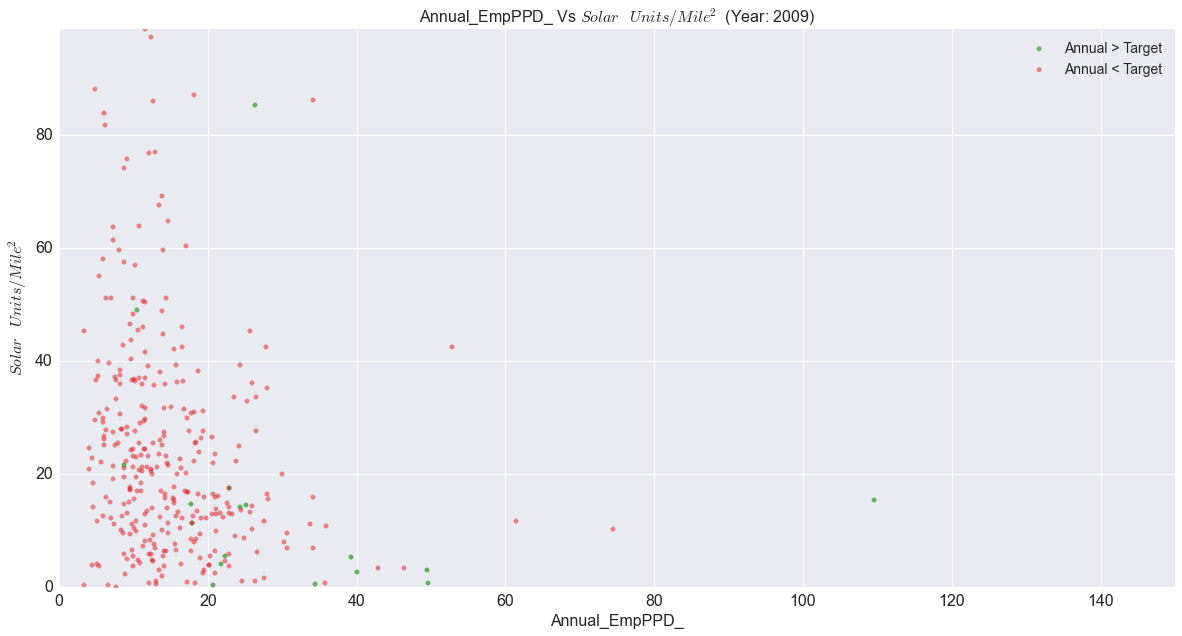

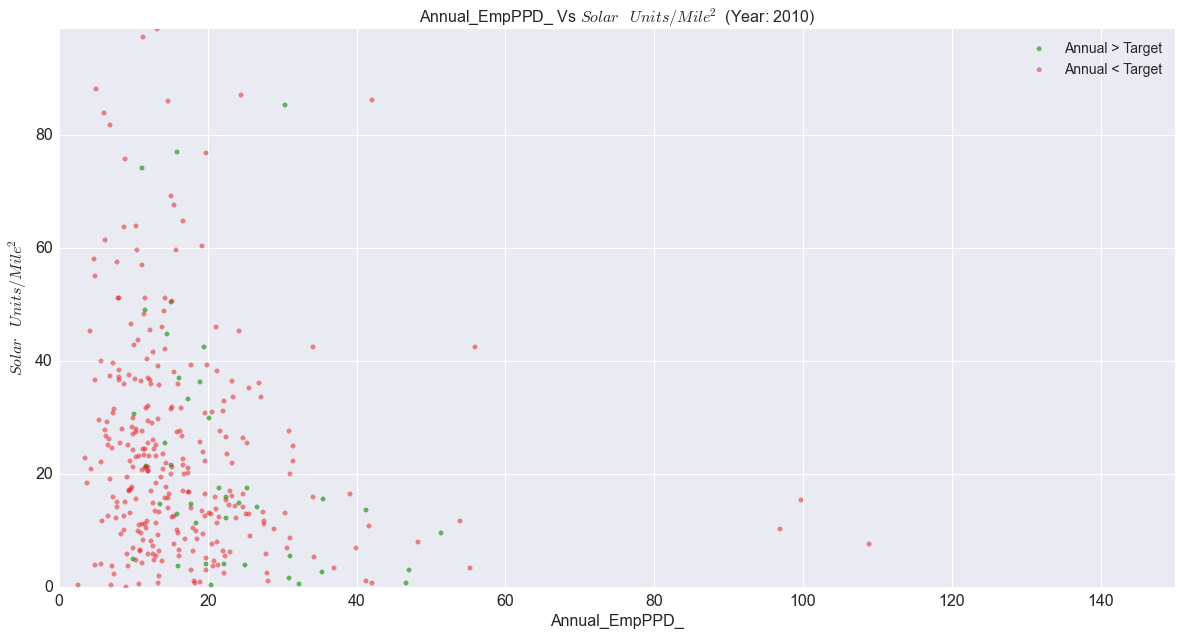

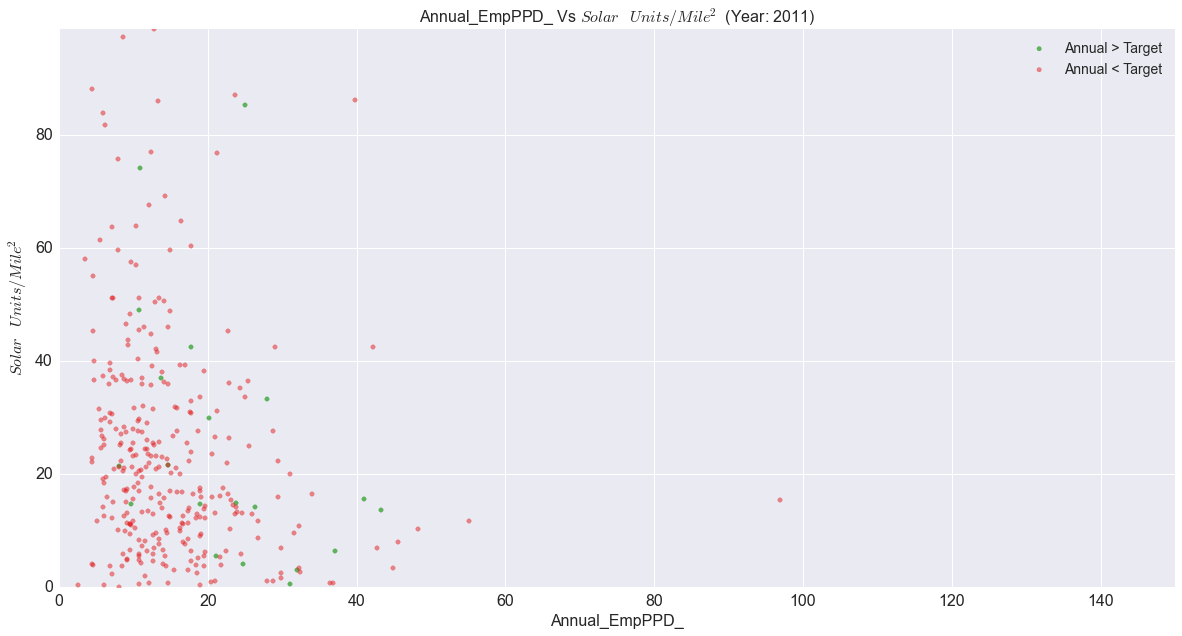

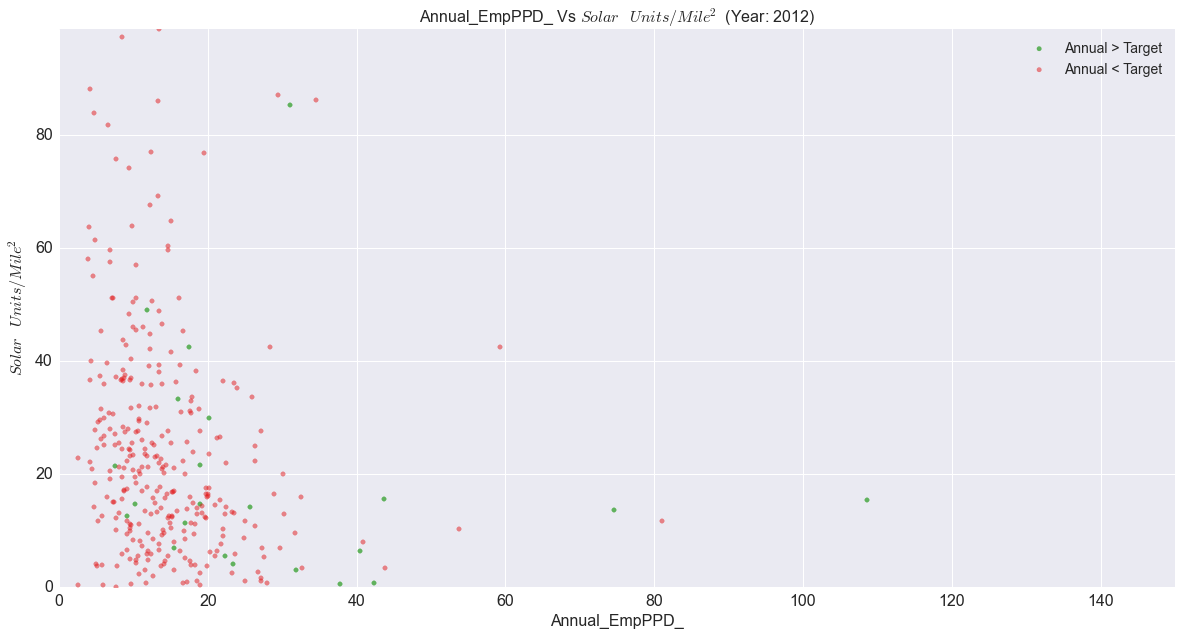

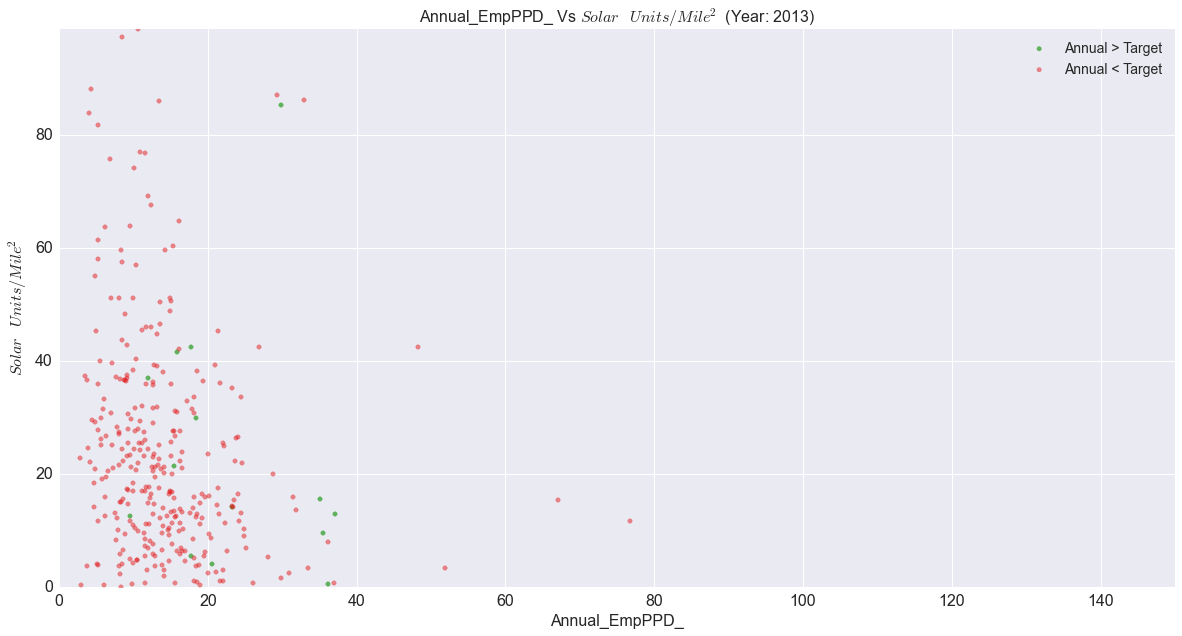

In [287]:
solar_ppd(data, tEmp, aEmp)

``` python
# Check if there is relation between Annual Residential PPD vs Total Crimes/Sq. Mile
years = list(np.arange(2007, 2014, 1))
color = ['#7fc97f', '#beaed4', '#fdc086', '#ffff99', '#386cb0', '#f0027f', '#bf5b17']
for c, year in enumerate(years):
    i = str(year)
    plt.figure(figsize=(20,10))
    plt.plot(data['Annual_ResPPD_' + i], color = color[c], alpha = 0.5, label = 'Year = {}'.format(year)) 
    # Set axis labels
    plt.xlabel('Annual Residential PPD', fontsize = 16)
    plt.ylabel('$Total Crimes/Mile^2$', fontsize = 16)
    # Set axis limits
    #plt.xlim(0, 250)
    #plt.ylim(0, 5000)
    # Set tick label size
    plt.tick_params(axis = 'both', which = 'major', labelsize = 16)
    # Set figure title
    plt.title('Annual Residential PPD Vs Total Crimes per Sq. Mile (Year: ' + i + ')' , fontsize = 16)
    plt.show()```

In [20]:
i = '2013'
target = 'Target_ResPPD_'
annual = 'Annual_ResPPD_'

temp = data[[target + i, annual + i, 'Democratic_' + i, 'Republican_' + i, 'Tot_Registered_' + i, 'SolarUnitCount', 'Area_SqMi', 'TotCrimes_' + i, 'Total_' + i, 'Population']]

# Change Area = 0.0 to np.nan
temp['Area_SqMi'][temp['Area_SqMi'] == 0.0] = np.nan

## Changing values: The below 4 lines give SettingWithCopyWarning
#zeros = list(temp[temp['Area_SqMi'] == 0.0].index)
#temp.loc[zeros, 'Area_SqMi'] = np.nan
#temp.ix[temp['Area_SqMi'] == 0.0, ['Area_SqMi']] = np.nan
#temp.loc[temp.Area_SqMi == 0.0, ['Area_SqMi']] = np.nan

# Select Non Null/NaN values
temp = temp[temp['SolarUnitCount'].notnull()]
temp['Democratic'] = temp['Democratic_' + i] * 100.0/temp['Tot_Registered_' + i]
temp['Republican'] = temp['Republican_' + i] * 100.0/temp['Tot_Registered_' + i]
temp['Solar'] = temp['SolarUnitCount']/temp['Area_SqMi']
temp['Crime'] = temp['TotCrimes_' + i]/temp['Area_SqMi']
temp['Permits'] = temp['Total_' + i]/temp['Area_SqMi']
temp['Population'] = temp['Population']/temp['Area_SqMi']

del temp['Democratic_' + i]
del temp['Tot_Registered_' + i]
del temp['Republican_' + i]
del temp['SolarUnitCount']
del temp['TotCrimes_' + i]
del temp['Total_' + i]

temp.head(5)

#cond = (temp[annual + i] > temp[target + i]) & (temp['Democratic'] > temp['Republican'])

Target_ResPPD_2013  Annual_ResPPD_2013  Area_SqMi    Population  \
0                 6.9                 3.2      56.01    567.130869   
1                 7.0                 5.5       7.79   2609.756098   
3                 5.0                 1.9       1.79  10356.983240   
4                 3.8                 2.4       7.63  10889.777195   
5                 3.3                 2.1       7.47   6402.008032   

   Democratic  Republican      Solar        Crime    Permits  
0   48.602501   20.326264   1.071237    74.950902   1.035529  
1   39.859329   33.505951  51.219512   342.747112   2.310655  
3   63.872888    6.288402  57.541899  1783.240223   1.117318  
4   47.366875   18.781712  15.465269   772.477064  20.838794  
5   29.358210   39.813832  26.238286   360.910308   4.551539

In [9]:
temp.describe()

Target_ResPPD_2013  Annual_ResPPD_2013   Area_SqMi    Population  \
count           327.00000          327.000000  335.000000    335.000000   
mean              8.60000            4.974006   20.085433   4564.225349   
std              14.92082            6.579982   38.104626   3732.643258   
min               2.10000            1.000000    0.310000     69.378931   
25%               5.20000            3.300000    4.590000   2184.033209   
50%               6.50000            4.100000    9.890000   3480.797836   
75%               8.50000            5.150000   21.715000   6213.702108   
max             249.50000          113.500000  468.670000  23216.101695   

       Democratic  Republican       Solar        Crime     Permits  
count  338.000000  338.000000  335.000000   323.000000  329.000000  
mean    42.500885   30.058809   23.762624   607.627084    8.082703  
std     11.804795   12.252976   19.295119   571.922995   16.868247  
min     17.476658    4.263086    0.030637     0.000000    0.000000  
25%     33.252565   20.241226   10.219027   248.860884    0.481314  
50%     42.140510   30.008534   19.515963   460.139860    2.637363  
75%     50.954319   39.654388   31.748260   755.823010    9.123499  
max     73.424643   63.945415   98.830409  4825.000000  152.800000

In [22]:
# Normalize data
temp_norm = (temp - temp.mean()) / (temp.std())
temp_norm.head(3)

Target_ResPPD_2013  Annual_ResPPD_2013  Area_SqMi  Population  Democratic  \
0           -0.113935           -0.269607   0.942788   -1.070848    0.516876   
1           -0.107233            0.079938  -0.322676   -0.523615   -0.223770   
3           -0.241274           -0.467175  -0.480137    1.551918    1.810451   

   Republican     Solar     Crime   Permits  
0   -0.794300 -1.176017 -0.931377 -0.417777  
1    0.281331  1.422997 -0.463139 -0.342184  
3   -1.939970  1.750664  2.055544 -0.412929

In [23]:
### Create new colum based on condition

# 1. Create a function to test condition and return a value
def status(col):
    if col['Annual_ResPPD_' + i] > col['Target_ResPPD_' + i]:
        return 'Annual'
    else:
        return 'Target'

# 2. Apply function: df.apply(function, axis = 1). Note: axis = 1 is along the columns ---->  
temp_norm['Status'] = temp_norm.apply(status, axis = 1)

temp_norm.head(3)

Target_ResPPD_2013  Annual_ResPPD_2013  Area_SqMi  Population  Democratic  \
0           -0.113935           -0.269607   0.942788   -1.070848    0.516876   
1           -0.107233            0.079938  -0.322676   -0.523615   -0.223770   
3           -0.241274           -0.467175  -0.480137    1.551918    1.810451   

   Republican     Solar     Crime   Permits  Status  
0   -0.794300 -1.176017 -0.931377 -0.417777  Target  
1    0.281331  1.422997 -0.463139 -0.342184  Annual  
3   -1.939970  1.750664  2.055544 -0.412929  Target

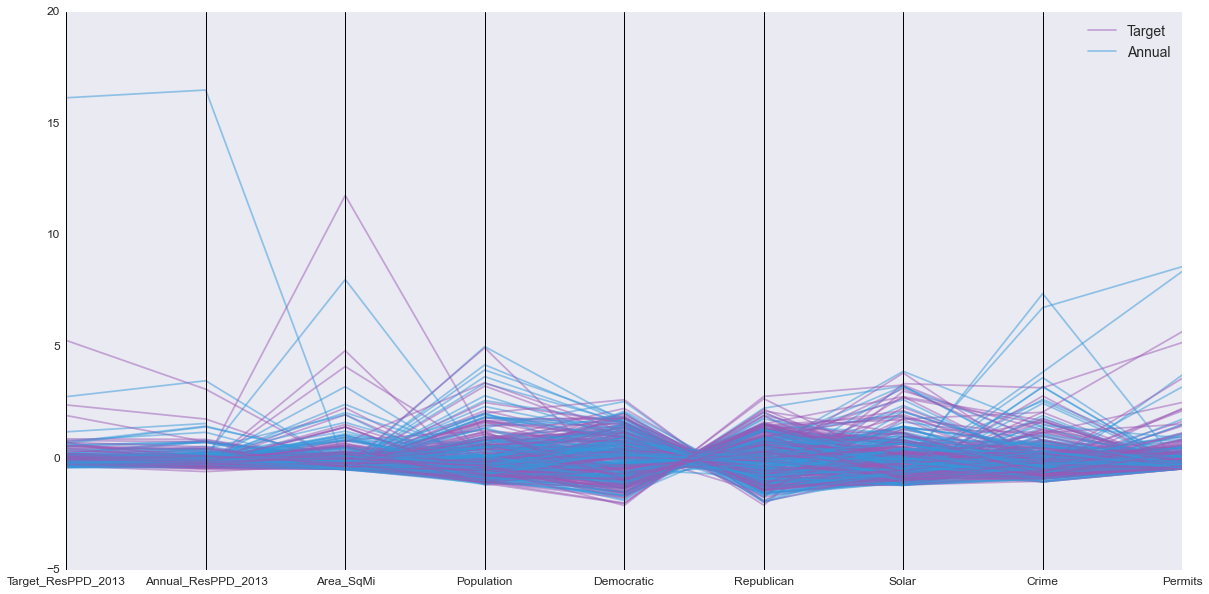

In [28]:
# Parallel Coordinates test
from pandas.tools.plotting import parallel_coordinates
color = ["#9b59b6", "#3498db", "#95a5a6", "#e74c3c", "#34495e", "#2ecc71"]
plt.figure(figsize = (20, 10))
parallel_coordinates(temp_norm, 'Status', colors = [col for col in color[:2]], alpha = 0.5)
plt.tick_params(axis = 'both', which = 'major', labelsize = 12)
plt.legend(prop={'size': 14})

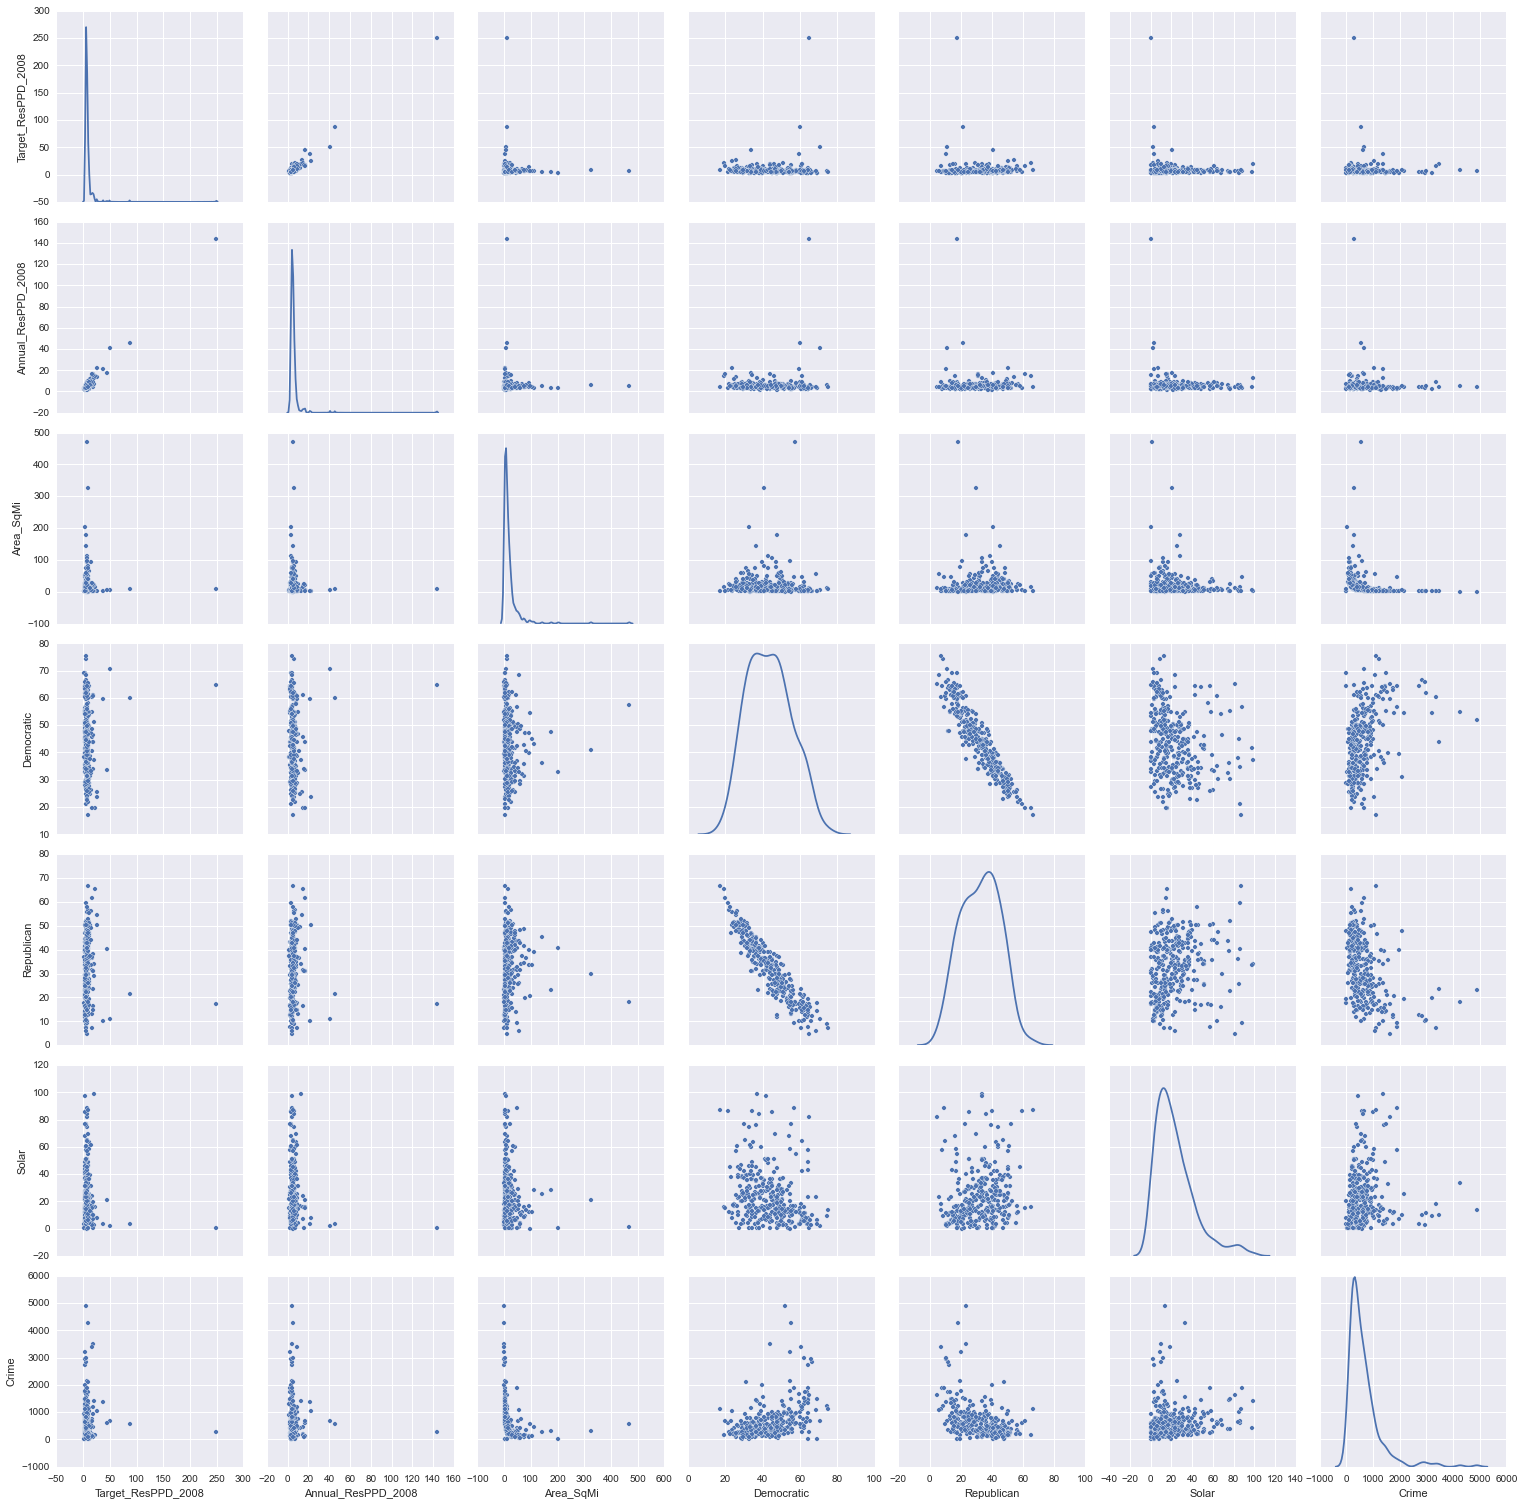

In [346]:
# Pairplot test!
sns.pairplot(temp, diag_kind="kde") # default 'hist' does not work?

In [255]:
temp.describe()

Target_ResPPD_2007  Annual_ResPPD_2007   Area_SqMi  Democratic  \
count          339.000000          339.000000  335.000000  338.000000   
mean             8.501180            6.533038   20.085433   42.078895   
std             14.627764            8.431083   38.104626   11.704067   
min              2.100000            1.400000    0.310000   16.640037   
25%              5.100000            4.400000    4.590000   32.727902   
50%              6.500000            5.500000    9.890000   41.402122   
75%              8.500000            6.600000   21.715000   49.623884   
max            249.500000          143.500000  468.670000   72.452873   

       Republican       Solar        Crime  
count  338.000000  335.000000   323.000000  
mean    34.642218   23.762624   663.389960  
std     12.650661   19.295119   640.295311  
min      5.074193    0.030637     0.000000  
25%     25.158918   10.219027   277.751978  
50%     36.280787   19.515963   486.653386  
75%     44.098420   31.748260   824.856449  
max     67.975348   98.830409  4815.909091

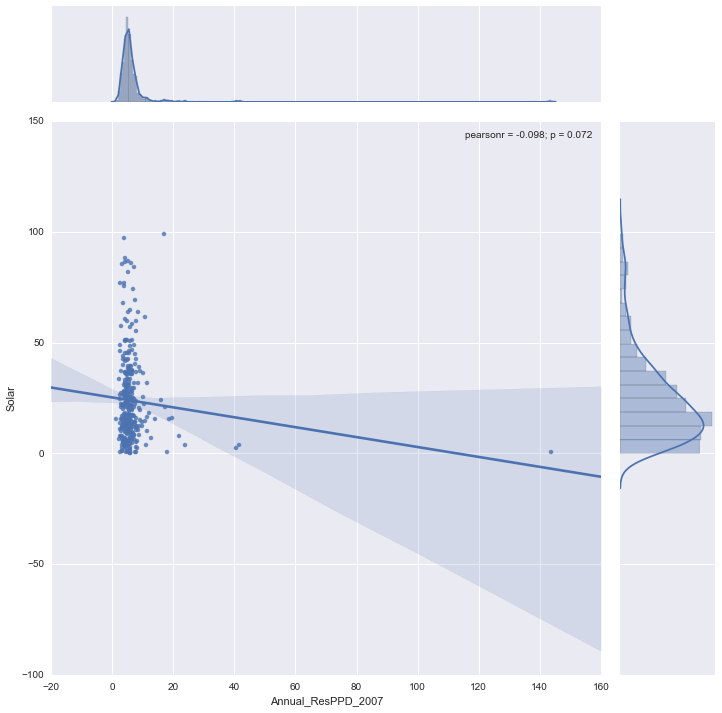

In [264]:
sns.jointplot('Annual_ResPPD_2007', 'Solar', data = temp, kind = 'reg', size = 10)

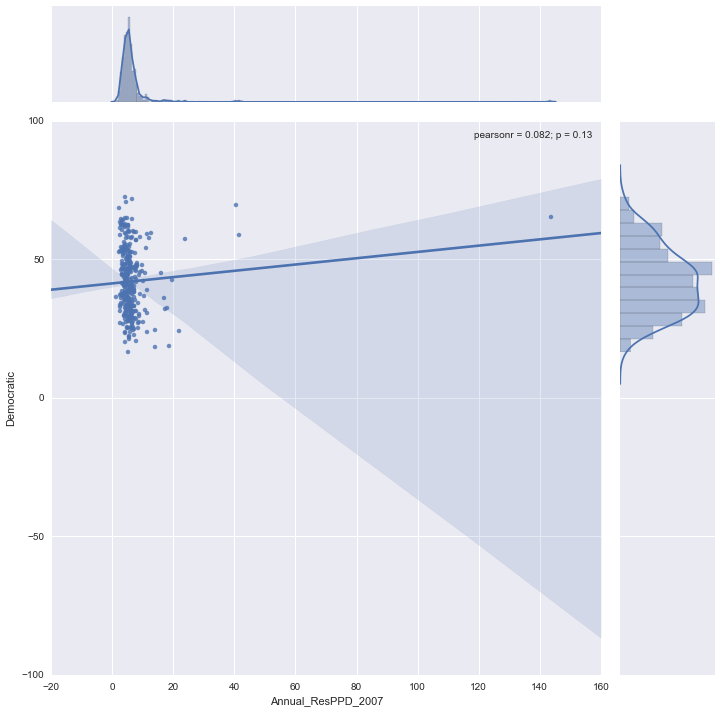

In [263]:
sns.jointplot('Annual_ResPPD_2007', 'Democratic', data = temp, kind = 'reg', size = 10)

In [32]:
# Bash
!ls -l
!pwd
!ls -a
!more final_merged_data.csv

total 24952
-rw-r--r--   1 Ankoor  staff  6991128 Oct  9 17:07 Earth-Advocacy-Project-2015.ipynb
-rw-r--r--@  1 Ankoor  staff  2914671 Oct  5 23:02 final_merged_data.csv
-rw-r--r--   1 Ankoor  staff  1698988 Oct  9 15:56 final_merged_data_1995_2006_removed.csv
-rw-r--r--@  1 Ankoor  staff  1166258 Oct  8 16:44 final_merged_data_clean.csv
drwxr-xr-x   4 Ankoor  staff      136 Sep 20 14:47 images
drwxr-xr-x  52 Ankoor  staff     1768 Oct  7 16:09 processed_data
drwxr-xr-x  25 Ankoor  staff      850 Oct  2 15:42 raw_data
/Users/Ankoor/Desktop/NewMet Data Science/Notebooks
.                                       final_merged_data_1995_2006_removed.csv
..                                      final_merged_data_clean.csv
.DS_Store                               images
.ipynb_checkpoints                      processed_data
Earth-Advocacy-Project-2015.ipynb       raw_data
final_merged_data.csv
>

## Notes

- Mike's population data is 2013
- County_x is good, delete other
- Remove Mikes (x) values
- Check Pandas Scatter Matrix